# Initial Preparation and Data Import/Prep

In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys
from herdingspikes.hs2 import HSDetection
from herdingspikes.probe import HierlmannVisapyEmulationProbe
import matplotlib.pyplot as plt
import h5py
import numpy as np

np.random.seed(0)

In [2]:
# raw data location
data_path = 'visapy_data.npy'

In [3]:
# detection parameters
to_localize = True
cutout_start = 14
cutout_end = 36
threshold = 24
file_directory = 'results/'
file_name = 'ProcessedSpikes_visapy'

In [4]:
Probe = HierlmannVisapyEmulationProbe('visapy_data.npy')
H = HSDetection(Probe, to_localize, cutout_start, cutout_end, threshold,
                maa=0, maxsl=12, minsl=3, ahpthr=0, out_file_name=file_name, 
                file_directory_name=file_directory, save_all=True)

File size: 122400102
Number of channels: 102


# Detecting the Spikes using HS2

In [5]:
H.DetectFromRaw()
H.LoadDetected()

# Sampling rate: 32000
# Localization On
# Not Masking any Channels
# Writing out extended detection info
# Number of recorded channels: 102
# Analysing frames: 1200001, Seconds:37.50003125
# Frames before spike in cutout: 32
# Frames after spike in cutout: 70
# tcuts: 44 59
# tInc: 50000
# Analysing 50000 frames; from -44 to 50059
# Analysing 50000 frames; from 49956 to 100059
# Analysing 50000 frames; from 99956 to 150059
# Analysing 50000 frames; from 149956 to 200059
# Analysing 50000 frames; from 199956 to 250059
# Analysing 50000 frames; from 249956 to 300059
# Analysing 50000 frames; from 299956 to 350059
# Analysing 50000 frames; from 349956 to 400059
# Analysing 50000 frames; from 399956 to 450059
# Analysing 50000 frames; from 449956 to 500059
# Analysing 50000 frames; from 499956 to 550059
# Analysing 50000 frames; from 549956 to 600059
# Analysing 50000 frames; from 599956 to 650059
# Analysing 50000 frames; from 649956 to 700059
# Analysing 50000 frames; from 699956 to 750

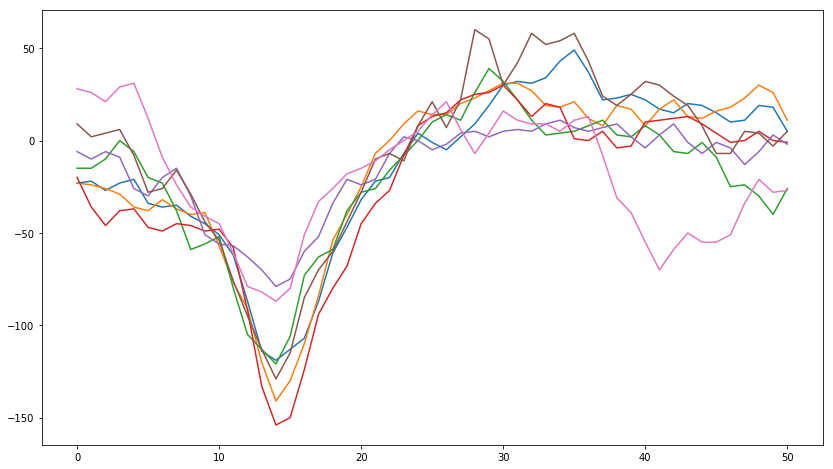

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,8))
for i in [11, 290, 3490, 1098, 2707, 9, 871]:
    plt.plot(H.spikes['Shape'][i])
plt.show()

In [7]:
length = H.spikes['Shape'][0].shape[0]
total_sigs = H.spikes['Shape'].shape[0]

electrode_data = np.zeros([total_sigs, length])
list_of_sigs = np.random.choice(total_sigs, total_sigs, replace=False)

for i in list_of_sigs:
    electrode_data[i, :] = H.spikes['Shape'][i]
print(electrode_data.shape)

(19341, 51)


In [8]:
# # Scaling the data
# max_val = np.amax(electrode_data)
# min_val = np.amin(electrode_data)
# span = max_val - min_val
# electrode_data = electrode_data/span

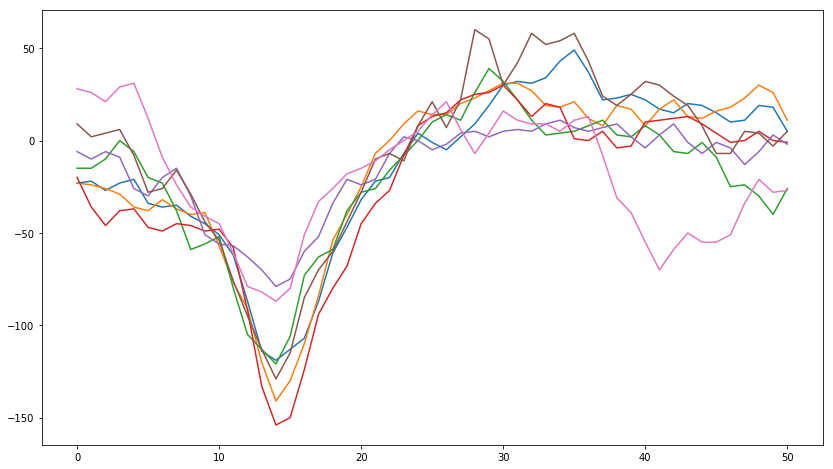

In [9]:
# Check if data is contaminated after scaling
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,8))
for i in [11, 290, 3490, 1098, 2707, 9, 871]:
    plt.plot(electrode_data[i, :])
plt.show()

# Designing the autoencoder

In [10]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils import data
import random

torch.cuda.set_device(2)
torch.manual_seed(0)

In [11]:
class autoencoder_1(nn.Module):
    def __init__(self, input_size, embedding_size):
        super(autoencoder_1, self).__init__()
        activation_layer = nn.ELU()
        self.encoder = nn.Sequential(nn.Linear(input_size, 50),
                                     activation_layer,
                                     nn.Linear(50, 12),
                                     activation_layer,
                                     nn.Linear(12, embedding_size))
        self.decoder = nn.Sequential(nn.Linear(embedding_size, 12),
                                     activation_layer,
                                     nn.Linear(12, 50),
                                     activation_layer,
                                     nn.Linear(50, input_size))
    
    def forward(self, x):
        enc = self.encoder(x)
        dec = self.decoder(enc)
        return enc, dec

In [12]:
class autoencoder_2(nn.Module):
    def __init__(self, input_size, embedding_size):
        super(autoencoder_2, self).__init__()
        activation_layer = nn.ELU()
        self.encoder = nn.Sequential(nn.Linear(input_size, 50),
                                     activation_layer,
                                     nn.Linear(50, 25),
                                     activation_layer,
                                     nn.Linear(25, 12),
                                     activation_layer,
                                     nn.Linear(12, embedding_size))
        self.decoder = nn.Sequential(nn.Linear(embedding_size, 12),
                                     activation_layer,
                                     nn.Linear(12, 25),
                                     activation_layer,
                                     nn.Linear(25, 50),
                                     activation_layer,
                                     nn.Linear(50, input_size))
    
    def forward(self, x):
        enc = self.encoder(x)
        dec = self.decoder(enc)
        return enc, dec

In [13]:
class autoencoder_3(nn.Module):
    def __init__(self, input_size, embedding_size):
        super(autoencoder_3, self).__init__()
        activation_layer = nn.ELU()
        self.encoder = nn.Sequential(nn.Linear(input_size, 100),
                                     activation_layer,
                                     nn.Linear(100, 50),
                                     activation_layer,
                                     nn.Linear(50, 12),
                                     activation_layer,
                                     nn.Linear(12, embedding_size))
        self.decoder = nn.Sequential(nn.Linear(embedding_size, 12),
                                     activation_layer,
                                     nn.Linear(12, 50),
                                     activation_layer,
                                     nn.Linear(50, 100),
                                     activation_layer,
                                     nn.Linear(100, input_size))
    
    def forward(self, x):
        enc = self.encoder(x)
        dec = self.decoder(enc)
        return enc, dec

In [14]:
class autoencoder_4(nn.Module):
    def __init__(self, input_size, embedding_size):
        super(autoencoder_4, self).__init__()
        activation_layer = nn.ELU()
        self.encoder = nn.Sequential(nn.Linear(input_size, 100),
                                     activation_layer,
                                     nn.Linear(100, 50),
                                     activation_layer,
                                     nn.Linear(50, 25),
                                     activation_layer,
                                     nn.Linear(25, 12),
                                     activation_layer,
                                     nn.Linear(12, embedding_size))
        self.decoder = nn.Sequential(nn.Linear(embedding_size, 12),
                                     activation_layer,
                                     nn.Linear(12, 25),
                                     activation_layer,
                                     nn.Linear(25, 50),
                                     activation_layer,
                                     nn.Linear(50, 100),
                                     activation_layer,
                                     nn.Linear(100, input_size))
    
    def forward(self, x):
        enc = self.encoder(x)
        dec = self.decoder(enc)
        return enc, dec

# Splitting the Dataset

In [15]:
train_lim = int(0.8*electrode_data.shape[0])
electrode_data_train = electrode_data[:train_lim, :]
electrode_data_test = electrode_data[train_lim:, :]

print("Training Datasize:", electrode_data_train.shape)
print("Test Datasize:", electrode_data_test.shape)

Training Datasize: (15472, 51)
Test Datasize: (3869, 51)


# Training the AE for encoder1

In [16]:
random.seed(0)

def train_ae(model, input_data, criterion, optimizer, epoch_range,  batch_size):
    losses = []
    mdl_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print('TOTAL PARAMETERS FOR MODEL:', mdl_total_params)
    
    for num_epoch in range(epoch_range):
        selected = random.sample(range(0, input_data.shape[0]), batch_size)
        for feats in selected:
            x = input_data[feats, :]
            x = torch.from_numpy(x).float().cuda()
            #---------FORWARD------------#
            enc, out = model.forward(x)
            out = torch.tensor(out).float().cuda()
            loss = criterion(out, x)
            #---------BACKWARD------------#
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        losses.append(loss.data[0])
        print('epoch [{}/{}], loss:{:.5f}, avg:{:.5f}'.format(num_epoch + 1, epoch_range, 
                                                              loss.data[0], sum(losses[-10:])/len(losses[-10:])))
    return enc, out, losses

In [17]:
def init_weights(layer):
    if type(layer) == nn.Linear:
        nn.init.xavier_normal_(layer.weight)

# Training for 8 embeddings

In [18]:
epoch_range = 1000
batch_size = 150
learning_rate = 0.0001
embedding_size = 8

ae_18 = autoencoder_1(length, embedding_size).cuda()
ae_18.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_18.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_18 = train_ae(ae_18, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

TOTAL PARAMETERS FOR MODEL: 6675
epoch [1/1000], loss:2443.58545, avg:2443.58545
epoch [2/1000], loss:995.16473, avg:1719.37512
epoch [3/1000], loss:544.46045, avg:1327.73694
epoch [4/1000], loss:109.50879, avg:1023.17987
epoch [5/1000], loss:124.31369, avg:843.40668
epoch [6/1000], loss:70.49653, avg:714.58832
epoch [7/1000], loss:348.99088, avg:662.36011
epoch [8/1000], loss:163.30969, avg:599.97876
epoch [9/1000], loss:304.79260, avg:567.18030
epoch [10/1000], loss:588.79443, avg:569.34174
epoch [11/1000], loss:53.24721, avg:330.30795
epoch [12/1000], loss:168.94681, avg:247.68611
epoch [13/1000], loss:84.10701, avg:201.65076
epoch [14/1000], loss:45.80801, avg:195.28069
epoch [15/1000], loss:378.21439, avg:220.67076
epoch [16/1000], loss:211.34494, avg:234.75560
epoch [17/1000], loss:95.47920, avg:209.40442
epoch [18/1000], loss:228.28799, avg:215.90227
epoch [19/1000], loss:72.46844, avg:192.66985
epoch [20/1000], loss:83.28272, avg:142.11868
epoch [21/1000], loss:184.14748, avg:1

epoch [179/1000], loss:37.73677, avg:58.71160
epoch [180/1000], loss:33.64600, avg:54.92112
epoch [181/1000], loss:40.27158, avg:54.24852
epoch [182/1000], loss:55.20644, avg:53.65651
epoch [183/1000], loss:60.79885, avg:54.12690
epoch [184/1000], loss:45.47073, avg:50.91066
epoch [185/1000], loss:103.78163, avg:57.37300
epoch [186/1000], loss:244.58571, avg:73.41419
epoch [187/1000], loss:43.55636, avg:72.90413
epoch [188/1000], loss:68.20812, avg:73.32622
epoch [189/1000], loss:63.52023, avg:75.90456
epoch [190/1000], loss:46.02455, avg:77.14242
epoch [191/1000], loss:75.56539, avg:80.67179
epoch [192/1000], loss:41.60626, avg:79.31178
epoch [193/1000], loss:74.08884, avg:80.64079
epoch [194/1000], loss:32.74635, avg:79.36834
epoch [195/1000], loss:77.32817, avg:76.72299
epoch [196/1000], loss:83.88680, avg:60.65311
epoch [197/1000], loss:98.87962, avg:66.18543
epoch [198/1000], loss:60.34119, avg:65.39874
epoch [199/1000], loss:71.33294, avg:66.18002
epoch [200/1000], loss:107.35694

epoch [357/1000], loss:31.96006, avg:53.21749
epoch [358/1000], loss:87.13097, avg:58.44670
epoch [359/1000], loss:57.41931, avg:58.33176
epoch [360/1000], loss:38.50940, avg:56.95858
epoch [361/1000], loss:37.48210, avg:55.25990
epoch [362/1000], loss:57.56466, avg:56.59195
epoch [363/1000], loss:61.07837, avg:56.91110
epoch [364/1000], loss:82.28877, avg:54.88723
epoch [365/1000], loss:50.01098, avg:56.28559
epoch [366/1000], loss:79.56416, avg:58.30088
epoch [367/1000], loss:161.67946, avg:71.27282
epoch [368/1000], loss:25.04879, avg:65.06460
epoch [369/1000], loss:86.24693, avg:67.94736
epoch [370/1000], loss:27.26327, avg:66.82275
epoch [371/1000], loss:27.67452, avg:65.84199
epoch [372/1000], loss:82.83772, avg:68.36929
epoch [373/1000], loss:32.30437, avg:65.49190
epoch [374/1000], loss:82.48253, avg:65.51128
epoch [375/1000], loss:82.77903, avg:68.78809
epoch [376/1000], loss:53.11279, avg:66.14294
epoch [377/1000], loss:77.77599, avg:57.75259
epoch [378/1000], loss:136.23352,

epoch [535/1000], loss:48.64966, avg:60.33806
epoch [536/1000], loss:27.22620, avg:58.19477
epoch [537/1000], loss:54.34481, avg:57.00058
epoch [538/1000], loss:78.94051, avg:61.66055
epoch [539/1000], loss:51.66763, avg:62.20654
epoch [540/1000], loss:43.79773, avg:60.90075
epoch [541/1000], loss:242.41693, avg:78.93877
epoch [542/1000], loss:79.56723, avg:83.35720
epoch [543/1000], loss:66.61376, avg:83.56857
epoch [544/1000], loss:61.72087, avg:75.49454
epoch [545/1000], loss:52.81180, avg:75.91076
epoch [546/1000], loss:75.19453, avg:80.70759
epoch [547/1000], loss:62.40931, avg:81.51403
epoch [548/1000], loss:64.98520, avg:80.11851
epoch [549/1000], loss:67.39267, avg:81.69100
epoch [550/1000], loss:96.40893, avg:86.95213
epoch [551/1000], loss:64.41756, avg:69.15218
epoch [552/1000], loss:109.36573, avg:72.13203
epoch [553/1000], loss:45.89247, avg:70.05991
epoch [554/1000], loss:74.99156, avg:71.38699
epoch [555/1000], loss:70.88184, avg:73.19398
epoch [556/1000], loss:60.62970,

epoch [713/1000], loss:91.32869, avg:70.40195
epoch [714/1000], loss:54.53530, avg:72.05529
epoch [715/1000], loss:33.84742, avg:65.42330
epoch [716/1000], loss:44.32008, avg:55.98487
epoch [717/1000], loss:54.99325, avg:53.66661
epoch [718/1000], loss:41.29462, avg:53.33625
epoch [719/1000], loss:74.98347, avg:51.71198
epoch [720/1000], loss:25.30667, avg:49.12426
epoch [721/1000], loss:51.75042, avg:51.54950
epoch [722/1000], loss:42.22219, avg:51.45821
epoch [723/1000], loss:77.82786, avg:50.10813
epoch [724/1000], loss:72.25278, avg:51.87988
epoch [725/1000], loss:115.65326, avg:60.06046
epoch [726/1000], loss:46.71911, avg:60.30037
epoch [727/1000], loss:45.32755, avg:59.33380
epoch [728/1000], loss:60.75713, avg:61.28005
epoch [729/1000], loss:64.86179, avg:60.26788
epoch [730/1000], loss:48.23710, avg:62.56092
epoch [731/1000], loss:39.78417, avg:61.36430
epoch [732/1000], loss:98.31660, avg:66.97374
epoch [733/1000], loss:28.39948, avg:62.03090
epoch [734/1000], loss:38.59755, 

epoch [891/1000], loss:61.54644, avg:62.84487
epoch [892/1000], loss:74.31287, avg:68.02871
epoch [893/1000], loss:55.35690, avg:65.43266
epoch [894/1000], loss:25.48957, avg:58.99116
epoch [895/1000], loss:73.36312, avg:63.37296
epoch [896/1000], loss:77.78189, avg:67.08089
epoch [897/1000], loss:26.18031, avg:64.26434
epoch [898/1000], loss:56.14724, avg:65.95306
epoch [899/1000], loss:56.81330, avg:63.76524
epoch [900/1000], loss:41.27338, avg:54.82651
epoch [901/1000], loss:249.73326, avg:73.64519
epoch [902/1000], loss:82.61629, avg:74.47552
epoch [903/1000], loss:48.13826, avg:73.75365
epoch [904/1000], loss:43.25384, avg:75.53008
epoch [905/1000], loss:36.49101, avg:71.84288
epoch [906/1000], loss:63.40239, avg:70.40493
epoch [907/1000], loss:34.29668, avg:71.21658
epoch [908/1000], loss:57.02285, avg:71.30413
epoch [909/1000], loss:18.39003, avg:67.46181
epoch [910/1000], loss:40.85351, avg:67.41982
epoch [911/1000], loss:39.72735, avg:46.41923
epoch [912/1000], loss:73.05660, 

# Training for 6 embeddings

In [19]:
epoch_range = 1000
batch_size = 150
learning_rate = 0.0001
embedding_size = 6

ae_16 = autoencoder_1(length, embedding_size).cuda()
ae_16.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_16.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_16 = train_ae(ae_16, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

TOTAL PARAMETERS FOR MODEL: 6625
epoch [1/1000], loss:4578.18799, avg:4578.18799
epoch [2/1000], loss:846.57031, avg:2712.37915
epoch [3/1000], loss:337.35806, avg:1920.70544
epoch [4/1000], loss:370.05219, avg:1533.04211
epoch [5/1000], loss:269.46680, avg:1280.32703
epoch [6/1000], loss:505.71024, avg:1151.22437
epoch [7/1000], loss:120.12730, avg:1003.92480
epoch [8/1000], loss:313.72321, avg:917.64954
epoch [9/1000], loss:144.52246, avg:831.74652
epoch [10/1000], loss:367.12064, avg:785.28394
epoch [11/1000], loss:235.49495, avg:351.01459
epoch [12/1000], loss:361.57645, avg:302.51523
epoch [13/1000], loss:286.94730, avg:297.47415
epoch [14/1000], loss:300.31720, avg:290.50067
epoch [15/1000], loss:110.65545, avg:274.61954
epoch [16/1000], loss:57.61567, avg:229.81009
epoch [17/1000], loss:137.80429, avg:231.57776
epoch [18/1000], loss:178.95805, avg:218.10124
epoch [19/1000], loss:326.08438, avg:236.25745
epoch [20/1000], loss:194.93294, avg:219.03868
epoch [21/1000], loss:239.107

epoch [178/1000], loss:59.31333, avg:62.12241
epoch [179/1000], loss:49.78435, avg:60.76409
epoch [180/1000], loss:71.36471, avg:63.58123
epoch [181/1000], loss:145.53488, avg:72.16099
epoch [182/1000], loss:58.61374, avg:67.77052
epoch [183/1000], loss:125.59507, avg:74.00274
epoch [184/1000], loss:127.91347, avg:79.17027
epoch [185/1000], loss:43.97902, avg:78.84283
epoch [186/1000], loss:109.84619, avg:84.80123
epoch [187/1000], loss:56.05673, avg:84.80015
epoch [188/1000], loss:42.97891, avg:83.16670
epoch [189/1000], loss:71.22060, avg:85.31033
epoch [190/1000], loss:60.35731, avg:84.20959
epoch [191/1000], loss:26.77636, avg:72.33373
epoch [192/1000], loss:79.82144, avg:74.45452
epoch [193/1000], loss:51.36014, avg:67.03103
epoch [194/1000], loss:73.12009, avg:61.55169
epoch [195/1000], loss:48.32581, avg:61.98636
epoch [196/1000], loss:69.45901, avg:57.94764
epoch [197/1000], loss:57.59908, avg:58.10188
epoch [198/1000], loss:105.53485, avg:64.35748
epoch [199/1000], loss:64.458

epoch [356/1000], loss:80.81754, avg:50.99322
epoch [357/1000], loss:105.07799, avg:56.81197
epoch [358/1000], loss:54.37184, avg:57.70157
epoch [359/1000], loss:81.95000, avg:60.33724
epoch [360/1000], loss:64.45861, avg:62.61832
epoch [361/1000], loss:39.39387, avg:60.87025
epoch [362/1000], loss:32.19591, avg:60.51873
epoch [363/1000], loss:60.91607, avg:58.67016
epoch [364/1000], loss:72.55185, avg:63.93661
epoch [365/1000], loss:42.01033, avg:63.37440
epoch [366/1000], loss:65.47130, avg:61.83978
epoch [367/1000], loss:100.19342, avg:61.35133
epoch [368/1000], loss:36.95346, avg:59.60948
epoch [369/1000], loss:57.08911, avg:57.12339
epoch [370/1000], loss:42.16923, avg:54.89446
epoch [371/1000], loss:81.97626, avg:59.15269
epoch [372/1000], loss:69.82877, avg:62.91599
epoch [373/1000], loss:86.11211, avg:65.43559
epoch [374/1000], loss:87.52149, avg:66.93255
epoch [375/1000], loss:45.88567, avg:67.32008
epoch [376/1000], loss:46.82511, avg:65.45547
epoch [377/1000], loss:48.80713,

epoch [534/1000], loss:51.78614, avg:61.78297
epoch [535/1000], loss:40.09608, avg:62.46276
epoch [536/1000], loss:60.10391, avg:62.34147
epoch [537/1000], loss:32.52081, avg:59.42894
epoch [538/1000], loss:51.78543, avg:60.28534
epoch [539/1000], loss:107.50101, avg:64.08849
epoch [540/1000], loss:186.60097, avg:79.36211
epoch [541/1000], loss:53.82382, avg:76.51470
epoch [542/1000], loss:51.97714, avg:73.85562
epoch [543/1000], loss:74.61421, avg:71.08095
epoch [544/1000], loss:69.87313, avg:72.88964
epoch [545/1000], loss:52.07372, avg:74.08742
epoch [546/1000], loss:68.01234, avg:74.87826
epoch [547/1000], loss:66.01404, avg:78.22758
epoch [548/1000], loss:136.75481, avg:86.72452
epoch [549/1000], loss:129.10553, avg:88.88497
epoch [550/1000], loss:109.23010, avg:81.14788
epoch [551/1000], loss:25.26653, avg:78.29216
epoch [552/1000], loss:54.08176, avg:78.50262
epoch [553/1000], loss:28.95902, avg:73.93710
epoch [554/1000], loss:26.31530, avg:69.58132
epoch [555/1000], loss:95.081

epoch [712/1000], loss:65.33611, avg:55.46440
epoch [713/1000], loss:59.02685, avg:57.54132
epoch [714/1000], loss:51.96000, avg:57.66000
epoch [715/1000], loss:36.69420, avg:50.61019
epoch [716/1000], loss:37.16644, avg:47.31758
epoch [717/1000], loss:54.59449, avg:49.10524
epoch [718/1000], loss:45.98373, avg:49.62553
epoch [719/1000], loss:40.76432, avg:49.57635
epoch [720/1000], loss:90.05544, avg:53.52680
epoch [721/1000], loss:44.25607, avg:52.58377
epoch [722/1000], loss:253.46423, avg:71.39658
epoch [723/1000], loss:58.85303, avg:71.37920
epoch [724/1000], loss:108.65961, avg:77.04916
epoch [725/1000], loss:29.50091, avg:76.32983
epoch [726/1000], loss:45.12802, avg:77.12598
epoch [727/1000], loss:50.01085, avg:76.66763
epoch [728/1000], loss:57.60494, avg:77.82974
epoch [729/1000], loss:29.88926, avg:76.74224
epoch [730/1000], loss:34.74444, avg:71.21114
epoch [731/1000], loss:39.43434, avg:70.72897
epoch [732/1000], loss:66.80840, avg:52.06338
epoch [733/1000], loss:30.76767,

epoch [890/1000], loss:42.30384, avg:60.74568
epoch [891/1000], loss:33.70041, avg:60.25654
epoch [892/1000], loss:23.85018, avg:59.65614
epoch [893/1000], loss:49.41032, avg:59.09761
epoch [894/1000], loss:64.73708, avg:60.75051
epoch [895/1000], loss:39.10458, avg:59.27301
epoch [896/1000], loss:39.53769, avg:55.00634
epoch [897/1000], loss:114.63710, avg:57.50932
epoch [898/1000], loss:117.93618, avg:64.36065
epoch [899/1000], loss:35.81086, avg:56.10282
epoch [900/1000], loss:70.74737, avg:58.94718
epoch [901/1000], loss:84.70173, avg:64.04731
epoch [902/1000], loss:58.69423, avg:67.53171
epoch [903/1000], loss:77.71507, avg:70.36219
epoch [904/1000], loss:24.92703, avg:66.38119
epoch [905/1000], loss:36.22031, avg:66.09275
epoch [906/1000], loss:51.63736, avg:67.30273
epoch [907/1000], loss:49.74617, avg:60.81363
epoch [908/1000], loss:43.58331, avg:53.37834
epoch [909/1000], loss:69.20911, avg:56.71817
epoch [910/1000], loss:41.47389, avg:53.79082
epoch [911/1000], loss:35.23767,

# Training for 4 embeddings

In [20]:
epoch_range = 1000
batch_size = 150
learning_rate = 0.0001
embedding_size = 4

ae_14 = autoencoder_1(length, embedding_size).cuda()
ae_14.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_14.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_14 = train_ae(ae_14, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

TOTAL PARAMETERS FOR MODEL: 6575
epoch [1/1000], loss:3088.07007, avg:3088.07007
epoch [2/1000], loss:1349.08484, avg:2218.57739
epoch [3/1000], loss:354.45782, avg:1597.20435
epoch [4/1000], loss:210.30771, avg:1250.48010
epoch [5/1000], loss:193.39995, avg:1039.06409
epoch [6/1000], loss:143.91460, avg:889.87250
epoch [7/1000], loss:133.17648, avg:781.77307
epoch [8/1000], loss:164.82393, avg:704.65436
epoch [9/1000], loss:220.60474, avg:650.87109
epoch [10/1000], loss:148.92886, avg:600.67688
epoch [11/1000], loss:145.95764, avg:306.46567
epoch [12/1000], loss:281.21106, avg:199.67828
epoch [13/1000], loss:46.45709, avg:168.87819
epoch [14/1000], loss:96.55273, avg:157.50270
epoch [15/1000], loss:119.86185, avg:150.14890
epoch [16/1000], loss:57.13135, avg:141.47057
epoch [17/1000], loss:82.88218, avg:136.44115
epoch [18/1000], loss:181.01097, avg:138.05986
epoch [19/1000], loss:110.90598, avg:127.08998
epoch [20/1000], loss:113.83045, avg:123.58014
epoch [21/1000], loss:264.62970, 

epoch [179/1000], loss:62.83321, avg:71.39934
epoch [180/1000], loss:81.94538, avg:72.40991
epoch [181/1000], loss:64.93723, avg:70.91813
epoch [182/1000], loss:56.51095, avg:69.12741
epoch [183/1000], loss:82.09284, avg:70.78855
epoch [184/1000], loss:223.89790, avg:85.42120
epoch [185/1000], loss:35.70957, avg:83.51748
epoch [186/1000], loss:60.35573, avg:85.98875
epoch [187/1000], loss:65.31647, avg:83.46111
epoch [188/1000], loss:120.53835, avg:85.41376
epoch [189/1000], loss:54.41078, avg:84.57152
epoch [190/1000], loss:73.96637, avg:83.77361
epoch [191/1000], loss:72.08744, avg:84.48864
epoch [192/1000], loss:41.61711, avg:82.99926
epoch [193/1000], loss:41.76578, avg:78.96656
epoch [194/1000], loss:49.61360, avg:61.53812
epoch [195/1000], loss:71.29939, avg:65.09710
epoch [196/1000], loss:99.28812, avg:68.99035
epoch [197/1000], loss:85.40162, avg:70.99886
epoch [198/1000], loss:80.53891, avg:66.99892
epoch [199/1000], loss:289.15259, avg:90.47310
epoch [200/1000], loss:54.90003

epoch [356/1000], loss:63.99446, avg:78.92698
epoch [357/1000], loss:45.33538, avg:52.78601
epoch [358/1000], loss:118.84643, avg:61.89688
epoch [359/1000], loss:79.24166, avg:60.81682
epoch [360/1000], loss:42.84533, avg:60.83910
epoch [361/1000], loss:108.38361, avg:66.50024
epoch [362/1000], loss:41.02875, avg:65.72009
epoch [363/1000], loss:87.29071, avg:71.47141
epoch [364/1000], loss:91.05479, avg:74.55407
epoch [365/1000], loss:63.63583, avg:74.16570
epoch [366/1000], loss:28.76583, avg:70.64283
epoch [367/1000], loss:53.14998, avg:71.42429
epoch [368/1000], loss:56.33675, avg:65.17332
epoch [369/1000], loss:79.89843, avg:65.23901
epoch [370/1000], loss:68.02293, avg:67.75677
epoch [371/1000], loss:39.77520, avg:60.89592
epoch [372/1000], loss:150.60315, avg:71.85336
epoch [373/1000], loss:120.05521, avg:75.12981
epoch [374/1000], loss:62.29076, avg:72.25341
epoch [375/1000], loss:43.04153, avg:70.19397
epoch [376/1000], loss:37.95648, avg:71.11304
epoch [377/1000], loss:63.1218

epoch [534/1000], loss:79.17880, avg:89.53944
epoch [535/1000], loss:106.16189, avg:92.95965
epoch [536/1000], loss:97.91106, avg:96.15007
epoch [537/1000], loss:35.89790, avg:92.41695
epoch [538/1000], loss:59.93914, avg:90.15081
epoch [539/1000], loss:86.91380, avg:91.22164
epoch [540/1000], loss:90.29968, avg:81.28442
epoch [541/1000], loss:50.93226, avg:79.93268
epoch [542/1000], loss:77.50623, avg:73.22732
epoch [543/1000], loss:32.14627, avg:71.68871
epoch [544/1000], loss:42.68677, avg:68.03951
epoch [545/1000], loss:64.42838, avg:63.86615
epoch [546/1000], loss:35.13881, avg:57.58892
epoch [547/1000], loss:88.25296, avg:62.82443
epoch [548/1000], loss:39.93749, avg:60.82427
epoch [549/1000], loss:77.98331, avg:59.93122
epoch [550/1000], loss:63.14742, avg:57.21599
epoch [551/1000], loss:70.92496, avg:59.21527
epoch [552/1000], loss:48.32462, avg:56.29711
epoch [553/1000], loss:84.59450, avg:61.54193
epoch [554/1000], loss:46.29589, avg:61.90283
epoch [555/1000], loss:55.47637, 

epoch [712/1000], loss:88.02760, avg:118.64219
epoch [713/1000], loss:68.12851, avg:114.60886
epoch [714/1000], loss:48.74133, avg:113.43549
epoch [715/1000], loss:58.72474, avg:113.79459
epoch [716/1000], loss:99.21938, avg:84.93235
epoch [717/1000], loss:62.99432, avg:78.42592
epoch [718/1000], loss:89.83178, avg:80.24041
epoch [719/1000], loss:99.76131, avg:71.68369
epoch [720/1000], loss:57.81979, avg:72.32475
epoch [721/1000], loss:34.21711, avg:70.74658
epoch [722/1000], loss:52.43206, avg:67.18703
epoch [723/1000], loss:103.13676, avg:70.68786
epoch [724/1000], loss:105.10762, avg:76.32449
epoch [725/1000], loss:90.09044, avg:79.46106
epoch [726/1000], loss:100.92125, avg:79.63125
epoch [727/1000], loss:37.18496, avg:77.05031
epoch [728/1000], loss:36.71392, avg:71.73853
epoch [729/1000], loss:57.32657, avg:67.49505
epoch [730/1000], loss:80.95115, avg:69.80819
epoch [731/1000], loss:105.24478, avg:76.91095
epoch [732/1000], loss:49.96513, avg:76.66427
epoch [733/1000], loss:72.

epoch [890/1000], loss:31.53590, avg:70.49036
epoch [891/1000], loss:84.83713, avg:75.73238
epoch [892/1000], loss:73.49596, avg:77.07525
epoch [893/1000], loss:83.83963, avg:67.91427
epoch [894/1000], loss:168.61726, avg:80.69028
epoch [895/1000], loss:43.55695, avg:80.27803
epoch [896/1000], loss:68.18184, avg:81.61749
epoch [897/1000], loss:29.30678, avg:76.49825
epoch [898/1000], loss:59.26701, avg:78.32955
epoch [899/1000], loss:83.64978, avg:72.62882
epoch [900/1000], loss:63.15018, avg:75.79025
epoch [901/1000], loss:39.77728, avg:71.28427
epoch [902/1000], loss:51.78749, avg:69.11343
epoch [903/1000], loss:113.76819, avg:72.10629
epoch [904/1000], loss:85.18396, avg:63.76295
epoch [905/1000], loss:110.16245, avg:70.42350
epoch [906/1000], loss:46.05506, avg:68.21082
epoch [907/1000], loss:24.08461, avg:67.68860
epoch [908/1000], loss:39.40652, avg:65.70255
epoch [909/1000], loss:160.62483, avg:73.40005
epoch [910/1000], loss:78.04157, avg:74.88919
epoch [911/1000], loss:60.9218

# Training for 2 embeddings

In [21]:
epoch_range = 1000
batch_size = 150
learning_rate = 0.0001
embedding_size = 2

ae_12 = autoencoder_1(length, embedding_size).cuda()
ae_12.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_12.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_12 = train_ae(ae_12, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

TOTAL PARAMETERS FOR MODEL: 6525
epoch [1/1000], loss:2027.46204, avg:2027.46204
epoch [2/1000], loss:3012.31885, avg:2519.89038
epoch [3/1000], loss:501.04007, avg:1846.94031
epoch [4/1000], loss:210.80490, avg:1437.90637
epoch [5/1000], loss:351.67108, avg:1220.65930
epoch [6/1000], loss:138.94817, avg:1040.37415
epoch [7/1000], loss:377.52298, avg:945.68115
epoch [8/1000], loss:747.04816, avg:920.85199
epoch [9/1000], loss:280.08612, avg:849.65576
epoch [10/1000], loss:47.35335, avg:769.42554
epoch [11/1000], loss:282.89636, avg:594.96906
epoch [12/1000], loss:194.33762, avg:313.17087
epoch [13/1000], loss:112.29707, avg:274.29660
epoch [14/1000], loss:76.55357, avg:260.87146
epoch [15/1000], loss:186.35764, avg:244.34012
epoch [16/1000], loss:276.89621, avg:258.13492
epoch [17/1000], loss:248.81223, avg:245.26384
epoch [18/1000], loss:118.93412, avg:182.45244
epoch [19/1000], loss:377.62982, avg:192.20682
epoch [20/1000], loss:223.61232, avg:209.83269
epoch [21/1000], loss:311.3449

epoch [175/1000], loss:147.79749, avg:184.61765
epoch [176/1000], loss:119.30796, avg:189.48410
epoch [177/1000], loss:101.67316, avg:177.81744
epoch [178/1000], loss:59.29218, avg:161.97781
epoch [179/1000], loss:104.51156, avg:125.21008
epoch [180/1000], loss:155.83496, avg:129.33942
epoch [181/1000], loss:161.83115, avg:125.42265
epoch [182/1000], loss:755.45288, avg:189.60809
epoch [183/1000], loss:143.24356, avg:189.46245
epoch [184/1000], loss:133.98198, avg:188.29268
epoch [185/1000], loss:227.33916, avg:196.24686
epoch [186/1000], loss:146.88567, avg:199.00462
epoch [187/1000], loss:123.58210, avg:201.19551
epoch [188/1000], loss:82.93863, avg:203.56017
epoch [189/1000], loss:50.99878, avg:198.20888
epoch [190/1000], loss:38.16293, avg:186.44168
epoch [191/1000], loss:225.25598, avg:192.78416
epoch [192/1000], loss:154.15182, avg:132.65405
epoch [193/1000], loss:82.92473, avg:126.62218
epoch [194/1000], loss:117.39124, avg:124.96310
epoch [195/1000], loss:145.36974, avg:116.766

epoch [348/1000], loss:45.77763, avg:134.06039
epoch [349/1000], loss:104.61005, avg:106.29744
epoch [350/1000], loss:509.30637, avg:143.98497
epoch [351/1000], loss:58.14556, avg:144.03122
epoch [352/1000], loss:294.83701, avg:161.93591
epoch [353/1000], loss:55.72204, avg:159.73381
epoch [354/1000], loss:96.54502, avg:163.62370
epoch [355/1000], loss:71.16207, avg:157.49120
epoch [356/1000], loss:96.34973, avg:143.04344
epoch [357/1000], loss:1180.56226, avg:251.30179
epoch [358/1000], loss:56.15704, avg:252.33972
epoch [359/1000], loss:170.79500, avg:258.95822
epoch [360/1000], loss:104.95188, avg:218.52275
epoch [361/1000], loss:81.20760, avg:220.82896
epoch [362/1000], loss:246.61296, avg:216.00658
epoch [363/1000], loss:192.39426, avg:229.67381
epoch [364/1000], loss:39.62671, avg:223.98196
epoch [365/1000], loss:75.64202, avg:224.42996
epoch [366/1000], loss:230.57442, avg:237.85242
epoch [367/1000], loss:68.94977, avg:126.69116
epoch [368/1000], loss:185.87408, avg:139.66287
ep

epoch [521/1000], loss:125.13297, avg:140.42213
epoch [522/1000], loss:215.54132, avg:155.39375
epoch [523/1000], loss:68.65042, avg:149.16051
epoch [524/1000], loss:117.54180, avg:149.62817
epoch [525/1000], loss:58.25319, avg:144.97456
epoch [526/1000], loss:73.40332, avg:144.30040
epoch [527/1000], loss:76.11777, avg:117.88818
epoch [528/1000], loss:148.68611, avg:123.48421
epoch [529/1000], loss:80.13305, avg:119.34696
epoch [530/1000], loss:88.76929, avg:105.22292
epoch [531/1000], loss:76.80772, avg:100.39040
epoch [532/1000], loss:187.40775, avg:97.57705
epoch [533/1000], loss:130.89606, avg:103.80161
epoch [534/1000], loss:189.39172, avg:110.98660
epoch [535/1000], loss:223.76474, avg:127.53776
epoch [536/1000], loss:48.64898, avg:125.06231
epoch [537/1000], loss:67.73621, avg:124.22416
epoch [538/1000], loss:79.14414, avg:117.26996
epoch [539/1000], loss:200.93021, avg:129.34967
epoch [540/1000], loss:85.53748, avg:129.02650
epoch [541/1000], loss:71.48578, avg:128.49431
epoch

epoch [694/1000], loss:42.88749, avg:119.33069
epoch [695/1000], loss:68.18288, avg:119.35950
epoch [696/1000], loss:126.95912, avg:120.50014
epoch [697/1000], loss:54.59603, avg:114.43817
epoch [698/1000], loss:174.47342, avg:120.81966
epoch [699/1000], loss:124.71375, avg:121.16465
epoch [700/1000], loss:134.23309, avg:129.86363
epoch [701/1000], loss:116.68851, avg:129.08910
epoch [702/1000], loss:90.00924, avg:126.91045
epoch [703/1000], loss:228.14124, avg:116.08848
epoch [704/1000], loss:102.18198, avg:122.01794
epoch [705/1000], loss:40.26424, avg:119.22607
epoch [706/1000], loss:347.53781, avg:141.28394
epoch [707/1000], loss:194.86461, avg:155.31079
epoch [708/1000], loss:75.52515, avg:145.41597
epoch [709/1000], loss:55.16209, avg:138.46080
epoch [710/1000], loss:61.47514, avg:131.18500
epoch [711/1000], loss:65.52144, avg:126.06830
epoch [712/1000], loss:86.32569, avg:125.69994
epoch [713/1000], loss:80.00912, avg:110.88673
epoch [714/1000], loss:63.53048, avg:107.02158
epoc

epoch [867/1000], loss:88.66560, avg:94.05943
epoch [868/1000], loss:166.06326, avg:92.57973
epoch [869/1000], loss:301.00009, avg:115.79514
epoch [870/1000], loss:125.86884, avg:121.33228
epoch [871/1000], loss:87.02846, avg:121.25832
epoch [872/1000], loss:97.04197, avg:115.51987
epoch [873/1000], loss:105.52911, avg:119.36492
epoch [874/1000], loss:45.01069, avg:115.23724
epoch [875/1000], loss:89.26601, avg:117.01665
epoch [876/1000], loss:65.81405, avg:117.12881
epoch [877/1000], loss:91.83230, avg:117.44547
epoch [878/1000], loss:91.18187, avg:109.95734
epoch [879/1000], loss:107.38956, avg:90.59628
epoch [880/1000], loss:79.29899, avg:85.93931
epoch [881/1000], loss:122.32632, avg:89.46909
epoch [882/1000], loss:64.73542, avg:86.23843
epoch [883/1000], loss:180.26335, avg:93.71185
epoch [884/1000], loss:199.55524, avg:109.16631
epoch [885/1000], loss:147.66451, avg:115.00616
epoch [886/1000], loss:624.84253, avg:170.90901
epoch [887/1000], loss:77.15423, avg:169.44121
epoch [888

# Saving relevant files

In [22]:
# Saving Losses
np.save('models/eval_ae/losses_1_8', np.array(losses_18))
np.save('models/eval_ae/losses_1_6', np.array(losses_16))
np.save('models/eval_ae/losses_1_4', np.array(losses_14))
np.save('models/eval_ae/losses_1_2', np.array(losses_12))


# Saving Models
torch.save(ae_18, 'models/eval_ae/ae_1_8.pt') #Saving the autoencoder model
torch.save(ae_16, 'models/eval_ae/ae_1_6.pt') #Saving the autoencoder model
torch.save(ae_14, 'models/eval_ae/ae_1_4.pt') #Saving the autoencoder model
torch.save(ae_12, 'models/eval_ae/ae_1_2.pt') #Saving the autoencoder model

# Training the AE for encoder2

# Training for 8 embeddings

In [23]:
epoch_range = 1000
batch_size = 150
learning_rate = 0.0001
embedding_size = 8

ae_28 = autoencoder_2(length, embedding_size).cuda()
ae_28.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_28.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_28 = train_ae(ae_28, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

TOTAL PARAMETERS FOR MODEL: 8625
epoch [1/1000], loss:1425.67419, avg:1425.67419
epoch [2/1000], loss:508.54736, avg:967.11078
epoch [3/1000], loss:121.80237, avg:685.34131
epoch [4/1000], loss:130.07254, avg:546.52411
epoch [5/1000], loss:390.56870, avg:515.33301
epoch [6/1000], loss:91.04373, avg:444.61813
epoch [7/1000], loss:146.03461, avg:401.96335
epoch [8/1000], loss:227.07207, avg:380.10193
epoch [9/1000], loss:218.52042, avg:362.14844
epoch [10/1000], loss:307.79730, avg:356.71335
epoch [11/1000], loss:511.88977, avg:265.33487
epoch [12/1000], loss:283.05014, avg:242.78514
epoch [13/1000], loss:139.96529, avg:244.60147
epoch [14/1000], loss:100.78406, avg:241.67261
epoch [15/1000], loss:159.44946, avg:218.56070
epoch [16/1000], loss:139.70642, avg:223.42696
epoch [17/1000], loss:272.33429, avg:236.05692
epoch [18/1000], loss:402.08228, avg:253.55797
epoch [19/1000], loss:114.47569, avg:243.15347
epoch [20/1000], loss:279.86737, avg:240.36047
epoch [21/1000], loss:662.22906, av

epoch [176/1000], loss:50.75902, avg:77.31338
epoch [177/1000], loss:169.91985, avg:88.12570
epoch [178/1000], loss:257.77917, avg:104.26597
epoch [179/1000], loss:46.91801, avg:104.96783
epoch [180/1000], loss:144.91109, avg:112.96565
epoch [181/1000], loss:217.78706, avg:125.97668
epoch [182/1000], loss:64.88503, avg:118.66089
epoch [183/1000], loss:112.01363, avg:121.66579
epoch [184/1000], loss:83.82603, avg:122.20917
epoch [185/1000], loss:131.76474, avg:128.05637
epoch [186/1000], loss:50.05863, avg:127.98632
epoch [187/1000], loss:140.82317, avg:125.07665
epoch [188/1000], loss:88.13988, avg:108.11273
epoch [189/1000], loss:112.46649, avg:114.66758
epoch [190/1000], loss:59.03017, avg:106.07949
epoch [191/1000], loss:73.55370, avg:91.65615
epoch [192/1000], loss:168.80652, avg:102.04830
epoch [193/1000], loss:135.36293, avg:104.38323
epoch [194/1000], loss:75.20737, avg:103.52136
epoch [195/1000], loss:92.66954, avg:99.61184
epoch [196/1000], loss:88.05580, avg:103.41156
epoch [

epoch [353/1000], loss:69.28825, avg:95.76218
epoch [354/1000], loss:179.90483, avg:107.96282
epoch [355/1000], loss:33.98930, avg:105.08850
epoch [356/1000], loss:57.37120, avg:89.09606
epoch [357/1000], loss:71.20345, avg:75.83800
epoch [358/1000], loss:45.79143, avg:75.37965
epoch [359/1000], loss:60.94118, avg:76.51938
epoch [360/1000], loss:291.08237, avg:96.08829
epoch [361/1000], loss:78.71187, avg:97.24981
epoch [362/1000], loss:45.54510, avg:93.38290
epoch [363/1000], loss:70.62257, avg:93.51632
epoch [364/1000], loss:89.60486, avg:84.48633
epoch [365/1000], loss:56.18805, avg:86.70621
epoch [366/1000], loss:39.39124, avg:84.90821
epoch [367/1000], loss:45.58479, avg:82.34634
epoch [368/1000], loss:97.23759, avg:87.49096
epoch [369/1000], loss:49.85854, avg:86.38270
epoch [370/1000], loss:74.05615, avg:64.68008
epoch [371/1000], loss:51.55205, avg:61.96409
epoch [372/1000], loss:75.06698, avg:64.91628
epoch [373/1000], loss:72.29970, avg:65.08400
epoch [374/1000], loss:45.3921

epoch [531/1000], loss:44.62025, avg:69.85217
epoch [532/1000], loss:97.76418, avg:74.67258
epoch [533/1000], loss:113.48971, avg:81.39679
epoch [534/1000], loss:38.65950, avg:78.35347
epoch [535/1000], loss:39.63103, avg:76.67803
epoch [536/1000], loss:58.06438, avg:75.83846
epoch [537/1000], loss:55.96644, avg:59.99716
epoch [538/1000], loss:43.26729, avg:60.56144
epoch [539/1000], loss:34.95449, avg:58.46760
epoch [540/1000], loss:70.57082, avg:59.69881
epoch [541/1000], loss:148.09402, avg:70.04620
epoch [542/1000], loss:60.33947, avg:66.30372
epoch [543/1000], loss:39.76411, avg:58.93115
epoch [544/1000], loss:49.20591, avg:59.98581
epoch [545/1000], loss:35.35511, avg:59.55820
epoch [546/1000], loss:36.60487, avg:57.41226
epoch [547/1000], loss:51.59270, avg:56.97488
epoch [548/1000], loss:40.48656, avg:56.69680
epoch [549/1000], loss:62.70651, avg:59.47200
epoch [550/1000], loss:82.89056, avg:60.70398
epoch [551/1000], loss:65.98135, avg:52.49271
epoch [552/1000], loss:60.37774,

epoch [709/1000], loss:41.01464, avg:59.16775
epoch [710/1000], loss:40.60923, avg:58.60947
epoch [711/1000], loss:45.43351, avg:57.02850
epoch [712/1000], loss:102.52905, avg:62.08532
epoch [713/1000], loss:196.40468, avg:78.66965
epoch [714/1000], loss:61.66445, avg:76.80141
epoch [715/1000], loss:34.39202, avg:76.03863
epoch [716/1000], loss:29.26260, avg:68.52087
epoch [717/1000], loss:48.83044, avg:64.35177
epoch [718/1000], loss:29.82962, avg:62.99702
epoch [719/1000], loss:95.58331, avg:68.45389
epoch [720/1000], loss:51.54451, avg:69.54742
epoch [721/1000], loss:42.81694, avg:69.28576
epoch [722/1000], loss:84.54044, avg:67.48691
epoch [723/1000], loss:90.50506, avg:56.89694
epoch [724/1000], loss:28.83081, avg:53.61357
epoch [725/1000], loss:54.49931, avg:55.62431
epoch [726/1000], loss:52.60004, avg:57.95805
epoch [727/1000], loss:50.93750, avg:58.16876
epoch [728/1000], loss:54.90854, avg:60.67665
epoch [729/1000], loss:45.53622, avg:55.67194
epoch [730/1000], loss:21.03343,

epoch [887/1000], loss:40.10218, avg:57.07882
epoch [888/1000], loss:48.30893, avg:53.29759
epoch [889/1000], loss:65.83849, avg:50.63704
epoch [890/1000], loss:83.92751, avg:52.26980
epoch [891/1000], loss:83.80697, avg:56.75532
epoch [892/1000], loss:56.72921, avg:53.54301
epoch [893/1000], loss:39.72858, avg:53.45078
epoch [894/1000], loss:48.56493, avg:54.40575
epoch [895/1000], loss:69.80592, avg:58.73553
epoch [896/1000], loss:91.84699, avg:62.86597
epoch [897/1000], loss:52.55650, avg:64.11141
epoch [898/1000], loss:63.42709, avg:65.62322
epoch [899/1000], loss:31.77047, avg:62.21641
epoch [900/1000], loss:53.24120, avg:59.14779
epoch [901/1000], loss:59.06533, avg:56.67362
epoch [902/1000], loss:58.24186, avg:56.82489
epoch [903/1000], loss:44.14855, avg:57.26689
epoch [904/1000], loss:71.76057, avg:59.58645
epoch [905/1000], loss:63.89050, avg:58.99491
epoch [906/1000], loss:44.65329, avg:54.27554
epoch [907/1000], loss:98.21127, avg:58.84101
epoch [908/1000], loss:61.15512, a

# Training for 6 embeddings

In [24]:
epoch_range = 1000
batch_size = 150
learning_rate = 0.0001
embedding_size = 6

ae_26 = autoencoder_2(length, embedding_size).cuda()
ae_26.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_26.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_26 = train_ae(ae_26, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

TOTAL PARAMETERS FOR MODEL: 8575
epoch [1/1000], loss:2736.13672, avg:2736.13672
epoch [2/1000], loss:399.97955, avg:1568.05811
epoch [3/1000], loss:283.45761, avg:1139.85791
epoch [4/1000], loss:598.31232, avg:1004.47150
epoch [5/1000], loss:273.19458, avg:858.21613
epoch [6/1000], loss:176.02078, avg:744.51697
epoch [7/1000], loss:113.53916, avg:654.37726
epoch [8/1000], loss:181.05597, avg:595.21210
epoch [9/1000], loss:113.74483, avg:541.71570
epoch [10/1000], loss:517.78400, avg:539.32257
epoch [11/1000], loss:140.13463, avg:279.72235
epoch [12/1000], loss:83.48279, avg:248.07266
epoch [13/1000], loss:219.27840, avg:241.65474
epoch [14/1000], loss:91.74795, avg:190.99832
epoch [15/1000], loss:90.63799, avg:172.74266
epoch [16/1000], loss:344.46024, avg:189.58659
epoch [17/1000], loss:286.78546, avg:206.91121
epoch [18/1000], loss:98.59053, avg:198.66467
epoch [19/1000], loss:166.21114, avg:203.91130
epoch [20/1000], loss:499.97809, avg:202.13072
epoch [21/1000], loss:114.52441, av

epoch [177/1000], loss:38.51896, avg:117.77207
epoch [178/1000], loss:147.40038, avg:126.13905
epoch [179/1000], loss:45.70285, avg:122.97146
epoch [180/1000], loss:32.02390, avg:120.95862
epoch [181/1000], loss:69.90092, avg:119.83689
epoch [182/1000], loss:39.55846, avg:110.08034
epoch [183/1000], loss:90.15666, avg:73.43002
epoch [184/1000], loss:60.34136, avg:69.86846
epoch [185/1000], loss:84.96267, avg:70.83370
epoch [186/1000], loss:35.58997, avg:64.41561
epoch [187/1000], loss:35.23893, avg:64.08761
epoch [188/1000], loss:71.41799, avg:56.48937
epoch [189/1000], loss:92.77666, avg:61.19675
epoch [190/1000], loss:44.62730, avg:62.45709
epoch [191/1000], loss:174.33159, avg:72.90016
epoch [192/1000], loss:39.91179, avg:72.93550
epoch [193/1000], loss:71.87392, avg:71.10722
epoch [194/1000], loss:117.31276, avg:76.80435
epoch [195/1000], loss:84.46957, avg:76.75504
epoch [196/1000], loss:186.95476, avg:91.89153
epoch [197/1000], loss:53.99619, avg:93.76726
epoch [198/1000], loss:4

epoch [354/1000], loss:383.71783, avg:102.63865
epoch [355/1000], loss:43.57367, avg:97.66471
epoch [356/1000], loss:94.20801, avg:96.90188
epoch [357/1000], loss:40.85242, avg:95.43938
epoch [358/1000], loss:178.57507, avg:107.10015
epoch [359/1000], loss:90.31326, avg:112.32039
epoch [360/1000], loss:55.33495, avg:109.50763
epoch [361/1000], loss:79.58316, avg:108.90588
epoch [362/1000], loss:44.48636, avg:108.26025
epoch [363/1000], loss:38.84283, avg:104.94875
epoch [364/1000], loss:63.88788, avg:72.96576
epoch [365/1000], loss:59.21229, avg:74.52962
epoch [366/1000], loss:67.62359, avg:71.87118
epoch [367/1000], loss:61.84230, avg:73.97018
epoch [368/1000], loss:39.69176, avg:60.08184
epoch [369/1000], loss:92.51344, avg:60.30186
epoch [370/1000], loss:69.24900, avg:61.69326
epoch [371/1000], loss:50.91168, avg:58.82612
epoch [372/1000], loss:43.94328, avg:58.77180
epoch [373/1000], loss:44.55698, avg:59.34322
epoch [374/1000], loss:114.46381, avg:64.40081
epoch [375/1000], loss:3

epoch [532/1000], loss:99.12642, avg:52.73282
epoch [533/1000], loss:66.15408, avg:55.63113
epoch [534/1000], loss:47.40303, avg:57.09173
epoch [535/1000], loss:48.05524, avg:54.07448
epoch [536/1000], loss:51.28357, avg:56.55670
epoch [537/1000], loss:85.99751, avg:61.55943
epoch [538/1000], loss:36.22894, avg:59.72138
epoch [539/1000], loss:69.20379, avg:61.29266
epoch [540/1000], loss:43.78588, avg:58.61737
epoch [541/1000], loss:61.00055, avg:60.82390
epoch [542/1000], loss:44.35508, avg:55.34677
epoch [543/1000], loss:65.86445, avg:55.31781
epoch [544/1000], loss:67.95354, avg:57.37285
epoch [545/1000], loss:56.44613, avg:58.21194
epoch [546/1000], loss:74.05727, avg:60.48931
epoch [547/1000], loss:34.48493, avg:55.33805
epoch [548/1000], loss:56.73652, avg:57.38881
epoch [549/1000], loss:169.70795, avg:67.43923
epoch [550/1000], loss:51.27393, avg:68.18803
epoch [551/1000], loss:66.56931, avg:68.74491
epoch [552/1000], loss:49.27945, avg:69.23734
epoch [553/1000], loss:118.00002,

epoch [710/1000], loss:72.17074, avg:54.96177
epoch [711/1000], loss:40.02042, avg:55.22318
epoch [712/1000], loss:98.04102, avg:60.92533
epoch [713/1000], loss:44.06530, avg:62.43600
epoch [714/1000], loss:63.42783, avg:60.80598
epoch [715/1000], loss:128.53807, avg:70.11065
epoch [716/1000], loss:38.50321, avg:62.31537
epoch [717/1000], loss:51.98009, avg:63.57120
epoch [718/1000], loss:57.87940, avg:65.19318
epoch [719/1000], loss:66.97266, avg:66.15987
epoch [720/1000], loss:60.84400, avg:65.02721
epoch [721/1000], loss:45.57503, avg:65.58266
epoch [722/1000], loss:78.39360, avg:63.61792
epoch [723/1000], loss:29.46274, avg:62.15767
epoch [724/1000], loss:132.09637, avg:69.02452
epoch [725/1000], loss:57.11408, avg:61.88212
epoch [726/1000], loss:56.31805, avg:63.66360
epoch [727/1000], loss:41.21716, avg:62.58731
epoch [728/1000], loss:32.49935, avg:60.04930
epoch [729/1000], loss:69.11513, avg:60.26355
epoch [730/1000], loss:67.23370, avg:60.90252
epoch [731/1000], loss:34.15790,

epoch [888/1000], loss:126.44880, avg:58.11557
epoch [889/1000], loss:53.71680, avg:60.02884
epoch [890/1000], loss:48.44215, avg:56.15871
epoch [891/1000], loss:33.88424, avg:52.27858
epoch [892/1000], loss:82.77156, avg:52.51422
epoch [893/1000], loss:44.82710, avg:52.74791
epoch [894/1000], loss:31.40782, avg:51.96553
epoch [895/1000], loss:134.69490, avg:61.38726
epoch [896/1000], loss:81.13976, avg:67.04373
epoch [897/1000], loss:46.94937, avg:68.42825
epoch [898/1000], loss:35.11259, avg:59.29464
epoch [899/1000], loss:73.83292, avg:61.30624
epoch [900/1000], loss:55.14071, avg:61.97610
epoch [901/1000], loss:150.29944, avg:73.61761
epoch [902/1000], loss:109.91469, avg:76.33193
epoch [903/1000], loss:25.79954, avg:74.42918
epoch [904/1000], loss:124.50462, avg:83.73885
epoch [905/1000], loss:48.12723, avg:75.08209
epoch [906/1000], loss:87.73899, avg:75.74202
epoch [907/1000], loss:49.04303, avg:75.95138
epoch [908/1000], loss:105.45606, avg:82.98573
epoch [909/1000], loss:30.30

# Training for 4 embeddings

In [25]:
epoch_range = 1000
batch_size = 150
learning_rate = 0.0001
embedding_size = 4

ae_24 = autoencoder_2(length, embedding_size).cuda()
ae_24.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_24.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_24 = train_ae(ae_24, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

TOTAL PARAMETERS FOR MODEL: 8525
epoch [1/1000], loss:1920.40698, avg:1920.40698
epoch [2/1000], loss:672.99738, avg:1296.70215
epoch [3/1000], loss:348.49796, avg:980.63416
epoch [4/1000], loss:221.53912, avg:790.86035
epoch [5/1000], loss:106.67247, avg:654.02277
epoch [6/1000], loss:139.10803, avg:568.20361
epoch [7/1000], loss:125.77963, avg:505.00018
epoch [8/1000], loss:60.76373, avg:449.47061
epoch [9/1000], loss:115.49425, avg:412.36212
epoch [10/1000], loss:103.50293, avg:381.47620
epoch [11/1000], loss:220.05182, avg:211.44072
epoch [12/1000], loss:89.87221, avg:153.12822
epoch [13/1000], loss:101.44846, avg:128.42326
epoch [14/1000], loss:159.30963, avg:122.20032
epoch [15/1000], loss:107.08694, avg:122.24176
epoch [16/1000], loss:42.57106, avg:112.58807
epoch [17/1000], loss:104.62946, avg:110.47305
epoch [18/1000], loss:108.07974, avg:115.20465
epoch [19/1000], loss:290.24612, avg:132.67984
epoch [20/1000], loss:83.50040, avg:130.67958
epoch [21/1000], loss:76.59447, avg:1

epoch [176/1000], loss:45.54979, avg:106.10109
epoch [177/1000], loss:47.97176, avg:91.37994
epoch [178/1000], loss:125.97530, avg:95.05650
epoch [179/1000], loss:108.00221, avg:93.76913
epoch [180/1000], loss:36.92793, avg:88.11810
epoch [181/1000], loss:349.29788, avg:115.84198
epoch [182/1000], loss:95.28420, avg:110.06992
epoch [183/1000], loss:44.01912, avg:97.70511
epoch [184/1000], loss:37.14795, avg:96.74222
epoch [185/1000], loss:60.41599, avg:95.05920
epoch [186/1000], loss:109.50942, avg:101.45516
epoch [187/1000], loss:286.29144, avg:125.28713
epoch [188/1000], loss:88.74457, avg:121.56406
epoch [189/1000], loss:30.40767, avg:113.80462
epoch [190/1000], loss:42.66838, avg:114.37866
epoch [191/1000], loss:142.62032, avg:93.71090
epoch [192/1000], loss:78.42962, avg:92.02544
epoch [193/1000], loss:47.54582, avg:92.37812
epoch [194/1000], loss:113.62174, avg:100.02551
epoch [195/1000], loss:90.79869, avg:103.06377
epoch [196/1000], loss:58.56345, avg:97.96918
epoch [197/1000],

epoch [353/1000], loss:78.65974, avg:71.47612
epoch [354/1000], loss:59.65728, avg:69.80621
epoch [355/1000], loss:80.39364, avg:70.13085
epoch [356/1000], loss:16.55750, avg:66.65845
epoch [357/1000], loss:216.06514, avg:82.09794
epoch [358/1000], loss:45.86620, avg:77.26044
epoch [359/1000], loss:104.16068, avg:82.54638
epoch [360/1000], loss:43.07464, avg:81.07684
epoch [361/1000], loss:122.92613, avg:85.84075
epoch [362/1000], loss:41.19052, avg:80.85516
epoch [363/1000], loss:49.80615, avg:77.96979
epoch [364/1000], loss:55.55159, avg:77.55922
epoch [365/1000], loss:55.54821, avg:75.07467
epoch [366/1000], loss:104.07520, avg:83.82644
epoch [367/1000], loss:53.66010, avg:67.58594
epoch [368/1000], loss:64.79849, avg:69.47918
epoch [369/1000], loss:71.97374, avg:66.26048
epoch [370/1000], loss:100.02600, avg:71.95562
epoch [371/1000], loss:108.61889, avg:70.52489
epoch [372/1000], loss:62.02308, avg:72.60815
epoch [373/1000], loss:135.39505, avg:81.16705
epoch [374/1000], loss:86.0

epoch [531/1000], loss:41.97825, avg:62.62286
epoch [532/1000], loss:36.60057, avg:62.54320
epoch [533/1000], loss:132.35933, avg:68.96999
epoch [534/1000], loss:55.74179, avg:66.53123
epoch [535/1000], loss:69.69559, avg:67.94315
epoch [536/1000], loss:47.21111, avg:60.16770
epoch [537/1000], loss:156.46475, avg:66.65414
epoch [538/1000], loss:72.61182, avg:70.00478
epoch [539/1000], loss:56.77659, avg:71.58300
epoch [540/1000], loss:51.71375, avg:72.11536
epoch [541/1000], loss:51.88808, avg:73.10635
epoch [542/1000], loss:44.66784, avg:73.91307
epoch [543/1000], loss:32.65409, avg:63.94254
epoch [544/1000], loss:203.05005, avg:78.67337
epoch [545/1000], loss:89.59707, avg:80.66351
epoch [546/1000], loss:123.97691, avg:88.34009
epoch [547/1000], loss:176.44667, avg:90.33828
epoch [548/1000], loss:59.70063, avg:89.04717
epoch [549/1000], loss:57.64780, avg:89.13429
epoch [550/1000], loss:36.92649, avg:87.65557
epoch [551/1000], loss:41.51324, avg:86.61809
epoch [552/1000], loss:101.20

epoch [709/1000], loss:38.72266, avg:51.67745
epoch [710/1000], loss:43.50579, avg:47.01680
epoch [711/1000], loss:37.12295, avg:43.97961
epoch [712/1000], loss:91.52761, avg:46.90124
epoch [713/1000], loss:104.46543, avg:53.59723
epoch [714/1000], loss:187.88992, avg:68.19799
epoch [715/1000], loss:48.84414, avg:69.63981
epoch [716/1000], loss:37.72197, avg:69.02888
epoch [717/1000], loss:78.57076, avg:71.50954
epoch [718/1000], loss:89.12636, avg:75.74976
epoch [719/1000], loss:54.78091, avg:77.35558
epoch [720/1000], loss:44.84808, avg:77.48981
epoch [721/1000], loss:92.86194, avg:83.06371
epoch [722/1000], loss:114.49362, avg:85.36031
epoch [723/1000], loss:73.14941, avg:82.22871
epoch [724/1000], loss:86.72347, avg:72.11207
epoch [725/1000], loss:47.73471, avg:72.00112
epoch [726/1000], loss:49.99051, avg:73.22797
epoch [727/1000], loss:75.13857, avg:72.88476
epoch [728/1000], loss:70.21759, avg:70.99388
epoch [729/1000], loss:101.07539, avg:75.62333
epoch [730/1000], loss:45.9375

epoch [887/1000], loss:86.44104, avg:55.77554
epoch [888/1000], loss:36.67302, avg:50.63406
epoch [889/1000], loss:91.82541, avg:55.87074
epoch [890/1000], loss:65.35265, avg:57.11027
epoch [891/1000], loss:86.23621, avg:62.33967
epoch [892/1000], loss:62.07956, avg:62.27456
epoch [893/1000], loss:82.27010, avg:63.91851
epoch [894/1000], loss:66.72329, avg:67.05052
epoch [895/1000], loss:67.22922, avg:69.44335
epoch [896/1000], loss:97.24114, avg:74.20716
epoch [897/1000], loss:185.52538, avg:84.11560
epoch [898/1000], loss:55.41045, avg:85.98934
epoch [899/1000], loss:86.20365, avg:85.42718
epoch [900/1000], loss:61.02800, avg:84.99471
epoch [901/1000], loss:48.40856, avg:81.21194
epoch [902/1000], loss:71.24380, avg:82.12837
epoch [903/1000], loss:44.49504, avg:78.35086
epoch [904/1000], loss:94.31547, avg:81.11007
epoch [905/1000], loss:38.14194, avg:78.20135
epoch [906/1000], loss:42.19490, avg:72.69672
epoch [907/1000], loss:52.24828, avg:59.36901
epoch [908/1000], loss:78.52464, 

# Training for 2 embeddings

In [26]:
epoch_range = 1000
batch_size = 150
learning_rate = 0.0001
embedding_size = 2

ae_22 = autoencoder_2(length, embedding_size).cuda()
ae_22.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_22.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_22 = train_ae(ae_22, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

TOTAL PARAMETERS FOR MODEL: 8475
epoch [1/1000], loss:1848.71265, avg:1848.71265
epoch [2/1000], loss:609.32837, avg:1229.02051
epoch [3/1000], loss:202.98164, avg:887.00757
epoch [4/1000], loss:60.90391, avg:680.48163
epoch [5/1000], loss:62.84315, avg:556.95398
epoch [6/1000], loss:182.39418, avg:494.52734
epoch [7/1000], loss:108.43851, avg:439.37183
epoch [8/1000], loss:367.55585, avg:430.39481
epoch [9/1000], loss:353.05759, avg:421.80179
epoch [10/1000], loss:177.88477, avg:397.41010
epoch [11/1000], loss:218.69298, avg:234.40808
epoch [12/1000], loss:103.98505, avg:183.87376
epoch [13/1000], loss:83.68708, avg:171.94432
epoch [14/1000], loss:116.92002, avg:177.54594
epoch [15/1000], loss:243.92168, avg:195.65379
epoch [16/1000], loss:241.62743, avg:201.57710
epoch [17/1000], loss:95.39972, avg:200.27322
epoch [18/1000], loss:131.92763, avg:176.71039
epoch [19/1000], loss:118.16463, avg:153.22110
epoch [20/1000], loss:317.23190, avg:167.15582
epoch [21/1000], loss:151.47290, avg:

epoch [175/1000], loss:74.01151, avg:118.30383
epoch [176/1000], loss:50.58955, avg:110.98444
epoch [177/1000], loss:225.17532, avg:116.16186
epoch [178/1000], loss:91.01221, avg:113.71205
epoch [179/1000], loss:113.89433, avg:104.32818
epoch [180/1000], loss:107.09344, avg:110.19122
epoch [181/1000], loss:69.55654, avg:106.71856
epoch [182/1000], loss:106.17650, avg:112.16628
epoch [183/1000], loss:100.31867, avg:109.21746
epoch [184/1000], loss:236.94305, avg:117.47711
epoch [185/1000], loss:65.95103, avg:116.67106
epoch [186/1000], loss:204.81946, avg:132.09406
epoch [187/1000], loss:59.04398, avg:115.48092
epoch [188/1000], loss:93.09352, avg:115.68905
epoch [189/1000], loss:156.64941, avg:119.96456
epoch [190/1000], loss:122.11866, avg:121.46708
epoch [191/1000], loss:59.81976, avg:120.49341
epoch [192/1000], loss:134.45987, avg:123.32174
epoch [193/1000], loss:94.16789, avg:122.70666
epoch [194/1000], loss:121.52175, avg:111.16454
epoch [195/1000], loss:154.86630, avg:120.05607
e

epoch [348/1000], loss:129.06091, avg:103.74037
epoch [349/1000], loss:84.17179, avg:105.52811
epoch [350/1000], loss:60.85161, avg:98.44989
epoch [351/1000], loss:84.33014, avg:100.38985
epoch [352/1000], loss:137.45589, avg:104.37617
epoch [353/1000], loss:339.79196, avg:133.92479
epoch [354/1000], loss:87.80334, avg:118.51340
epoch [355/1000], loss:75.59224, avg:114.24886
epoch [356/1000], loss:118.92440, avg:119.28981
epoch [357/1000], loss:83.58418, avg:120.15665
epoch [358/1000], loss:66.81129, avg:113.93169
epoch [359/1000], loss:131.39354, avg:118.65386
epoch [360/1000], loss:135.45555, avg:126.11425
epoch [361/1000], loss:126.78189, avg:130.35942
epoch [362/1000], loss:103.17980, avg:126.93182
epoch [363/1000], loss:147.12280, avg:107.66491
epoch [364/1000], loss:252.74852, avg:124.15942
epoch [365/1000], loss:150.72899, avg:131.67310
epoch [366/1000], loss:132.76114, avg:133.05678
epoch [367/1000], loss:176.92715, avg:142.39107
epoch [368/1000], loss:81.45629, avg:143.85558
e

epoch [521/1000], loss:60.15074, avg:138.72914
epoch [522/1000], loss:72.63407, avg:136.09277
epoch [523/1000], loss:111.36108, avg:119.40977
epoch [524/1000], loss:61.38586, avg:120.50600
epoch [525/1000], loss:56.35804, avg:118.80125
epoch [526/1000], loss:134.74170, avg:124.72009
epoch [527/1000], loss:242.97920, avg:143.27095
epoch [528/1000], loss:306.38419, avg:158.32872
epoch [529/1000], loss:67.94679, avg:133.66864
epoch [530/1000], loss:171.63304, avg:128.55748
epoch [531/1000], loss:115.96954, avg:134.13936
epoch [532/1000], loss:295.44836, avg:156.42079
epoch [533/1000], loss:272.71097, avg:172.55577
epoch [534/1000], loss:41.36291, avg:170.55347
epoch [535/1000], loss:68.81873, avg:171.79955
epoch [536/1000], loss:148.05540, avg:173.13091
epoch [537/1000], loss:90.50057, avg:157.88306
epoch [538/1000], loss:186.07675, avg:145.85233
epoch [539/1000], loss:62.00140, avg:145.25778
epoch [540/1000], loss:215.14732, avg:149.60921
epoch [541/1000], loss:104.75010, avg:148.48724
e

epoch [695/1000], loss:171.49796, avg:116.57418
epoch [696/1000], loss:96.47214, avg:114.88574
epoch [697/1000], loss:54.22716, avg:109.01121
epoch [698/1000], loss:79.24065, avg:110.46924
epoch [699/1000], loss:97.71307, avg:107.28310
epoch [700/1000], loss:71.25151, avg:103.83196
epoch [701/1000], loss:63.52304, avg:96.49817
epoch [702/1000], loss:93.68154, avg:91.74798
epoch [703/1000], loss:264.37360, avg:108.22207
epoch [704/1000], loss:59.59751, avg:105.15783
epoch [705/1000], loss:90.82934, avg:97.09097
epoch [706/1000], loss:50.65163, avg:92.50890
epoch [707/1000], loss:82.49831, avg:95.33602
epoch [708/1000], loss:173.03749, avg:104.71570
epoch [709/1000], loss:80.42654, avg:102.98705
epoch [710/1000], loss:72.37440, avg:103.09933
epoch [711/1000], loss:164.75720, avg:113.22276
epoch [712/1000], loss:184.97678, avg:122.35229
epoch [713/1000], loss:195.96779, avg:115.51170
epoch [714/1000], loss:131.38423, avg:122.69038
epoch [715/1000], loss:94.29919, avg:123.03737
epoch [716/

epoch [868/1000], loss:160.95293, avg:154.08879
epoch [869/1000], loss:195.60080, avg:164.89189
epoch [870/1000], loss:296.87924, avg:133.61478
epoch [871/1000], loss:125.06946, avg:131.43484
epoch [872/1000], loss:170.10938, avg:143.81781
epoch [873/1000], loss:65.57519, avg:145.21747
epoch [874/1000], loss:106.35640, avg:148.86497
epoch [875/1000], loss:93.84016, avg:144.34099
epoch [876/1000], loss:205.36481, avg:160.56523
epoch [877/1000], loss:72.03197, avg:149.17805
epoch [878/1000], loss:73.86839, avg:140.46959
epoch [879/1000], loss:59.29222, avg:126.83872
epoch [880/1000], loss:118.54511, avg:109.00531
epoch [881/1000], loss:147.37755, avg:111.23612
epoch [882/1000], loss:124.95374, avg:106.72056
epoch [883/1000], loss:74.97789, avg:107.66083
epoch [884/1000], loss:55.28880, avg:102.55407
epoch [885/1000], loss:43.68840, avg:97.53890
epoch [886/1000], loss:67.82807, avg:83.78522
epoch [887/1000], loss:162.96317, avg:92.87833
epoch [888/1000], loss:558.00781, avg:141.29228
epoc

# Saving relevant files

In [27]:
# Saving Losses
np.save('models/eval_ae/losses_2_8', np.array(losses_28))
np.save('models/eval_ae/losses_2_6', np.array(losses_26))
np.save('models/eval_ae/losses_2_4', np.array(losses_24))
np.save('models/eval_ae/losses_2_2', np.array(losses_22))


# Saving Models
torch.save(ae_28, 'models/eval_ae/ae_2_8.pt') #Saving the autoencoder model
torch.save(ae_26, 'models/eval_ae/ae_2_6.pt') #Saving the autoencoder model
torch.save(ae_24, 'models/eval_ae/ae_2_4.pt') #Saving the autoencoder model
torch.save(ae_22, 'models/eval_ae/ae_2_2.pt') #Saving the autoencoder model

In [28]:
# Training the AE for encoder3

# Training for 8 embeddings

epoch_range = 1000
batch_size = 150
learning_rate = 0.0001
embedding_size = 8

ae_38 = autoencoder_3(length, embedding_size).cuda()
ae_38.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_38.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_38 = train_ae(ae_38, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Training for 6 embeddings

epoch_range = 1000
batch_size = 150
learning_rate = 0.0001
embedding_size = 6

ae_36 = autoencoder_3(length, embedding_size).cuda()
ae_36.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_36.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_36 = train_ae(ae_36, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Training for 4 embeddings

epoch_range = 1000
batch_size = 150
learning_rate = 0.0001
embedding_size = 4

ae_34 = autoencoder_3(length, embedding_size).cuda()
ae_34.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_34.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_34 = train_ae(ae_34, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Training for 2 embeddings

epoch_range = 1000
batch_size = 150
learning_rate = 0.0001
embedding_size = 2

ae_32 = autoencoder_3(length, embedding_size).cuda()
ae_32.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_32.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_32 = train_ae(ae_32, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Saving relevant files

# Saving Losses
np.save('models/eval_ae/losses_3_8', np.array(losses_38))
np.save('models/eval_ae/losses_3_6', np.array(losses_36))
np.save('models/eval_ae/losses_3_4', np.array(losses_34))
np.save('models/eval_ae/losses_3_2', np.array(losses_32))


# Saving Models
torch.save(ae_38, 'models/eval_ae/ae_3_8.pt') #Saving the autoencoder model
torch.save(ae_36, 'models/eval_ae/ae_3_6.pt') #Saving the autoencoder model
torch.save(ae_34, 'models/eval_ae/ae_3_4.pt') #Saving the autoencoder model
torch.save(ae_32, 'models/eval_ae/ae_3_2.pt') #Saving the autoencoder model

TOTAL PARAMETERS FOR MODEL: 21975
epoch [1/1000], loss:330.77304, avg:330.77304
epoch [2/1000], loss:146.07968, avg:238.42636
epoch [3/1000], loss:292.64481, avg:256.49921
epoch [4/1000], loss:268.35797, avg:259.46387
epoch [5/1000], loss:120.10610, avg:231.59232
epoch [6/1000], loss:473.07031, avg:271.83865
epoch [7/1000], loss:300.65601, avg:275.95541
epoch [8/1000], loss:151.24834, avg:260.36703
epoch [9/1000], loss:416.46454, avg:277.71121
epoch [10/1000], loss:159.09976, avg:265.85007
epoch [11/1000], loss:197.00543, avg:252.47330
epoch [12/1000], loss:98.05255, avg:247.67058
epoch [13/1000], loss:96.96498, avg:228.10262
epoch [14/1000], loss:221.97905, avg:223.46471
epoch [15/1000], loss:149.10071, avg:226.36417
epoch [16/1000], loss:131.37738, avg:192.19487
epoch [17/1000], loss:64.44818, avg:168.57410
epoch [18/1000], loss:189.70169, avg:172.41943
epoch [19/1000], loss:50.70827, avg:135.84380
epoch [20/1000], loss:114.55544, avg:131.38937
epoch [21/1000], loss:63.39917, avg:118

epoch [179/1000], loss:32.50004, avg:49.09936
epoch [180/1000], loss:72.30318, avg:49.03953
epoch [181/1000], loss:57.10278, avg:51.28773
epoch [182/1000], loss:84.81258, avg:54.64811
epoch [183/1000], loss:32.53828, avg:53.29203
epoch [184/1000], loss:40.85296, avg:51.81204
epoch [185/1000], loss:42.93835, avg:52.82547
epoch [186/1000], loss:57.50630, avg:53.52277
epoch [187/1000], loss:95.29484, avg:56.35991
epoch [188/1000], loss:62.47394, avg:57.83232
epoch [189/1000], loss:40.49554, avg:58.63188
epoch [190/1000], loss:28.55354, avg:54.25691
epoch [191/1000], loss:34.62917, avg:52.00955
epoch [192/1000], loss:40.58707, avg:47.58700
epoch [193/1000], loss:57.30287, avg:50.06346
epoch [194/1000], loss:58.75861, avg:51.85402
epoch [195/1000], loss:53.99048, avg:52.95924
epoch [196/1000], loss:52.14757, avg:52.42336
epoch [197/1000], loss:129.96756, avg:55.89064
epoch [198/1000], loss:35.26196, avg:53.16943
epoch [199/1000], loss:57.33206, avg:54.85309
epoch [200/1000], loss:38.59437, 

epoch [357/1000], loss:47.09584, avg:40.33205
epoch [358/1000], loss:49.05344, avg:42.30033
epoch [359/1000], loss:33.82962, avg:38.90258
epoch [360/1000], loss:36.78150, avg:39.37009
epoch [361/1000], loss:75.23538, avg:42.61391
epoch [362/1000], loss:53.77245, avg:44.26521
epoch [363/1000], loss:22.27620, avg:44.41521
epoch [364/1000], loss:40.45168, avg:44.58197
epoch [365/1000], loss:34.43846, avg:44.12416
epoch [366/1000], loss:19.78719, avg:41.27217
epoch [367/1000], loss:78.13371, avg:44.37596
epoch [368/1000], loss:36.35191, avg:43.10580
epoch [369/1000], loss:76.93668, avg:47.41652
epoch [370/1000], loss:15.60365, avg:45.29873
epoch [371/1000], loss:31.52588, avg:40.92778
epoch [372/1000], loss:40.75061, avg:39.62559
epoch [373/1000], loss:36.96879, avg:41.09485
epoch [374/1000], loss:30.60321, avg:40.11001
epoch [375/1000], loss:56.40574, avg:42.30673
epoch [376/1000], loss:42.11749, avg:44.53977
epoch [377/1000], loss:43.62098, avg:41.08849
epoch [378/1000], loss:86.27697, a

epoch [536/1000], loss:47.53519, avg:41.59060
epoch [537/1000], loss:41.01564, avg:40.25699
epoch [538/1000], loss:39.59993, avg:39.98029
epoch [539/1000], loss:31.21431, avg:39.28554
epoch [540/1000], loss:40.00185, avg:36.86532
epoch [541/1000], loss:54.10216, avg:38.52863
epoch [542/1000], loss:38.82409, avg:40.19510
epoch [543/1000], loss:47.46674, avg:40.36236
epoch [544/1000], loss:55.67828, avg:43.45317
epoch [545/1000], loss:34.12614, avg:42.95643
epoch [546/1000], loss:55.22389, avg:43.72530
epoch [547/1000], loss:75.73338, avg:47.19707
epoch [548/1000], loss:51.55788, avg:48.39287
epoch [549/1000], loss:47.87660, avg:50.05909
epoch [550/1000], loss:33.36754, avg:49.39567
epoch [551/1000], loss:51.33767, avg:49.11922
epoch [552/1000], loss:34.73655, avg:48.71047
epoch [553/1000], loss:27.08199, avg:46.67199
epoch [554/1000], loss:34.28488, avg:44.53265
epoch [555/1000], loss:40.20018, avg:45.14006
epoch [556/1000], loss:46.32927, avg:44.25059
epoch [557/1000], loss:35.44824, a

epoch [715/1000], loss:31.09860, avg:43.09342
epoch [716/1000], loss:42.57811, avg:43.60608
epoch [717/1000], loss:76.39922, avg:46.54940
epoch [718/1000], loss:44.94691, avg:47.58857
epoch [719/1000], loss:34.73417, avg:44.38041
epoch [720/1000], loss:20.99607, avg:42.50534
epoch [721/1000], loss:43.43142, avg:42.46124
epoch [722/1000], loss:60.25599, avg:42.47718
epoch [723/1000], loss:45.81368, avg:44.47473
epoch [724/1000], loss:25.64232, avg:42.58965
epoch [725/1000], loss:27.37541, avg:42.21733
epoch [726/1000], loss:26.89920, avg:40.64944
epoch [727/1000], loss:36.16814, avg:36.62633
epoch [728/1000], loss:27.30317, avg:34.86196
epoch [729/1000], loss:18.77297, avg:33.26583
epoch [730/1000], loss:40.95012, avg:35.26124
epoch [731/1000], loss:25.44133, avg:33.46223
epoch [732/1000], loss:30.04806, avg:30.44144
epoch [733/1000], loss:38.81480, avg:29.74155
epoch [734/1000], loss:27.87725, avg:29.96505
epoch [735/1000], loss:45.63040, avg:31.79055
epoch [736/1000], loss:31.62921, a

epoch [894/1000], loss:29.85561, avg:38.14345
epoch [895/1000], loss:27.00183, avg:36.98463
epoch [896/1000], loss:43.54235, avg:38.12038
epoch [897/1000], loss:29.22290, avg:36.32608
epoch [898/1000], loss:39.82262, avg:36.86573
epoch [899/1000], loss:87.18059, avg:41.59815
epoch [900/1000], loss:30.61432, avg:40.31332
epoch [901/1000], loss:43.66964, avg:41.34524
epoch [902/1000], loss:48.04698, avg:41.86837
epoch [903/1000], loss:51.48340, avg:43.04403
epoch [904/1000], loss:29.21695, avg:42.98016
epoch [905/1000], loss:50.39489, avg:45.31947
epoch [906/1000], loss:32.83078, avg:44.24831
epoch [907/1000], loss:53.21986, avg:46.64800
epoch [908/1000], loss:69.97034, avg:49.66278
epoch [909/1000], loss:41.07684, avg:45.05240
epoch [910/1000], loss:47.96821, avg:46.78779
epoch [911/1000], loss:39.44383, avg:46.36520
epoch [912/1000], loss:31.60080, avg:44.72059
epoch [913/1000], loss:61.93756, avg:45.76601
epoch [914/1000], loss:41.34194, avg:46.97850
epoch [915/1000], loss:26.13891, a

epoch [72/1000], loss:38.66675, avg:59.67181
epoch [73/1000], loss:84.63928, avg:61.04715
epoch [74/1000], loss:86.60547, avg:64.51613
epoch [75/1000], loss:81.34105, avg:63.61758
epoch [76/1000], loss:102.96539, avg:69.10986
epoch [77/1000], loss:75.13139, avg:69.84882
epoch [78/1000], loss:83.13006, avg:73.74020
epoch [79/1000], loss:60.76716, avg:74.88631
epoch [80/1000], loss:37.11174, avg:75.26907
epoch [81/1000], loss:55.00138, avg:70.53597
epoch [82/1000], loss:30.18049, avg:69.68735
epoch [83/1000], loss:73.24133, avg:68.54755
epoch [84/1000], loss:88.89091, avg:68.77609
epoch [85/1000], loss:42.03112, avg:64.84509
epoch [86/1000], loss:96.07642, avg:64.15620
epoch [87/1000], loss:72.72033, avg:63.91510
epoch [88/1000], loss:43.02529, avg:59.90461
epoch [89/1000], loss:125.52576, avg:66.38048
epoch [90/1000], loss:60.31712, avg:68.70102
epoch [91/1000], loss:70.33196, avg:70.23409
epoch [92/1000], loss:59.33746, avg:73.14977
epoch [93/1000], loss:71.64700, avg:72.99035
epoch [9

epoch [251/1000], loss:55.28061, avg:46.33697
epoch [252/1000], loss:62.98908, avg:47.84435
epoch [253/1000], loss:91.04954, avg:52.29496
epoch [254/1000], loss:54.29473, avg:52.30933
epoch [255/1000], loss:49.84553, avg:54.05951
epoch [256/1000], loss:42.43928, avg:52.89422
epoch [257/1000], loss:107.62209, avg:60.98397
epoch [258/1000], loss:49.76767, avg:59.51456
epoch [259/1000], loss:55.02516, avg:60.60774
epoch [260/1000], loss:37.68923, avg:60.60029
epoch [261/1000], loss:27.26125, avg:57.79835
epoch [262/1000], loss:53.73590, avg:56.87304
epoch [263/1000], loss:43.38531, avg:52.10662
epoch [264/1000], loss:53.52745, avg:52.02989
epoch [265/1000], loss:81.09373, avg:55.15471
epoch [266/1000], loss:78.21451, avg:58.73223
epoch [267/1000], loss:49.61051, avg:52.93107
epoch [268/1000], loss:95.99406, avg:57.55371
epoch [269/1000], loss:37.90693, avg:55.84189
epoch [270/1000], loss:42.51503, avg:56.32446
epoch [271/1000], loss:93.44853, avg:62.94320
epoch [272/1000], loss:53.65231, 

epoch [429/1000], loss:46.81971, avg:57.37648
epoch [430/1000], loss:36.28050, avg:56.42011
epoch [431/1000], loss:56.37419, avg:56.31331
epoch [432/1000], loss:43.78361, avg:52.72318
epoch [433/1000], loss:54.59322, avg:53.46616
epoch [434/1000], loss:54.69602, avg:53.21763
epoch [435/1000], loss:32.47648, avg:49.45025
epoch [436/1000], loss:51.11620, avg:48.48127
epoch [437/1000], loss:38.78551, avg:47.82169
epoch [438/1000], loss:53.65893, avg:46.85844
epoch [439/1000], loss:84.81547, avg:50.65801
epoch [440/1000], loss:89.05862, avg:55.93583
epoch [441/1000], loss:133.86870, avg:63.68528
epoch [442/1000], loss:46.50867, avg:63.95778
epoch [443/1000], loss:42.01439, avg:62.69990
epoch [444/1000], loss:53.53979, avg:62.58428
epoch [445/1000], loss:39.13815, avg:63.25044
epoch [446/1000], loss:43.51367, avg:62.49019
epoch [447/1000], loss:74.00619, avg:66.01226
epoch [448/1000], loss:41.72269, avg:64.81864
epoch [449/1000], loss:35.69479, avg:59.90657
epoch [450/1000], loss:35.38932, 

epoch [607/1000], loss:64.90971, avg:45.61988
epoch [608/1000], loss:39.50246, avg:45.67169
epoch [609/1000], loss:79.09639, avg:51.49849
epoch [610/1000], loss:39.38797, avg:51.47740
epoch [611/1000], loss:41.46044, avg:52.11277
epoch [612/1000], loss:49.59144, avg:54.20871
epoch [613/1000], loss:22.65243, avg:46.84927
epoch [614/1000], loss:38.73405, avg:46.62178
epoch [615/1000], loss:59.78354, avg:48.17543
epoch [616/1000], loss:37.52300, avg:47.26414
epoch [617/1000], loss:40.20150, avg:44.79332
epoch [618/1000], loss:68.83714, avg:47.72679
epoch [619/1000], loss:39.02735, avg:43.71989
epoch [620/1000], loss:45.01642, avg:44.28273
epoch [621/1000], loss:57.03517, avg:45.84020
epoch [622/1000], loss:67.48438, avg:47.62950
epoch [623/1000], loss:30.08149, avg:48.37240
epoch [624/1000], loss:74.71708, avg:51.97070
epoch [625/1000], loss:32.41982, avg:49.23433
epoch [626/1000], loss:45.99453, avg:50.08149
epoch [627/1000], loss:40.40740, avg:50.10208
epoch [628/1000], loss:82.93832, a

epoch [786/1000], loss:39.72385, avg:62.45897
epoch [787/1000], loss:41.02265, avg:60.78492
epoch [788/1000], loss:57.71012, avg:56.73957
epoch [789/1000], loss:64.53963, avg:60.04232
epoch [790/1000], loss:56.31528, avg:60.37651
epoch [791/1000], loss:27.85768, avg:58.51085
epoch [792/1000], loss:43.27618, avg:56.46480
epoch [793/1000], loss:40.82030, avg:51.39788
epoch [794/1000], loss:77.89577, avg:48.28547
epoch [795/1000], loss:48.36320, avg:49.75247
epoch [796/1000], loss:62.08669, avg:51.98875
epoch [797/1000], loss:52.14571, avg:53.10106
epoch [798/1000], loss:38.31200, avg:51.16125
epoch [799/1000], loss:67.39570, avg:51.44686
epoch [800/1000], loss:56.12739, avg:51.42807
epoch [801/1000], loss:35.76080, avg:52.21837
epoch [802/1000], loss:61.16879, avg:54.00764
epoch [803/1000], loss:55.41523, avg:55.46713
epoch [804/1000], loss:45.59777, avg:52.23732
epoch [805/1000], loss:31.84255, avg:50.58526
epoch [806/1000], loss:37.10360, avg:48.08696
epoch [807/1000], loss:41.54338, a

epoch [964/1000], loss:59.46980, avg:59.76215
epoch [965/1000], loss:79.95524, avg:63.62984
epoch [966/1000], loss:31.98433, avg:61.08295
epoch [967/1000], loss:31.98477, avg:60.20947
epoch [968/1000], loss:45.28916, avg:60.27934
epoch [969/1000], loss:32.77740, avg:56.78962
epoch [970/1000], loss:64.32455, avg:60.27786
epoch [971/1000], loss:85.78291, avg:62.34315
epoch [972/1000], loss:30.16447, avg:54.33405
epoch [973/1000], loss:41.56581, avg:50.32985
epoch [974/1000], loss:61.66859, avg:50.54972
epoch [975/1000], loss:61.97124, avg:48.75132
epoch [976/1000], loss:17.47260, avg:47.30015
epoch [977/1000], loss:53.91440, avg:49.49311
epoch [978/1000], loss:34.90469, avg:48.45467
epoch [979/1000], loss:26.82306, avg:47.85923
epoch [980/1000], loss:62.69834, avg:47.69661
epoch [981/1000], loss:44.89368, avg:43.60769
epoch [982/1000], loss:82.54929, avg:48.84617
epoch [983/1000], loss:41.60906, avg:48.85049
epoch [984/1000], loss:35.94601, avg:46.27824
epoch [985/1000], loss:48.12409, a

epoch [142/1000], loss:65.77944, avg:89.99487
epoch [143/1000], loss:73.43572, avg:88.32343
epoch [144/1000], loss:75.95798, avg:91.69459
epoch [145/1000], loss:85.45178, avg:91.22474
epoch [146/1000], loss:93.13766, avg:88.80971
epoch [147/1000], loss:22.69301, avg:67.52084
epoch [148/1000], loss:78.21647, avg:68.08356
epoch [149/1000], loss:126.68663, avg:74.99317
epoch [150/1000], loss:388.06281, avg:109.17257
epoch [151/1000], loss:62.36882, avg:107.17903
epoch [152/1000], loss:134.71593, avg:114.07269
epoch [153/1000], loss:44.92950, avg:111.22205
epoch [154/1000], loss:120.13828, avg:115.64010
epoch [155/1000], loss:100.51601, avg:117.14651
epoch [156/1000], loss:67.82944, avg:114.61570
epoch [157/1000], loss:50.51852, avg:117.39825
epoch [158/1000], loss:72.43095, avg:116.81969
epoch [159/1000], loss:60.17760, avg:110.16879
epoch [160/1000], loss:30.22088, avg:74.38460
epoch [161/1000], loss:37.18174, avg:71.86590
epoch [162/1000], loss:56.36225, avg:64.03052
epoch [163/1000], l

epoch [320/1000], loss:109.98539, avg:65.70321
epoch [321/1000], loss:79.76088, avg:66.70574
epoch [322/1000], loss:224.63385, avg:85.01137
epoch [323/1000], loss:83.28876, avg:86.36081
epoch [324/1000], loss:70.64173, avg:86.81786
epoch [325/1000], loss:74.21707, avg:86.22338
epoch [326/1000], loss:60.45412, avg:88.48152
epoch [327/1000], loss:66.11354, avg:87.95929
epoch [328/1000], loss:120.22068, avg:94.35404
epoch [329/1000], loss:56.43114, avg:94.57472
epoch [330/1000], loss:48.10205, avg:88.38638
epoch [331/1000], loss:79.64266, avg:88.37457
epoch [332/1000], loss:80.00212, avg:73.91138
epoch [333/1000], loss:45.15860, avg:70.09838
epoch [334/1000], loss:44.89175, avg:67.52338
epoch [335/1000], loss:49.22340, avg:65.02401
epoch [336/1000], loss:91.42249, avg:68.12084
epoch [337/1000], loss:83.77409, avg:69.88690
epoch [338/1000], loss:66.69932, avg:64.53477
epoch [339/1000], loss:63.32670, avg:65.22433
epoch [340/1000], loss:56.22728, avg:66.03684
epoch [341/1000], loss:82.49060

epoch [498/1000], loss:70.77134, avg:87.14044
epoch [499/1000], loss:57.33365, avg:87.57305
epoch [500/1000], loss:66.47321, avg:86.50563
epoch [501/1000], loss:52.29340, avg:80.08006
epoch [502/1000], loss:55.68124, avg:76.25449
epoch [503/1000], loss:42.91639, avg:72.87708
epoch [504/1000], loss:59.50693, avg:64.56895
epoch [505/1000], loss:417.95642, avg:96.96885
epoch [506/1000], loss:129.70432, avg:100.44899
epoch [507/1000], loss:46.33466, avg:99.89715
epoch [508/1000], loss:55.04005, avg:98.32403
epoch [509/1000], loss:69.31397, avg:99.52206
epoch [510/1000], loss:130.77094, avg:105.95184
epoch [511/1000], loss:46.32727, avg:105.35522
epoch [512/1000], loss:116.35664, avg:111.42277
epoch [513/1000], loss:37.81586, avg:110.91271
epoch [514/1000], loss:68.60559, avg:111.82257
epoch [515/1000], loss:57.71481, avg:75.79842
epoch [516/1000], loss:53.01251, avg:68.12923
epoch [517/1000], loss:51.19338, avg:68.61510
epoch [518/1000], loss:81.95631, avg:71.30672
epoch [519/1000], loss:6

epoch [676/1000], loss:68.58345, avg:67.94656
epoch [677/1000], loss:53.94043, avg:66.14445
epoch [678/1000], loss:55.00753, avg:60.58795
epoch [679/1000], loss:69.91264, avg:61.83371
epoch [680/1000], loss:62.41988, avg:59.80872
epoch [681/1000], loss:74.47334, avg:62.63653
epoch [682/1000], loss:40.81655, avg:60.81779
epoch [683/1000], loss:43.58133, avg:60.95636
epoch [684/1000], loss:144.11894, avg:66.20348
epoch [685/1000], loss:91.82502, avg:70.46792
epoch [686/1000], loss:43.52998, avg:67.96257
epoch [687/1000], loss:48.98795, avg:67.46732
epoch [688/1000], loss:99.60473, avg:71.92704
epoch [689/1000], loss:63.57812, avg:71.29358
epoch [690/1000], loss:49.92907, avg:70.04450
epoch [691/1000], loss:59.18804, avg:68.51598
epoch [692/1000], loss:33.27435, avg:67.76176
epoch [693/1000], loss:53.37880, avg:68.74150
epoch [694/1000], loss:80.23147, avg:62.35275
epoch [695/1000], loss:47.06715, avg:57.87696
epoch [696/1000], loss:56.31472, avg:59.15545
epoch [697/1000], loss:57.94683, 

epoch [854/1000], loss:44.83485, avg:64.83150
epoch [855/1000], loss:102.43427, avg:69.45117
epoch [856/1000], loss:41.61273, avg:67.97686
epoch [857/1000], loss:90.53887, avg:72.79390
epoch [858/1000], loss:51.32015, avg:68.73975
epoch [859/1000], loss:56.80587, avg:64.08385
epoch [860/1000], loss:45.53386, avg:60.11177
epoch [861/1000], loss:79.37317, avg:63.83282
epoch [862/1000], loss:38.99275, avg:62.77848
epoch [863/1000], loss:69.88427, avg:62.13308
epoch [864/1000], loss:54.05018, avg:63.05462
epoch [865/1000], loss:97.36659, avg:62.54785
epoch [866/1000], loss:47.94895, avg:63.18147
epoch [867/1000], loss:96.78664, avg:63.80624
epoch [868/1000], loss:99.49051, avg:68.62328
epoch [869/1000], loss:46.57064, avg:67.59975
epoch [870/1000], loss:40.40290, avg:67.08666
epoch [871/1000], loss:62.61885, avg:65.41122
epoch [872/1000], loss:43.10640, avg:65.82259
epoch [873/1000], loss:53.03244, avg:64.13741
epoch [874/1000], loss:79.70245, avg:66.70264
epoch [875/1000], loss:53.84375, 

epoch [31/1000], loss:104.93599, avg:159.75146
epoch [32/1000], loss:158.03951, avg:146.35187
epoch [33/1000], loss:87.68949, avg:124.85902
epoch [34/1000], loss:168.02306, avg:126.86975
epoch [35/1000], loss:81.43002, avg:120.37715
epoch [36/1000], loss:85.48582, avg:116.75558
epoch [37/1000], loss:234.78908, avg:127.47135
epoch [38/1000], loss:103.72292, avg:131.65176
epoch [39/1000], loss:74.75608, avg:124.60281
epoch [40/1000], loss:282.17365, avg:138.10457
epoch [41/1000], loss:177.87044, avg:145.39801
epoch [42/1000], loss:49.93423, avg:134.58748
epoch [43/1000], loss:57.13224, avg:131.53175
epoch [44/1000], loss:148.57864, avg:129.58731
epoch [45/1000], loss:72.40775, avg:128.68507
epoch [46/1000], loss:69.96562, avg:127.13306
epoch [47/1000], loss:85.29148, avg:112.18331
epoch [48/1000], loss:133.05988, avg:115.11702
epoch [49/1000], loss:65.94444, avg:114.23586
epoch [50/1000], loss:201.90379, avg:106.20885
epoch [51/1000], loss:98.94569, avg:98.31638
epoch [52/1000], loss:77.

epoch [206/1000], loss:160.70784, avg:131.67961
epoch [207/1000], loss:132.85968, avg:137.73291
epoch [208/1000], loss:44.38286, avg:127.97886
epoch [209/1000], loss:71.98581, avg:108.97540
epoch [210/1000], loss:242.47620, avg:127.34653
epoch [211/1000], loss:154.02885, avg:127.15948
epoch [212/1000], loss:65.28150, avg:127.09026
epoch [213/1000], loss:96.94194, avg:109.53472
epoch [214/1000], loss:58.50838, avg:107.83948
epoch [215/1000], loss:199.94373, avg:122.71169
epoch [216/1000], loss:53.03019, avg:111.94391
epoch [217/1000], loss:431.73306, avg:141.83125
epoch [218/1000], loss:92.84641, avg:146.67761
epoch [219/1000], loss:75.91300, avg:147.07033
epoch [220/1000], loss:161.54674, avg:138.97739
epoch [221/1000], loss:114.71076, avg:135.04558
epoch [222/1000], loss:191.91774, avg:147.70920
epoch [223/1000], loss:182.92268, avg:156.30728
epoch [224/1000], loss:72.25457, avg:157.68188
epoch [225/1000], loss:90.44013, avg:146.73154
epoch [226/1000], loss:55.95528, avg:147.02405
epo

epoch [379/1000], loss:183.27211, avg:123.60996
epoch [380/1000], loss:139.22542, avg:131.74150
epoch [381/1000], loss:198.35054, avg:142.42766
epoch [382/1000], loss:49.39235, avg:139.08955
epoch [383/1000], loss:324.86777, avg:146.63902
epoch [384/1000], loss:75.46002, avg:148.37955
epoch [385/1000], loss:276.47711, avg:166.94673
epoch [386/1000], loss:89.70576, avg:160.51854
epoch [387/1000], loss:82.85632, avg:160.82773
epoch [388/1000], loss:97.01753, avg:151.66251
epoch [389/1000], loss:78.81247, avg:141.21654
epoch [390/1000], loss:107.55238, avg:138.04924
epoch [391/1000], loss:78.62214, avg:126.07639
epoch [392/1000], loss:163.04532, avg:137.44170
epoch [393/1000], loss:111.96810, avg:116.15173
epoch [394/1000], loss:149.67360, avg:123.57307
epoch [395/1000], loss:135.46921, avg:109.47228
epoch [396/1000], loss:107.65347, avg:111.26704
epoch [397/1000], loss:59.72359, avg:108.95377
epoch [398/1000], loss:126.43887, avg:111.89591
epoch [399/1000], loss:54.48709, avg:109.46338
e

epoch [553/1000], loss:57.94706, avg:94.16012
epoch [554/1000], loss:125.83178, avg:100.36703
epoch [555/1000], loss:117.39536, avg:103.26559
epoch [556/1000], loss:119.00368, avg:106.82034
epoch [557/1000], loss:96.44176, avg:92.97947
epoch [558/1000], loss:67.66029, avg:92.44899
epoch [559/1000], loss:466.14413, avg:128.65430
epoch [560/1000], loss:128.89384, avg:137.12640
epoch [561/1000], loss:81.78101, avg:136.31865
epoch [562/1000], loss:191.91925, avg:145.30180
epoch [563/1000], loss:97.51678, avg:149.25879
epoch [564/1000], loss:115.82512, avg:148.25815
epoch [565/1000], loss:102.89022, avg:146.80762
epoch [566/1000], loss:96.20371, avg:144.52763
epoch [567/1000], loss:106.97281, avg:145.58072
epoch [568/1000], loss:83.72728, avg:147.18742
epoch [569/1000], loss:73.15582, avg:107.88860
epoch [570/1000], loss:57.91148, avg:100.79035
epoch [571/1000], loss:66.87182, avg:99.29943
epoch [572/1000], loss:60.06772, avg:86.11428
epoch [573/1000], loss:96.53556, avg:86.01617
epoch [574

epoch [727/1000], loss:40.03889, avg:87.36837
epoch [728/1000], loss:768.18536, avg:150.97305
epoch [729/1000], loss:126.74428, avg:157.69379
epoch [730/1000], loss:90.94228, avg:160.60257
epoch [731/1000], loss:126.71635, avg:168.85486
epoch [732/1000], loss:77.40469, avg:168.46831
epoch [733/1000], loss:55.16111, avg:167.07582
epoch [734/1000], loss:57.25107, avg:150.63007
epoch [735/1000], loss:61.95745, avg:144.88171
epoch [736/1000], loss:181.82559, avg:158.62270
epoch [737/1000], loss:47.41172, avg:159.35999
epoch [738/1000], loss:192.87090, avg:101.82854
epoch [739/1000], loss:100.47740, avg:99.20187
epoch [740/1000], loss:111.47547, avg:101.25518
epoch [741/1000], loss:68.66794, avg:95.45033
epoch [742/1000], loss:136.50427, avg:101.36029
epoch [743/1000], loss:134.42380, avg:109.28656
epoch [744/1000], loss:39.74899, avg:107.53637
epoch [745/1000], loss:180.67827, avg:119.40844
epoch [746/1000], loss:434.17313, avg:144.64319
epoch [747/1000], loss:190.82562, avg:158.98457
epoc

epoch [900/1000], loss:136.01237, avg:138.69016
epoch [901/1000], loss:122.02876, avg:141.75168
epoch [902/1000], loss:84.71848, avg:141.96275
epoch [903/1000], loss:200.17590, avg:155.39587
epoch [904/1000], loss:99.16571, avg:151.83105
epoch [905/1000], loss:119.50872, avg:149.58409
epoch [906/1000], loss:174.98277, avg:137.86063
epoch [907/1000], loss:98.23091, avg:135.77675
epoch [908/1000], loss:102.07948, avg:138.89549
epoch [909/1000], loss:266.90372, avg:140.38069
epoch [910/1000], loss:79.23277, avg:134.70273
epoch [911/1000], loss:60.44060, avg:128.54390
epoch [912/1000], loss:71.97061, avg:127.26912
epoch [913/1000], loss:106.21086, avg:117.87262
epoch [914/1000], loss:98.70515, avg:117.82656
epoch [915/1000], loss:53.04518, avg:111.18021
epoch [916/1000], loss:65.15686, avg:100.19762
epoch [917/1000], loss:77.04713, avg:98.07924
epoch [918/1000], loss:96.37148, avg:97.50843
epoch [919/1000], loss:72.98035, avg:78.11610
epoch [920/1000], loss:63.82005, avg:76.57482
epoch [92

In [29]:
# Training the AE for encoder4

# Training for 8 embeddings

epoch_range = 1000
batch_size = 150
learning_rate = 0.0001
embedding_size = 8

ae_48 = autoencoder_4(length, embedding_size).cuda()
ae_48.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_48.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_48 = train_ae(ae_48, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Training for 6 embeddings

epoch_range = 1000
batch_size = 150
learning_rate = 0.0001
embedding_size = 6

ae_46 = autoencoder_4(length, embedding_size).cuda()
ae_46.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_46.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_46 = train_ae(ae_46, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Training for 4 embeddings

epoch_range = 1000
batch_size = 150
learning_rate = 0.0001
embedding_size = 4

ae_44 = autoencoder_4(length, embedding_size).cuda()
ae_44.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_44.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_44 = train_ae(ae_44, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Training for 2 embeddings

epoch_range = 1000
batch_size = 150
learning_rate = 0.0001
embedding_size = 2

ae_42 = autoencoder_4(length, embedding_size).cuda()
ae_42.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_42.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_42 = train_ae(ae_42, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Saving relevant files

# Saving Losses
np.save('models/eval_ae/losses_4_8', np.array(losses_48))
np.save('models/eval_ae/losses_4_6', np.array(losses_46))
np.save('models/eval_ae/losses_4_4', np.array(losses_44))
np.save('models/eval_ae/losses_4_2', np.array(losses_42))


# Saving Models
torch.save(ae_48, 'models/eval_ae/ae_4_8.pt') #Saving the autoencoder model
torch.save(ae_46, 'models/eval_ae/ae_4_6.pt') #Saving the autoencoder model
torch.save(ae_44, 'models/eval_ae/ae_4_4.pt') #Saving the autoencoder model
torch.save(ae_42, 'models/eval_ae/ae_4_2.pt') #Saving the autoencoder model

TOTAL PARAMETERS FOR MODEL: 23925
epoch [1/1000], loss:920.13885, avg:920.13885
epoch [2/1000], loss:328.38553, avg:624.26221
epoch [3/1000], loss:222.80498, avg:490.44312
epoch [4/1000], loss:120.14201, avg:397.86783
epoch [5/1000], loss:254.38226, avg:369.17072
epoch [6/1000], loss:66.73531, avg:318.76483
epoch [7/1000], loss:256.01334, avg:309.80035
epoch [8/1000], loss:265.87033, avg:304.30908
epoch [9/1000], loss:121.92973, avg:284.04471
epoch [10/1000], loss:123.48771, avg:267.98901
epoch [11/1000], loss:82.99390, avg:184.27451
epoch [12/1000], loss:143.61093, avg:165.79704
epoch [13/1000], loss:98.98587, avg:153.41515
epoch [14/1000], loss:96.14323, avg:151.01526
epoch [15/1000], loss:83.26166, avg:133.90320
epoch [16/1000], loss:107.17458, avg:137.94713
epoch [17/1000], loss:191.98558, avg:131.54436
epoch [18/1000], loss:65.66219, avg:111.52355
epoch [19/1000], loss:95.43195, avg:108.87376
epoch [20/1000], loss:42.87592, avg:100.81258
epoch [21/1000], loss:45.93594, avg:97.1067

epoch [180/1000], loss:56.69321, avg:69.60294
epoch [181/1000], loss:64.50569, avg:70.71636
epoch [182/1000], loss:46.01211, avg:62.81036
epoch [183/1000], loss:56.22947, avg:63.12226
epoch [184/1000], loss:120.40663, avg:70.62116
epoch [185/1000], loss:33.14694, avg:67.80239
epoch [186/1000], loss:156.43929, avg:78.99612
epoch [187/1000], loss:35.79064, avg:74.28207
epoch [188/1000], loss:32.40450, avg:68.81937
epoch [189/1000], loss:40.22382, avg:64.18523
epoch [190/1000], loss:51.41752, avg:63.65766
epoch [191/1000], loss:48.70321, avg:62.07742
epoch [192/1000], loss:42.57520, avg:61.73372
epoch [193/1000], loss:53.05338, avg:61.41611
epoch [194/1000], loss:141.49631, avg:63.52508
epoch [195/1000], loss:72.74348, avg:67.48473
epoch [196/1000], loss:61.53319, avg:57.99413
epoch [197/1000], loss:64.62675, avg:60.87774
epoch [198/1000], loss:83.40697, avg:65.97799
epoch [199/1000], loss:68.38612, avg:68.79421
epoch [200/1000], loss:100.49248, avg:73.70171
epoch [201/1000], loss:72.1155

epoch [358/1000], loss:96.70751, avg:66.03073
epoch [359/1000], loss:54.59601, avg:65.60859
epoch [360/1000], loss:63.88392, avg:67.69933
epoch [361/1000], loss:57.05301, avg:68.54805
epoch [362/1000], loss:54.80089, avg:69.33440
epoch [363/1000], loss:30.17307, avg:65.70648
epoch [364/1000], loss:161.82277, avg:76.30751
epoch [365/1000], loss:47.05822, avg:75.60419
epoch [366/1000], loss:69.58080, avg:72.77223
epoch [367/1000], loss:69.52525, avg:70.52016
epoch [368/1000], loss:48.66364, avg:65.71576
epoch [369/1000], loss:49.43062, avg:65.19922
epoch [370/1000], loss:39.64362, avg:62.77518
epoch [371/1000], loss:117.20684, avg:68.79057
epoch [372/1000], loss:64.86933, avg:69.79742
epoch [373/1000], loss:75.70655, avg:74.35076
epoch [374/1000], loss:57.20980, avg:63.88947
epoch [375/1000], loss:49.74908, avg:64.15855
epoch [376/1000], loss:80.28690, avg:65.22916
epoch [377/1000], loss:71.28333, avg:65.40497
epoch [378/1000], loss:57.54234, avg:66.29285
epoch [379/1000], loss:65.99281,

epoch [536/1000], loss:79.47268, avg:63.38693
epoch [537/1000], loss:49.32959, avg:63.76185
epoch [538/1000], loss:59.96259, avg:64.75747
epoch [539/1000], loss:69.48342, avg:67.21115
epoch [540/1000], loss:59.04654, avg:63.54895
epoch [541/1000], loss:40.30176, avg:63.22697
epoch [542/1000], loss:57.36215, avg:62.76415
epoch [543/1000], loss:56.59783, avg:65.03864
epoch [544/1000], loss:97.52118, avg:69.90385
epoch [545/1000], loss:113.83490, avg:68.29127
epoch [546/1000], loss:34.17058, avg:63.76105
epoch [547/1000], loss:68.17210, avg:65.64531
epoch [548/1000], loss:42.49527, avg:63.89857
epoch [549/1000], loss:37.40825, avg:60.69106
epoch [550/1000], loss:41.09395, avg:58.89579
epoch [551/1000], loss:57.47762, avg:60.61338
epoch [552/1000], loss:67.02615, avg:61.57978
epoch [553/1000], loss:43.76083, avg:60.29608
epoch [554/1000], loss:49.39310, avg:55.48328
epoch [555/1000], loss:43.54741, avg:48.45453
epoch [556/1000], loss:93.09811, avg:54.34728
epoch [557/1000], loss:38.85978, 

epoch [714/1000], loss:38.49346, avg:47.64355
epoch [715/1000], loss:87.46305, avg:49.90654
epoch [716/1000], loss:50.67726, avg:52.34761
epoch [717/1000], loss:225.54936, avg:72.51906
epoch [718/1000], loss:257.09464, avg:93.45406
epoch [719/1000], loss:58.71359, avg:92.52406
epoch [720/1000], loss:74.04683, avg:93.13311
epoch [721/1000], loss:41.85270, avg:93.58316
epoch [722/1000], loss:24.05350, avg:91.82229
epoch [723/1000], loss:36.79110, avg:89.47355
epoch [724/1000], loss:56.18067, avg:91.24227
epoch [725/1000], loss:28.30283, avg:85.32626
epoch [726/1000], loss:48.36194, avg:85.09472
epoch [727/1000], loss:32.10220, avg:65.75000
epoch [728/1000], loss:78.85117, avg:47.92566
epoch [729/1000], loss:78.09199, avg:49.86349
epoch [730/1000], loss:50.22234, avg:47.48104
epoch [731/1000], loss:44.63343, avg:47.75912
epoch [732/1000], loss:28.70567, avg:48.22433
epoch [733/1000], loss:64.04083, avg:50.94931
epoch [734/1000], loss:27.45635, avg:48.07688
epoch [735/1000], loss:57.28089,

epoch [892/1000], loss:56.40108, avg:51.19734
epoch [893/1000], loss:34.55761, avg:52.01062
epoch [894/1000], loss:69.04192, avg:53.36591
epoch [895/1000], loss:87.09564, avg:59.58992
epoch [896/1000], loss:35.72696, avg:58.37108
epoch [897/1000], loss:32.66690, avg:55.28102
epoch [898/1000], loss:49.35567, avg:56.01982
epoch [899/1000], loss:43.57854, avg:54.95251
epoch [900/1000], loss:27.13457, avg:50.34285
epoch [901/1000], loss:49.91290, avg:48.54718
epoch [902/1000], loss:43.31358, avg:47.23843
epoch [903/1000], loss:48.26168, avg:48.60884
epoch [904/1000], loss:45.49305, avg:46.25395
epoch [905/1000], loss:46.49572, avg:42.19395
epoch [906/1000], loss:32.81961, avg:41.90322
epoch [907/1000], loss:50.62132, avg:43.69866
epoch [908/1000], loss:32.93218, avg:42.05632
epoch [909/1000], loss:26.21309, avg:40.31977
epoch [910/1000], loss:34.71882, avg:41.07820
epoch [911/1000], loss:35.36565, avg:39.62347
epoch [912/1000], loss:46.98755, avg:39.99087
epoch [913/1000], loss:89.30947, a

epoch [70/1000], loss:65.35169, avg:143.18376
epoch [71/1000], loss:59.16816, avg:139.54742
epoch [72/1000], loss:56.98600, avg:136.16412
epoch [73/1000], loss:57.07700, avg:130.57896
epoch [74/1000], loss:56.01538, avg:110.28955
epoch [75/1000], loss:65.68350, avg:103.65700
epoch [76/1000], loss:214.44725, avg:117.22639
epoch [77/1000], loss:60.69025, avg:109.45376
epoch [78/1000], loss:95.18851, avg:83.35955
epoch [79/1000], loss:107.41087, avg:83.80186
epoch [80/1000], loss:213.05913, avg:98.57262
epoch [81/1000], loss:131.19751, avg:105.77554
epoch [82/1000], loss:57.50693, avg:105.82764
epoch [83/1000], loss:28.95394, avg:103.01534
epoch [84/1000], loss:101.24999, avg:107.53878
epoch [85/1000], loss:150.21100, avg:115.99154
epoch [86/1000], loss:48.23732, avg:99.37054
epoch [87/1000], loss:138.13336, avg:107.11486
epoch [88/1000], loss:73.35910, avg:104.93191
epoch [89/1000], loss:91.43356, avg:103.33419
epoch [90/1000], loss:40.82204, avg:86.11047
epoch [91/1000], loss:36.75039, 

epoch [248/1000], loss:59.83391, avg:47.32669
epoch [249/1000], loss:46.26857, avg:46.61169
epoch [250/1000], loss:70.71121, avg:50.29563
epoch [251/1000], loss:66.28912, avg:52.23471
epoch [252/1000], loss:36.31105, avg:50.05161
epoch [253/1000], loss:43.47587, avg:49.89705
epoch [254/1000], loss:28.11659, avg:48.78020
epoch [255/1000], loss:68.26687, avg:51.47414
epoch [256/1000], loss:293.83493, avg:77.70640
epoch [257/1000], loss:90.33105, avg:80.34393
epoch [258/1000], loss:68.41811, avg:81.20233
epoch [259/1000], loss:77.25459, avg:84.30093
epoch [260/1000], loss:81.67221, avg:85.39703
epoch [261/1000], loss:67.27767, avg:85.49590
epoch [262/1000], loss:69.48840, avg:88.81362
epoch [263/1000], loss:60.22658, avg:90.48869
epoch [264/1000], loss:76.60266, avg:95.33730
epoch [265/1000], loss:71.21882, avg:95.63250
epoch [266/1000], loss:70.94659, avg:73.34367
epoch [267/1000], loss:89.70087, avg:73.28065
epoch [268/1000], loss:65.32848, avg:72.97169
epoch [269/1000], loss:142.18059,

epoch [426/1000], loss:52.92490, avg:76.73853
epoch [427/1000], loss:251.29419, avg:95.11221
epoch [428/1000], loss:40.14689, avg:77.84592
epoch [429/1000], loss:340.77795, avg:107.62146
epoch [430/1000], loss:46.42274, avg:101.10632
epoch [431/1000], loss:61.55165, avg:103.18307
epoch [432/1000], loss:75.05405, avg:103.95685
epoch [433/1000], loss:50.65607, avg:103.84981
epoch [434/1000], loss:64.39435, avg:103.81866
epoch [435/1000], loss:55.90810, avg:103.91309
epoch [436/1000], loss:81.01750, avg:106.72234
epoch [437/1000], loss:48.07217, avg:86.40015
epoch [438/1000], loss:113.49300, avg:93.73476
epoch [439/1000], loss:51.51885, avg:64.80885
epoch [440/1000], loss:86.15585, avg:68.78216
epoch [441/1000], loss:35.01755, avg:66.12875
epoch [442/1000], loss:36.50363, avg:62.27371
epoch [443/1000], loss:45.93380, avg:61.80148
epoch [444/1000], loss:79.68911, avg:63.33096
epoch [445/1000], loss:49.00418, avg:62.64057
epoch [446/1000], loss:70.57896, avg:61.59672
epoch [447/1000], loss:

epoch [604/1000], loss:30.55340, avg:66.52319
epoch [605/1000], loss:135.47141, avg:75.03426
epoch [606/1000], loss:68.51395, avg:78.87563
epoch [607/1000], loss:54.97266, avg:78.36938
epoch [608/1000], loss:41.21085, avg:73.86755
epoch [609/1000], loss:39.16409, avg:69.52457
epoch [610/1000], loss:31.44238, avg:66.26910
epoch [611/1000], loss:90.72698, avg:71.46286
epoch [612/1000], loss:42.89528, avg:58.59488
epoch [613/1000], loss:29.51502, avg:56.44660
epoch [614/1000], loss:31.42242, avg:56.53350
epoch [615/1000], loss:66.55653, avg:49.64202
epoch [616/1000], loss:36.41972, avg:46.43259
epoch [617/1000], loss:77.85352, avg:48.72068
epoch [618/1000], loss:86.92797, avg:53.29239
epoch [619/1000], loss:46.93333, avg:54.06931
epoch [620/1000], loss:40.05575, avg:54.93064
epoch [621/1000], loss:51.75533, avg:51.03349
epoch [622/1000], loss:33.53632, avg:50.09759
epoch [623/1000], loss:55.85214, avg:52.73130
epoch [624/1000], loss:38.35762, avg:53.42482
epoch [625/1000], loss:41.67602, 

epoch [782/1000], loss:56.71976, avg:61.23936
epoch [783/1000], loss:85.18314, avg:65.17587
epoch [784/1000], loss:58.79187, avg:68.04639
epoch [785/1000], loss:41.40315, avg:67.12147
epoch [786/1000], loss:63.77349, avg:68.05481
epoch [787/1000], loss:54.40186, avg:66.20602
epoch [788/1000], loss:42.06950, avg:66.23757
epoch [789/1000], loss:59.36732, avg:56.78740
epoch [790/1000], loss:28.80709, avg:54.08844
epoch [791/1000], loss:56.40564, avg:54.69228
epoch [792/1000], loss:28.55853, avg:51.87616
epoch [793/1000], loss:39.59772, avg:47.31762
epoch [794/1000], loss:59.98212, avg:47.43664
epoch [795/1000], loss:41.82399, avg:47.47873
epoch [796/1000], loss:31.95023, avg:44.29640
epoch [797/1000], loss:32.61047, avg:42.11726
epoch [798/1000], loss:30.89500, avg:40.99981
epoch [799/1000], loss:78.81003, avg:42.94408
epoch [800/1000], loss:56.41514, avg:45.70489
epoch [801/1000], loss:52.30695, avg:45.29502
epoch [802/1000], loss:79.27118, avg:50.36628
epoch [803/1000], loss:63.29881, a

epoch [961/1000], loss:52.42606, avg:47.99215
epoch [962/1000], loss:47.52550, avg:48.02586
epoch [963/1000], loss:65.34390, avg:47.92179
epoch [964/1000], loss:25.73619, avg:46.54509
epoch [965/1000], loss:58.05523, avg:49.20541
epoch [966/1000], loss:49.12477, avg:50.66095
epoch [967/1000], loss:46.13368, avg:49.45613
epoch [968/1000], loss:54.77050, avg:49.85041
epoch [969/1000], loss:33.22327, avg:46.91279
epoch [970/1000], loss:35.80683, avg:46.81459
epoch [971/1000], loss:77.14880, avg:49.28687
epoch [972/1000], loss:96.92516, avg:54.22683
epoch [973/1000], loss:35.44338, avg:51.23678
epoch [974/1000], loss:47.21984, avg:53.38514
epoch [975/1000], loss:46.91818, avg:52.27144
epoch [976/1000], loss:89.56030, avg:56.31500
epoch [977/1000], loss:46.32683, avg:56.33432
epoch [978/1000], loss:22.28143, avg:53.08541
epoch [979/1000], loss:40.39776, avg:53.80286
epoch [980/1000], loss:83.04293, avg:58.52646
epoch [981/1000], loss:43.88346, avg:55.19993
epoch [982/1000], loss:53.44809, a

epoch [138/1000], loss:178.43973, avg:97.73307
epoch [139/1000], loss:56.89624, avg:97.78649
epoch [140/1000], loss:25.01541, avg:95.49363
epoch [141/1000], loss:44.12143, avg:94.16296
epoch [142/1000], loss:186.82668, avg:102.74713
epoch [143/1000], loss:61.59068, avg:94.54971
epoch [144/1000], loss:78.27773, avg:95.88561
epoch [145/1000], loss:250.25798, avg:107.52632
epoch [146/1000], loss:83.00322, avg:99.99024
epoch [147/1000], loss:106.00076, avg:107.04299
epoch [148/1000], loss:183.61148, avg:107.56016
epoch [149/1000], loss:150.81271, avg:116.95181
epoch [150/1000], loss:132.15361, avg:127.66563
epoch [151/1000], loss:159.71986, avg:139.22546
epoch [152/1000], loss:48.21922, avg:125.36472
epoch [153/1000], loss:161.19214, avg:135.32487
epoch [154/1000], loss:52.32251, avg:132.72935
epoch [155/1000], loss:103.86763, avg:118.09032
epoch [156/1000], loss:56.98606, avg:115.48860
epoch [157/1000], loss:124.37307, avg:117.32583
epoch [158/1000], loss:49.78381, avg:103.94305
epoch [15

epoch [315/1000], loss:72.13245, avg:59.84079
epoch [316/1000], loss:38.16005, avg:57.37217
epoch [317/1000], loss:64.21834, avg:59.13693
epoch [318/1000], loss:114.68477, avg:61.97421
epoch [319/1000], loss:86.28794, avg:61.84268
epoch [320/1000], loss:77.52409, avg:67.59229
epoch [321/1000], loss:31.48076, avg:64.15757
epoch [322/1000], loss:80.95381, avg:64.29520
epoch [323/1000], loss:49.65686, avg:64.64197
epoch [324/1000], loss:34.27980, avg:64.93789
epoch [325/1000], loss:40.04494, avg:61.72913
epoch [326/1000], loss:97.18081, avg:67.63121
epoch [327/1000], loss:77.62690, avg:68.97207
epoch [328/1000], loss:52.62289, avg:62.76588
epoch [329/1000], loss:54.75091, avg:59.61218
epoch [330/1000], loss:53.80478, avg:57.24024
epoch [331/1000], loss:118.90100, avg:65.98227
epoch [332/1000], loss:72.89172, avg:65.17606
epoch [333/1000], loss:48.53144, avg:65.06352
epoch [334/1000], loss:92.18293, avg:70.85384
epoch [335/1000], loss:78.62862, avg:74.71220
epoch [336/1000], loss:33.99902,

epoch [493/1000], loss:106.69798, avg:64.94872
epoch [494/1000], loss:51.72909, avg:63.23619
epoch [495/1000], loss:244.81392, avg:78.14807
epoch [496/1000], loss:53.08586, avg:78.70974
epoch [497/1000], loss:108.86765, avg:81.74825
epoch [498/1000], loss:85.85640, avg:84.64675
epoch [499/1000], loss:92.95525, avg:89.43404
epoch [500/1000], loss:343.70074, avg:120.55386
epoch [501/1000], loss:45.61984, avg:117.22646
epoch [502/1000], loss:126.46511, avg:125.97918
epoch [503/1000], loss:75.62661, avg:122.87205
epoch [504/1000], loss:77.43732, avg:125.44287
epoch [505/1000], loss:138.91356, avg:114.85284
epoch [506/1000], loss:62.17004, avg:115.76125
epoch [507/1000], loss:64.75376, avg:111.34985
epoch [508/1000], loss:62.44138, avg:109.00836
epoch [509/1000], loss:43.93223, avg:104.10607
epoch [510/1000], loss:77.04242, avg:77.44023
epoch [511/1000], loss:46.70344, avg:77.54860
epoch [512/1000], loss:28.47091, avg:67.74917
epoch [513/1000], loss:80.44566, avg:68.23107
epoch [514/1000], 

epoch [671/1000], loss:48.88258, avg:47.76986
epoch [672/1000], loss:38.84286, avg:45.40565
epoch [673/1000], loss:64.78355, avg:48.59590
epoch [674/1000], loss:36.95108, avg:48.97898
epoch [675/1000], loss:65.30611, avg:49.21406
epoch [676/1000], loss:56.02563, avg:49.46286
epoch [677/1000], loss:45.75597, avg:48.51222
epoch [678/1000], loss:121.20505, avg:55.15771
epoch [679/1000], loss:55.78616, avg:56.99928
epoch [680/1000], loss:121.76233, avg:65.53014
epoch [681/1000], loss:21.48535, avg:62.79041
epoch [682/1000], loss:64.06387, avg:65.31252
epoch [683/1000], loss:58.81276, avg:64.71542
epoch [684/1000], loss:36.41130, avg:64.66145
epoch [685/1000], loss:39.18934, avg:62.04978
epoch [686/1000], loss:71.98866, avg:63.64608
epoch [687/1000], loss:48.58406, avg:63.92889
epoch [688/1000], loss:44.70226, avg:56.27861
epoch [689/1000], loss:53.28339, avg:56.02833
epoch [690/1000], loss:31.51543, avg:47.00364
epoch [691/1000], loss:70.87044, avg:51.94215
epoch [692/1000], loss:80.35165,

epoch [849/1000], loss:51.95433, avg:64.16682
epoch [850/1000], loss:56.97600, avg:60.53479
epoch [851/1000], loss:76.99850, avg:63.30465
epoch [852/1000], loss:32.75080, avg:56.52459
epoch [853/1000], loss:60.40908, avg:56.07606
epoch [854/1000], loss:30.62539, avg:53.31931
epoch [855/1000], loss:78.33009, avg:58.43604
epoch [856/1000], loss:76.27673, avg:57.78251
epoch [857/1000], loss:56.60076, avg:58.59395
epoch [858/1000], loss:64.92838, avg:58.58501
epoch [859/1000], loss:71.81443, avg:60.57103
epoch [860/1000], loss:66.47131, avg:61.52055
epoch [861/1000], loss:65.40328, avg:60.36102
epoch [862/1000], loss:95.16533, avg:66.60248
epoch [863/1000], loss:49.23371, avg:65.48495
epoch [864/1000], loss:30.20225, avg:65.44263
epoch [865/1000], loss:42.63336, avg:61.87296
epoch [866/1000], loss:51.89282, avg:59.43456
epoch [867/1000], loss:48.52441, avg:58.62692
epoch [868/1000], loss:49.87912, avg:57.12201
epoch [869/1000], loss:87.26878, avg:58.66744
epoch [870/1000], loss:54.92619, a

epoch [26/1000], loss:147.19670, avg:146.21021
epoch [27/1000], loss:86.38845, avg:139.81482
epoch [28/1000], loss:89.63697, avg:125.36914
epoch [29/1000], loss:120.56808, avg:117.41721
epoch [30/1000], loss:184.22964, avg:123.73647
epoch [31/1000], loss:266.25946, avg:138.86668
epoch [32/1000], loss:142.00906, avg:138.95316
epoch [33/1000], loss:89.88066, avg:138.04272
epoch [34/1000], loss:151.70251, avg:132.22130
epoch [35/1000], loss:73.37195, avg:135.12434
epoch [36/1000], loss:70.17707, avg:127.42239
epoch [37/1000], loss:1278.18518, avg:246.60205
epoch [38/1000], loss:290.06177, avg:266.64456
epoch [39/1000], loss:48.54514, avg:259.44223
epoch [40/1000], loss:109.78069, avg:251.99736
epoch [41/1000], loss:83.24180, avg:233.69559
epoch [42/1000], loss:53.99572, avg:224.89424
epoch [43/1000], loss:83.22701, avg:224.22888
epoch [44/1000], loss:96.80972, avg:218.73961
epoch [45/1000], loss:114.83331, avg:222.88574
epoch [46/1000], loss:142.70792, avg:230.13884
epoch [47/1000], loss:

epoch [201/1000], loss:97.65051, avg:114.07296
epoch [202/1000], loss:106.30957, avg:117.55662
epoch [203/1000], loss:92.07053, avg:109.22578
epoch [204/1000], loss:118.97842, avg:109.02245
epoch [205/1000], loss:76.21181, avg:103.83425
epoch [206/1000], loss:85.84701, avg:98.31399
epoch [207/1000], loss:166.24915, avg:108.10496
epoch [208/1000], loss:71.53303, avg:102.85493
epoch [209/1000], loss:36.58228, avg:92.48428
epoch [210/1000], loss:97.11012, avg:94.85424
epoch [211/1000], loss:64.82680, avg:91.57187
epoch [212/1000], loss:125.67044, avg:93.50796
epoch [213/1000], loss:135.55415, avg:97.85632
epoch [214/1000], loss:138.14911, avg:99.77339
epoch [215/1000], loss:166.02473, avg:108.75469
epoch [216/1000], loss:269.98523, avg:127.16851
epoch [217/1000], loss:121.68277, avg:122.71187
epoch [218/1000], loss:177.22105, avg:133.28067
epoch [219/1000], loss:848.86029, avg:214.50847
epoch [220/1000], loss:84.14198, avg:213.21167
epoch [221/1000], loss:137.72144, avg:220.50113
epoch [2

epoch [375/1000], loss:50.92984, avg:225.06351
epoch [376/1000], loss:84.22706, avg:226.18530
epoch [377/1000], loss:190.46649, avg:156.18724
epoch [378/1000], loss:56.09354, avg:157.02759
epoch [379/1000], loss:458.54648, avg:159.99814
epoch [380/1000], loss:90.07020, avg:162.39767
epoch [381/1000], loss:56.10953, avg:145.05714
epoch [382/1000], loss:87.01791, avg:135.77281
epoch [383/1000], loss:90.10592, avg:137.37273
epoch [384/1000], loss:38.70298, avg:120.22701
epoch [385/1000], loss:84.30534, avg:123.56455
epoch [386/1000], loss:53.49020, avg:120.49087
epoch [387/1000], loss:167.57420, avg:118.20164
epoch [388/1000], loss:48.93668, avg:117.48595
epoch [389/1000], loss:75.23956, avg:79.15526
epoch [390/1000], loss:116.35240, avg:81.78348
epoch [391/1000], loss:139.79562, avg:90.15208
epoch [392/1000], loss:57.69194, avg:87.21949
epoch [393/1000], loss:90.01068, avg:87.20996
epoch [394/1000], loss:283.05713, avg:111.64538
epoch [395/1000], loss:171.15579, avg:120.33042
epoch [396/

epoch [548/1000], loss:155.26173, avg:165.20258
epoch [549/1000], loss:153.99988, avg:151.60191
epoch [550/1000], loss:141.49609, avg:154.21202
epoch [551/1000], loss:99.49242, avg:128.69527
epoch [552/1000], loss:74.39989, avg:129.53482
epoch [553/1000], loss:88.88612, avg:129.81325
epoch [554/1000], loss:69.38882, avg:120.87091
epoch [555/1000], loss:79.42989, avg:119.86483
epoch [556/1000], loss:122.38015, avg:104.74385
epoch [557/1000], loss:206.25218, avg:119.09871
epoch [558/1000], loss:114.55920, avg:115.02846
epoch [559/1000], loss:103.23660, avg:109.95214
epoch [560/1000], loss:167.81754, avg:112.58428
epoch [561/1000], loss:121.45508, avg:114.78054
epoch [562/1000], loss:118.71981, avg:119.21254
epoch [563/1000], loss:55.23361, avg:115.84729
epoch [564/1000], loss:71.22825, avg:116.03124
epoch [565/1000], loss:170.40820, avg:125.12905
epoch [566/1000], loss:55.34438, avg:118.42548
epoch [567/1000], loss:68.79128, avg:104.67940
epoch [568/1000], loss:114.48336, avg:104.67181
e

epoch [721/1000], loss:196.24539, avg:108.51102
epoch [722/1000], loss:75.99001, avg:109.45280
epoch [723/1000], loss:138.31230, avg:107.99192
epoch [724/1000], loss:113.98525, avg:112.84232
epoch [725/1000], loss:99.59723, avg:107.42622
epoch [726/1000], loss:72.31313, avg:108.81144
epoch [727/1000], loss:96.83674, avg:107.53101
epoch [728/1000], loss:232.18736, avg:120.64858
epoch [729/1000], loss:21.37170, avg:119.36230
epoch [730/1000], loss:124.72491, avg:117.15639
epoch [731/1000], loss:53.78650, avg:102.91051
epoch [732/1000], loss:108.73965, avg:106.18549
epoch [733/1000], loss:82.80593, avg:100.63484
epoch [734/1000], loss:75.52390, avg:96.78870
epoch [735/1000], loss:100.36044, avg:96.86502
epoch [736/1000], loss:95.10876, avg:99.14458
epoch [737/1000], loss:53.99835, avg:94.86074
epoch [738/1000], loss:71.00215, avg:78.74223
epoch [739/1000], loss:61.77563, avg:82.78262
epoch [740/1000], loss:72.71251, avg:77.58138
epoch [741/1000], loss:204.83698, avg:92.68642
epoch [742/10

epoch [895/1000], loss:289.51587, avg:121.55398
epoch [896/1000], loss:119.57018, avg:126.06952
epoch [897/1000], loss:159.26726, avg:132.15437
epoch [898/1000], loss:85.52923, avg:131.39577
epoch [899/1000], loss:59.45718, avg:120.33620
epoch [900/1000], loss:45.20152, avg:118.59254
epoch [901/1000], loss:58.77757, avg:115.55599
epoch [902/1000], loss:78.22760, avg:115.25144
epoch [903/1000], loss:106.53900, avg:115.71240
epoch [904/1000], loss:43.25327, avg:104.53387
epoch [905/1000], loss:160.45062, avg:91.62734
epoch [906/1000], loss:150.16991, avg:94.68731
epoch [907/1000], loss:71.87729, avg:85.94832
epoch [908/1000], loss:56.88604, avg:83.08401
epoch [909/1000], loss:459.19592, avg:123.05786
epoch [910/1000], loss:117.81359, avg:130.31908
epoch [911/1000], loss:91.39326, avg:133.58066
epoch [912/1000], loss:39.17570, avg:129.67546
epoch [913/1000], loss:157.72807, avg:134.79436
epoch [914/1000], loss:194.65582, avg:149.93462
epoch [915/1000], loss:147.55740, avg:148.64529
epoch 

In [30]:
np.save('electrode_train', electrode_data_train)
np.save('electrode_test', electrode_data_test)

# Evaluating on test data

In [31]:
def find_scaled_mse(original, recons, params='all'):
    mse = []
    for i in range(original.shape[0]):
        se = (original[i, :] - recons[i, :])**2
        se = se/np.var(original[i, :])
        mse.append(np.mean(se))
    mse = np.array(mse)
  
    if params == 'median':
        return np.median(mse), np.std(mse)
    elif params == 'limits':
        return np.amax(mse), np.amin(mse)
    else:
        return np.median(mse), np.std(mse), np.amax(mse), np.amin(mse)

In [32]:
total_sigs = electrode_data_test.shape[0]

In [33]:
electrode_data_test = np.load('electrode_test.npy')

## Same architecture 1 different embedding

In [34]:
ae_1 = torch.load('models/eval_ae/ae_1_2.pt', map_location=lambda storage, loc: storage)
ae_2 = torch.load('models/eval_ae/ae_1_4.pt', map_location=lambda storage, loc: storage)
ae_3 = torch.load('models/eval_ae/ae_1_6.pt', map_location=lambda storage, loc: storage)
ae_4 = torch.load('models/eval_ae/ae_1_8.pt', map_location=lambda storage, loc: storage)

In [35]:
enc_2 = np.zeros([total_sigs, 2])
out_2 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_1.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_2[i, :] = enc[:]
    out_2[i, :] = o[:]

In [36]:
enc_4 = np.zeros([total_sigs, 4])
out_4 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_2.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_4[i, :] = enc[:]
    out_4[i, :] = o[:]

In [37]:
enc_6 = np.zeros([total_sigs, 6])
out_6 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_3.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_6[i, :] = enc[:]
    out_6[i, :] = o[:]

In [38]:
enc_8 = np.zeros([total_sigs, 8])
out_8 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_4.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_8[i, :] = enc[:]
    out_8[i, :] = o[:]

### Finding Test MSE values

In [39]:
print(find_scaled_mse(electrode_data_test, out_2))

(0.06112046069680021, 0.06491574602547275, 0.927644378248884, 0.010800805272785551)


In [40]:
print(find_scaled_mse(electrode_data_test, out_4))

(0.03580441835325593, 0.04418961507994026, 1.0654655157417492, 0.006263853390424876)


In [41]:
print(find_scaled_mse(electrode_data_test, out_6))

(0.029899236650206697, 0.03709536644003996, 1.1013841654715946, 0.006046171570589)


In [42]:
print(find_scaled_mse(electrode_data_test, out_8))

(0.026828639196804522, 0.04250430181867052, 1.5527398161420443, 0.004074840268992467)


## Same Architecture 2 different embeddings

In [43]:
ae_1 = torch.load('models/eval_ae/ae_2_2.pt', map_location=lambda storage, loc: storage)
ae_2 = torch.load('models/eval_ae/ae_2_4.pt', map_location=lambda storage, loc: storage)
ae_3 = torch.load('models/eval_ae/ae_2_6.pt', map_location=lambda storage, loc: storage)
ae_4 = torch.load('models/eval_ae/ae_2_8.pt', map_location=lambda storage, loc: storage)

enc_2 = np.zeros([total_sigs, 2])
out_2 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_1.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_2[i, :] = enc[:]
    out_2[i, :] = o[:]

enc_4 = np.zeros([total_sigs, 4])
out_4 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_2.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_4[i, :] = enc[:]
    out_4[i, :] = o[:]

enc_6 = np.zeros([total_sigs, 6])
out_6 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_3.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_6[i, :] = enc[:]
    out_6[i, :] = o[:]

enc_8 = np.zeros([total_sigs, 8])
out_8 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_4.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_8[i, :] = enc[:]
    out_8[i, :] = o[:]

### Finding Test MSE values

print(find_scaled_mse(electrode_data_test, out_2))

print(find_scaled_mse(electrode_data_test, out_4))

print(find_scaled_mse(electrode_data_test, out_6))

print(find_scaled_mse(electrode_data_test, out_8))

(0.06071487178056549, 0.06716172415929689, 1.064897472082819, 0.01021584055579606)
(0.036107754581284346, 0.043631561624966834, 1.2815164558147147, 0.005471195180240229)
(0.03067293731760095, 0.040464780101210546, 1.3531588045291658, 0.004966677968598195)
(0.03030431794765392, 0.036503222148117145, 1.0134399277305248, 0.005583582280427082)


## Same Architecture 3 different embeddings

In [44]:
ae_1 = torch.load('models/eval_ae/ae_3_2.pt', map_location=lambda storage, loc: storage)
ae_2 = torch.load('models/eval_ae/ae_3_4.pt', map_location=lambda storage, loc: storage)
ae_3 = torch.load('models/eval_ae/ae_3_6.pt', map_location=lambda storage, loc: storage)
ae_4 = torch.load('models/eval_ae/ae_3_8.pt', map_location=lambda storage, loc: storage)

enc_2 = np.zeros([total_sigs, 2])
out_2 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_1.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_2[i, :] = enc[:]
    out_2[i, :] = o[:]

enc_4 = np.zeros([total_sigs, 4])
out_4 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_2.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_4[i, :] = enc[:]
    out_4[i, :] = o[:]

enc_6 = np.zeros([total_sigs, 6])
out_6 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_3.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_6[i, :] = enc[:]
    out_6[i, :] = o[:]

enc_8 = np.zeros([total_sigs, 8])
out_8 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_4.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_8[i, :] = enc[:]
    out_8[i, :] = o[:]

### Finding Test MSE values

print(find_scaled_mse(electrode_data_test, out_2))

print(find_scaled_mse(electrode_data_test, out_4))

print(find_scaled_mse(electrode_data_test, out_6))

print(find_scaled_mse(electrode_data_test, out_8))

(0.061314269515918625, 0.07302618011295028, 1.6070961432951347, 0.009646833254219233)
(0.03564566573050887, 0.041261311048290165, 0.9505445724986773, 0.006729126696189345)
(0.025997937256469494, 0.031088533801493984, 0.9843794524612675, 0.004621551107755918)
(0.021326082083168354, 0.027263971362255404, 1.0145616302058118, 0.003894951334842065)


## Same Architecture 4 different embeddings

In [45]:
ae_1 = torch.load('models/eval_ae/ae_4_2.pt', map_location=lambda storage, loc: storage)
ae_2 = torch.load('models/eval_ae/ae_4_4.pt', map_location=lambda storage, loc: storage)
ae_3 = torch.load('models/eval_ae/ae_4_6.pt', map_location=lambda storage, loc: storage)
ae_4 = torch.load('models/eval_ae/ae_4_8.pt', map_location=lambda storage, loc: storage)

enc_2 = np.zeros([total_sigs, 2])
out_2 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_1.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_2[i, :] = enc[:]
    out_2[i, :] = o[:]

enc_4 = np.zeros([total_sigs, 4])
out_4 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_2.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_4[i, :] = enc[:]
    out_4[i, :] = o[:]

enc_6 = np.zeros([total_sigs, 6])
out_6 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_3.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_6[i, :] = enc[:]
    out_6[i, :] = o[:]

enc_8 = np.zeros([total_sigs, 8])
out_8 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_4.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_8[i, :] = enc[:]
    out_8[i, :] = o[:]

### Finding Test MSE values

print(find_scaled_mse(electrode_data_test, out_2))

print(find_scaled_mse(electrode_data_test, out_4))

print(find_scaled_mse(electrode_data_test, out_6))

print(find_scaled_mse(electrode_data_test, out_8))

(0.06133014116583616, 0.07047266935368049, 1.5772347838150842, 0.00989292125732432)
(0.03657836985478544, 0.0468605867469659, 1.4681113783624455, 0.005845864526197773)
(0.02587310383289604, 0.029756005566902544, 0.9011523979803735, 0.004456371261795887)
(0.026178951431622525, 0.0317373834940221, 1.0463167843165984, 0.0042073848006452625)


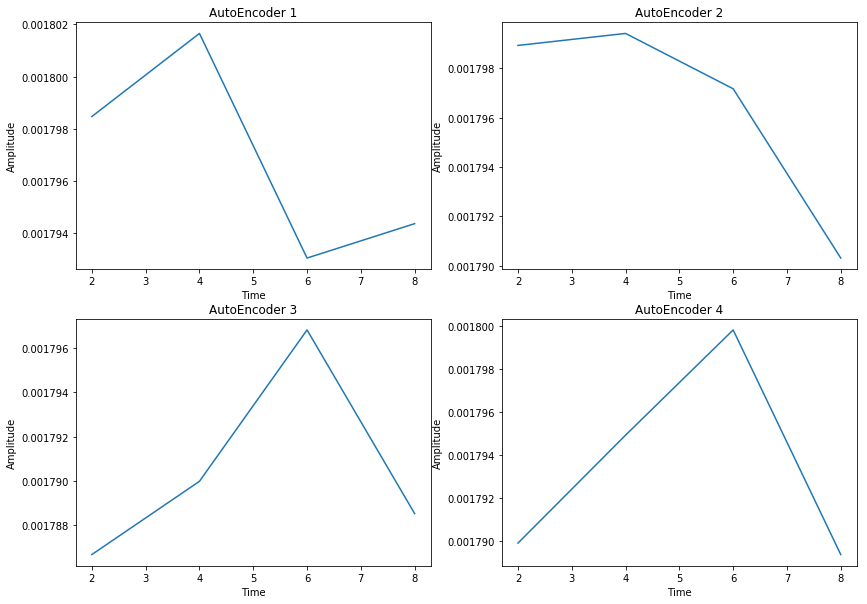

In [46]:
plt.figure(figsize=(14,10))

# n = [1, 30, 45, 50, 65]
n = [11, 290, 3490, 1098, 2707, 9, 871]


emb = [2,4,6,8]
arch1 = [0.0017984762402523252, 0.0018016567377428924, 0.0017930599271951697, 0.0017943769891973695]
arch2 = [0.0017989182184076453, 0.001799404280341577, 0.001797164402477713, 0.0017903115546122176]
arch3 = [0.0017866688326600632, 0.0017899772300277003, 0.0017968147442103705, 0.0017885191217271988]
arch4 = [0.0017898898554287973, 0.0017949140372790018, 0.0017998125576076341, 0.0017893562827363241]
plt.subplot(221)
plt.plot(emb, arch1)
plt.title('AutoEncoder 1')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(222)
plt.plot(emb, arch2)
plt.title('AutoEncoder 2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(223)
plt.plot(emb, arch3)
plt.title('AutoEncoder 3')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(224)
plt.plot(emb, arch4)
plt.title('AutoEncoder 4')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Architecture 1 - Correlation coefficient

In [92]:
ae_1 = torch.load('models/eval_ae/ae_1_2.pt', map_location=lambda storage, loc: storage)
ae_2 = torch.load('models/eval_ae/ae_1_4.pt', map_location=lambda storage, loc: storage)
ae_3 = torch.load('models/eval_ae/ae_1_6.pt', map_location=lambda storage, loc: storage)
ae_4 = torch.load('models/eval_ae/ae_1_8.pt', map_location=lambda storage, loc: storage)

enc_2 = np.zeros([total_sigs, 2])
out_2 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_1.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_2[i, :] = enc[:]
    out_2[i, :] = o[:]

enc_4 = np.zeros([total_sigs, 4])
out_4 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_2.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_4[i, :] = enc[:]
    out_4[i, :] = o[:]

enc_6 = np.zeros([total_sigs, 6])
out_6 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_3.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_6[i, :] = enc[:]
    out_6[i, :] = o[:]

enc_8 = np.zeros([total_sigs, 8])
out_8 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_4.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_8[i, :] = enc[:]
    out_8[i, :] = o[:]

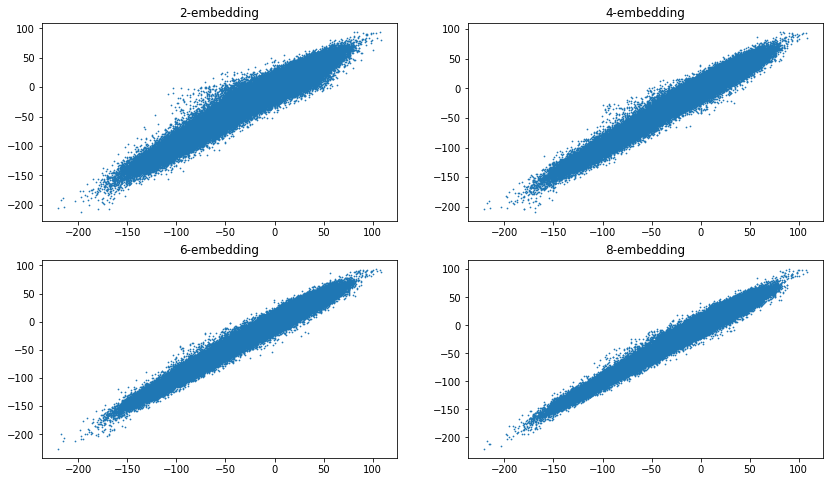

In [93]:
plt.figure(figsize=(14,8))

plt.subplot(221)
plt.scatter(electrode_data_test, out_2, s=0.5)
plt.title('2-embedding')
plt.subplot(222)
plt.scatter(electrode_data_test, out_4, s=0.5)
plt.title('4-embedding')
plt.subplot(223)
plt.scatter(electrode_data_test, out_6, s=0.5)
plt.title('6-embedding')
plt.subplot(224)
plt.scatter(electrode_data_test, out_8, s=0.5)
plt.title('8-embedding')
plt.show()

7317.0675973093175
7197.9793961526675
7162.239505894667
7146.290832306802


(6929.439863101346, 7331.448984019716)

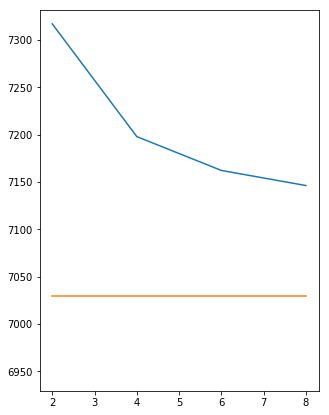

In [94]:
outs = [out_2, out_4, out_6, out_8]
best = np.linalg.norm(np.corrcoef(electrode_data_test, electrode_data_test))
corr_coeff = []
threshold = [best, best, best, best]
for output in outs:
    temp = np.corrcoef(electrode_data_test, output)
    corr_coeff.append(np.linalg.norm(temp))
    print(np.linalg.norm(temp))
emb = [2, 4, 6, 8]

plt.figure(figsize=(5,7))
plt.plot(emb, corr_coeff)
plt.plot(emb, threshold)
plt.ylim(ymin = best-100)

# Architecture 2 Correlation Coefficient

In [95]:
ae_1 = torch.load('models/eval_ae/ae_2_2.pt', map_location=lambda storage, loc: storage)
ae_2 = torch.load('models/eval_ae/ae_2_4.pt', map_location=lambda storage, loc: storage)
ae_3 = torch.load('models/eval_ae/ae_2_6.pt', map_location=lambda storage, loc: storage)
ae_4 = torch.load('models/eval_ae/ae_2_8.pt', map_location=lambda storage, loc: storage)

enc_2 = np.zeros([total_sigs, 2])
out_2 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_1.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_2[i, :] = enc[:]
    out_2[i, :] = o[:]

enc_4 = np.zeros([total_sigs, 4])
out_4 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_2.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_4[i, :] = enc[:]
    out_4[i, :] = o[:]

enc_6 = np.zeros([total_sigs, 6])
out_6 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_3.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_6[i, :] = enc[:]
    out_6[i, :] = o[:]

enc_8 = np.zeros([total_sigs, 8])
out_8 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_4.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_8[i, :] = enc[:]
    out_8[i, :] = o[:]

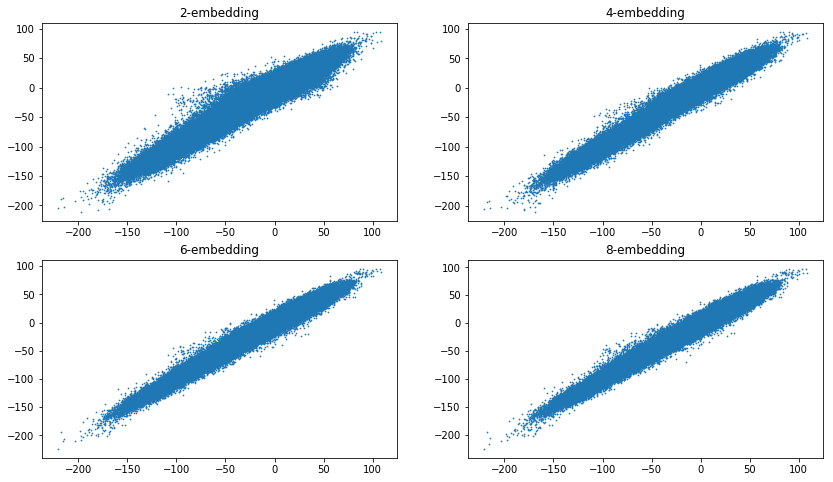

In [96]:
plt.figure(figsize=(14,8))

plt.subplot(221)
plt.scatter(electrode_data_test, out_2, s=0.5)
plt.title('2-embedding')
plt.subplot(222)
plt.scatter(electrode_data_test, out_4, s=0.5)
plt.title('4-embedding')
plt.subplot(223)
plt.scatter(electrode_data_test, out_6, s=0.5)
plt.title('6-embedding')
plt.subplot(224)
plt.scatter(electrode_data_test, out_8, s=0.5)
plt.title('8-embedding')
plt.show()

7311.961046642292
7191.6201633272785
7162.661867025595
7162.354988880896


(6929.439863101346, 7326.087105819339)

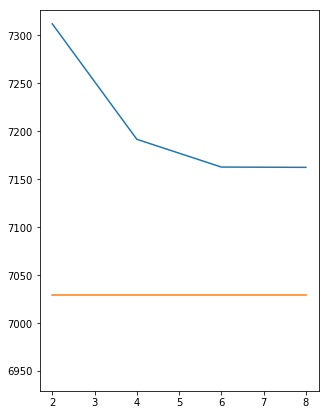

In [97]:
outs = [out_2, out_4, out_6, out_8]
best = np.linalg.norm(np.corrcoef(electrode_data_test, electrode_data_test))
corr_coeff = []
threshold = [best, best, best, best]
for output in outs:
    temp = np.corrcoef(electrode_data_test, output)
    corr_coeff.append(np.linalg.norm(temp))
    print(np.linalg.norm(temp))
emb = [2, 4, 6, 8]

plt.figure(figsize=(5,7))
plt.plot(emb, corr_coeff)
plt.plot(emb, threshold)
plt.ylim(ymin = best-100)

# Architecure 3 Correlation Coefficient

In [103]:
ae_1 = torch.load('models/eval_ae/ae_3_2.pt', map_location=lambda storage, loc: storage)
ae_2 = torch.load('models/eval_ae/ae_3_4.pt', map_location=lambda storage, loc: storage)
ae_3 = torch.load('models/eval_ae/ae_3_6.pt', map_location=lambda storage, loc: storage)
ae_4 = torch.load('models/eval_ae/ae_3_8.pt', map_location=lambda storage, loc: storage)

enc_2 = np.zeros([total_sigs, 2])
out_2 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_1.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_2[i, :] = enc[:]
    out_2[i, :] = o[:]

enc_4 = np.zeros([total_sigs, 4])
out_4 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_2.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_4[i, :] = enc[:]
    out_4[i, :] = o[:]

enc_6 = np.zeros([total_sigs, 6])
out_6 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_3.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_6[i, :] = enc[:]
    out_6[i, :] = o[:]

enc_8 = np.zeros([total_sigs, 8])
out_8 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_4.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_8[i, :] = enc[:]
    out_8[i, :] = o[:]

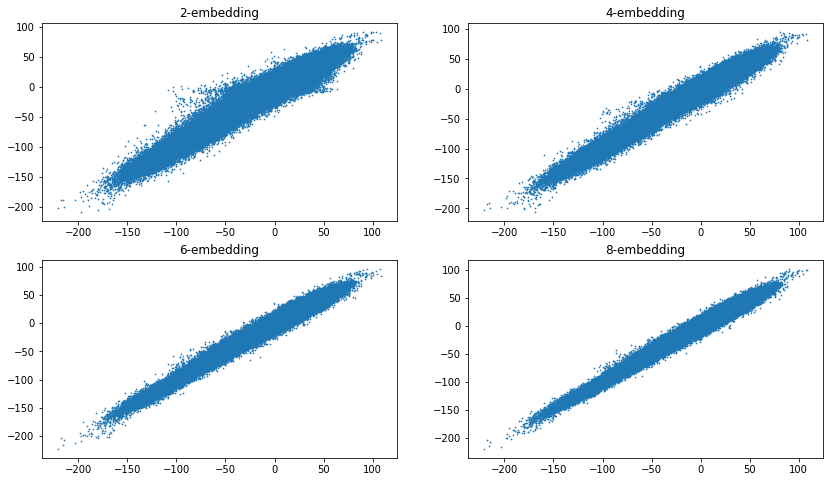

In [104]:
plt.figure(figsize=(14,8))

plt.subplot(221)
plt.scatter(electrode_data_test, out_2, s=0.5)
plt.title('2-embedding')
plt.subplot(222)
plt.scatter(electrode_data_test, out_4, s=0.5)
plt.title('4-embedding')
plt.subplot(223)
plt.scatter(electrode_data_test, out_6, s=0.5)
plt.title('6-embedding')
plt.subplot(224)
plt.scatter(electrode_data_test, out_8, s=0.5)
plt.title('8-embedding')
plt.show()

7297.606640608175
7186.04569341033
7141.716074445632
7117.375658649485


(6929.439863101346, 7311.014979483517)

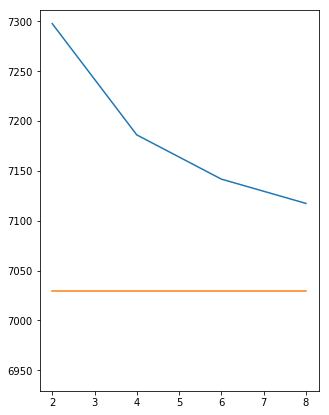

In [105]:
outs = [out_2, out_4, out_6, out_8]
best = np.linalg.norm(np.corrcoef(electrode_data_test, electrode_data_test))
corr_coeff = []
threshold = [best, best, best, best]
for output in outs:
    temp = np.corrcoef(electrode_data_test, output)
    corr_coeff.append(np.linalg.norm(temp))
    print(np.linalg.norm(temp))
emb = [2, 4, 6, 8]

plt.figure(figsize=(5,7))
plt.plot(emb, corr_coeff)
plt.plot(emb, threshold)
plt.ylim(ymin = best-100)

# Architecture 4 Correlation Coefficient

In [106]:
ae_1 = torch.load('models/eval_ae/ae_4_2.pt', map_location=lambda storage, loc: storage)
ae_2 = torch.load('models/eval_ae/ae_4_4.pt', map_location=lambda storage, loc: storage)
ae_3 = torch.load('models/eval_ae/ae_4_6.pt', map_location=lambda storage, loc: storage)
ae_4 = torch.load('models/eval_ae/ae_4_8.pt', map_location=lambda storage, loc: storage)

enc_2 = np.zeros([total_sigs, 2])
out_2 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_1.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_2[i, :] = enc[:]
    out_2[i, :] = o[:]

enc_4 = np.zeros([total_sigs, 4])
out_4 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_2.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_4[i, :] = enc[:]
    out_4[i, :] = o[:]

enc_6 = np.zeros([total_sigs, 6])
out_6 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_3.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_6[i, :] = enc[:]
    out_6[i, :] = o[:]

enc_8 = np.zeros([total_sigs, 8])
out_8 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_4.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_8[i, :] = enc[:]
    out_8[i, :] = o[:]

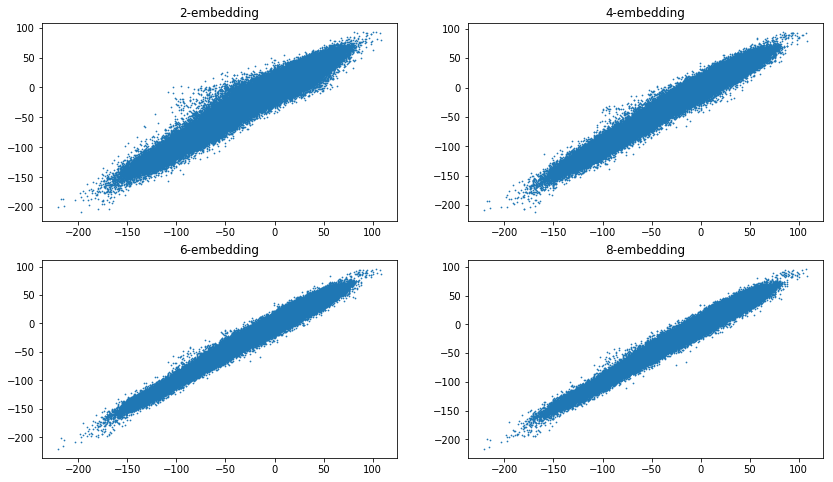

In [107]:
plt.figure(figsize=(14,8))

plt.subplot(221)
plt.scatter(electrode_data_test, out_2, s=0.5)
plt.title('2-embedding')
plt.subplot(222)
plt.scatter(electrode_data_test, out_4, s=0.5)
plt.title('4-embedding')
plt.subplot(223)
plt.scatter(electrode_data_test, out_6, s=0.5)
plt.title('6-embedding')
plt.subplot(224)
plt.scatter(electrode_data_test, out_8, s=0.5)
plt.title('8-embedding')
plt.show()

7304.915367667059
7187.305247764586
7140.4804690198
7140.045445656174


(6929.439863101346, 7318.689142895345)

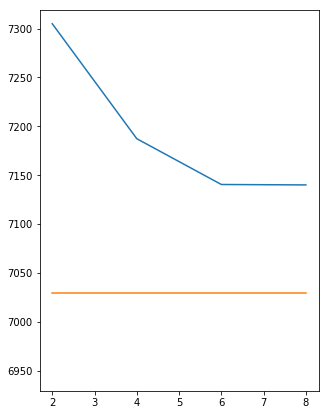

In [108]:
outs = [out_2, out_4, out_6, out_8]
best = np.linalg.norm(np.corrcoef(electrode_data_test, electrode_data_test))
corr_coeff = []
threshold = [best, best, best, best]
for output in outs:
    temp = np.corrcoef(electrode_data_test, output)
    corr_coeff.append(np.linalg.norm(temp))
    print(np.linalg.norm(temp))
emb = [2, 4, 6, 8]

plt.figure(figsize=(5,7))
plt.plot(emb, corr_coeff)
plt.plot(emb, threshold)
plt.ylim(ymin = best-100)

# Testing Deeper Architectures

In [209]:
class autoencoder_5(nn.Module):
    def __init__(self, input_size, embedding_size):
        super(autoencoder_5, self).__init__()
        activation_layer = nn.LeakyReLU()
        self.encoder = nn.Sequential(nn.Linear(input_size, 80),
                                     activation_layer,
                                     nn.Linear(80, 40),
                                     activation_layer,
                                     nn.Linear(40, 25),
                                     activation_layer,
                                     nn.Linear(25, 15),
                                     activation_layer,
                                     nn.Linear(15, 10),
                                     activation_layer,
                                     nn.Linear(10, embedding_size))
        self.decoder = nn.Sequential(nn.Linear(embedding_size, 10),
                                     activation_layer,
                                     nn.Linear(10, 25),
                                     activation_layer,
                                     nn.Linear(25, 80),
                                     activation_layer,
                                     nn.Linear(80, input_size))
    
    def forward(self, x):
        enc = self.encoder(x)
        dec = self.decoder(enc)
        return enc, dec

In [210]:
# Training the AE for encoder4

# Training for 8 embeddings

epoch_range = 6000
batch_size = 150
learning_rate = 0.0001
embedding_size = 8

ae_58 = autoencoder_5(length, embedding_size).cuda()
ae_58.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_58.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_58 = train_ae(ae_58, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Training for 6 embeddings

epoch_range = 6000
batch_size = 150
learning_rate = 0.0001
embedding_size = 6

ae_56 = autoencoder_5(length, embedding_size).cuda()
ae_56.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_56.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_56 = train_ae(ae_56, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Training for 4 embeddings

epoch_range = 6000
batch_size = 150
learning_rate = 0.0001
embedding_size = 4

ae_54 = autoencoder_5(length, embedding_size).cuda()
ae_54.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_54.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_54 = train_ae(ae_54, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Training for 2 embeddings

epoch_range = 6000
batch_size = 150
learning_rate = 0.0001
embedding_size = 2

ae_52 = autoencoder_5(length, embedding_size).cuda()
ae_52.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_52.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_52 = train_ae(ae_52, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Saving relevant files

# Saving Losses
np.save('models/eval_ae/losses_5_8', np.array(losses_58))
np.save('models/eval_ae/losses_5_6', np.array(losses_56))
np.save('models/eval_ae/losses_5_4', np.array(losses_54))
np.save('models/eval_ae/losses_5_2', np.array(losses_52))


# Saving Models
torch.save(ae_58, 'models/eval_ae/ae_5_8.pt') #Saving the autoencoder model
torch.save(ae_56, 'models/eval_ae/ae_5_6.pt') #Saving the autoencoder model
torch.save(ae_54, 'models/eval_ae/ae_5_4.pt') #Saving the autoencoder model
torch.save(ae_52, 'models/eval_ae/ae_5_2.pt') #Saving the autoencoder model

TOTAL PARAMETERS FOR MODEL: 15639
epoch [1/6000], loss:1021.13190, avg:1021.13190
epoch [2/6000], loss:171.68950, avg:596.41071
epoch [3/6000], loss:147.78737, avg:446.86960
epoch [4/6000], loss:340.60422, avg:420.30325
epoch [5/6000], loss:294.35339, avg:395.11328
epoch [6/6000], loss:43.28587, avg:336.47540
epoch [7/6000], loss:355.80063, avg:339.23615
epoch [8/6000], loss:164.31349, avg:317.37079
epoch [9/6000], loss:68.03041, avg:289.66632
epoch [10/6000], loss:47.05564, avg:265.40524
epoch [11/6000], loss:241.72028, avg:187.46410
epoch [12/6000], loss:248.12987, avg:195.10814
epoch [13/6000], loss:68.87102, avg:187.21649
epoch [14/6000], loss:54.66315, avg:158.62238
epoch [15/6000], loss:66.04392, avg:135.79143
epoch [16/6000], loss:165.32364, avg:147.99521
epoch [17/6000], loss:161.78006, avg:128.59315
epoch [18/6000], loss:138.17879, avg:125.97969
epoch [19/6000], loss:98.64547, avg:129.04118
epoch [20/6000], loss:94.32998, avg:133.76863
epoch [21/6000], loss:150.47578, avg:124.

epoch [180/6000], loss:62.02135, avg:61.02396
epoch [181/6000], loss:46.05853, avg:60.21912
epoch [182/6000], loss:52.56246, avg:61.16401
epoch [183/6000], loss:33.62088, avg:60.83691
epoch [184/6000], loss:42.56878, avg:60.45106
epoch [185/6000], loss:51.00490, avg:61.70825
epoch [186/6000], loss:58.11787, avg:61.08674
epoch [187/6000], loss:50.23843, avg:51.27816
epoch [188/6000], loss:49.33286, avg:49.94039
epoch [189/6000], loss:69.02590, avg:51.45520
epoch [190/6000], loss:45.78185, avg:49.83125
epoch [191/6000], loss:67.28460, avg:51.95386
epoch [192/6000], loss:69.88873, avg:53.68648
epoch [193/6000], loss:45.92770, avg:54.91716
epoch [194/6000], loss:43.38319, avg:54.99861
epoch [195/6000], loss:42.64036, avg:54.16215
epoch [196/6000], loss:53.70656, avg:53.72102
epoch [197/6000], loss:335.89151, avg:82.28633
epoch [198/6000], loss:69.68949, avg:84.32199
epoch [199/6000], loss:44.49245, avg:81.86864
epoch [200/6000], loss:70.47013, avg:84.33748
epoch [201/6000], loss:66.29099, 

epoch [358/6000], loss:55.89061, avg:53.63614
epoch [359/6000], loss:94.40305, avg:58.27555
epoch [360/6000], loss:68.95940, avg:60.63882
epoch [361/6000], loss:51.63242, avg:58.96908
epoch [362/6000], loss:39.70610, avg:59.74179
epoch [363/6000], loss:32.10500, avg:58.00326
epoch [364/6000], loss:71.32278, avg:57.73783
epoch [365/6000], loss:45.01559, avg:55.89855
epoch [366/6000], loss:94.39351, avg:60.25057
epoch [367/6000], loss:29.46458, avg:58.28930
epoch [368/6000], loss:46.89855, avg:57.39010
epoch [369/6000], loss:100.97670, avg:58.04746
epoch [370/6000], loss:49.33752, avg:56.08528
epoch [371/6000], loss:92.93885, avg:60.21592
epoch [372/6000], loss:51.40604, avg:61.38591
epoch [373/6000], loss:35.82790, avg:61.75821
epoch [374/6000], loss:31.80110, avg:57.80603
epoch [375/6000], loss:22.67460, avg:55.57194
epoch [376/6000], loss:48.06381, avg:50.93896
epoch [377/6000], loss:41.68002, avg:52.16051
epoch [378/6000], loss:36.16429, avg:51.08709
epoch [379/6000], loss:61.55151, 

epoch [537/6000], loss:41.47157, avg:40.35862
epoch [538/6000], loss:41.91272, avg:42.56936
epoch [539/6000], loss:39.47564, avg:42.05033
epoch [540/6000], loss:71.73489, avg:45.56310
epoch [541/6000], loss:34.45846, avg:45.88666
epoch [542/6000], loss:46.56593, avg:44.08865
epoch [543/6000], loss:40.23263, avg:41.98876
epoch [544/6000], loss:28.71856, avg:39.94130
epoch [545/6000], loss:71.37042, avg:45.30487
epoch [546/6000], loss:49.24750, avg:46.51883
epoch [547/6000], loss:54.29241, avg:47.80092
epoch [548/6000], loss:36.54041, avg:47.26369
epoch [549/6000], loss:49.12537, avg:48.22866
epoch [550/6000], loss:31.38827, avg:44.19400
epoch [551/6000], loss:41.41076, avg:44.88923
epoch [552/6000], loss:49.39416, avg:45.17205
epoch [553/6000], loss:26.77549, avg:43.82634
epoch [554/6000], loss:32.72968, avg:44.22745
epoch [555/6000], loss:40.13380, avg:41.10379
epoch [556/6000], loss:35.48119, avg:39.72715
epoch [557/6000], loss:51.06926, avg:39.40484
epoch [558/6000], loss:34.44451, a

epoch [715/6000], loss:41.13827, avg:54.57743
epoch [716/6000], loss:32.18589, avg:52.35499
epoch [717/6000], loss:35.97898, avg:53.04929
epoch [718/6000], loss:39.17208, avg:50.72126
epoch [719/6000], loss:31.28555, avg:50.20639
epoch [720/6000], loss:29.40275, avg:48.80242
epoch [721/6000], loss:45.33815, avg:48.02090
epoch [722/6000], loss:57.01488, avg:41.90316
epoch [723/6000], loss:62.21707, avg:41.12133
epoch [724/6000], loss:48.84112, avg:42.25748
epoch [725/6000], loss:26.67721, avg:40.81137
epoch [726/6000], loss:65.85619, avg:44.17840
epoch [727/6000], loss:31.44541, avg:43.72504
epoch [728/6000], loss:44.85247, avg:44.29308
epoch [729/6000], loss:48.79310, avg:46.04383
epoch [730/6000], loss:38.54960, avg:46.95852
epoch [731/6000], loss:55.19413, avg:47.94411
epoch [732/6000], loss:35.24704, avg:45.76733
epoch [733/6000], loss:52.40948, avg:44.78657
epoch [734/6000], loss:21.71938, avg:42.07440
epoch [735/6000], loss:55.80188, avg:44.98687
epoch [736/6000], loss:29.45903, a

epoch [894/6000], loss:48.49490, avg:41.19777
epoch [895/6000], loss:66.50784, avg:43.60504
epoch [896/6000], loss:53.54504, avg:45.39363
epoch [897/6000], loss:48.22122, avg:44.67479
epoch [898/6000], loss:20.60771, avg:42.26617
epoch [899/6000], loss:47.29565, avg:41.68339
epoch [900/6000], loss:71.76599, avg:44.68706
epoch [901/6000], loss:31.68349, avg:44.16288
epoch [902/6000], loss:28.43764, avg:44.41035
epoch [903/6000], loss:152.14287, avg:56.87024
epoch [904/6000], loss:58.59032, avg:57.87979
epoch [905/6000], loss:70.84066, avg:58.31306
epoch [906/6000], loss:18.97288, avg:54.85585
epoch [907/6000], loss:86.99905, avg:58.73362
epoch [908/6000], loss:47.55570, avg:61.42842
epoch [909/6000], loss:32.35374, avg:59.93423
epoch [910/6000], loss:46.40674, avg:57.39831
epoch [911/6000], loss:54.34859, avg:59.66481
epoch [912/6000], loss:42.30009, avg:61.05106
epoch [913/6000], loss:45.29081, avg:50.36586
epoch [914/6000], loss:30.02789, avg:47.50961
epoch [915/6000], loss:28.93961, 

epoch [1071/6000], loss:34.63608, avg:43.90294
epoch [1072/6000], loss:90.33312, avg:47.57196
epoch [1073/6000], loss:58.30196, avg:49.60580
epoch [1074/6000], loss:61.73896, avg:50.93446
epoch [1075/6000], loss:38.60771, avg:50.42482
epoch [1076/6000], loss:83.42348, avg:55.07106
epoch [1077/6000], loss:44.01151, avg:55.58593
epoch [1078/6000], loss:28.00163, avg:53.62391
epoch [1079/6000], loss:36.79879, avg:52.25875
epoch [1080/6000], loss:63.46385, avg:53.93171
epoch [1081/6000], loss:106.07979, avg:61.07608
epoch [1082/6000], loss:39.75738, avg:56.01851
epoch [1083/6000], loss:33.54584, avg:53.54290
epoch [1084/6000], loss:36.54633, avg:51.02363
epoch [1085/6000], loss:68.24227, avg:53.98709
epoch [1086/6000], loss:14.28036, avg:47.07278
epoch [1087/6000], loss:31.11190, avg:45.78282
epoch [1088/6000], loss:48.90482, avg:47.87313
epoch [1089/6000], loss:45.14291, avg:48.70755
epoch [1090/6000], loss:128.68622, avg:55.22979
epoch [1091/6000], loss:110.51160, avg:55.67297
epoch [109

epoch [1246/6000], loss:40.03788, avg:39.95086
epoch [1247/6000], loss:57.79306, avg:42.24624
epoch [1248/6000], loss:40.68306, avg:42.49102
epoch [1249/6000], loss:53.00875, avg:43.77158
epoch [1250/6000], loss:98.93893, avg:49.05915
epoch [1251/6000], loss:47.89723, avg:50.88432
epoch [1252/6000], loss:24.32007, avg:48.26660
epoch [1253/6000], loss:25.89819, avg:46.65816
epoch [1254/6000], loss:73.92079, avg:49.37877
epoch [1255/6000], loss:46.96354, avg:50.94615
epoch [1256/6000], loss:53.59949, avg:52.30231
epoch [1257/6000], loss:53.16089, avg:51.83910
epoch [1258/6000], loss:69.97749, avg:54.76854
epoch [1259/6000], loss:45.54413, avg:54.02208
epoch [1260/6000], loss:26.78571, avg:46.80675
epoch [1261/6000], loss:21.80379, avg:44.19741
epoch [1262/6000], loss:38.91626, avg:45.65703
epoch [1263/6000], loss:67.92153, avg:49.85936
epoch [1264/6000], loss:50.49760, avg:47.51704
epoch [1265/6000], loss:85.84067, avg:51.40476
epoch [1266/6000], loss:26.86887, avg:48.73169
epoch [1267/6

epoch [1421/6000], loss:74.13776, avg:52.86879
epoch [1422/6000], loss:66.15243, avg:56.04052
epoch [1423/6000], loss:34.79866, avg:56.18098
epoch [1424/6000], loss:31.57381, avg:54.80250
epoch [1425/6000], loss:29.80270, avg:53.06619
epoch [1426/6000], loss:18.92174, avg:42.67564
epoch [1427/6000], loss:34.89062, avg:41.92846
epoch [1428/6000], loss:42.57988, avg:42.86423
epoch [1429/6000], loss:110.31798, avg:49.05890
epoch [1430/6000], loss:57.13477, avg:50.03103
epoch [1431/6000], loss:49.65034, avg:47.58229
epoch [1432/6000], loss:35.64302, avg:44.53135
epoch [1433/6000], loss:30.94775, avg:44.14626
epoch [1434/6000], loss:53.84476, avg:46.37335
epoch [1435/6000], loss:36.87885, avg:47.08097
epoch [1436/6000], loss:37.20222, avg:48.90902
epoch [1437/6000], loss:27.77434, avg:48.19739
epoch [1438/6000], loss:44.33932, avg:48.37333
epoch [1439/6000], loss:42.87641, avg:41.62918
epoch [1440/6000], loss:87.66708, avg:44.68241
epoch [1441/6000], loss:29.67072, avg:42.68444
epoch [1442/

epoch [1596/6000], loss:38.42043, avg:35.57587
epoch [1597/6000], loss:32.45759, avg:36.57372
epoch [1598/6000], loss:24.26115, avg:36.25355
epoch [1599/6000], loss:56.85395, avg:37.28766
epoch [1600/6000], loss:72.86330, avg:40.77479
epoch [1601/6000], loss:88.29189, avg:44.95630
epoch [1602/6000], loss:67.01982, avg:47.24508
epoch [1603/6000], loss:50.71095, avg:49.15615
epoch [1604/6000], loss:38.02235, avg:49.60513
epoch [1605/6000], loss:28.03725, avg:49.69387
epoch [1606/6000], loss:45.69109, avg:50.42094
epoch [1607/6000], loss:39.74334, avg:51.14951
epoch [1608/6000], loss:54.04021, avg:54.12742
epoch [1609/6000], loss:41.48875, avg:52.59090
epoch [1610/6000], loss:37.98063, avg:49.10263
epoch [1611/6000], loss:42.56644, avg:44.53008
epoch [1612/6000], loss:44.14124, avg:42.24222
epoch [1613/6000], loss:33.40820, avg:40.51195
epoch [1614/6000], loss:62.12977, avg:42.92270
epoch [1615/6000], loss:21.92909, avg:42.31188
epoch [1616/6000], loss:33.15557, avg:41.05833
epoch [1617/6

epoch [1771/6000], loss:54.85898, avg:50.56142
epoch [1772/6000], loss:48.90202, avg:50.64575
epoch [1773/6000], loss:24.11017, avg:48.33694
epoch [1774/6000], loss:53.16288, avg:50.13926
epoch [1775/6000], loss:44.55205, avg:47.34246
epoch [1776/6000], loss:50.32281, avg:48.20590
epoch [1777/6000], loss:39.17798, avg:50.58028
epoch [1778/6000], loss:21.00774, avg:45.32293
epoch [1779/6000], loss:51.32928, avg:45.37593
epoch [1780/6000], loss:34.18123, avg:42.16052
epoch [1781/6000], loss:32.75300, avg:39.94992
epoch [1782/6000], loss:41.59046, avg:39.21876
epoch [1783/6000], loss:42.55486, avg:41.06323
epoch [1784/6000], loss:58.01153, avg:41.54810
epoch [1785/6000], loss:39.05428, avg:40.99832
epoch [1786/6000], loss:26.74410, avg:38.64045
epoch [1787/6000], loss:44.91165, avg:39.21381
epoch [1788/6000], loss:35.17371, avg:40.63041
epoch [1789/6000], loss:51.69963, avg:40.66745
epoch [1790/6000], loss:46.71637, avg:41.92096
epoch [1791/6000], loss:51.00671, avg:43.74633
epoch [1792/6

epoch [1946/6000], loss:45.66992, avg:44.51303
epoch [1947/6000], loss:28.48290, avg:44.70264
epoch [1948/6000], loss:42.78521, avg:44.53913
epoch [1949/6000], loss:42.19015, avg:42.39322
epoch [1950/6000], loss:67.00227, avg:45.04056
epoch [1951/6000], loss:26.79759, avg:43.28573
epoch [1952/6000], loss:45.84482, avg:44.06590
epoch [1953/6000], loss:59.32980, avg:45.14088
epoch [1954/6000], loss:39.25265, avg:46.74081
epoch [1955/6000], loss:24.60141, avg:42.19567
epoch [1956/6000], loss:45.86849, avg:42.21553
epoch [1957/6000], loss:43.85308, avg:43.75255
epoch [1958/6000], loss:38.86683, avg:43.36071
epoch [1959/6000], loss:41.28115, avg:43.26981
epoch [1960/6000], loss:37.81878, avg:40.35146
epoch [1961/6000], loss:37.88048, avg:41.45975
epoch [1962/6000], loss:53.30402, avg:42.20567
epoch [1963/6000], loss:65.13741, avg:42.78643
epoch [1964/6000], loss:33.92665, avg:42.25383
epoch [1965/6000], loss:46.10643, avg:44.40433
epoch [1966/6000], loss:36.46815, avg:43.46429
epoch [1967/6

epoch [2121/6000], loss:36.03468, avg:46.20849
epoch [2122/6000], loss:32.08653, avg:45.45383
epoch [2123/6000], loss:28.11939, avg:45.34697
epoch [2124/6000], loss:42.34901, avg:45.71667
epoch [2125/6000], loss:48.09630, avg:43.41536
epoch [2126/6000], loss:66.27534, avg:45.36011
epoch [2127/6000], loss:30.40481, avg:43.84624
epoch [2128/6000], loss:31.56798, avg:37.18464
epoch [2129/6000], loss:52.28861, avg:39.26757
epoch [2130/6000], loss:55.95478, avg:42.31774
epoch [2131/6000], loss:41.41017, avg:42.85529
epoch [2132/6000], loss:31.54198, avg:42.80084
epoch [2133/6000], loss:33.57303, avg:43.34620
epoch [2134/6000], loss:43.02062, avg:43.41336
epoch [2135/6000], loss:39.67456, avg:42.57119
epoch [2136/6000], loss:39.87829, avg:39.93148
epoch [2137/6000], loss:39.93397, avg:40.88440
epoch [2138/6000], loss:34.65320, avg:41.19292
epoch [2139/6000], loss:32.68231, avg:39.23229
epoch [2140/6000], loss:57.71774, avg:39.40858
epoch [2141/6000], loss:47.14911, avg:39.98248
epoch [2142/6

epoch [2296/6000], loss:34.75003, avg:59.03856
epoch [2297/6000], loss:64.95166, avg:61.03789
epoch [2298/6000], loss:57.02004, avg:57.91417
epoch [2299/6000], loss:36.95173, avg:56.02771
epoch [2300/6000], loss:40.76886, avg:56.18485
epoch [2301/6000], loss:40.61202, avg:49.12435
epoch [2302/6000], loss:38.41093, avg:50.55865
epoch [2303/6000], loss:29.20132, avg:45.30069
epoch [2304/6000], loss:24.18129, avg:43.74466
epoch [2305/6000], loss:38.44057, avg:40.52885
epoch [2306/6000], loss:50.94884, avg:42.14872
epoch [2307/6000], loss:35.34249, avg:39.18781
epoch [2308/6000], loss:76.85989, avg:41.17179
epoch [2309/6000], loss:22.18170, avg:39.69479
epoch [2310/6000], loss:33.23133, avg:38.94104
epoch [2311/6000], loss:32.87523, avg:38.16736
epoch [2312/6000], loss:45.90551, avg:38.91682
epoch [2313/6000], loss:24.21551, avg:38.41824
epoch [2314/6000], loss:36.45033, avg:39.64514
epoch [2315/6000], loss:60.45695, avg:41.84678
epoch [2316/6000], loss:44.58644, avg:41.21054
epoch [2317/6

epoch [2471/6000], loss:21.78408, avg:40.35357
epoch [2472/6000], loss:25.62837, avg:38.01565
epoch [2473/6000], loss:36.95314, avg:39.09931
epoch [2474/6000], loss:97.64116, avg:43.80701
epoch [2475/6000], loss:29.67900, avg:43.63692
epoch [2476/6000], loss:21.56335, avg:40.67925
epoch [2477/6000], loss:26.83540, avg:36.57249
epoch [2478/6000], loss:36.95624, avg:36.64889
epoch [2479/6000], loss:42.82106, avg:38.07067
epoch [2480/6000], loss:40.40000, avg:38.02618
epoch [2481/6000], loss:31.49063, avg:38.99683
epoch [2482/6000], loss:19.35199, avg:38.36920
epoch [2483/6000], loss:53.04821, avg:39.97871
epoch [2484/6000], loss:32.37726, avg:33.45231
epoch [2485/6000], loss:49.65351, avg:35.44976
epoch [2486/6000], loss:43.72554, avg:37.66598
epoch [2487/6000], loss:54.65383, avg:40.44783
epoch [2488/6000], loss:35.96409, avg:40.34861
epoch [2489/6000], loss:32.16435, avg:39.28294
epoch [2490/6000], loss:66.74647, avg:41.91758
epoch [2491/6000], loss:40.95664, avg:42.86419
epoch [2492/6

epoch [2646/6000], loss:31.50001, avg:51.68107
epoch [2647/6000], loss:43.42524, avg:46.87750
epoch [2648/6000], loss:38.96065, avg:48.54118
epoch [2649/6000], loss:43.04409, avg:48.95296
epoch [2650/6000], loss:32.77340, avg:47.14072
epoch [2651/6000], loss:31.79071, avg:45.76218
epoch [2652/6000], loss:40.30608, avg:46.38828
epoch [2653/6000], loss:46.44514, avg:41.36235
epoch [2654/6000], loss:63.18752, avg:43.16441
epoch [2655/6000], loss:33.19897, avg:40.46318
epoch [2656/6000], loss:32.10410, avg:40.52359
epoch [2657/6000], loss:42.65232, avg:40.44630
epoch [2658/6000], loss:32.89600, avg:39.83983
epoch [2659/6000], loss:37.56244, avg:39.29167
epoch [2660/6000], loss:48.63718, avg:40.87805
epoch [2661/6000], loss:50.43343, avg:42.74232
epoch [2662/6000], loss:52.62553, avg:43.97426
epoch [2663/6000], loss:28.43166, avg:42.17291
epoch [2664/6000], loss:34.45716, avg:39.29988
epoch [2665/6000], loss:30.42190, avg:39.02217
epoch [2666/6000], loss:40.87771, avg:39.89954
epoch [2667/6

epoch [2821/6000], loss:39.59211, avg:39.08140
epoch [2822/6000], loss:58.31282, avg:39.83862
epoch [2823/6000], loss:29.24416, avg:38.92263
epoch [2824/6000], loss:28.57159, avg:36.61589
epoch [2825/6000], loss:36.63713, avg:37.09814
epoch [2826/6000], loss:32.84085, avg:37.00822
epoch [2827/6000], loss:58.08892, avg:39.58062
epoch [2828/6000], loss:29.71372, avg:37.08950
epoch [2829/6000], loss:97.77738, avg:44.34540
epoch [2830/6000], loss:35.52567, avg:44.63043
epoch [2831/6000], loss:27.67686, avg:43.43891
epoch [2832/6000], loss:61.95132, avg:43.80276
epoch [2833/6000], loss:45.85530, avg:45.46387
epoch [2834/6000], loss:46.42617, avg:47.24933
epoch [2835/6000], loss:49.14157, avg:48.49977
epoch [2836/6000], loss:29.99194, avg:48.21489
epoch [2837/6000], loss:31.37463, avg:45.54346
epoch [2838/6000], loss:55.92676, avg:48.16476
epoch [2839/6000], loss:15.20841, avg:39.90786
epoch [2840/6000], loss:35.28671, avg:39.88397
epoch [2841/6000], loss:29.45132, avg:40.06141
epoch [2842/6

epoch [2996/6000], loss:31.90767, avg:34.62437
epoch [2997/6000], loss:47.90709, avg:35.77343
epoch [2998/6000], loss:34.69917, avg:34.88252
epoch [2999/6000], loss:22.06196, avg:33.94315
epoch [3000/6000], loss:47.45884, avg:33.93841
epoch [3001/6000], loss:40.18448, avg:34.17923
epoch [3002/6000], loss:76.54057, avg:39.47575
epoch [3003/6000], loss:24.08279, avg:38.27141
epoch [3004/6000], loss:29.47446, avg:38.59003
epoch [3005/6000], loss:35.36181, avg:38.96788
epoch [3006/6000], loss:32.92296, avg:39.06942
epoch [3007/6000], loss:41.94829, avg:38.47354
epoch [3008/6000], loss:68.56902, avg:41.86052
epoch [3009/6000], loss:51.24945, avg:44.77927
epoch [3010/6000], loss:53.27085, avg:45.36047
epoch [3011/6000], loss:40.22046, avg:45.36407
epoch [3012/6000], loss:31.12602, avg:40.82261
epoch [3013/6000], loss:39.31317, avg:42.34565
epoch [3014/6000], loss:32.63601, avg:42.66181
epoch [3015/6000], loss:95.70479, avg:48.69611
epoch [3016/6000], loss:27.26792, avg:48.13060
epoch [3017/6

epoch [3171/6000], loss:41.53200, avg:39.30519
epoch [3172/6000], loss:22.33755, avg:37.80094
epoch [3173/6000], loss:39.06410, avg:36.18293
epoch [3174/6000], loss:26.99868, avg:35.98287
epoch [3175/6000], loss:74.46850, avg:39.11572
epoch [3176/6000], loss:58.40146, avg:40.58052
epoch [3177/6000], loss:37.88211, avg:39.78835
epoch [3178/6000], loss:42.89273, avg:42.32924
epoch [3179/6000], loss:44.60728, avg:40.83839
epoch [3180/6000], loss:45.97532, avg:43.41597
epoch [3181/6000], loss:48.89653, avg:44.15243
epoch [3182/6000], loss:46.57223, avg:46.57589
epoch [3183/6000], loss:39.21778, avg:46.59126
epoch [3184/6000], loss:24.33489, avg:46.32489
epoch [3185/6000], loss:53.03306, avg:44.18134
epoch [3186/6000], loss:56.61280, avg:44.00247
epoch [3187/6000], loss:41.73727, avg:44.38799
epoch [3188/6000], loss:24.97888, avg:42.59661
epoch [3189/6000], loss:57.21381, avg:43.85726
epoch [3190/6000], loss:25.68198, avg:41.82792
epoch [3191/6000], loss:27.27586, avg:39.66586
epoch [3192/6

epoch [3346/6000], loss:37.76657, avg:45.97374
epoch [3347/6000], loss:47.55309, avg:43.62295
epoch [3348/6000], loss:55.04341, avg:46.24208
epoch [3349/6000], loss:39.42413, avg:48.23604
epoch [3350/6000], loss:19.49988, avg:43.24231
epoch [3351/6000], loss:40.68842, avg:43.30923
epoch [3352/6000], loss:46.50176, avg:45.41665
epoch [3353/6000], loss:64.46153, avg:46.59262
epoch [3354/6000], loss:58.11269, avg:46.17596
epoch [3355/6000], loss:39.58588, avg:44.86374
epoch [3356/6000], loss:74.67716, avg:48.55479
epoch [3357/6000], loss:40.21713, avg:47.82120
epoch [3358/6000], loss:48.37011, avg:47.15387
epoch [3359/6000], loss:20.93229, avg:45.30468
epoch [3360/6000], loss:43.06717, avg:47.66142
epoch [3361/6000], loss:43.97690, avg:47.99026
epoch [3362/6000], loss:28.04536, avg:46.14462
epoch [3363/6000], loss:44.47496, avg:44.14597
epoch [3364/6000], loss:38.32393, avg:42.16708
epoch [3365/6000], loss:64.96133, avg:44.70463
epoch [3366/6000], loss:33.70535, avg:40.60745
epoch [3367/6

epoch [3521/6000], loss:69.28054, avg:38.21607
epoch [3522/6000], loss:29.71695, avg:37.30403
epoch [3523/6000], loss:43.64924, avg:38.34184
epoch [3524/6000], loss:73.79062, avg:43.48919
epoch [3525/6000], loss:52.28610, avg:45.77610
epoch [3526/6000], loss:53.46570, avg:46.52102
epoch [3527/6000], loss:14.37126, avg:44.50474
epoch [3528/6000], loss:46.67318, avg:46.28754
epoch [3529/6000], loss:63.72465, avg:48.71757
epoch [3530/6000], loss:73.51363, avg:52.04719
epoch [3531/6000], loss:33.49679, avg:48.46881
epoch [3532/6000], loss:24.67059, avg:47.96418
epoch [3533/6000], loss:19.29479, avg:45.52873
epoch [3534/6000], loss:27.79184, avg:40.92886
epoch [3535/6000], loss:25.02801, avg:38.20305
epoch [3536/6000], loss:71.81309, avg:40.03778
epoch [3537/6000], loss:58.49209, avg:44.44987
epoch [3538/6000], loss:27.71956, avg:42.55450
epoch [3539/6000], loss:64.45398, avg:42.62744
epoch [3540/6000], loss:35.35771, avg:38.81184
epoch [3541/6000], loss:31.33145, avg:38.59531
epoch [3542/6

epoch [3696/6000], loss:46.70482, avg:44.58973
epoch [3697/6000], loss:52.51979, avg:41.93230
epoch [3698/6000], loss:50.30296, avg:41.84187
epoch [3699/6000], loss:43.50550, avg:43.85331
epoch [3700/6000], loss:99.46291, avg:50.54354
epoch [3701/6000], loss:51.81007, avg:51.92915
epoch [3702/6000], loss:38.84283, avg:51.37805
epoch [3703/6000], loss:35.48207, avg:51.16065
epoch [3704/6000], loss:75.73174, avg:54.26864
epoch [3705/6000], loss:33.41247, avg:52.77752
epoch [3706/6000], loss:29.45963, avg:51.05300
epoch [3707/6000], loss:26.23197, avg:48.42421
epoch [3708/6000], loss:35.77695, avg:46.97161
epoch [3709/6000], loss:24.14079, avg:45.03514
epoch [3710/6000], loss:42.77354, avg:39.36620
epoch [3711/6000], loss:40.96219, avg:38.28142
epoch [3712/6000], loss:40.61927, avg:38.45906
epoch [3713/6000], loss:36.71447, avg:38.58231
epoch [3714/6000], loss:34.33211, avg:34.44234
epoch [3715/6000], loss:40.03139, avg:35.10424
epoch [3716/6000], loss:44.59533, avg:36.61780
epoch [3717/6

epoch [3871/6000], loss:45.73173, avg:38.90718
epoch [3872/6000], loss:42.26238, avg:40.94714
epoch [3873/6000], loss:42.13160, avg:40.03601
epoch [3874/6000], loss:51.16575, avg:43.12365
epoch [3875/6000], loss:32.24437, avg:39.71529
epoch [3876/6000], loss:26.46759, avg:39.24091
epoch [3877/6000], loss:39.57632, avg:39.39612
epoch [3878/6000], loss:28.11002, avg:38.81222
epoch [3879/6000], loss:76.61569, avg:41.65687
epoch [3880/6000], loss:34.46127, avg:41.87667
epoch [3881/6000], loss:27.46908, avg:40.05041
epoch [3882/6000], loss:86.91473, avg:44.51564
epoch [3883/6000], loss:49.73727, avg:45.27621
epoch [3884/6000], loss:26.75629, avg:42.83526
epoch [3885/6000], loss:28.44686, avg:42.45552
epoch [3886/6000], loss:34.85962, avg:43.29472
epoch [3887/6000], loss:42.77126, avg:43.61421
epoch [3888/6000], loss:48.43589, avg:45.64680
epoch [3889/6000], loss:59.12207, avg:43.89744
epoch [3890/6000], loss:42.33470, avg:44.68478
epoch [3891/6000], loss:55.24420, avg:47.46229
epoch [3892/6

epoch [4046/6000], loss:15.02775, avg:45.12888
epoch [4047/6000], loss:26.51422, avg:44.76198
epoch [4048/6000], loss:32.29104, avg:44.52143
epoch [4049/6000], loss:30.45886, avg:40.20710
epoch [4050/6000], loss:32.51845, avg:35.54719
epoch [4051/6000], loss:41.09942, avg:36.66858
epoch [4052/6000], loss:37.66811, avg:35.99784
epoch [4053/6000], loss:44.22644, avg:36.85643
epoch [4054/6000], loss:48.86609, avg:34.93681
epoch [4055/6000], loss:57.28765, avg:36.59581
epoch [4056/6000], loss:38.56050, avg:38.94908
epoch [4057/6000], loss:27.74933, avg:39.07259
epoch [4058/6000], loss:26.07338, avg:38.45082
epoch [4059/6000], loss:34.36810, avg:38.84175
epoch [4060/6000], loss:40.00539, avg:39.59044
epoch [4061/6000], loss:45.80831, avg:40.06133
epoch [4062/6000], loss:40.31647, avg:40.32617
epoch [4063/6000], loss:55.66882, avg:41.47041
epoch [4064/6000], loss:28.31109, avg:39.41491
epoch [4065/6000], loss:41.82634, avg:37.86877
epoch [4066/6000], loss:22.21459, avg:36.23418
epoch [4067/6

epoch [4221/6000], loss:51.76966, avg:45.30901
epoch [4222/6000], loss:25.26779, avg:44.82618
epoch [4223/6000], loss:29.08529, avg:43.78395
epoch [4224/6000], loss:35.90853, avg:41.61453
epoch [4225/6000], loss:49.77053, avg:42.99435
epoch [4226/6000], loss:51.69370, avg:42.69767
epoch [4227/6000], loss:27.94819, avg:41.89074
epoch [4228/6000], loss:67.33463, avg:44.40757
epoch [4229/6000], loss:44.62301, avg:42.61347
epoch [4230/6000], loss:44.79577, avg:42.81971
epoch [4231/6000], loss:70.74657, avg:44.71740
epoch [4232/6000], loss:44.23626, avg:46.61425
epoch [4233/6000], loss:44.95609, avg:48.20133
epoch [4234/6000], loss:23.35960, avg:46.94644
epoch [4235/6000], loss:32.43605, avg:45.21299
epoch [4236/6000], loss:44.79675, avg:44.52329
epoch [4237/6000], loss:40.33601, avg:45.76207
epoch [4238/6000], loss:38.10968, avg:42.83958
epoch [4239/6000], loss:30.49103, avg:41.42638
epoch [4240/6000], loss:41.43871, avg:41.09068
epoch [4241/6000], loss:46.94258, avg:38.71028
epoch [4242/6

epoch [4396/6000], loss:52.28585, avg:40.23151
epoch [4397/6000], loss:38.78055, avg:39.92729
epoch [4398/6000], loss:31.95784, avg:41.89846
epoch [4399/6000], loss:38.76661, avg:40.22107
epoch [4400/6000], loss:52.17701, avg:41.58427
epoch [4401/6000], loss:17.89354, avg:38.30017
epoch [4402/6000], loss:63.37928, avg:41.69096
epoch [4403/6000], loss:52.17286, avg:41.98281
epoch [4404/6000], loss:33.44317, avg:40.56630
epoch [4405/6000], loss:47.10843, avg:42.79651
epoch [4406/6000], loss:28.94706, avg:40.46263
epoch [4407/6000], loss:35.61268, avg:40.14584
epoch [4408/6000], loss:44.70712, avg:41.42077
epoch [4409/6000], loss:44.87045, avg:42.03116
epoch [4410/6000], loss:47.39904, avg:41.55336
epoch [4411/6000], loss:75.51006, avg:47.31502
epoch [4412/6000], loss:33.31299, avg:44.30839
epoch [4413/6000], loss:37.57084, avg:42.84819
epoch [4414/6000], loss:38.69152, avg:43.37302
epoch [4415/6000], loss:40.39347, avg:42.70152
epoch [4416/6000], loss:43.49458, avg:44.15628
epoch [4417/6

epoch [4571/6000], loss:44.18885, avg:37.93939
epoch [4572/6000], loss:26.00038, avg:37.97185
epoch [4573/6000], loss:35.35683, avg:37.02535
epoch [4574/6000], loss:31.89592, avg:36.65754
epoch [4575/6000], loss:26.00433, avg:34.68675
epoch [4576/6000], loss:57.15232, avg:36.48620
epoch [4577/6000], loss:43.83583, avg:39.38720
epoch [4578/6000], loss:53.66735, avg:38.96226
epoch [4579/6000], loss:44.56979, avg:40.79684
epoch [4580/6000], loss:48.15701, avg:41.08286
epoch [4581/6000], loss:29.68521, avg:39.63250
epoch [4582/6000], loss:25.69909, avg:39.60237
epoch [4583/6000], loss:41.35645, avg:40.20233
epoch [4584/6000], loss:102.18453, avg:47.23119
epoch [4585/6000], loss:52.09206, avg:49.83997
epoch [4586/6000], loss:30.37814, avg:47.16255
epoch [4587/6000], loss:54.59542, avg:48.23851
epoch [4588/6000], loss:28.37287, avg:45.70906
epoch [4589/6000], loss:24.08978, avg:43.66105
epoch [4590/6000], loss:46.30756, avg:43.47611
epoch [4591/6000], loss:36.40144, avg:44.14773
epoch [4592/

epoch [4746/6000], loss:36.43175, avg:47.16307
epoch [4747/6000], loss:21.96692, avg:45.40999
epoch [4748/6000], loss:22.50846, avg:41.57299
epoch [4749/6000], loss:40.32048, avg:41.87868
epoch [4750/6000], loss:41.34388, avg:40.13797
epoch [4751/6000], loss:27.55881, avg:38.20498
epoch [4752/6000], loss:36.00565, avg:38.17048
epoch [4753/6000], loss:37.84002, avg:35.98917
epoch [4754/6000], loss:30.12241, avg:34.59422
epoch [4755/6000], loss:26.19818, avg:32.02966
epoch [4756/6000], loss:36.28949, avg:32.01543
epoch [4757/6000], loss:45.09893, avg:34.32863
epoch [4758/6000], loss:63.19604, avg:38.39739
epoch [4759/6000], loss:38.98124, avg:38.26347
epoch [4760/6000], loss:40.67090, avg:38.19617
epoch [4761/6000], loss:42.05818, avg:39.64611
epoch [4762/6000], loss:48.16803, avg:40.86234
epoch [4763/6000], loss:41.44537, avg:41.22288
epoch [4764/6000], loss:28.05531, avg:41.01617
epoch [4765/6000], loss:33.20294, avg:41.71664
epoch [4766/6000], loss:31.04894, avg:41.19259
epoch [4767/6

epoch [4921/6000], loss:23.08729, avg:47.84980
epoch [4922/6000], loss:50.04092, avg:50.40187
epoch [4923/6000], loss:38.06107, avg:49.92170
epoch [4924/6000], loss:45.82042, avg:48.90380
epoch [4925/6000], loss:33.45558, avg:48.40739
epoch [4926/6000], loss:37.99628, avg:47.21350
epoch [4927/6000], loss:46.17221, avg:46.27274
epoch [4928/6000], loss:36.87050, avg:42.54044
epoch [4929/6000], loss:57.30805, avg:40.91055
epoch [4930/6000], loss:66.92310, avg:43.57354
epoch [4931/6000], loss:40.42078, avg:45.30689
epoch [4932/6000], loss:33.32224, avg:43.63502
epoch [4933/6000], loss:37.90576, avg:43.61949
epoch [4934/6000], loss:51.98979, avg:44.23643
epoch [4935/6000], loss:69.99158, avg:47.89003
epoch [4936/6000], loss:33.06442, avg:47.39684
epoch [4937/6000], loss:36.35263, avg:46.41488
epoch [4938/6000], loss:36.58838, avg:46.38667
epoch [4939/6000], loss:17.92249, avg:42.44812
epoch [4940/6000], loss:47.81832, avg:40.53764
epoch [4941/6000], loss:32.29567, avg:39.72512
epoch [4942/6

epoch [5096/6000], loss:51.68990, avg:34.84996
epoch [5097/6000], loss:40.78547, avg:34.81144
epoch [5098/6000], loss:19.74633, avg:34.67358
epoch [5099/6000], loss:46.53904, avg:36.74865
epoch [5100/6000], loss:37.32564, avg:37.59062
epoch [5101/6000], loss:43.09551, avg:39.60280
epoch [5102/6000], loss:19.50685, avg:36.79602
epoch [5103/6000], loss:30.68409, avg:37.00266
epoch [5104/6000], loss:44.96486, avg:38.48744
epoch [5105/6000], loss:33.08384, avg:36.74215
epoch [5106/6000], loss:42.29902, avg:35.80307
epoch [5107/6000], loss:45.87009, avg:36.31153
epoch [5108/6000], loss:47.65755, avg:39.10265
epoch [5109/6000], loss:99.25880, avg:44.37463
epoch [5110/6000], loss:33.51833, avg:43.99389
epoch [5111/6000], loss:24.17622, avg:42.10197
epoch [5112/6000], loss:54.41211, avg:45.59249
epoch [5113/6000], loss:38.03204, avg:46.32729
epoch [5114/6000], loss:47.33868, avg:46.56467
epoch [5115/6000], loss:23.23850, avg:45.58014
epoch [5116/6000], loss:39.71500, avg:45.32173
epoch [5117/6

epoch [5271/6000], loss:38.65171, avg:32.19374
epoch [5272/6000], loss:37.52950, avg:32.27196
epoch [5273/6000], loss:40.34925, avg:33.69535
epoch [5274/6000], loss:48.52751, avg:36.10704
epoch [5275/6000], loss:44.12599, avg:38.58519
epoch [5276/6000], loss:35.16553, avg:39.60920
epoch [5277/6000], loss:35.51193, avg:37.83696
epoch [5278/6000], loss:28.52569, avg:37.79605
epoch [5279/6000], loss:15.38615, avg:37.42073
epoch [5280/6000], loss:39.40524, avg:36.31785
epoch [5281/6000], loss:24.64582, avg:34.91726
epoch [5282/6000], loss:34.34382, avg:34.59869
epoch [5283/6000], loss:44.88873, avg:35.05264
epoch [5284/6000], loss:41.59679, avg:34.35957
epoch [5285/6000], loss:43.34610, avg:34.28158
epoch [5286/6000], loss:60.32152, avg:36.79718
epoch [5287/6000], loss:26.33779, avg:35.87977
epoch [5288/6000], loss:46.20536, avg:37.64773
epoch [5289/6000], loss:53.08397, avg:41.41751
epoch [5290/6000], loss:36.55238, avg:41.13223
epoch [5291/6000], loss:30.51742, avg:41.71939
epoch [5292/6

epoch [5446/6000], loss:32.67125, avg:41.48601
epoch [5447/6000], loss:42.34049, avg:43.23373
epoch [5448/6000], loss:36.75063, avg:43.14938
epoch [5449/6000], loss:30.45755, avg:41.14367
epoch [5450/6000], loss:28.53084, avg:41.17567
epoch [5451/6000], loss:28.89295, avg:38.57072
epoch [5452/6000], loss:43.47813, avg:39.29138
epoch [5453/6000], loss:33.37906, avg:39.92845
epoch [5454/6000], loss:55.07438, avg:39.50547
epoch [5455/6000], loss:29.93269, avg:36.15080
epoch [5456/6000], loss:36.76287, avg:36.55996
epoch [5457/6000], loss:62.71602, avg:38.59752
epoch [5458/6000], loss:46.45761, avg:39.56821
epoch [5459/6000], loss:25.54796, avg:39.07725
epoch [5460/6000], loss:31.45924, avg:39.37009
epoch [5461/6000], loss:65.52719, avg:43.03352
epoch [5462/6000], loss:39.83539, avg:42.66924
epoch [5463/6000], loss:33.13010, avg:42.64434
epoch [5464/6000], loss:35.57604, avg:40.69451
epoch [5465/6000], loss:41.71532, avg:41.87277
epoch [5466/6000], loss:14.23567, avg:39.62006
epoch [5467/6

epoch [5621/6000], loss:61.23628, avg:39.20539
epoch [5622/6000], loss:51.23920, avg:39.88309
epoch [5623/6000], loss:48.19473, avg:41.81792
epoch [5624/6000], loss:22.98426, avg:40.18008
epoch [5625/6000], loss:30.35823, avg:39.93634
epoch [5626/6000], loss:40.57871, avg:40.41685
epoch [5627/6000], loss:35.41793, avg:41.64474
epoch [5628/6000], loss:36.63650, avg:42.04385
epoch [5629/6000], loss:35.30886, avg:42.26223
epoch [5630/6000], loss:34.27601, avg:39.62307
epoch [5631/6000], loss:63.77774, avg:39.87722
epoch [5632/6000], loss:40.61450, avg:38.81475
epoch [5633/6000], loss:54.35168, avg:39.43044
epoch [5634/6000], loss:38.95096, avg:41.02711
epoch [5635/6000], loss:47.08171, avg:42.69946
epoch [5636/6000], loss:60.22817, avg:44.66441
epoch [5637/6000], loss:30.75068, avg:44.19768
epoch [5638/6000], loss:31.39452, avg:43.67348
epoch [5639/6000], loss:65.52329, avg:46.69493
epoch [5640/6000], loss:24.89574, avg:45.75690
epoch [5641/6000], loss:32.19913, avg:42.59904
epoch [5642/6

epoch [5796/6000], loss:69.89191, avg:36.54889
epoch [5797/6000], loss:23.87427, avg:36.93624
epoch [5798/6000], loss:23.27144, avg:35.54673
epoch [5799/6000], loss:35.93439, avg:36.62642
epoch [5800/6000], loss:80.71700, avg:42.36066
epoch [5801/6000], loss:52.30510, avg:42.51474
epoch [5802/6000], loss:92.59635, avg:49.26143
epoch [5803/6000], loss:45.85892, avg:49.17302
epoch [5804/6000], loss:54.44511, avg:51.64730
epoch [5805/6000], loss:32.81777, avg:51.17123
epoch [5806/6000], loss:22.48397, avg:46.43043
epoch [5807/6000], loss:38.31084, avg:47.87409
epoch [5808/6000], loss:18.81943, avg:47.42889
epoch [5809/6000], loss:46.22887, avg:48.45834
epoch [5810/6000], loss:53.75158, avg:45.76180
epoch [5811/6000], loss:46.28498, avg:45.15979
epoch [5812/6000], loss:47.06511, avg:40.60666
epoch [5813/6000], loss:53.28571, avg:41.34934
epoch [5814/6000], loss:43.27463, avg:40.23229
epoch [5815/6000], loss:43.36546, avg:41.28706
epoch [5816/6000], loss:82.30191, avg:47.26885
epoch [5817/6

epoch [5971/6000], loss:39.09660, avg:39.45147
epoch [5972/6000], loss:50.60145, avg:40.01175
epoch [5973/6000], loss:72.18793, avg:40.53703
epoch [5974/6000], loss:33.94068, avg:42.29053
epoch [5975/6000], loss:40.93339, avg:42.36386
epoch [5976/6000], loss:51.68428, avg:44.17465
epoch [5977/6000], loss:25.95871, avg:43.54037
epoch [5978/6000], loss:49.96537, avg:43.76975
epoch [5979/6000], loss:42.66136, avg:43.82547
epoch [5980/6000], loss:21.36044, avg:42.83902
epoch [5981/6000], loss:32.57014, avg:42.18637
epoch [5982/6000], loss:39.91257, avg:41.11749
epoch [5983/6000], loss:94.36579, avg:43.33527
epoch [5984/6000], loss:87.37417, avg:48.67862
epoch [5985/6000], loss:60.91229, avg:50.67651
epoch [5986/6000], loss:36.34777, avg:49.14286
epoch [5987/6000], loss:43.35066, avg:50.88206
epoch [5988/6000], loss:51.52077, avg:51.03760
epoch [5989/6000], loss:48.29668, avg:51.60113
epoch [5990/6000], loss:38.44135, avg:53.30922
epoch [5991/6000], loss:23.34282, avg:52.38649
epoch [5992/6

epoch [147/6000], loss:54.00079, avg:78.73159
epoch [148/6000], loss:83.90147, avg:79.62186
epoch [149/6000], loss:57.88184, avg:77.13856
epoch [150/6000], loss:59.52005, avg:79.01913
epoch [151/6000], loss:147.81290, avg:86.33406
epoch [152/6000], loss:75.45145, avg:82.73446
epoch [153/6000], loss:174.20439, avg:95.66219
epoch [154/6000], loss:64.88165, avg:92.22457
epoch [155/6000], loss:51.22942, avg:81.75170
epoch [156/6000], loss:37.55922, avg:80.64432
epoch [157/6000], loss:62.87782, avg:81.53202
epoch [158/6000], loss:68.93863, avg:80.03573
epoch [159/6000], loss:65.25079, avg:80.77263
epoch [160/6000], loss:39.75200, avg:78.79583
epoch [161/6000], loss:64.58294, avg:70.47283
epoch [162/6000], loss:57.31425, avg:68.65911
epoch [163/6000], loss:55.20595, avg:56.75927
epoch [164/6000], loss:67.16573, avg:56.98767
epoch [165/6000], loss:34.28435, avg:55.29316
epoch [166/6000], loss:107.96668, avg:62.33391
epoch [167/6000], loss:99.20485, avg:65.96661
epoch [168/6000], loss:63.18168

epoch [325/6000], loss:42.67272, avg:61.53736
epoch [326/6000], loss:340.24893, avg:88.27978
epoch [327/6000], loss:53.31092, avg:89.20223
epoch [328/6000], loss:88.68175, avg:92.27412
epoch [329/6000], loss:74.36258, avg:95.36045
epoch [330/6000], loss:47.82366, avg:94.18884
epoch [331/6000], loss:50.93077, avg:85.90709
epoch [332/6000], loss:33.74569, avg:81.98352
epoch [333/6000], loss:89.67885, avg:86.76780
epoch [334/6000], loss:80.88519, avg:90.23410
epoch [335/6000], loss:138.50262, avg:99.81709
epoch [336/6000], loss:53.72655, avg:71.16486
epoch [337/6000], loss:54.73642, avg:71.30741
epoch [338/6000], loss:56.21579, avg:68.06081
epoch [339/6000], loss:50.68253, avg:65.69281
epoch [340/6000], loss:53.11356, avg:66.22179
epoch [341/6000], loss:57.57781, avg:66.88651
epoch [342/6000], loss:51.89851, avg:68.70178
epoch [343/6000], loss:65.98207, avg:66.33211
epoch [344/6000], loss:62.61420, avg:64.50500
epoch [345/6000], loss:81.75397, avg:58.83014
epoch [346/6000], loss:57.92485,

epoch [503/6000], loss:55.04928, avg:64.55419
epoch [504/6000], loss:42.23434, avg:61.25990
epoch [505/6000], loss:62.49979, avg:60.91544
epoch [506/6000], loss:104.51811, avg:62.47110
epoch [507/6000], loss:66.45896, avg:64.39970
epoch [508/6000], loss:57.75860, avg:63.18476
epoch [509/6000], loss:66.55605, avg:62.12437
epoch [510/6000], loss:45.78206, avg:61.63121
epoch [511/6000], loss:68.67971, avg:61.04599
epoch [512/6000], loss:47.52710, avg:61.70640
epoch [513/6000], loss:69.78443, avg:63.17992
epoch [514/6000], loss:41.90144, avg:63.14663
epoch [515/6000], loss:219.60060, avg:78.85671
epoch [516/6000], loss:47.84737, avg:73.18963
epoch [517/6000], loss:67.17752, avg:73.26149
epoch [518/6000], loss:76.43183, avg:75.12881
epoch [519/6000], loss:61.37556, avg:74.61076
epoch [520/6000], loss:25.66618, avg:72.59917
epoch [521/6000], loss:31.44321, avg:68.87553
epoch [522/6000], loss:53.87886, avg:69.51070
epoch [523/6000], loss:64.37202, avg:68.96946
epoch [524/6000], loss:76.18582,

epoch [681/6000], loss:38.42077, avg:54.26707
epoch [682/6000], loss:80.70498, avg:60.10856
epoch [683/6000], loss:83.18419, avg:63.72250
epoch [684/6000], loss:102.22760, avg:60.42324
epoch [685/6000], loss:45.17700, avg:58.73645
epoch [686/6000], loss:66.74336, avg:58.60508
epoch [687/6000], loss:42.24450, avg:57.42216
epoch [688/6000], loss:77.97540, avg:61.46075
epoch [689/6000], loss:38.17811, avg:61.13036
epoch [690/6000], loss:38.65781, avg:61.35137
epoch [691/6000], loss:38.06320, avg:61.31561
epoch [692/6000], loss:28.39699, avg:56.08482
epoch [693/6000], loss:74.71410, avg:55.23780
epoch [694/6000], loss:93.29865, avg:54.34491
epoch [695/6000], loss:77.39729, avg:57.56694
epoch [696/6000], loss:55.19052, avg:56.41165
epoch [697/6000], loss:38.06731, avg:55.99393
epoch [698/6000], loss:68.00024, avg:54.99643
epoch [699/6000], loss:31.12585, avg:54.29119
epoch [700/6000], loss:92.99753, avg:59.72517
epoch [701/6000], loss:53.02869, avg:61.22172
epoch [702/6000], loss:42.17687, 

epoch [859/6000], loss:97.30549, avg:78.80489
epoch [860/6000], loss:37.32851, avg:77.06656
epoch [861/6000], loss:28.55868, avg:76.08218
epoch [862/6000], loss:64.13410, avg:78.04248
epoch [863/6000], loss:68.28625, avg:79.41589
epoch [864/6000], loss:21.58696, avg:74.81686
epoch [865/6000], loss:56.24417, avg:55.71046
epoch [866/6000], loss:31.34620, avg:54.16986
epoch [867/6000], loss:96.07125, avg:58.70176
epoch [868/6000], loss:74.46702, avg:57.53287
epoch [869/6000], loss:43.20575, avg:52.12289
epoch [870/6000], loss:104.43671, avg:58.83371
epoch [871/6000], loss:34.50784, avg:59.42862
epoch [872/6000], loss:45.10751, avg:57.52597
epoch [873/6000], loss:52.19000, avg:55.91634
epoch [874/6000], loss:67.47797, avg:60.50544
epoch [875/6000], loss:44.30365, avg:59.31139
epoch [876/6000], loss:78.63806, avg:64.04058
epoch [877/6000], loss:73.50060, avg:61.78351
epoch [878/6000], loss:54.24795, avg:59.76160
epoch [879/6000], loss:45.40546, avg:59.98158
epoch [880/6000], loss:103.41159,

epoch [1036/6000], loss:35.88848, avg:54.14851
epoch [1037/6000], loss:46.41795, avg:51.19858
epoch [1038/6000], loss:60.57805, avg:52.51386
epoch [1039/6000], loss:82.11395, avg:57.81639
epoch [1040/6000], loss:44.80481, avg:57.74387
epoch [1041/6000], loss:37.44465, avg:54.97715
epoch [1042/6000], loss:53.34005, avg:56.95144
epoch [1043/6000], loss:132.36470, avg:67.61753
epoch [1044/6000], loss:38.34413, avg:59.76096
epoch [1045/6000], loss:109.22356, avg:64.05203
epoch [1046/6000], loss:55.30854, avg:65.99404
epoch [1047/6000], loss:43.99110, avg:65.75136
epoch [1048/6000], loss:107.43092, avg:70.43664
epoch [1049/6000], loss:35.12260, avg:65.73751
epoch [1050/6000], loss:68.09692, avg:68.06672
epoch [1051/6000], loss:59.96922, avg:70.31918
epoch [1052/6000], loss:44.69803, avg:69.45497
epoch [1053/6000], loss:28.29643, avg:59.04815
epoch [1054/6000], loss:49.42967, avg:60.15670
epoch [1055/6000], loss:25.39859, avg:51.77420
epoch [1056/6000], loss:41.11782, avg:50.35513
epoch [105

epoch [1211/6000], loss:33.93647, avg:56.49464
epoch [1212/6000], loss:38.87310, avg:54.03495
epoch [1213/6000], loss:112.57986, avg:57.75637
epoch [1214/6000], loss:44.81958, avg:54.45488
epoch [1215/6000], loss:41.21402, avg:53.89866
epoch [1216/6000], loss:63.00249, avg:53.09749
epoch [1217/6000], loss:42.19025, avg:49.34695
epoch [1218/6000], loss:72.52547, avg:52.62056
epoch [1219/6000], loss:51.36949, avg:52.32928
epoch [1220/6000], loss:43.46715, avg:54.39779
epoch [1221/6000], loss:24.09122, avg:53.41327
epoch [1222/6000], loss:40.50358, avg:53.57631
epoch [1223/6000], loss:30.16643, avg:45.33497
epoch [1224/6000], loss:52.99358, avg:46.15237
epoch [1225/6000], loss:48.64103, avg:46.89507
epoch [1226/6000], loss:63.92493, avg:46.98732
epoch [1227/6000], loss:30.29168, avg:45.79746
epoch [1228/6000], loss:49.06291, avg:43.45120
epoch [1229/6000], loss:58.38176, avg:44.15243
epoch [1230/6000], loss:53.17707, avg:45.12342
epoch [1231/6000], loss:41.43066, avg:46.85736
epoch [1232/

epoch [1386/6000], loss:108.56095, avg:55.88199
epoch [1387/6000], loss:59.75035, avg:57.50825
epoch [1388/6000], loss:36.56326, avg:55.55580
epoch [1389/6000], loss:35.36771, avg:52.76460
epoch [1390/6000], loss:56.52583, avg:54.45295
epoch [1391/6000], loss:67.08789, avg:57.93519
epoch [1392/6000], loss:86.52073, avg:63.33723
epoch [1393/6000], loss:58.14558, avg:63.28098
epoch [1394/6000], loss:31.38731, avg:61.08721
epoch [1395/6000], loss:56.29251, avg:59.62022
epoch [1396/6000], loss:59.65857, avg:54.72997
epoch [1397/6000], loss:70.47543, avg:55.80248
epoch [1398/6000], loss:42.97880, avg:56.44404
epoch [1399/6000], loss:34.15199, avg:56.32246
epoch [1400/6000], loss:83.91293, avg:59.06117
epoch [1401/6000], loss:61.87436, avg:58.53981
epoch [1402/6000], loss:39.52819, avg:53.84056
epoch [1403/6000], loss:54.48088, avg:53.47410
epoch [1404/6000], loss:71.99428, avg:57.53480
epoch [1405/6000], loss:40.14283, avg:55.91983
epoch [1406/6000], loss:102.22070, avg:60.17604
epoch [1407

epoch [1561/6000], loss:36.12602, avg:41.11386
epoch [1562/6000], loss:68.16733, avg:43.50112
epoch [1563/6000], loss:61.63013, avg:44.00789
epoch [1564/6000], loss:59.38210, avg:47.60492
epoch [1565/6000], loss:37.22616, avg:46.81184
epoch [1566/6000], loss:43.39885, avg:47.37254
epoch [1567/6000], loss:26.75945, avg:46.11305
epoch [1568/6000], loss:99.62650, avg:52.47428
epoch [1569/6000], loss:54.36227, avg:52.69052
epoch [1570/6000], loss:58.06323, avg:54.47421
epoch [1571/6000], loss:27.81281, avg:53.64288
epoch [1572/6000], loss:50.44781, avg:51.87093
epoch [1573/6000], loss:50.33937, avg:50.74186
epoch [1574/6000], loss:85.87868, avg:53.39151
epoch [1575/6000], loss:232.51933, avg:72.92083
epoch [1576/6000], loss:74.91971, avg:76.07291
epoch [1577/6000], loss:42.27036, avg:77.62402
epoch [1578/6000], loss:69.72811, avg:74.63418
epoch [1579/6000], loss:41.42030, avg:73.33997
epoch [1580/6000], loss:97.46472, avg:77.28012
epoch [1581/6000], loss:117.08672, avg:86.20751
epoch [1582

epoch [1736/6000], loss:54.39181, avg:47.59721
epoch [1737/6000], loss:63.36651, avg:48.94189
epoch [1738/6000], loss:80.73158, avg:52.17371
epoch [1739/6000], loss:38.43872, avg:50.45665
epoch [1740/6000], loss:33.30362, avg:45.76681
epoch [1741/6000], loss:27.98755, avg:43.13274
epoch [1742/6000], loss:41.71456, avg:44.19396
epoch [1743/6000], loss:49.87508, avg:45.67272
epoch [1744/6000], loss:32.52084, avg:45.14627
epoch [1745/6000], loss:67.47603, avg:48.98063
epoch [1746/6000], loss:43.27826, avg:47.86927
epoch [1747/6000], loss:35.40124, avg:45.07275
epoch [1748/6000], loss:146.49677, avg:51.64927
epoch [1749/6000], loss:78.58147, avg:55.66354
epoch [1750/6000], loss:65.51487, avg:58.88467
epoch [1751/6000], loss:30.00038, avg:59.08595
epoch [1752/6000], loss:34.61488, avg:58.37598
epoch [1753/6000], loss:28.69935, avg:56.25840
epoch [1754/6000], loss:36.33857, avg:56.64018
epoch [1755/6000], loss:30.14985, avg:52.90756
epoch [1756/6000], loss:36.75695, avg:52.25543
epoch [1757/

epoch [1911/6000], loss:41.93718, avg:38.49976
epoch [1912/6000], loss:38.25800, avg:37.59997
epoch [1913/6000], loss:41.00187, avg:39.39109
epoch [1914/6000], loss:45.68445, avg:41.02609
epoch [1915/6000], loss:128.68681, avg:47.85393
epoch [1916/6000], loss:70.14078, avg:52.73391
epoch [1917/6000], loss:84.87465, avg:57.23716
epoch [1918/6000], loss:46.27584, avg:55.90918
epoch [1919/6000], loss:39.88021, avg:56.30527
epoch [1920/6000], loss:25.11125, avg:56.18511
epoch [1921/6000], loss:81.28030, avg:60.11942
epoch [1922/6000], loss:24.17521, avg:58.71114
epoch [1923/6000], loss:58.75731, avg:60.48668
epoch [1924/6000], loss:54.51797, avg:61.37003
epoch [1925/6000], loss:49.99164, avg:53.50052
epoch [1926/6000], loss:59.05082, avg:52.39152
epoch [1927/6000], loss:64.41624, avg:50.34568
epoch [1928/6000], loss:46.82001, avg:50.40010
epoch [1929/6000], loss:43.09609, avg:50.72168
epoch [1930/6000], loss:63.48389, avg:54.55895
epoch [1931/6000], loss:73.99072, avg:53.82999
epoch [1932/

epoch [2086/6000], loss:26.16767, avg:43.53442
epoch [2087/6000], loss:37.39403, avg:43.99792
epoch [2088/6000], loss:51.65073, avg:46.16679
epoch [2089/6000], loss:67.02968, avg:47.35001
epoch [2090/6000], loss:45.60829, avg:46.33432
epoch [2091/6000], loss:35.17488, avg:43.82086
epoch [2092/6000], loss:45.59419, avg:43.57983
epoch [2093/6000], loss:50.76420, avg:45.08569
epoch [2094/6000], loss:76.63114, avg:47.25987
epoch [2095/6000], loss:57.46112, avg:49.34759
epoch [2096/6000], loss:30.60416, avg:49.79124
epoch [2097/6000], loss:41.46856, avg:50.19870
epoch [2098/6000], loss:22.16658, avg:47.25028
epoch [2099/6000], loss:34.16969, avg:43.96428
epoch [2100/6000], loss:34.26016, avg:42.82946
epoch [2101/6000], loss:24.69932, avg:41.78191
epoch [2102/6000], loss:27.82166, avg:40.00466
epoch [2103/6000], loss:41.22085, avg:39.05032
epoch [2104/6000], loss:84.58320, avg:39.84553
epoch [2105/6000], loss:37.26525, avg:37.82595
epoch [2106/6000], loss:55.72278, avg:40.33781
epoch [2107/6

epoch [2261/6000], loss:46.74913, avg:45.21082
epoch [2262/6000], loss:26.39702, avg:44.25715
epoch [2263/6000], loss:71.21209, avg:44.71214
epoch [2264/6000], loss:29.51428, avg:42.97599
epoch [2265/6000], loss:70.55153, avg:45.94284
epoch [2266/6000], loss:79.02274, avg:50.38661
epoch [2267/6000], loss:44.65846, avg:49.28113
epoch [2268/6000], loss:33.10988, avg:47.52806
epoch [2269/6000], loss:59.04975, avg:50.83195
epoch [2270/6000], loss:56.62712, avg:51.68920
epoch [2271/6000], loss:31.23179, avg:50.13747
epoch [2272/6000], loss:53.99187, avg:52.89695
epoch [2273/6000], loss:35.65767, avg:49.34151
epoch [2274/6000], loss:21.49628, avg:48.53971
epoch [2275/6000], loss:32.77112, avg:44.76167
epoch [2276/6000], loss:46.46063, avg:41.50546
epoch [2277/6000], loss:62.72296, avg:43.31191
epoch [2278/6000], loss:36.75747, avg:43.67667
epoch [2279/6000], loss:63.76819, avg:44.14851
epoch [2280/6000], loss:50.30763, avg:43.51656
epoch [2281/6000], loss:30.89561, avg:43.48294
epoch [2282/6

epoch [2436/6000], loss:80.85271, avg:53.34429
epoch [2437/6000], loss:50.00030, avg:53.33569
epoch [2438/6000], loss:59.79160, avg:55.97468
epoch [2439/6000], loss:31.92432, avg:54.11007
epoch [2440/6000], loss:62.54771, avg:55.93441
epoch [2441/6000], loss:56.57028, avg:54.37273
epoch [2442/6000], loss:35.66155, avg:52.77063
epoch [2443/6000], loss:38.30409, avg:51.39719
epoch [2444/6000], loss:74.79718, avg:52.63886
epoch [2445/6000], loss:71.45592, avg:56.19057
epoch [2446/6000], loss:31.13938, avg:51.21924
epoch [2447/6000], loss:44.99859, avg:50.71907
epoch [2448/6000], loss:21.22018, avg:46.86192
epoch [2449/6000], loss:39.64047, avg:47.63354
epoch [2450/6000], loss:52.29126, avg:46.60789
epoch [2451/6000], loss:44.76635, avg:45.42750
epoch [2452/6000], loss:60.22112, avg:47.88345
epoch [2453/6000], loss:33.87935, avg:47.44098
epoch [2454/6000], loss:46.25491, avg:44.58675
epoch [2455/6000], loss:24.92715, avg:39.93388
epoch [2456/6000], loss:50.95710, avg:41.91565
epoch [2457/6

epoch [2611/6000], loss:35.38503, avg:54.19957
epoch [2612/6000], loss:53.78341, avg:55.40035
epoch [2613/6000], loss:75.07620, avg:58.49515
epoch [2614/6000], loss:81.06239, avg:60.08786
epoch [2615/6000], loss:29.03072, avg:59.97443
epoch [2616/6000], loss:55.16003, avg:60.69275
epoch [2617/6000], loss:40.90480, avg:53.15386
epoch [2618/6000], loss:53.05629, avg:50.95060
epoch [2619/6000], loss:30.69497, avg:48.68476
epoch [2620/6000], loss:68.22266, avg:52.23766
epoch [2621/6000], loss:43.75205, avg:53.07435
epoch [2622/6000], loss:58.56596, avg:53.55261
epoch [2623/6000], loss:46.76748, avg:50.72174
epoch [2624/6000], loss:32.99108, avg:45.91460
epoch [2625/6000], loss:27.06167, avg:45.71770
epoch [2626/6000], loss:32.88871, avg:43.49057
epoch [2627/6000], loss:42.24030, avg:43.62412
epoch [2628/6000], loss:37.02584, avg:42.02107
epoch [2629/6000], loss:44.66159, avg:43.41774
epoch [2630/6000], loss:39.54184, avg:40.54966
epoch [2631/6000], loss:67.03467, avg:42.87792
epoch [2632/6

epoch [2786/6000], loss:49.50436, avg:53.43129
epoch [2787/6000], loss:49.39207, avg:49.91024
epoch [2788/6000], loss:55.70827, avg:49.68432
epoch [2789/6000], loss:27.78936, avg:48.39247
epoch [2790/6000], loss:41.27460, avg:47.19934
epoch [2791/6000], loss:43.15359, avg:43.53083
epoch [2792/6000], loss:68.56554, avg:42.33155
epoch [2793/6000], loss:59.52168, avg:45.09644
epoch [2794/6000], loss:44.61962, avg:46.11992
epoch [2795/6000], loss:45.76771, avg:48.52968
epoch [2796/6000], loss:68.71673, avg:50.45092
epoch [2797/6000], loss:61.09952, avg:51.62166
epoch [2798/6000], loss:66.18407, avg:52.66925
epoch [2799/6000], loss:34.82853, avg:53.37317
epoch [2800/6000], loss:60.95837, avg:55.34153
epoch [2801/6000], loss:40.46296, avg:55.07248
epoch [2802/6000], loss:29.40521, avg:51.15644
epoch [2803/6000], loss:43.65479, avg:49.56975
epoch [2804/6000], loss:44.40535, avg:49.54832
epoch [2805/6000], loss:32.82375, avg:48.25393
epoch [2806/6000], loss:31.89422, avg:44.57167
epoch [2807/6

epoch [2961/6000], loss:22.30510, avg:45.45477
epoch [2962/6000], loss:65.24428, avg:49.27361
epoch [2963/6000], loss:22.24755, avg:42.06946
epoch [2964/6000], loss:47.01668, avg:42.00033
epoch [2965/6000], loss:36.84218, avg:41.99877
epoch [2966/6000], loss:46.80101, avg:43.76377
epoch [2967/6000], loss:54.62624, avg:42.26795
epoch [2968/6000], loss:56.85866, avg:43.28597
epoch [2969/6000], loss:53.07589, avg:44.14303
epoch [2970/6000], loss:62.79274, avg:46.78103
epoch [2971/6000], loss:53.34478, avg:49.88500
epoch [2972/6000], loss:33.83613, avg:46.74419
epoch [2973/6000], loss:39.46856, avg:48.46629
epoch [2974/6000], loss:45.59007, avg:48.32362
epoch [2975/6000], loss:58.17904, avg:50.45731
epoch [2976/6000], loss:46.47282, avg:50.42450
epoch [2977/6000], loss:58.52237, avg:50.81410
epoch [2978/6000], loss:49.76833, avg:50.10507
epoch [2979/6000], loss:44.46101, avg:49.24359
epoch [2980/6000], loss:43.73604, avg:47.33792
epoch [2981/6000], loss:45.24859, avg:46.52830
epoch [2982/6

epoch [3136/6000], loss:23.78843, avg:40.15207
epoch [3137/6000], loss:62.94405, avg:41.07733
epoch [3138/6000], loss:26.12249, avg:39.93310
epoch [3139/6000], loss:50.27009, avg:41.47084
epoch [3140/6000], loss:48.70470, avg:43.19991
epoch [3141/6000], loss:33.92357, avg:40.34161
epoch [3142/6000], loss:39.17503, avg:39.62561
epoch [3143/6000], loss:26.34272, avg:39.03930
epoch [3144/6000], loss:43.11997, avg:39.88873
epoch [3145/6000], loss:50.63065, avg:40.50217
epoch [3146/6000], loss:53.15786, avg:43.43911
epoch [3147/6000], loss:39.09508, avg:41.05421
epoch [3148/6000], loss:35.51328, avg:41.99330
epoch [3149/6000], loss:52.81097, avg:42.24739
epoch [3150/6000], loss:31.30316, avg:40.50723
epoch [3151/6000], loss:38.11467, avg:40.92634
epoch [3152/6000], loss:30.03169, avg:40.01201
epoch [3153/6000], loss:37.70298, avg:41.14804
epoch [3154/6000], loss:40.29444, avg:40.86548
epoch [3155/6000], loss:58.62017, avg:41.66443
epoch [3156/6000], loss:71.36721, avg:43.48537
epoch [3157/6

epoch [3311/6000], loss:39.69215, avg:42.93409
epoch [3312/6000], loss:40.05583, avg:42.69351
epoch [3313/6000], loss:36.83357, avg:42.89250
epoch [3314/6000], loss:50.05784, avg:41.31131
epoch [3315/6000], loss:42.72283, avg:41.82118
epoch [3316/6000], loss:46.25709, avg:43.78887
epoch [3317/6000], loss:72.04233, avg:47.19595
epoch [3318/6000], loss:27.90467, avg:45.15480
epoch [3319/6000], loss:26.35687, avg:42.45008
epoch [3320/6000], loss:40.44663, avg:42.23698
epoch [3321/6000], loss:54.78294, avg:43.74606
epoch [3322/6000], loss:20.98505, avg:41.83898
epoch [3323/6000], loss:39.78024, avg:42.13365
epoch [3324/6000], loss:59.93330, avg:43.12120
epoch [3325/6000], loss:46.72556, avg:43.52147
epoch [3326/6000], loss:54.50287, avg:44.34605
epoch [3327/6000], loss:32.40062, avg:40.38188
epoch [3328/6000], loss:66.23262, avg:44.21467
epoch [3329/6000], loss:54.09883, avg:46.98887
epoch [3330/6000], loss:44.25259, avg:47.36946
epoch [3331/6000], loss:36.25004, avg:45.51617
epoch [3332/6

epoch [3486/6000], loss:63.34076, avg:47.76582
epoch [3487/6000], loss:92.16441, avg:53.10528
epoch [3488/6000], loss:35.88899, avg:52.96707
epoch [3489/6000], loss:48.55435, avg:53.00787
epoch [3490/6000], loss:43.30511, avg:54.25470
epoch [3491/6000], loss:43.56556, avg:54.11591
epoch [3492/6000], loss:47.07665, avg:51.83436
epoch [3493/6000], loss:42.68652, avg:51.17419
epoch [3494/6000], loss:33.38597, avg:50.05397
epoch [3495/6000], loss:48.20222, avg:49.81705
epoch [3496/6000], loss:58.25705, avg:49.30868
epoch [3497/6000], loss:31.42377, avg:43.23462
epoch [3498/6000], loss:110.39404, avg:50.68512
epoch [3499/6000], loss:76.34440, avg:53.46413
epoch [3500/6000], loss:51.70764, avg:54.30438
epoch [3501/6000], loss:37.81333, avg:53.72916
epoch [3502/6000], loss:37.71284, avg:52.79278
epoch [3503/6000], loss:65.45110, avg:55.06923
epoch [3504/6000], loss:35.11295, avg:55.24193
epoch [3505/6000], loss:56.70013, avg:56.09172
epoch [3506/6000], loss:52.73223, avg:55.53924
epoch [3507/

epoch [3661/6000], loss:59.55251, avg:46.57046
epoch [3662/6000], loss:34.67301, avg:47.86292
epoch [3663/6000], loss:49.47970, avg:48.16534
epoch [3664/6000], loss:51.36005, avg:50.14651
epoch [3665/6000], loss:47.93076, avg:50.12754
epoch [3666/6000], loss:52.35498, avg:52.30070
epoch [3667/6000], loss:54.50221, avg:52.70571
epoch [3668/6000], loss:38.95856, avg:48.49717
epoch [3669/6000], loss:46.29509, avg:45.97948
epoch [3670/6000], loss:47.83919, avg:48.29461
epoch [3671/6000], loss:26.61599, avg:45.00096
epoch [3672/6000], loss:86.37429, avg:50.17109
epoch [3673/6000], loss:77.34434, avg:52.95755
epoch [3674/6000], loss:59.30484, avg:53.75203
epoch [3675/6000], loss:37.22515, avg:52.68147
epoch [3676/6000], loss:31.11378, avg:50.55734
epoch [3677/6000], loss:44.06509, avg:49.51363
epoch [3678/6000], loss:33.07091, avg:48.92487
epoch [3679/6000], loss:57.87830, avg:50.08319
epoch [3680/6000], loss:54.67595, avg:50.76687
epoch [3681/6000], loss:74.90203, avg:55.59547
epoch [3682/6

epoch [3836/6000], loss:53.82691, avg:43.11843
epoch [3837/6000], loss:34.67332, avg:42.49734
epoch [3838/6000], loss:38.47418, avg:42.75286
epoch [3839/6000], loss:34.02236, avg:43.28612
epoch [3840/6000], loss:34.56282, avg:43.88803
epoch [3841/6000], loss:52.54386, avg:43.04473
epoch [3842/6000], loss:45.08493, avg:41.95903
epoch [3843/6000], loss:27.85990, avg:39.92820
epoch [3844/6000], loss:49.93198, avg:39.69682
epoch [3845/6000], loss:39.35913, avg:41.03394
epoch [3846/6000], loss:21.92587, avg:37.84384
epoch [3847/6000], loss:32.26424, avg:37.60293
epoch [3848/6000], loss:37.36939, avg:37.49245
epoch [3849/6000], loss:58.72769, avg:39.96298
epoch [3850/6000], loss:38.87605, avg:40.39430
epoch [3851/6000], loss:37.52239, avg:38.89216
epoch [3852/6000], loss:38.67680, avg:38.25134
epoch [3853/6000], loss:52.08087, avg:40.67344
epoch [3854/6000], loss:35.94503, avg:39.27475
epoch [3855/6000], loss:48.38751, avg:40.17759
epoch [3856/6000], loss:50.04462, avg:42.98946
epoch [3857/6

epoch [4011/6000], loss:39.64531, avg:46.20745
epoch [4012/6000], loss:30.43830, avg:46.12593
epoch [4013/6000], loss:64.35452, avg:48.07547
epoch [4014/6000], loss:55.77863, avg:50.80078
epoch [4015/6000], loss:74.24356, avg:55.17091
epoch [4016/6000], loss:52.51720, avg:54.32793
epoch [4017/6000], loss:72.94707, avg:56.76498
epoch [4018/6000], loss:35.16145, avg:55.43421
epoch [4019/6000], loss:37.31131, avg:55.07650
epoch [4020/6000], loss:72.57880, avg:53.49762
epoch [4021/6000], loss:36.93256, avg:53.22635
epoch [4022/6000], loss:34.27684, avg:53.61020
epoch [4023/6000], loss:141.36229, avg:61.31097
epoch [4024/6000], loss:57.83510, avg:61.51661
epoch [4025/6000], loss:45.86688, avg:58.67895
epoch [4026/6000], loss:65.82466, avg:60.00969
epoch [4027/6000], loss:74.47667, avg:60.16265
epoch [4028/6000], loss:33.02058, avg:59.94857
epoch [4029/6000], loss:59.00339, avg:62.11777
epoch [4030/6000], loss:57.67785, avg:60.62769
epoch [4031/6000], loss:72.45728, avg:64.18015
epoch [4032/

epoch [4186/6000], loss:45.77997, avg:63.06816
epoch [4187/6000], loss:30.27236, avg:60.01659
epoch [4188/6000], loss:38.73521, avg:58.41365
epoch [4189/6000], loss:91.55823, avg:61.52563
epoch [4190/6000], loss:54.47078, avg:59.69392
epoch [4191/6000], loss:43.10543, avg:48.35819
epoch [4192/6000], loss:47.25874, avg:48.43961
epoch [4193/6000], loss:26.57791, avg:43.09946
epoch [4194/6000], loss:54.76035, avg:46.24823
epoch [4195/6000], loss:54.77164, avg:48.72906
epoch [4196/6000], loss:57.61248, avg:49.91231
epoch [4197/6000], loss:62.25675, avg:53.11076
epoch [4198/6000], loss:111.13702, avg:60.35093
epoch [4199/6000], loss:83.64580, avg:59.55969
epoch [4200/6000], loss:50.35010, avg:59.14762
epoch [4201/6000], loss:45.33263, avg:59.37034
epoch [4202/6000], loss:77.31033, avg:62.37550
epoch [4203/6000], loss:47.31190, avg:64.44890
epoch [4204/6000], loss:30.78022, avg:62.05088
epoch [4205/6000], loss:34.87371, avg:60.06110
epoch [4206/6000], loss:22.13421, avg:56.51327
epoch [4207/

epoch [4361/6000], loss:46.04555, avg:49.00580
epoch [4362/6000], loss:84.58248, avg:51.09874
epoch [4363/6000], loss:142.30702, avg:60.58932
epoch [4364/6000], loss:40.44872, avg:59.08302
epoch [4365/6000], loss:38.50793, avg:58.40197
epoch [4366/6000], loss:44.92193, avg:59.88861
epoch [4367/6000], loss:17.69517, avg:56.38911
epoch [4368/6000], loss:55.12254, avg:56.86486
epoch [4369/6000], loss:32.91386, avg:57.50073
epoch [4370/6000], loss:66.68916, avg:56.92344
epoch [4371/6000], loss:43.74756, avg:56.69363
epoch [4372/6000], loss:34.46688, avg:51.68208
epoch [4373/6000], loss:46.81659, avg:42.13304
epoch [4374/6000], loss:41.67755, avg:42.25592
epoch [4375/6000], loss:46.01780, avg:43.00691
epoch [4376/6000], loss:72.35416, avg:45.75013
epoch [4377/6000], loss:28.24410, avg:46.80502
epoch [4378/6000], loss:40.23266, avg:45.31604
epoch [4379/6000], loss:37.39134, avg:45.76378
epoch [4380/6000], loss:26.14312, avg:41.70918
epoch [4381/6000], loss:59.22402, avg:43.25683
epoch [4382/

epoch [4536/6000], loss:47.78632, avg:47.21365
epoch [4537/6000], loss:43.17810, avg:47.46305
epoch [4538/6000], loss:41.01606, avg:46.45959
epoch [4539/6000], loss:52.12595, avg:45.48283
epoch [4540/6000], loss:78.22012, avg:50.86239
epoch [4541/6000], loss:52.81970, avg:53.25395
epoch [4542/6000], loss:41.17702, avg:52.15782
epoch [4543/6000], loss:45.24142, avg:49.91391
epoch [4544/6000], loss:41.92765, avg:50.31121
epoch [4545/6000], loss:37.14215, avg:48.06345
epoch [4546/6000], loss:52.38863, avg:48.52368
epoch [4547/6000], loss:33.91737, avg:47.59761
epoch [4548/6000], loss:32.35139, avg:46.73114
epoch [4549/6000], loss:36.11258, avg:45.12980
epoch [4550/6000], loss:26.10335, avg:39.91813
epoch [4551/6000], loss:36.50544, avg:38.28670
epoch [4552/6000], loss:70.28320, avg:41.19732
epoch [4553/6000], loss:45.01889, avg:41.17506
epoch [4554/6000], loss:41.74273, avg:41.15657
epoch [4555/6000], loss:45.56907, avg:41.99926
epoch [4556/6000], loss:31.41284, avg:39.90169
epoch [4557/6

epoch [4711/6000], loss:28.05169, avg:48.42538
epoch [4712/6000], loss:29.30743, avg:48.15794
epoch [4713/6000], loss:46.78039, avg:47.60141
epoch [4714/6000], loss:50.80185, avg:47.88462
epoch [4715/6000], loss:31.25951, avg:46.08524
epoch [4716/6000], loss:111.74447, avg:55.10316
epoch [4717/6000], loss:30.67939, avg:54.66665
epoch [4718/6000], loss:27.93370, avg:46.83529
epoch [4719/6000], loss:43.81999, avg:48.10466
epoch [4720/6000], loss:32.36580, avg:43.27443
epoch [4721/6000], loss:30.88775, avg:43.55803
epoch [4722/6000], loss:29.74131, avg:43.60142
epoch [4723/6000], loss:57.69772, avg:44.69315
epoch [4724/6000], loss:39.17041, avg:43.53001
epoch [4725/6000], loss:27.00813, avg:43.10487
epoch [4726/6000], loss:86.63300, avg:40.59372
epoch [4727/6000], loss:36.18066, avg:41.14385
epoch [4728/6000], loss:67.51188, avg:45.10167
epoch [4729/6000], loss:42.49969, avg:44.96964
epoch [4730/6000], loss:40.54896, avg:45.78795
epoch [4731/6000], loss:36.59518, avg:46.35869
epoch [4732/

epoch [4886/6000], loss:31.05445, avg:40.35318
epoch [4887/6000], loss:28.51509, avg:35.47366
epoch [4888/6000], loss:56.72603, avg:38.26141
epoch [4889/6000], loss:68.61122, avg:42.66864
epoch [4890/6000], loss:38.22873, avg:42.16808
epoch [4891/6000], loss:29.08021, avg:42.73251
epoch [4892/6000], loss:17.14533, avg:37.73235
epoch [4893/6000], loss:97.85757, avg:43.19618
epoch [4894/6000], loss:44.36468, avg:45.18232
epoch [4895/6000], loss:55.85471, avg:46.74380
epoch [4896/6000], loss:42.22139, avg:47.86050
epoch [4897/6000], loss:36.86307, avg:48.69530
epoch [4898/6000], loss:58.29111, avg:48.85180
epoch [4899/6000], loss:48.36172, avg:46.82685
epoch [4900/6000], loss:51.98857, avg:48.20284
epoch [4901/6000], loss:67.25484, avg:52.02030
epoch [4902/6000], loss:40.63439, avg:54.36921
epoch [4903/6000], loss:72.53760, avg:51.83721
epoch [4904/6000], loss:48.86191, avg:52.28693
epoch [4905/6000], loss:73.46497, avg:54.04796
epoch [4906/6000], loss:54.43183, avg:55.26900
epoch [4907/6

epoch [5061/6000], loss:22.50165, avg:45.72591
epoch [5062/6000], loss:39.19206, avg:43.13977
epoch [5063/6000], loss:42.76687, avg:44.05370
epoch [5064/6000], loss:33.92020, avg:42.70466
epoch [5065/6000], loss:31.33311, avg:40.07336
epoch [5066/6000], loss:49.34916, avg:38.81104
epoch [5067/6000], loss:76.67369, avg:41.98680
epoch [5068/6000], loss:29.27770, avg:42.02589
epoch [5069/6000], loss:32.75905, avg:40.41362
epoch [5070/6000], loss:22.78493, avg:38.05585
epoch [5071/6000], loss:59.36901, avg:41.74258
epoch [5072/6000], loss:49.87135, avg:42.81051
epoch [5073/6000], loss:57.43065, avg:44.27689
epoch [5074/6000], loss:43.79578, avg:45.26444
epoch [5075/6000], loss:39.94343, avg:46.12547
epoch [5076/6000], loss:34.64405, avg:44.65496
epoch [5077/6000], loss:50.46135, avg:42.03373
epoch [5078/6000], loss:39.17305, avg:43.02327
epoch [5079/6000], loss:31.41747, avg:42.88911
epoch [5080/6000], loss:22.78693, avg:42.88931
epoch [5081/6000], loss:48.98427, avg:41.85084
epoch [5082/6

epoch [5236/6000], loss:42.24717, avg:45.93545
epoch [5237/6000], loss:55.64786, avg:42.27636
epoch [5238/6000], loss:45.98621, avg:40.53655
epoch [5239/6000], loss:37.08805, avg:39.05656
epoch [5240/6000], loss:39.41623, avg:38.95563
epoch [5241/6000], loss:24.50885, avg:38.58730
epoch [5242/6000], loss:57.65470, avg:40.10640
epoch [5243/6000], loss:38.24063, avg:39.41808
epoch [5244/6000], loss:26.40214, avg:39.62250
epoch [5245/6000], loss:46.53398, avg:41.37258
epoch [5246/6000], loss:34.79123, avg:40.62699
epoch [5247/6000], loss:54.73807, avg:40.53601
epoch [5248/6000], loss:37.34059, avg:39.67145
epoch [5249/6000], loss:121.46046, avg:48.10868
epoch [5250/6000], loss:28.45328, avg:47.01239
epoch [5251/6000], loss:36.86753, avg:48.24826
epoch [5252/6000], loss:47.61256, avg:47.24405
epoch [5253/6000], loss:41.89913, avg:47.60990
epoch [5254/6000], loss:29.24607, avg:47.89429
epoch [5255/6000], loss:45.86628, avg:47.82752
epoch [5256/6000], loss:39.70452, avg:48.31885
epoch [5257/

epoch [5411/6000], loss:28.24107, avg:53.05036
epoch [5412/6000], loss:50.07758, avg:51.18184
epoch [5413/6000], loss:104.71455, avg:57.03962
epoch [5414/6000], loss:29.41560, avg:55.33087
epoch [5415/6000], loss:48.75804, avg:58.76722
epoch [5416/6000], loss:39.08765, avg:60.34144
epoch [5417/6000], loss:44.87898, avg:56.34544
epoch [5418/6000], loss:45.25019, avg:54.21533
epoch [5419/6000], loss:50.10036, avg:53.36916
epoch [5420/6000], loss:38.96688, avg:47.94909
epoch [5421/6000], loss:35.74780, avg:48.69977
epoch [5422/6000], loss:24.66362, avg:46.15837
epoch [5423/6000], loss:49.57065, avg:40.64398
epoch [5424/6000], loss:33.46354, avg:41.04877
epoch [5425/6000], loss:66.85120, avg:42.85809
epoch [5426/6000], loss:43.20927, avg:43.27024
epoch [5427/6000], loss:62.29235, avg:45.01159
epoch [5428/6000], loss:78.33157, avg:48.31973
epoch [5429/6000], loss:36.73010, avg:46.98270
epoch [5430/6000], loss:47.05345, avg:47.79136
epoch [5431/6000], loss:27.26137, avg:46.94271
epoch [5432/

epoch [5586/6000], loss:36.40608, avg:54.99948
epoch [5587/6000], loss:38.47698, avg:54.80796
epoch [5588/6000], loss:39.06049, avg:54.30487
epoch [5589/6000], loss:51.85963, avg:55.89019
epoch [5590/6000], loss:28.82816, avg:54.05873
epoch [5591/6000], loss:51.00569, avg:52.97403
epoch [5592/6000], loss:73.04628, avg:50.29602
epoch [5593/6000], loss:45.14424, avg:48.54351
epoch [5594/6000], loss:77.98551, avg:48.19556
epoch [5595/6000], loss:93.27637, avg:53.50894
epoch [5596/6000], loss:84.51629, avg:58.31996
epoch [5597/6000], loss:25.99866, avg:57.07213
epoch [5598/6000], loss:47.46131, avg:57.91221
epoch [5599/6000], loss:31.22556, avg:55.84881
epoch [5600/6000], loss:67.04115, avg:59.67010
epoch [5601/6000], loss:39.16225, avg:58.48576
epoch [5602/6000], loss:54.41910, avg:56.62304
epoch [5603/6000], loss:55.01202, avg:57.60982
epoch [5604/6000], loss:37.68600, avg:53.57987
epoch [5605/6000], loss:52.78160, avg:49.53040
epoch [5606/6000], loss:65.30210, avg:47.60898
epoch [5607/6

epoch [5761/6000], loss:35.63495, avg:44.99920
epoch [5762/6000], loss:36.94538, avg:44.17200
epoch [5763/6000], loss:74.18386, avg:47.04993
epoch [5764/6000], loss:43.33634, avg:47.46080
epoch [5765/6000], loss:55.13433, avg:49.22230
epoch [5766/6000], loss:57.18047, avg:49.89235
epoch [5767/6000], loss:54.23409, avg:52.47334
epoch [5768/6000], loss:15.11841, avg:48.18002
epoch [5769/6000], loss:49.88710, avg:49.65493
epoch [5770/6000], loss:31.80066, avg:45.34556
epoch [5771/6000], loss:30.96509, avg:44.87857
epoch [5772/6000], loss:95.83266, avg:50.76730
epoch [5773/6000], loss:47.04663, avg:48.05358
epoch [5774/6000], loss:34.61417, avg:47.18136
epoch [5775/6000], loss:43.91302, avg:46.05923
epoch [5776/6000], loss:65.48068, avg:46.88925
epoch [5777/6000], loss:47.79858, avg:46.24570
epoch [5778/6000], loss:28.53073, avg:47.58693
epoch [5779/6000], loss:32.35853, avg:45.83408
epoch [5780/6000], loss:33.86599, avg:46.04061
epoch [5781/6000], loss:137.91638, avg:56.73574
epoch [5782/

epoch [5936/6000], loss:80.40868, avg:40.30243
epoch [5937/6000], loss:88.56400, avg:47.40509
epoch [5938/6000], loss:49.47908, avg:47.24559
epoch [5939/6000], loss:47.42182, avg:49.65402
epoch [5940/6000], loss:25.65029, avg:46.25322
epoch [5941/6000], loss:52.68893, avg:48.96850
epoch [5942/6000], loss:48.01692, avg:51.14641
epoch [5943/6000], loss:37.96636, avg:52.72307
epoch [5944/6000], loss:37.86788, avg:52.20046
epoch [5945/6000], loss:58.06099, avg:52.61250
epoch [5946/6000], loss:39.95426, avg:48.56705
epoch [5947/6000], loss:52.50625, avg:44.96128
epoch [5948/6000], loss:40.23240, avg:44.03661
epoch [5949/6000], loss:60.67112, avg:45.36154
epoch [5950/6000], loss:44.65855, avg:47.26237
epoch [5951/6000], loss:31.51792, avg:45.14526
epoch [5952/6000], loss:29.79618, avg:43.32319
epoch [5953/6000], loss:27.10295, avg:42.23684
epoch [5954/6000], loss:42.31284, avg:42.68134
epoch [5955/6000], loss:59.17435, avg:42.79268
epoch [5956/6000], loss:47.52652, avg:43.54991
epoch [5957/6

epoch [111/6000], loss:55.15311, avg:109.86568
epoch [112/6000], loss:136.40282, avg:109.87323
epoch [113/6000], loss:65.30620, avg:102.06514
epoch [114/6000], loss:113.93189, avg:105.15588
epoch [115/6000], loss:46.64909, avg:101.38886
epoch [116/6000], loss:60.86089, avg:87.12690
epoch [117/6000], loss:56.38017, avg:81.66578
epoch [118/6000], loss:86.91692, avg:80.21432
epoch [119/6000], loss:144.52507, avg:87.38497
epoch [120/6000], loss:79.64118, avg:84.57674
epoch [121/6000], loss:69.71923, avg:86.03335
epoch [122/6000], loss:81.06445, avg:80.49951
epoch [123/6000], loss:55.53288, avg:79.52218
epoch [124/6000], loss:111.08454, avg:79.23745
epoch [125/6000], loss:137.84741, avg:88.35728
epoch [126/6000], loss:58.76775, avg:88.14796
epoch [127/6000], loss:137.06989, avg:96.21693
epoch [128/6000], loss:87.03524, avg:96.22877
epoch [129/6000], loss:52.40853, avg:87.01711
epoch [130/6000], loss:51.77565, avg:84.23055
epoch [131/6000], loss:65.40364, avg:83.79900
epoch [132/6000], loss:

epoch [289/6000], loss:139.01970, avg:89.95867
epoch [290/6000], loss:31.01862, avg:86.81081
epoch [291/6000], loss:105.22526, avg:89.61603
epoch [292/6000], loss:68.03858, avg:82.84496
epoch [293/6000], loss:72.23793, avg:84.93551
epoch [294/6000], loss:67.25222, avg:80.95510
epoch [295/6000], loss:82.45767, avg:80.89852
epoch [296/6000], loss:74.22726, avg:85.03446
epoch [297/6000], loss:115.77279, avg:84.22152
epoch [298/6000], loss:76.85396, avg:83.21040
epoch [299/6000], loss:63.02422, avg:75.61086
epoch [300/6000], loss:63.25621, avg:78.83462
epoch [301/6000], loss:57.46193, avg:74.05828
epoch [302/6000], loss:70.60522, avg:74.31494
epoch [303/6000], loss:98.88668, avg:76.97982
epoch [304/6000], loss:136.43605, avg:83.89820
epoch [305/6000], loss:61.97067, avg:81.84950
epoch [306/6000], loss:54.85028, avg:79.91180
epoch [307/6000], loss:36.12100, avg:71.94662
epoch [308/6000], loss:69.70329, avg:71.23156
epoch [309/6000], loss:60.68512, avg:70.99765
epoch [310/6000], loss:83.6809

epoch [466/6000], loss:45.73623, avg:65.87111
epoch [467/6000], loss:101.55676, avg:66.45651
epoch [468/6000], loss:31.59971, avg:64.61009
epoch [469/6000], loss:100.62775, avg:62.50507
epoch [470/6000], loss:105.54924, avg:64.48835
epoch [471/6000], loss:57.22834, avg:66.39145
epoch [472/6000], loss:50.26593, avg:66.72663
epoch [473/6000], loss:184.62486, avg:78.81205
epoch [474/6000], loss:81.45203, avg:78.84631
epoch [475/6000], loss:40.12199, avg:79.87629
epoch [476/6000], loss:48.53896, avg:80.15656
epoch [477/6000], loss:62.67067, avg:76.26794
epoch [478/6000], loss:116.67975, avg:84.77596
epoch [479/6000], loss:58.74904, avg:80.58808
epoch [480/6000], loss:51.65748, avg:75.19891
epoch [481/6000], loss:73.02749, avg:76.77882
epoch [482/6000], loss:83.86150, avg:80.13837
epoch [483/6000], loss:37.36334, avg:65.41222
epoch [484/6000], loss:126.71336, avg:69.93835
epoch [485/6000], loss:36.72239, avg:69.59840
epoch [486/6000], loss:72.39179, avg:71.98369
epoch [487/6000], loss:56.49

epoch [644/6000], loss:63.25340, avg:66.91594
epoch [645/6000], loss:95.45037, avg:71.59441
epoch [646/6000], loss:45.57200, avg:67.28696
epoch [647/6000], loss:38.36218, avg:66.07732
epoch [648/6000], loss:85.33046, avg:67.35693
epoch [649/6000], loss:44.38443, avg:63.59692
epoch [650/6000], loss:35.79422, avg:63.94883
epoch [651/6000], loss:138.96024, avg:69.13625
epoch [652/6000], loss:118.65112, avg:72.99377
epoch [653/6000], loss:115.20688, avg:78.09653
epoch [654/6000], loss:116.49902, avg:83.42110
epoch [655/6000], loss:56.90736, avg:79.56679
epoch [656/6000], loss:93.65421, avg:84.37502
epoch [657/6000], loss:93.33046, avg:89.87185
epoch [658/6000], loss:54.86955, avg:86.82575
epoch [659/6000], loss:74.79850, avg:89.86716
epoch [660/6000], loss:69.47141, avg:93.23488
epoch [661/6000], loss:267.68488, avg:106.10735
epoch [662/6000], loss:81.91808, avg:102.43404
epoch [663/6000], loss:64.03355, avg:97.31670
epoch [664/6000], loss:64.21142, avg:92.08794
epoch [665/6000], loss:40.7

epoch [821/6000], loss:36.97029, avg:59.89275
epoch [822/6000], loss:74.27284, avg:60.51780
epoch [823/6000], loss:102.81341, avg:63.41852
epoch [824/6000], loss:89.44155, avg:68.06509
epoch [825/6000], loss:75.99757, avg:70.90255
epoch [826/6000], loss:61.53872, avg:69.59939
epoch [827/6000], loss:108.72205, avg:73.94057
epoch [828/6000], loss:62.18146, avg:73.64644
epoch [829/6000], loss:39.90685, avg:73.33521
epoch [830/6000], loss:59.80209, avg:71.16469
epoch [831/6000], loss:145.52052, avg:82.01971
epoch [832/6000], loss:94.38065, avg:84.03048
epoch [833/6000], loss:34.44631, avg:77.19378
epoch [834/6000], loss:50.25934, avg:73.27556
epoch [835/6000], loss:73.71914, avg:73.04771
epoch [836/6000], loss:46.27478, avg:71.52132
epoch [837/6000], loss:36.36929, avg:64.28604
epoch [838/6000], loss:56.07417, avg:63.67531
epoch [839/6000], loss:80.20998, avg:67.70562
epoch [840/6000], loss:78.58710, avg:69.58413
epoch [841/6000], loss:107.72327, avg:65.80441
epoch [842/6000], loss:244.839

epoch [999/6000], loss:75.05004, avg:81.68770
epoch [1000/6000], loss:54.86606, avg:83.69875
epoch [1001/6000], loss:33.09434, avg:75.12260
epoch [1002/6000], loss:56.69495, avg:76.26162
epoch [1003/6000], loss:312.30835, avg:101.31864
epoch [1004/6000], loss:43.01679, avg:99.16736
epoch [1005/6000], loss:135.82057, avg:92.38122
epoch [1006/6000], loss:120.27490, avg:100.06106
epoch [1007/6000], loss:42.30166, avg:94.73959
epoch [1008/6000], loss:49.14735, avg:92.25750
epoch [1009/6000], loss:88.72758, avg:93.62525
epoch [1010/6000], loss:85.91822, avg:96.73047
epoch [1011/6000], loss:56.45355, avg:99.06639
epoch [1012/6000], loss:42.94810, avg:97.69170
epoch [1013/6000], loss:61.37445, avg:72.59832
epoch [1014/6000], loss:64.68772, avg:74.76541
epoch [1015/6000], loss:55.45084, avg:66.72843
epoch [1016/6000], loss:71.08173, avg:61.80911
epoch [1017/6000], loss:138.36470, avg:71.41543
epoch [1018/6000], loss:48.24577, avg:71.32527
epoch [1019/6000], loss:78.27228, avg:70.27974
epoch [1

epoch [1173/6000], loss:63.24458, avg:62.74185
epoch [1174/6000], loss:72.92334, avg:64.71734
epoch [1175/6000], loss:60.23116, avg:65.47078
epoch [1176/6000], loss:146.45583, avg:73.94286
epoch [1177/6000], loss:56.46163, avg:71.31516
epoch [1178/6000], loss:91.31580, avg:72.90487
epoch [1179/6000], loss:58.20819, avg:74.00525
epoch [1180/6000], loss:79.86758, avg:76.00027
epoch [1181/6000], loss:59.09525, avg:75.98687
epoch [1182/6000], loss:36.94392, avg:72.47472
epoch [1183/6000], loss:42.66326, avg:70.41659
epoch [1184/6000], loss:37.78704, avg:66.90297
epoch [1185/6000], loss:36.23866, avg:64.50372
epoch [1186/6000], loss:48.73950, avg:54.73208
epoch [1187/6000], loss:64.41824, avg:55.52775
epoch [1188/6000], loss:59.11379, avg:52.30754
epoch [1189/6000], loss:64.05186, avg:52.89191
epoch [1190/6000], loss:67.19692, avg:51.62484
epoch [1191/6000], loss:32.00874, avg:48.91619
epoch [1192/6000], loss:72.42308, avg:52.46411
epoch [1193/6000], loss:52.08348, avg:53.40614
epoch [1194/

epoch [1347/6000], loss:135.20123, avg:85.26006
epoch [1348/6000], loss:128.79111, avg:92.73258
epoch [1349/6000], loss:68.21146, avg:76.33601
epoch [1350/6000], loss:61.20795, avg:77.13647
epoch [1351/6000], loss:35.78350, avg:75.42767
epoch [1352/6000], loss:88.49915, avg:72.66779
epoch [1353/6000], loss:101.11916, avg:77.26280
epoch [1354/6000], loss:31.69401, avg:74.75552
epoch [1355/6000], loss:70.24636, avg:76.25414
epoch [1356/6000], loss:91.10397, avg:81.18579
epoch [1357/6000], loss:29.28080, avg:70.59374
epoch [1358/6000], loss:39.71814, avg:61.68646
epoch [1359/6000], loss:48.57577, avg:59.72288
epoch [1360/6000], loss:80.05132, avg:61.60722
epoch [1361/6000], loss:68.15990, avg:64.84486
epoch [1362/6000], loss:52.32113, avg:61.22706
epoch [1363/6000], loss:47.10737, avg:55.82588
epoch [1364/6000], loss:88.19753, avg:61.47623
epoch [1365/6000], loss:144.37172, avg:68.88876
epoch [1366/6000], loss:55.94105, avg:65.37247
epoch [1367/6000], loss:79.73846, avg:70.41824
epoch [13

epoch [1521/6000], loss:34.03486, avg:48.69498
epoch [1522/6000], loss:143.52556, avg:60.70210
epoch [1523/6000], loss:93.48301, avg:64.86221
epoch [1524/6000], loss:66.51398, avg:67.71120
epoch [1525/6000], loss:137.27118, avg:73.80815
epoch [1526/6000], loss:107.38506, avg:77.37307
epoch [1527/6000], loss:68.61458, avg:75.50686
epoch [1528/6000], loss:85.89093, avg:81.19974
epoch [1529/6000], loss:72.91328, avg:84.99236
epoch [1530/6000], loss:44.02105, avg:85.36535
epoch [1531/6000], loss:67.06091, avg:88.66795
epoch [1532/6000], loss:49.81857, avg:79.29725
epoch [1533/6000], loss:72.24380, avg:77.17333
epoch [1534/6000], loss:108.25023, avg:81.34695
epoch [1535/6000], loss:100.63781, avg:77.68362
epoch [1536/6000], loss:50.03334, avg:71.94845
epoch [1537/6000], loss:70.44865, avg:72.13186
epoch [1538/6000], loss:54.57003, avg:68.99977
epoch [1539/6000], loss:62.16473, avg:67.92491
epoch [1540/6000], loss:95.04202, avg:73.02700
epoch [1541/6000], loss:69.32969, avg:73.25388
epoch [1

epoch [1695/6000], loss:69.22112, avg:58.52363
epoch [1696/6000], loss:55.36355, avg:59.48836
epoch [1697/6000], loss:67.64902, avg:62.30219
epoch [1698/6000], loss:61.84411, avg:61.36804
epoch [1699/6000], loss:40.18459, avg:60.32986
epoch [1700/6000], loss:69.11967, avg:59.36292
epoch [1701/6000], loss:30.94843, avg:56.16807
epoch [1702/6000], loss:39.34278, avg:55.67290
epoch [1703/6000], loss:24.77595, avg:53.63674
epoch [1704/6000], loss:141.35747, avg:59.98067
epoch [1705/6000], loss:51.77799, avg:58.23636
epoch [1706/6000], loss:41.25280, avg:56.82528
epoch [1707/6000], loss:74.65203, avg:57.52558
epoch [1708/6000], loss:119.62598, avg:63.30377
epoch [1709/6000], loss:61.43193, avg:65.42851
epoch [1710/6000], loss:77.32806, avg:66.24934
epoch [1711/6000], loss:34.34043, avg:66.58855
epoch [1712/6000], loss:85.51863, avg:71.20613
epoch [1713/6000], loss:53.63252, avg:74.09179
epoch [1714/6000], loss:83.29199, avg:68.28524
epoch [1715/6000], loss:39.32608, avg:67.04004
epoch [1716

epoch [1869/6000], loss:65.91827, avg:71.10249
epoch [1870/6000], loss:75.43852, avg:72.28077
epoch [1871/6000], loss:66.31882, avg:63.64605
epoch [1872/6000], loss:37.52532, avg:60.07880
epoch [1873/6000], loss:60.50092, avg:62.61624
epoch [1874/6000], loss:80.29523, avg:67.29086
epoch [1875/6000], loss:106.53391, avg:72.41251
epoch [1876/6000], loss:87.63935, avg:72.14519
epoch [1877/6000], loss:73.57575, avg:74.35394
epoch [1878/6000], loss:39.16331, avg:69.29095
epoch [1879/6000], loss:52.22044, avg:67.92117
epoch [1880/6000], loss:109.86842, avg:71.36415
epoch [1881/6000], loss:82.65685, avg:72.99795
epoch [1882/6000], loss:151.09708, avg:84.35513
epoch [1883/6000], loss:153.66364, avg:93.67139
epoch [1884/6000], loss:347.16904, avg:120.35878
epoch [1885/6000], loss:90.80998, avg:118.78638
epoch [1886/6000], loss:48.84967, avg:114.90741
epoch [1887/6000], loss:57.24069, avg:113.27390
epoch [1888/6000], loss:78.65684, avg:117.22327
epoch [1889/6000], loss:116.02362, avg:123.60359
e

epoch [2043/6000], loss:76.76402, avg:64.76675
epoch [2044/6000], loss:63.61349, avg:66.16031
epoch [2045/6000], loss:63.03367, avg:62.40162
epoch [2046/6000], loss:80.57059, avg:63.49118
epoch [2047/6000], loss:39.11305, avg:64.11407
epoch [2048/6000], loss:100.34271, avg:68.74138
epoch [2049/6000], loss:62.33436, avg:69.70504
epoch [2050/6000], loss:61.45094, avg:65.33680
epoch [2051/6000], loss:41.16582, avg:65.39785
epoch [2052/6000], loss:64.32834, avg:65.27171
epoch [2053/6000], loss:214.08640, avg:79.00394
epoch [2054/6000], loss:77.36892, avg:80.37948
epoch [2055/6000], loss:43.84540, avg:78.46066
epoch [2056/6000], loss:45.65728, avg:74.96932
epoch [2057/6000], loss:66.48951, avg:77.70696
epoch [2058/6000], loss:181.55048, avg:85.82774
epoch [2059/6000], loss:34.84829, avg:83.07913
epoch [2060/6000], loss:80.83092, avg:85.01714
epoch [2061/6000], loss:29.49008, avg:83.84956
epoch [2062/6000], loss:71.91781, avg:84.60851
epoch [2063/6000], loss:60.89733, avg:69.28960
epoch [206

epoch [2217/6000], loss:27.88078, avg:69.16430
epoch [2218/6000], loss:64.17368, avg:70.96442
epoch [2219/6000], loss:44.06780, avg:66.13799
epoch [2220/6000], loss:72.06218, avg:66.80489
epoch [2221/6000], loss:74.38651, avg:66.20220
epoch [2222/6000], loss:57.33303, avg:65.37087
epoch [2223/6000], loss:86.39195, avg:61.36441
epoch [2224/6000], loss:71.96783, avg:63.99561
epoch [2225/6000], loss:34.21696, avg:58.88242
epoch [2226/6000], loss:70.62358, avg:60.31043
epoch [2227/6000], loss:112.26137, avg:68.74849
epoch [2228/6000], loss:153.66495, avg:77.69761
epoch [2229/6000], loss:114.92733, avg:84.78356
epoch [2230/6000], loss:45.07632, avg:82.08498
epoch [2231/6000], loss:65.33254, avg:81.17959
epoch [2232/6000], loss:52.60574, avg:80.70685
epoch [2233/6000], loss:66.34985, avg:78.70264
epoch [2234/6000], loss:52.17501, avg:76.72336
epoch [2235/6000], loss:148.19016, avg:88.12068
epoch [2236/6000], loss:94.46652, avg:90.50498
epoch [2237/6000], loss:58.52562, avg:85.13141
epoch [22

epoch [2391/6000], loss:48.60162, avg:74.38251
epoch [2392/6000], loss:40.24720, avg:73.61835
epoch [2393/6000], loss:27.23708, avg:62.49724
epoch [2394/6000], loss:52.48759, avg:60.59646
epoch [2395/6000], loss:83.27397, avg:65.65517
epoch [2396/6000], loss:67.46646, avg:64.40641
epoch [2397/6000], loss:84.01111, avg:64.75024
epoch [2398/6000], loss:42.69510, avg:62.19629
epoch [2399/6000], loss:69.58469, avg:59.37317
epoch [2400/6000], loss:60.76463, avg:57.63694
epoch [2401/6000], loss:90.77983, avg:61.85477
epoch [2402/6000], loss:90.07349, avg:66.83739
epoch [2403/6000], loss:55.52772, avg:69.66646
epoch [2404/6000], loss:44.64930, avg:68.88263
epoch [2405/6000], loss:80.19096, avg:68.57433
epoch [2406/6000], loss:38.34888, avg:65.66257
epoch [2407/6000], loss:100.66383, avg:67.32784
epoch [2408/6000], loss:49.61724, avg:68.02006
epoch [2409/6000], loss:79.14892, avg:68.97648
epoch [2410/6000], loss:51.23834, avg:68.02386
epoch [2411/6000], loss:49.47684, avg:63.89355
epoch [2412/

epoch [2565/6000], loss:41.41407, avg:53.69448
epoch [2566/6000], loss:28.73133, avg:51.26910
epoch [2567/6000], loss:56.39563, avg:50.59028
epoch [2568/6000], loss:17.79375, avg:45.93647
epoch [2569/6000], loss:131.70583, avg:54.17064
epoch [2570/6000], loss:38.97619, avg:52.04102
epoch [2571/6000], loss:54.40118, avg:53.38268
epoch [2572/6000], loss:64.20297, avg:52.95679
epoch [2573/6000], loss:60.18902, avg:54.40115
epoch [2574/6000], loss:47.65177, avg:54.14618
epoch [2575/6000], loss:68.89024, avg:56.89380
epoch [2576/6000], loss:96.55472, avg:63.67614
epoch [2577/6000], loss:60.33770, avg:64.07034
epoch [2578/6000], loss:375.85815, avg:99.87678
epoch [2579/6000], loss:92.35410, avg:95.94161
epoch [2580/6000], loss:37.51588, avg:95.79558
epoch [2581/6000], loss:106.72443, avg:101.02790
epoch [2582/6000], loss:94.72326, avg:104.07992
epoch [2583/6000], loss:54.93275, avg:103.55431
epoch [2584/6000], loss:49.08686, avg:103.69781
epoch [2585/6000], loss:44.14600, avg:101.22339
epoch

epoch [2739/6000], loss:101.48251, avg:77.62978
epoch [2740/6000], loss:58.36122, avg:77.91192
epoch [2741/6000], loss:56.65714, avg:78.48698
epoch [2742/6000], loss:30.09137, avg:74.91509
epoch [2743/6000], loss:70.37411, avg:75.02985
epoch [2744/6000], loss:87.51361, avg:77.24509
epoch [2745/6000], loss:39.29258, avg:69.55117
epoch [2746/6000], loss:46.96642, avg:64.74206
epoch [2747/6000], loss:81.47709, avg:65.16673
epoch [2748/6000], loss:48.39230, avg:62.06083
epoch [2749/6000], loss:45.16845, avg:56.42942
epoch [2750/6000], loss:53.61429, avg:55.95474
epoch [2751/6000], loss:39.24749, avg:54.21377
epoch [2752/6000], loss:84.88011, avg:59.69265
epoch [2753/6000], loss:46.36080, avg:57.29132
epoch [2754/6000], loss:124.41326, avg:60.98128
epoch [2755/6000], loss:40.64584, avg:61.11660
epoch [2756/6000], loss:122.42439, avg:68.66240
epoch [2757/6000], loss:45.04399, avg:65.01910
epoch [2758/6000], loss:32.03156, avg:63.38302
epoch [2759/6000], loss:206.51160, avg:79.51733
epoch [27

epoch [2913/6000], loss:36.70274, avg:70.66102
epoch [2914/6000], loss:33.70164, avg:61.76969
epoch [2915/6000], loss:30.85762, avg:53.32320
epoch [2916/6000], loss:83.19651, avg:58.62447
epoch [2917/6000], loss:33.06110, avg:56.04175
epoch [2918/6000], loss:98.34357, avg:58.25800
epoch [2919/6000], loss:51.87607, avg:53.93818
epoch [2920/6000], loss:61.32608, avg:54.25171
epoch [2921/6000], loss:124.55057, avg:62.04810
epoch [2922/6000], loss:48.01168, avg:60.16275
epoch [2923/6000], loss:67.06479, avg:63.19896
epoch [2924/6000], loss:33.63589, avg:63.19238
epoch [2925/6000], loss:87.48122, avg:68.85475
epoch [2926/6000], loss:53.84087, avg:65.91918
epoch [2927/6000], loss:79.32840, avg:70.54592
epoch [2928/6000], loss:41.59074, avg:64.87064
epoch [2929/6000], loss:77.05574, avg:67.38860
epoch [2930/6000], loss:48.00342, avg:66.05633
epoch [2931/6000], loss:109.93610, avg:64.59489
epoch [2932/6000], loss:51.70125, avg:64.96384
epoch [2933/6000], loss:78.03608, avg:66.06097
epoch [2934

epoch [3087/6000], loss:41.51266, avg:63.44817
epoch [3088/6000], loss:75.60618, avg:64.81308
epoch [3089/6000], loss:40.53938, avg:59.40400
epoch [3090/6000], loss:110.67942, avg:61.18858
epoch [3091/6000], loss:41.51487, avg:59.14183
epoch [3092/6000], loss:99.67242, avg:65.07627
epoch [3093/6000], loss:37.34536, avg:66.05873
epoch [3094/6000], loss:45.24949, avg:61.36820
epoch [3095/6000], loss:53.47903, avg:60.71841
epoch [3096/6000], loss:87.48927, avg:63.30881
epoch [3097/6000], loss:51.71738, avg:64.32928
epoch [3098/6000], loss:60.96059, avg:62.86472
epoch [3099/6000], loss:91.25900, avg:67.93668
epoch [3100/6000], loss:39.97859, avg:60.86660
epoch [3101/6000], loss:75.83628, avg:64.29875
epoch [3102/6000], loss:60.78783, avg:60.41029
epoch [3103/6000], loss:97.20319, avg:66.39606
epoch [3104/6000], loss:62.93410, avg:68.16452
epoch [3105/6000], loss:99.12358, avg:72.72898
epoch [3106/6000], loss:77.01910, avg:71.68197
epoch [3107/6000], loss:43.29725, avg:70.83995
epoch [3108/

epoch [3261/6000], loss:76.32298, avg:79.21493
epoch [3262/6000], loss:78.72889, avg:77.75861
epoch [3263/6000], loss:91.48147, avg:78.98207
epoch [3264/6000], loss:71.64214, avg:81.85044
epoch [3265/6000], loss:96.33452, avg:85.94432
epoch [3266/6000], loss:64.17587, avg:81.60575
epoch [3267/6000], loss:94.62466, avg:86.37524
epoch [3268/6000], loss:102.71162, avg:84.60073
epoch [3269/6000], loss:40.84895, avg:82.46993
epoch [3270/6000], loss:102.02284, avg:81.88940
epoch [3271/6000], loss:58.35124, avg:80.09222
epoch [3272/6000], loss:89.52374, avg:81.17171
epoch [3273/6000], loss:39.02396, avg:75.92596
epoch [3274/6000], loss:41.44911, avg:72.90665
epoch [3275/6000], loss:70.48521, avg:70.32172
epoch [3276/6000], loss:40.76102, avg:67.98024
epoch [3277/6000], loss:48.79971, avg:63.39774
epoch [3278/6000], loss:39.56336, avg:57.08292
epoch [3279/6000], loss:50.54057, avg:58.05208
epoch [3280/6000], loss:74.04285, avg:55.25408
epoch [3281/6000], loss:53.62029, avg:54.78098
epoch [3282

epoch [3435/6000], loss:53.52985, avg:59.62764
epoch [3436/6000], loss:66.75101, avg:63.02646
epoch [3437/6000], loss:63.86125, avg:62.13251
epoch [3438/6000], loss:35.77351, avg:60.54577
epoch [3439/6000], loss:59.49386, avg:57.51012
epoch [3440/6000], loss:37.86924, avg:54.90948
epoch [3441/6000], loss:38.75259, avg:56.87685
epoch [3442/6000], loss:93.85126, avg:60.73867
epoch [3443/6000], loss:36.28835, avg:56.35424
epoch [3444/6000], loss:123.08755, avg:60.92585
epoch [3445/6000], loss:22.52533, avg:57.82540
epoch [3446/6000], loss:110.41106, avg:62.19140
epoch [3447/6000], loss:72.77596, avg:63.08287
epoch [3448/6000], loss:72.97434, avg:66.80296
epoch [3449/6000], loss:69.98199, avg:67.85177
epoch [3450/6000], loss:31.19238, avg:67.18409
epoch [3451/6000], loss:30.97246, avg:66.40607
epoch [3452/6000], loss:48.50998, avg:61.87194
epoch [3453/6000], loss:55.50901, avg:63.79400
epoch [3454/6000], loss:36.09957, avg:55.09521
epoch [3455/6000], loss:74.89535, avg:60.33221
epoch [3456

epoch [3609/6000], loss:110.25066, avg:63.58164
epoch [3610/6000], loss:46.03863, avg:64.31672
epoch [3611/6000], loss:78.79661, avg:67.30291
epoch [3612/6000], loss:85.75043, avg:73.49883
epoch [3613/6000], loss:51.88455, avg:71.95779
epoch [3614/6000], loss:79.90807, avg:72.80320
epoch [3615/6000], loss:195.80028, avg:83.76425
epoch [3616/6000], loss:56.74475, avg:83.88892
epoch [3617/6000], loss:58.10436, avg:78.89479
epoch [3618/6000], loss:60.67394, avg:82.39523
epoch [3619/6000], loss:52.87477, avg:76.65765
epoch [3620/6000], loss:47.15632, avg:76.76941
epoch [3621/6000], loss:137.17061, avg:82.60680
epoch [3622/6000], loss:59.87906, avg:80.01967
epoch [3623/6000], loss:37.30491, avg:78.56171
epoch [3624/6000], loss:57.91747, avg:76.36265
epoch [3625/6000], loss:83.73716, avg:65.15633
epoch [3626/6000], loss:43.54830, avg:63.83669
epoch [3627/6000], loss:45.74083, avg:62.60034
epoch [3628/6000], loss:44.14936, avg:60.94788
epoch [3629/6000], loss:42.12138, avg:59.87254
epoch [363

epoch [3783/6000], loss:74.31889, avg:73.51818
epoch [3784/6000], loss:50.76540, avg:73.56618
epoch [3785/6000], loss:56.57473, avg:72.95699
epoch [3786/6000], loss:30.12747, avg:67.29942
epoch [3787/6000], loss:104.87817, avg:72.51852
epoch [3788/6000], loss:152.70135, avg:82.22417
epoch [3789/6000], loss:76.74825, avg:77.30379
epoch [3790/6000], loss:106.60736, avg:81.87726
epoch [3791/6000], loss:63.38088, avg:78.86462
epoch [3792/6000], loss:27.36656, avg:74.34691
epoch [3793/6000], loss:58.38694, avg:72.75372
epoch [3794/6000], loss:65.99898, avg:74.27707
epoch [3795/6000], loss:121.37733, avg:80.75733
epoch [3796/6000], loss:86.98494, avg:86.44308
epoch [3797/6000], loss:44.06034, avg:80.36130
epoch [3798/6000], loss:68.98592, avg:71.98975
epoch [3799/6000], loss:79.89924, avg:72.30485
epoch [3800/6000], loss:65.73618, avg:68.21773
epoch [3801/6000], loss:65.80133, avg:68.45977
epoch [3802/6000], loss:87.92360, avg:74.51547
epoch [3803/6000], loss:53.39745, avg:74.01653
epoch [38

epoch [3957/6000], loss:59.85746, avg:62.26005
epoch [3958/6000], loss:91.87770, avg:64.74303
epoch [3959/6000], loss:61.20858, avg:66.05624
epoch [3960/6000], loss:38.79284, avg:56.87898
epoch [3961/6000], loss:46.63319, avg:55.76096
epoch [3962/6000], loss:33.87035, avg:52.79545
epoch [3963/6000], loss:58.42792, avg:53.37613
epoch [3964/6000], loss:55.86539, avg:52.44097
epoch [3965/6000], loss:105.79965, avg:58.62679
epoch [3966/6000], loss:30.10686, avg:58.24400
epoch [3967/6000], loss:52.72119, avg:57.53037
epoch [3968/6000], loss:76.23961, avg:55.96656
epoch [3969/6000], loss:128.77129, avg:62.72284
epoch [3970/6000], loss:47.67640, avg:63.61119
epoch [3971/6000], loss:48.86510, avg:63.83438
epoch [3972/6000], loss:54.39440, avg:65.88679
epoch [3973/6000], loss:38.57429, avg:63.90142
epoch [3974/6000], loss:40.36317, avg:62.35120
epoch [3975/6000], loss:108.16872, avg:62.58810
epoch [3976/6000], loss:64.62150, avg:66.03957
epoch [3977/6000], loss:78.17592, avg:68.58504
epoch [397

epoch [4131/6000], loss:45.60738, avg:90.85127
epoch [4132/6000], loss:33.92672, avg:88.84445
epoch [4133/6000], loss:48.14528, avg:83.17373
epoch [4134/6000], loss:157.53560, avg:94.23880
epoch [4135/6000], loss:116.73572, avg:99.94512
epoch [4136/6000], loss:48.00854, avg:82.64001
epoch [4137/6000], loss:95.54756, avg:77.05489
epoch [4138/6000], loss:179.71582, avg:89.73766
epoch [4139/6000], loss:53.28855, avg:91.27681
epoch [4140/6000], loss:69.06178, avg:84.75729
epoch [4141/6000], loss:61.53305, avg:86.34987
epoch [4142/6000], loss:33.33575, avg:86.29076
epoch [4143/6000], loss:52.48592, avg:86.72483
epoch [4144/6000], loss:88.22635, avg:79.79390
epoch [4145/6000], loss:48.36523, avg:72.95685
epoch [4146/6000], loss:35.74378, avg:71.73037
epoch [4147/6000], loss:46.30248, avg:66.80587
epoch [4148/6000], loss:38.05046, avg:52.63933
epoch [4149/6000], loss:105.97355, avg:57.90784
epoch [4150/6000], loss:47.54982, avg:55.75664
epoch [4151/6000], loss:127.38098, avg:62.34143
epoch [4

epoch [4305/6000], loss:49.00581, avg:59.44246
epoch [4306/6000], loss:45.75731, avg:58.72303
epoch [4307/6000], loss:58.28885, avg:58.59072
epoch [4308/6000], loss:70.94653, avg:59.95181
epoch [4309/6000], loss:81.56521, avg:63.74266
epoch [4310/6000], loss:30.42222, avg:61.07948
epoch [4311/6000], loss:46.71394, avg:60.10012
epoch [4312/6000], loss:51.97029, avg:57.35844
epoch [4313/6000], loss:64.85320, avg:56.58319
epoch [4314/6000], loss:150.98262, avg:65.05060
epoch [4315/6000], loss:87.22409, avg:68.87243
epoch [4316/6000], loss:49.74105, avg:69.27080
epoch [4317/6000], loss:37.95063, avg:67.23698
epoch [4318/6000], loss:85.10430, avg:68.65276
epoch [4319/6000], loss:52.96666, avg:65.79290
epoch [4320/6000], loss:33.53753, avg:66.10443
epoch [4321/6000], loss:67.39377, avg:68.17242
epoch [4322/6000], loss:81.10972, avg:71.08636
epoch [4323/6000], loss:57.13189, avg:70.31423
epoch [4324/6000], loss:82.31461, avg:63.44743
epoch [4325/6000], loss:75.91817, avg:62.31683
epoch [4326/

epoch [4479/6000], loss:79.41805, avg:64.91002
epoch [4480/6000], loss:93.57864, avg:68.38680
epoch [4481/6000], loss:52.48704, avg:67.30853
epoch [4482/6000], loss:35.90741, avg:64.27532
epoch [4483/6000], loss:53.64399, avg:64.93731
epoch [4484/6000], loss:59.58714, avg:66.30871
epoch [4485/6000], loss:112.80449, avg:69.69076
epoch [4486/6000], loss:75.58381, avg:72.13622
epoch [4487/6000], loss:53.77446, avg:70.85342
epoch [4488/6000], loss:34.47076, avg:65.12558
epoch [4489/6000], loss:33.81147, avg:60.56492
epoch [4490/6000], loss:60.43839, avg:57.25090
epoch [4491/6000], loss:65.02672, avg:58.50486
epoch [4492/6000], loss:99.98746, avg:64.91287
epoch [4493/6000], loss:78.50814, avg:67.39928
epoch [4494/6000], loss:67.34083, avg:68.17465
epoch [4495/6000], loss:107.26363, avg:67.62057
epoch [4496/6000], loss:49.71952, avg:65.03414
epoch [4497/6000], loss:66.80653, avg:66.33735
epoch [4498/6000], loss:99.62106, avg:72.85238
epoch [4499/6000], loss:48.58563, avg:74.32980
epoch [4500

epoch [4653/6000], loss:50.73393, avg:65.84249
epoch [4654/6000], loss:37.57550, avg:64.55917
epoch [4655/6000], loss:46.26977, avg:58.07593
epoch [4656/6000], loss:90.03286, avg:62.13494
epoch [4657/6000], loss:79.41293, avg:57.29216
epoch [4658/6000], loss:59.76677, avg:57.56650
epoch [4659/6000], loss:61.62303, avg:57.43580
epoch [4660/6000], loss:97.70737, avg:61.97054
epoch [4661/6000], loss:79.63497, avg:63.31960
epoch [4662/6000], loss:287.19958, avg:88.99567
epoch [4663/6000], loss:52.33639, avg:89.15592
epoch [4664/6000], loss:36.06426, avg:89.00479
epoch [4665/6000], loss:108.43690, avg:95.22151
epoch [4666/6000], loss:63.22320, avg:92.54054
epoch [4667/6000], loss:58.64037, avg:90.46329
epoch [4668/6000], loss:29.60415, avg:87.44702
epoch [4669/6000], loss:78.58311, avg:89.14303
epoch [4670/6000], loss:57.10846, avg:85.08315
epoch [4671/6000], loss:69.06503, avg:84.02615
epoch [4672/6000], loss:60.57155, avg:61.36334
epoch [4673/6000], loss:43.48876, avg:60.47858
epoch [4674

epoch [4827/6000], loss:41.19601, avg:68.36443
epoch [4828/6000], loss:74.80038, avg:61.65860
epoch [4829/6000], loss:53.03601, avg:61.22979
epoch [4830/6000], loss:51.67170, avg:62.35626
epoch [4831/6000], loss:85.09162, avg:65.07339
epoch [4832/6000], loss:34.53863, avg:60.46978
epoch [4833/6000], loss:67.95739, avg:61.16165
epoch [4834/6000], loss:40.37337, avg:61.28405
epoch [4835/6000], loss:32.38987, avg:58.70717
epoch [4836/6000], loss:39.49216, avg:52.05471
epoch [4837/6000], loss:46.01044, avg:52.53616
epoch [4838/6000], loss:157.13657, avg:60.76978
epoch [4839/6000], loss:48.11757, avg:60.27793
epoch [4840/6000], loss:48.67752, avg:59.97852
epoch [4841/6000], loss:60.73842, avg:57.54319
epoch [4842/6000], loss:62.64002, avg:60.35333
epoch [4843/6000], loss:40.56860, avg:57.61445
epoch [4844/6000], loss:118.31961, avg:65.40908
epoch [4845/6000], loss:123.20061, avg:74.49016
epoch [4846/6000], loss:54.32587, avg:75.97353
epoch [4847/6000], loss:90.33395, avg:80.40588
epoch [484

epoch [5001/6000], loss:24.62204, avg:65.29665
epoch [5002/6000], loss:67.58729, avg:61.63306
epoch [5003/6000], loss:81.51357, avg:64.31895
epoch [5004/6000], loss:34.65040, avg:61.84927
epoch [5005/6000], loss:31.61858, avg:59.08459
epoch [5006/6000], loss:77.62962, avg:62.18659
epoch [5007/6000], loss:209.11884, avg:74.68051
epoch [5008/6000], loss:53.91300, avg:73.35667
epoch [5009/6000], loss:103.47146, avg:77.38152
epoch [5010/6000], loss:62.41317, avg:74.65380
epoch [5011/6000], loss:114.71510, avg:83.66310
epoch [5012/6000], loss:79.18694, avg:84.82307
epoch [5013/6000], loss:52.99105, avg:81.97082
epoch [5014/6000], loss:24.10291, avg:80.91607
epoch [5015/6000], loss:47.74303, avg:82.52852
epoch [5016/6000], loss:97.98410, avg:84.56396
epoch [5017/6000], loss:79.86127, avg:71.63821
epoch [5018/6000], loss:88.91533, avg:75.13844
epoch [5019/6000], loss:71.53699, avg:71.94499
epoch [5020/6000], loss:41.24474, avg:69.82815
epoch [5021/6000], loss:59.23866, avg:64.28050
epoch [502

epoch [5175/6000], loss:72.24216, avg:65.99210
epoch [5176/6000], loss:82.07839, avg:67.80228
epoch [5177/6000], loss:69.12825, avg:67.06429
epoch [5178/6000], loss:56.05431, avg:69.21648
epoch [5179/6000], loss:57.76669, avg:65.84032
epoch [5180/6000], loss:85.71100, avg:65.77311
epoch [5181/6000], loss:68.75773, avg:65.36402
epoch [5182/6000], loss:57.57241, avg:66.87745
epoch [5183/6000], loss:56.09425, avg:66.92052
epoch [5184/6000], loss:72.27081, avg:67.76760
epoch [5185/6000], loss:62.11527, avg:66.75491
epoch [5186/6000], loss:91.07186, avg:67.65426
epoch [5187/6000], loss:42.34374, avg:64.97581
epoch [5188/6000], loss:64.71815, avg:65.84219
epoch [5189/6000], loss:85.17544, avg:68.58306
epoch [5190/6000], loss:90.81670, avg:69.09364
epoch [5191/6000], loss:90.90117, avg:71.30798
epoch [5192/6000], loss:54.46429, avg:70.99717
epoch [5193/6000], loss:72.91605, avg:72.67934
epoch [5194/6000], loss:106.65298, avg:76.11757
epoch [5195/6000], loss:53.25082, avg:75.23113
epoch [5196/

epoch [5349/6000], loss:44.05877, avg:66.45201
epoch [5350/6000], loss:67.29037, avg:68.10897
epoch [5351/6000], loss:105.66512, avg:70.75161
epoch [5352/6000], loss:79.50628, avg:67.02810
epoch [5353/6000], loss:35.30370, avg:63.93350
epoch [5354/6000], loss:73.13348, avg:66.52892
epoch [5355/6000], loss:73.77274, avg:65.02478
epoch [5356/6000], loss:111.14254, avg:72.16413
epoch [5357/6000], loss:82.75105, avg:75.05968
epoch [5358/6000], loss:49.60414, avg:72.22282
epoch [5359/6000], loss:59.99564, avg:73.81651
epoch [5360/6000], loss:24.44782, avg:69.53225
epoch [5361/6000], loss:47.60857, avg:63.72660
epoch [5362/6000], loss:103.73279, avg:66.14925
epoch [5363/6000], loss:101.70399, avg:72.78927
epoch [5364/6000], loss:46.30777, avg:70.10670
epoch [5365/6000], loss:95.89848, avg:72.31927
epoch [5366/6000], loss:39.36260, avg:65.14129
epoch [5367/6000], loss:43.82607, avg:61.24879
epoch [5368/6000], loss:81.52452, avg:64.44082
epoch [5369/6000], loss:51.24318, avg:63.56558
epoch [53

epoch [5523/6000], loss:53.43602, avg:54.95743
epoch [5524/6000], loss:45.22819, avg:55.83288
epoch [5525/6000], loss:78.92517, avg:59.79556
epoch [5526/6000], loss:70.02522, avg:61.39201
epoch [5527/6000], loss:88.54433, avg:66.74340
epoch [5528/6000], loss:48.50375, avg:62.12560
epoch [5529/6000], loss:71.39384, avg:60.17055
epoch [5530/6000], loss:22.81701, avg:59.52757
epoch [5531/6000], loss:81.01560, avg:61.60926
epoch [5532/6000], loss:68.98044, avg:62.88696
epoch [5533/6000], loss:59.21099, avg:63.46445
epoch [5534/6000], loss:33.26431, avg:62.26807
epoch [5535/6000], loss:62.75739, avg:60.65129
epoch [5536/6000], loss:81.14855, avg:61.76362
epoch [5537/6000], loss:66.61164, avg:59.57035
epoch [5538/6000], loss:69.93848, avg:61.71383
epoch [5539/6000], loss:43.57056, avg:58.93150
epoch [5540/6000], loss:126.66506, avg:69.31630
epoch [5541/6000], loss:84.27359, avg:69.64211
epoch [5542/6000], loss:33.69822, avg:66.11388
epoch [5543/6000], loss:39.13924, avg:64.10671
epoch [5544/

epoch [5697/6000], loss:36.46177, avg:64.40978
epoch [5698/6000], loss:40.73163, avg:64.22372
epoch [5699/6000], loss:63.04341, avg:64.63681
epoch [5700/6000], loss:101.33015, avg:68.77341
epoch [5701/6000], loss:71.90771, avg:68.41656
epoch [5702/6000], loss:42.35658, avg:62.64590
epoch [5703/6000], loss:78.69891, avg:61.06112
epoch [5704/6000], loss:63.58126, avg:59.69545
epoch [5705/6000], loss:52.09712, avg:59.75549
epoch [5706/6000], loss:82.29179, avg:63.25004
epoch [5707/6000], loss:31.94468, avg:62.79833
epoch [5708/6000], loss:60.74481, avg:64.79964
epoch [5709/6000], loss:87.89078, avg:67.28438
epoch [5710/6000], loss:42.28416, avg:61.37978
epoch [5711/6000], loss:88.37518, avg:63.02653
epoch [5712/6000], loss:117.85116, avg:70.57598
epoch [5713/6000], loss:32.59924, avg:65.96602
epoch [5714/6000], loss:76.00301, avg:67.20819
epoch [5715/6000], loss:64.43597, avg:68.44208
epoch [5716/6000], loss:39.87099, avg:64.20000
epoch [5717/6000], loss:73.09113, avg:68.31464
epoch [5718

epoch [5871/6000], loss:26.95459, avg:65.98152
epoch [5872/6000], loss:91.73049, avg:68.41399
epoch [5873/6000], loss:112.98885, avg:72.44901
epoch [5874/6000], loss:51.47320, avg:73.27919
epoch [5875/6000], loss:73.48079, avg:74.68826
epoch [5876/6000], loss:40.63702, avg:66.87007
epoch [5877/6000], loss:60.08527, avg:63.92283
epoch [5878/6000], loss:57.56358, avg:63.63322
epoch [5879/6000], loss:84.02966, avg:67.01437
epoch [5880/6000], loss:55.46172, avg:65.44052
epoch [5881/6000], loss:55.19432, avg:68.26450
epoch [5882/6000], loss:81.35325, avg:67.22677
epoch [5883/6000], loss:73.29559, avg:63.25745
epoch [5884/6000], loss:45.48307, avg:62.65843
epoch [5885/6000], loss:48.77289, avg:60.18764
epoch [5886/6000], loss:38.05932, avg:59.92987
epoch [5887/6000], loss:38.94693, avg:57.81604
epoch [5888/6000], loss:64.47935, avg:58.50761
epoch [5889/6000], loss:44.97845, avg:54.60249
epoch [5890/6000], loss:128.78532, avg:61.93485
epoch [5891/6000], loss:39.65527, avg:60.38095
epoch [5892

epoch [45/6000], loss:51.67546, avg:137.86630
epoch [46/6000], loss:119.09525, avg:131.89778
epoch [47/6000], loss:102.03988, avg:117.07516
epoch [48/6000], loss:87.62027, avg:113.43916
epoch [49/6000], loss:100.29797, avg:115.86277
epoch [50/6000], loss:129.59467, avg:120.22200
epoch [51/6000], loss:224.11697, avg:129.96436
epoch [52/6000], loss:629.77283, avg:179.29555
epoch [53/6000], loss:87.98923, avg:163.43808
epoch [54/6000], loss:63.20055, avg:159.54031
epoch [55/6000], loss:80.55685, avg:162.42845
epoch [56/6000], loss:155.79037, avg:166.09798
epoch [57/6000], loss:94.84972, avg:165.37895
epoch [58/6000], loss:123.13213, avg:168.93015
epoch [59/6000], loss:58.55883, avg:164.75623
epoch [60/6000], loss:124.55798, avg:164.25255
epoch [61/6000], loss:94.52872, avg:151.29373
epoch [62/6000], loss:135.14304, avg:101.83075
epoch [63/6000], loss:218.12114, avg:114.84393
epoch [64/6000], loss:104.06497, avg:118.93037
epoch [65/6000], loss:149.16069, avg:125.79076
epoch [66/6000], loss

epoch [219/6000], loss:450.63190, avg:122.68143
epoch [220/6000], loss:158.86684, avg:127.65148
epoch [221/6000], loss:228.38335, avg:141.89301
epoch [222/6000], loss:117.40443, avg:144.28029
epoch [223/6000], loss:222.36780, avg:158.84895
epoch [224/6000], loss:102.24515, avg:153.11113
epoch [225/6000], loss:213.32104, avg:169.75771
epoch [226/6000], loss:170.93437, avg:179.54008
epoch [227/6000], loss:312.73349, avg:206.19173
epoch [228/6000], loss:159.59746, avg:213.64859
epoch [229/6000], loss:133.69000, avg:181.95439
epoch [230/6000], loss:70.77869, avg:173.14557
epoch [231/6000], loss:128.14796, avg:163.12204
epoch [232/6000], loss:57.71503, avg:157.15309
epoch [233/6000], loss:185.17700, avg:153.43402
epoch [234/6000], loss:207.78786, avg:163.98830
epoch [235/6000], loss:84.22627, avg:151.07883
epoch [236/6000], loss:48.93376, avg:138.87875
epoch [237/6000], loss:230.48154, avg:130.65355
epoch [238/6000], loss:58.69175, avg:120.56299
epoch [239/6000], loss:64.30690, avg:113.6246

epoch [392/6000], loss:30.84146, avg:171.63310
epoch [393/6000], loss:167.75511, avg:182.21642
epoch [394/6000], loss:79.40303, avg:182.81113
epoch [395/6000], loss:47.63455, avg:174.39122
epoch [396/6000], loss:243.40633, avg:188.16338
epoch [397/6000], loss:72.42961, avg:177.88071
epoch [398/6000], loss:161.87659, avg:111.55663
epoch [399/6000], loss:173.11203, avg:108.91003
epoch [400/6000], loss:147.97162, avg:116.88482
epoch [401/6000], loss:745.41888, avg:186.98494
epoch [402/6000], loss:146.88013, avg:198.58879
epoch [403/6000], loss:153.13445, avg:197.12672
epoch [404/6000], loss:218.34340, avg:211.02075
epoch [405/6000], loss:75.23450, avg:213.78076
epoch [406/6000], loss:118.64941, avg:201.30505
epoch [407/6000], loss:290.04443, avg:223.06656
epoch [408/6000], loss:62.23874, avg:213.10277
epoch [409/6000], loss:230.83386, avg:218.87495
epoch [410/6000], loss:164.02570, avg:220.48035
epoch [411/6000], loss:91.23366, avg:155.06181
epoch [412/6000], loss:180.16212, avg:158.39001

epoch [565/6000], loss:71.72355, avg:164.85678
epoch [566/6000], loss:193.22394, avg:148.63701
epoch [567/6000], loss:124.23847, avg:153.57401
epoch [568/6000], loss:74.42557, avg:151.00719
epoch [569/6000], loss:62.96503, avg:138.74548
epoch [570/6000], loss:108.19884, avg:142.60204
epoch [571/6000], loss:263.48981, avg:148.29155
epoch [572/6000], loss:44.18681, avg:143.31648
epoch [573/6000], loss:189.50137, avg:131.95708
epoch [574/6000], loss:146.68912, avg:127.86425
epoch [575/6000], loss:98.67718, avg:130.55962
epoch [576/6000], loss:68.15222, avg:118.05243
epoch [577/6000], loss:1068.87451, avg:212.51604
epoch [578/6000], loss:262.46735, avg:231.32022
epoch [579/6000], loss:146.69012, avg:239.69273
epoch [580/6000], loss:74.52406, avg:236.32527
epoch [581/6000], loss:91.43518, avg:219.11983
epoch [582/6000], loss:81.22601, avg:222.82373
epoch [583/6000], loss:144.53198, avg:218.32677
epoch [584/6000], loss:54.02672, avg:209.06053
epoch [585/6000], loss:78.25124, avg:207.01794
ep

epoch [738/6000], loss:153.15222, avg:96.54669
epoch [739/6000], loss:203.13492, avg:108.53137
epoch [740/6000], loss:179.55109, avg:119.93953
epoch [741/6000], loss:82.75608, avg:116.70213
epoch [742/6000], loss:52.94630, avg:115.60793
epoch [743/6000], loss:338.73328, avg:143.61115
epoch [744/6000], loss:140.99348, avg:150.32932
epoch [745/6000], loss:79.07509, avg:150.44664
epoch [746/6000], loss:354.92352, avg:178.96606
epoch [747/6000], loss:153.55627, avg:173.88225
epoch [748/6000], loss:78.56978, avg:166.42400
epoch [749/6000], loss:80.45583, avg:154.15607
epoch [750/6000], loss:102.52136, avg:146.45311
epoch [751/6000], loss:147.03648, avg:152.88115
epoch [752/6000], loss:160.53444, avg:163.63995
epoch [753/6000], loss:131.59297, avg:142.92592
epoch [754/6000], loss:54.26986, avg:134.25357
epoch [755/6000], loss:77.04401, avg:134.05046
epoch [756/6000], loss:225.81281, avg:121.13938
epoch [757/6000], loss:69.98496, avg:112.78224
epoch [758/6000], loss:287.87750, avg:133.71301
e

epoch [911/6000], loss:124.00612, avg:88.71991
epoch [912/6000], loss:190.46956, avg:95.23969
epoch [913/6000], loss:236.71082, avg:109.56018
epoch [914/6000], loss:89.20403, avg:111.81030
epoch [915/6000], loss:173.53427, avg:117.11843
epoch [916/6000], loss:52.73945, avg:116.95608
epoch [917/6000], loss:57.76495, avg:116.24976
epoch [918/6000], loss:67.66576, avg:118.42018
epoch [919/6000], loss:82.33916, avg:121.32639
epoch [920/6000], loss:62.92180, avg:113.73559
epoch [921/6000], loss:94.45479, avg:110.78047
epoch [922/6000], loss:61.24629, avg:97.85814
epoch [923/6000], loss:129.83946, avg:87.17100
epoch [924/6000], loss:70.05820, avg:85.25642
epoch [925/6000], loss:108.08992, avg:78.71198
epoch [926/6000], loss:272.92377, avg:100.73041
epoch [927/6000], loss:126.47176, avg:107.60109
epoch [928/6000], loss:494.78787, avg:150.31331
epoch [929/6000], loss:72.78336, avg:149.35771
epoch [930/6000], loss:283.11166, avg:171.37671
epoch [931/6000], loss:158.82220, avg:177.81346
epoch [9

epoch [1082/6000], loss:165.26729, avg:138.37230
epoch [1083/6000], loss:159.03255, avg:146.61757
epoch [1084/6000], loss:161.79295, avg:144.28758
epoch [1085/6000], loss:106.54885, avg:138.78783
epoch [1086/6000], loss:54.67366, avg:115.36454
epoch [1087/6000], loss:151.29689, avg:114.77543
epoch [1088/6000], loss:118.17555, avg:108.20763
epoch [1089/6000], loss:142.72620, avg:118.01752
epoch [1090/6000], loss:64.34886, avg:118.06364
epoch [1091/6000], loss:83.93626, avg:120.77991
epoch [1092/6000], loss:137.50989, avg:118.00417
epoch [1093/6000], loss:123.53763, avg:114.45467
epoch [1094/6000], loss:460.48239, avg:144.32362
epoch [1095/6000], loss:246.75333, avg:158.34407
epoch [1096/6000], loss:59.26471, avg:158.80316
epoch [1097/6000], loss:35.50972, avg:147.22446
epoch [1098/6000], loss:151.54887, avg:150.56178
epoch [1099/6000], loss:48.01797, avg:141.09096
epoch [1100/6000], loss:69.93141, avg:141.64922
epoch [1101/6000], loss:174.52623, avg:150.70821
epoch [1102/6000], loss:62.

epoch [1251/6000], loss:96.09101, avg:146.10664
epoch [1252/6000], loss:112.82198, avg:149.68211
epoch [1253/6000], loss:90.55450, avg:149.82646
epoch [1254/6000], loss:107.46336, avg:143.13799
epoch [1255/6000], loss:209.14246, avg:147.83514
epoch [1256/6000], loss:97.82932, avg:139.43504
epoch [1257/6000], loss:145.01846, avg:146.66229
epoch [1258/6000], loss:163.46840, avg:146.75211
epoch [1259/6000], loss:38.14993, avg:116.61266
epoch [1260/6000], loss:103.71855, avg:116.42578
epoch [1261/6000], loss:102.22063, avg:117.03875
epoch [1262/6000], loss:138.93202, avg:119.64976
epoch [1263/6000], loss:114.15659, avg:122.00997
epoch [1264/6000], loss:473.15005, avg:158.57864
epoch [1265/6000], loss:74.79860, avg:145.14426
epoch [1266/6000], loss:113.12215, avg:146.67355
epoch [1267/6000], loss:111.60081, avg:143.33179
epoch [1268/6000], loss:89.40179, avg:135.92513
epoch [1269/6000], loss:151.70259, avg:147.28040
epoch [1270/6000], loss:63.06128, avg:143.21465
epoch [1271/6000], loss:269

epoch [1421/6000], loss:93.00067, avg:126.30666
epoch [1422/6000], loss:197.42516, avg:131.77370
epoch [1423/6000], loss:138.77608, avg:139.10966
epoch [1424/6000], loss:65.74094, avg:134.77992
epoch [1425/6000], loss:67.99466, avg:132.68723
epoch [1426/6000], loss:248.60510, avg:142.69936
epoch [1427/6000], loss:110.62260, avg:147.52896
epoch [1428/6000], loss:85.87060, avg:144.23674
epoch [1429/6000], loss:147.45427, avg:126.30676
epoch [1430/6000], loss:416.52353, avg:157.20137
epoch [1431/6000], loss:94.41576, avg:157.34288
epoch [1432/6000], loss:81.52540, avg:145.75291
epoch [1433/6000], loss:70.22089, avg:138.89737
epoch [1434/6000], loss:147.91551, avg:147.11485
epoch [1435/6000], loss:286.56503, avg:168.97186
epoch [1436/6000], loss:47.23357, avg:148.83470
epoch [1437/6000], loss:52.13937, avg:142.98639
epoch [1438/6000], loss:81.02953, avg:142.50229
epoch [1439/6000], loss:134.62234, avg:141.21910
epoch [1440/6000], loss:68.84560, avg:106.45129
epoch [1441/6000], loss:89.0919

epoch [1591/6000], loss:82.41660, avg:154.24219
epoch [1592/6000], loss:85.02826, avg:154.33748
epoch [1593/6000], loss:65.80480, avg:141.26042
epoch [1594/6000], loss:80.84706, avg:142.65588
epoch [1595/6000], loss:337.30194, avg:139.73865
epoch [1596/6000], loss:58.56617, avg:118.27834
epoch [1597/6000], loss:134.12352, avg:123.65342
epoch [1598/6000], loss:45.59900, avg:112.89805
epoch [1599/6000], loss:91.42940, avg:107.16658
epoch [1600/6000], loss:169.30199, avg:115.04187
epoch [1601/6000], loss:51.50077, avg:111.95028
epoch [1602/6000], loss:158.12749, avg:119.26021
epoch [1603/6000], loss:58.04726, avg:118.48446
epoch [1604/6000], loss:54.74529, avg:115.87428
epoch [1605/6000], loss:50.50439, avg:87.19453
epoch [1606/6000], loss:71.02315, avg:88.44022
epoch [1607/6000], loss:87.39756, avg:83.76763
epoch [1608/6000], loss:64.69478, avg:85.67721
epoch [1609/6000], loss:70.72314, avg:83.60658
epoch [1610/6000], loss:59.63504, avg:72.63989
epoch [1611/6000], loss:83.61217, avg:75.8

epoch [1762/6000], loss:34.02445, avg:100.03929
epoch [1763/6000], loss:424.58670, avg:131.34666
epoch [1764/6000], loss:65.44949, avg:130.61028
epoch [1765/6000], loss:112.30729, avg:132.74712
epoch [1766/6000], loss:42.47872, avg:112.18615
epoch [1767/6000], loss:119.80579, avg:111.48344
epoch [1768/6000], loss:40.40318, avg:110.34662
epoch [1769/6000], loss:81.85500, avg:109.32079
epoch [1770/6000], loss:61.57927, avg:104.80111
epoch [1771/6000], loss:86.98422, avg:106.94741
epoch [1772/6000], loss:73.94339, avg:110.93931
epoch [1773/6000], loss:127.94559, avg:81.27518
epoch [1774/6000], loss:72.39483, avg:81.96972
epoch [1775/6000], loss:92.58849, avg:79.99785
epoch [1776/6000], loss:124.61460, avg:88.21144
epoch [1777/6000], loss:116.71093, avg:87.90195
epoch [1778/6000], loss:123.32971, avg:96.19460
epoch [1779/6000], loss:93.63697, avg:97.37280
epoch [1780/6000], loss:92.21199, avg:100.43607
epoch [1781/6000], loss:68.25137, avg:98.56278
epoch [1782/6000], loss:52.67655, avg:96.

epoch [1932/6000], loss:150.12108, avg:137.71063
epoch [1933/6000], loss:127.97765, avg:145.69780
epoch [1934/6000], loss:114.18858, avg:115.07593
epoch [1935/6000], loss:131.14355, avg:118.45225
epoch [1936/6000], loss:85.97315, avg:119.20142
epoch [1937/6000], loss:102.68679, avg:111.18288
epoch [1938/6000], loss:108.60178, avg:113.09827
epoch [1939/6000], loss:114.04236, avg:114.03487
epoch [1940/6000], loss:79.92345, avg:112.02606
epoch [1941/6000], loss:57.90629, avg:107.25647
epoch [1942/6000], loss:126.57805, avg:104.90218
epoch [1943/6000], loss:667.48682, avg:158.85309
epoch [1944/6000], loss:139.20883, avg:161.35512
epoch [1945/6000], loss:79.98399, avg:156.23917
epoch [1946/6000], loss:48.72763, avg:152.51462
epoch [1947/6000], loss:109.28904, avg:153.17484
epoch [1948/6000], loss:68.22954, avg:149.13762
epoch [1949/6000], loss:66.03940, avg:144.33731
epoch [1950/6000], loss:116.87209, avg:148.03218
epoch [1951/6000], loss:48.20666, avg:147.06221
epoch [1952/6000], loss:53.5

epoch [2102/6000], loss:190.02507, avg:108.90348
epoch [2103/6000], loss:83.35240, avg:104.67263
epoch [2104/6000], loss:125.57588, avg:111.92516
epoch [2105/6000], loss:52.26743, avg:113.00150
epoch [2106/6000], loss:75.16326, avg:111.79722
epoch [2107/6000], loss:96.75227, avg:103.55135
epoch [2108/6000], loss:154.12299, avg:105.34722
epoch [2109/6000], loss:179.88200, avg:117.93605
epoch [2110/6000], loss:67.49564, avg:111.54618
epoch [2111/6000], loss:51.02085, avg:107.56579
epoch [2112/6000], loss:101.64828, avg:98.72811
epoch [2113/6000], loss:282.61316, avg:118.65417
epoch [2114/6000], loss:99.67225, avg:116.06380
epoch [2115/6000], loss:77.52891, avg:118.58997
epoch [2116/6000], loss:183.09412, avg:129.38304
epoch [2117/6000], loss:40.54676, avg:123.76249
epoch [2118/6000], loss:129.46356, avg:121.29656
epoch [2119/6000], loss:64.93920, avg:109.80227
epoch [2120/6000], loss:46.61623, avg:107.71433
epoch [2121/6000], loss:35.57501, avg:106.16974
epoch [2122/6000], loss:73.82897,

epoch [2273/6000], loss:134.11980, avg:99.62949
epoch [2274/6000], loss:33.90365, avg:98.38191
epoch [2275/6000], loss:70.67052, avg:95.46880
epoch [2276/6000], loss:235.40051, avg:113.52942
epoch [2277/6000], loss:159.82784, avg:111.90325
epoch [2278/6000], loss:131.82300, avg:110.89346
epoch [2279/6000], loss:102.87646, avg:115.60442
epoch [2280/6000], loss:136.63081, avg:116.67254
epoch [2281/6000], loss:80.49628, avg:118.59454
epoch [2282/6000], loss:59.24380, avg:114.49927
epoch [2283/6000], loss:85.86050, avg:109.67333
epoch [2284/6000], loss:60.89294, avg:112.37227
epoch [2285/6000], loss:166.00954, avg:121.90617
epoch [2286/6000], loss:376.77679, avg:136.04381
epoch [2287/6000], loss:65.29485, avg:126.59049
epoch [2288/6000], loss:70.30453, avg:120.43865
epoch [2289/6000], loss:94.01141, avg:119.55215
epoch [2290/6000], loss:87.62984, avg:114.65205
epoch [2291/6000], loss:92.72600, avg:115.87502
epoch [2292/6000], loss:95.60463, avg:119.51110
epoch [2293/6000], loss:44.69036, a

epoch [2443/6000], loss:115.80280, avg:105.69033
epoch [2444/6000], loss:75.07391, avg:91.61578
epoch [2445/6000], loss:178.03773, avg:100.44866
epoch [2446/6000], loss:162.61418, avg:108.91457
epoch [2447/6000], loss:97.54364, avg:113.18684
epoch [2448/6000], loss:106.13773, avg:110.55596
epoch [2449/6000], loss:65.29534, avg:112.95483
epoch [2450/6000], loss:136.26547, avg:121.72729
epoch [2451/6000], loss:108.82068, avg:119.52984
epoch [2452/6000], loss:52.07187, avg:109.76633
epoch [2453/6000], loss:70.27087, avg:105.21315
epoch [2454/6000], loss:54.65355, avg:103.17110
epoch [2455/6000], loss:44.17794, avg:89.78513
epoch [2456/6000], loss:64.34834, avg:79.95855
epoch [2457/6000], loss:116.50735, avg:81.85491
epoch [2458/6000], loss:80.37138, avg:79.27828
epoch [2459/6000], loss:109.50320, avg:83.69907
epoch [2460/6000], loss:93.97353, avg:79.46987
epoch [2461/6000], loss:71.97394, avg:75.78519
epoch [2462/6000], loss:115.88563, avg:82.16657
epoch [2463/6000], loss:127.20312, avg:8

epoch [2613/6000], loss:113.06123, avg:112.33993
epoch [2614/6000], loss:81.43022, avg:105.90228
epoch [2615/6000], loss:200.00954, avg:105.44421
epoch [2616/6000], loss:92.55274, avg:103.05415
epoch [2617/6000], loss:100.64721, avg:107.08349
epoch [2618/6000], loss:125.08173, avg:111.04220
epoch [2619/6000], loss:125.46577, avg:117.01819
epoch [2620/6000], loss:358.10501, avg:146.50676
epoch [2621/6000], loss:75.80293, avg:137.62361
epoch [2622/6000], loss:57.71760, avg:132.98741
epoch [2623/6000], loss:185.13512, avg:140.19481
epoch [2624/6000], loss:38.26321, avg:135.87810
epoch [2625/6000], loss:79.76549, avg:123.85368
epoch [2626/6000], loss:128.98763, avg:127.49717
epoch [2627/6000], loss:91.86904, avg:126.61936
epoch [2628/6000], loss:134.54895, avg:127.56608
epoch [2629/6000], loss:154.43115, avg:130.46260
epoch [2630/6000], loss:63.33051, avg:100.98516
epoch [2631/6000], loss:63.34169, avg:99.73904
epoch [2632/6000], loss:56.81103, avg:99.64838
epoch [2633/6000], loss:84.16268

epoch [2784/6000], loss:101.49535, avg:98.24345
epoch [2785/6000], loss:71.86865, avg:100.48824
epoch [2786/6000], loss:74.74722, avg:93.68945
epoch [2787/6000], loss:195.36897, avg:107.85787
epoch [2788/6000], loss:87.75864, avg:108.68616
epoch [2789/6000], loss:187.78261, avg:116.30727
epoch [2790/6000], loss:94.48581, avg:121.23412
epoch [2791/6000], loss:253.91817, avg:139.23672
epoch [2792/6000], loss:121.55541, avg:129.37161
epoch [2793/6000], loss:36.49818, avg:122.54790
epoch [2794/6000], loss:287.48810, avg:141.14717
epoch [2795/6000], loss:63.24511, avg:140.28484
epoch [2796/6000], loss:136.59552, avg:146.46965
epoch [2797/6000], loss:38.27554, avg:130.76031
epoch [2798/6000], loss:154.48482, avg:137.43292
epoch [2799/6000], loss:154.53902, avg:134.10858
epoch [2800/6000], loss:82.33845, avg:132.89384
epoch [2801/6000], loss:39.40150, avg:111.44216
epoch [2802/6000], loss:30.27588, avg:102.31420
epoch [2803/6000], loss:141.12617, avg:112.77700
epoch [2804/6000], loss:60.16633

epoch [2955/6000], loss:292.28879, avg:116.91866
epoch [2956/6000], loss:46.75127, avg:116.14413
epoch [2957/6000], loss:69.61640, avg:113.56361
epoch [2958/6000], loss:79.70479, avg:108.01421
epoch [2959/6000], loss:83.32313, avg:109.59519
epoch [2960/6000], loss:265.29022, avg:126.53633
epoch [2961/6000], loss:91.27061, avg:130.23157
epoch [2962/6000], loss:81.56399, avg:126.56095
epoch [2963/6000], loss:40.27960, avg:121.53765
epoch [2964/6000], loss:139.63799, avg:118.97268
epoch [2965/6000], loss:92.57999, avg:99.00180
epoch [2966/6000], loss:106.28887, avg:104.95556
epoch [2967/6000], loss:91.86971, avg:107.18090
epoch [2968/6000], loss:68.94944, avg:106.10536
epoch [2969/6000], loss:83.41519, avg:106.11456
epoch [2970/6000], loss:41.09092, avg:83.69463
epoch [2971/6000], loss:36.37151, avg:78.20473
epoch [2972/6000], loss:158.05746, avg:85.85408
epoch [2973/6000], loss:78.74099, avg:89.70021
epoch [2974/6000], loss:132.96146, avg:89.03255
epoch [2975/6000], loss:162.61235, avg:9

epoch [3126/6000], loss:75.28790, avg:108.90350
epoch [3127/6000], loss:107.14244, avg:111.21185
epoch [3128/6000], loss:107.76088, avg:107.97141
epoch [3129/6000], loss:401.97256, avg:143.36009
epoch [3130/6000], loss:70.35171, avg:142.53804
epoch [3131/6000], loss:99.39924, avg:140.68384
epoch [3132/6000], loss:169.22768, avg:144.59908
epoch [3133/6000], loss:88.02719, avg:145.31297
epoch [3134/6000], loss:61.50153, avg:131.38042
epoch [3135/6000], loss:62.67888, avg:124.33500
epoch [3136/6000], loss:148.48996, avg:131.65520
epoch [3137/6000], loss:301.05042, avg:151.04601
epoch [3138/6000], loss:298.02444, avg:170.07237
epoch [3139/6000], loss:125.41846, avg:142.41695
epoch [3140/6000], loss:79.47813, avg:143.32959
epoch [3141/6000], loss:203.22177, avg:153.71185
epoch [3142/6000], loss:70.91809, avg:143.88091
epoch [3143/6000], loss:92.78178, avg:144.35635
epoch [3144/6000], loss:91.87914, avg:147.39410
epoch [3145/6000], loss:108.13023, avg:151.93925
epoch [3146/6000], loss:98.575

epoch [3297/6000], loss:23.99938, avg:87.68261
epoch [3298/6000], loss:144.41632, avg:99.10045
epoch [3299/6000], loss:128.55482, avg:104.92455
epoch [3300/6000], loss:52.25785, avg:100.47623
epoch [3301/6000], loss:78.19529, avg:99.66010
epoch [3302/6000], loss:99.26938, avg:100.12563
epoch [3303/6000], loss:99.56240, avg:91.40215
epoch [3304/6000], loss:161.12415, avg:93.47746
epoch [3305/6000], loss:83.14698, avg:94.74200
epoch [3306/6000], loss:73.84528, avg:94.43718
epoch [3307/6000], loss:59.32618, avg:97.96986
epoch [3308/6000], loss:160.81055, avg:99.60928
epoch [3309/6000], loss:133.42676, avg:100.09648
epoch [3310/6000], loss:149.21786, avg:109.79248
epoch [3311/6000], loss:57.26873, avg:107.69982
epoch [3312/6000], loss:107.78909, avg:108.55181
epoch [3313/6000], loss:160.41594, avg:114.63715
epoch [3314/6000], loss:174.90672, avg:116.01540
epoch [3315/6000], loss:40.12249, avg:111.71295
epoch [3316/6000], loss:87.07922, avg:113.03635
epoch [3317/6000], loss:56.15404, avg:11

epoch [3468/6000], loss:66.68875, avg:138.43990
epoch [3469/6000], loss:93.34264, avg:137.14499
epoch [3470/6000], loss:67.72965, avg:133.34880
epoch [3471/6000], loss:84.75529, avg:116.62837
epoch [3472/6000], loss:60.15593, avg:95.16020
epoch [3473/6000], loss:82.92230, avg:92.71362
epoch [3474/6000], loss:74.83035, avg:88.22656
epoch [3475/6000], loss:143.42133, avg:91.69585
epoch [3476/6000], loss:71.21984, avg:80.11332
epoch [3477/6000], loss:75.28111, avg:82.03472
epoch [3478/6000], loss:254.88281, avg:100.85413
epoch [3479/6000], loss:161.25381, avg:107.64524
epoch [3480/6000], loss:92.20542, avg:110.09283
epoch [3481/6000], loss:66.92863, avg:108.31014
epoch [3482/6000], loss:91.33012, avg:111.42757
epoch [3483/6000], loss:228.63266, avg:125.99862
epoch [3484/6000], loss:45.19001, avg:123.03458
epoch [3485/6000], loss:101.89490, avg:118.88195
epoch [3486/6000], loss:55.26729, avg:117.28670
epoch [3487/6000], loss:107.12362, avg:120.47094
epoch [3488/6000], loss:85.18022, avg:10

epoch [3639/6000], loss:36.39038, avg:124.68943
epoch [3640/6000], loss:103.22501, avg:122.93239
epoch [3641/6000], loss:65.41522, avg:124.36958
epoch [3642/6000], loss:207.04887, avg:136.98645
epoch [3643/6000], loss:67.60056, avg:119.38017
epoch [3644/6000], loss:145.48940, avg:129.52893
epoch [3645/6000], loss:78.85471, avg:115.96726
epoch [3646/6000], loss:83.36470, avg:110.39318
epoch [3647/6000], loss:162.39046, avg:108.54187
epoch [3648/6000], loss:97.68056, avg:104.74599
epoch [3649/6000], loss:107.17153, avg:111.82410
epoch [3650/6000], loss:155.33521, avg:117.03512
epoch [3651/6000], loss:45.93347, avg:115.08694
epoch [3652/6000], loss:77.21326, avg:102.10338
epoch [3653/6000], loss:90.00755, avg:104.34408
epoch [3654/6000], loss:76.73933, avg:97.46908
epoch [3655/6000], loss:88.52450, avg:98.43606
epoch [3656/6000], loss:76.94337, avg:97.79392
epoch [3657/6000], loss:70.26433, avg:88.58131
epoch [3658/6000], loss:82.14114, avg:87.02737
epoch [3659/6000], loss:85.44902, avg:8

epoch [3811/6000], loss:110.43499, avg:96.73417
epoch [3812/6000], loss:134.25099, avg:100.67687
epoch [3813/6000], loss:51.67519, avg:94.71551
epoch [3814/6000], loss:145.02560, avg:101.78967
epoch [3815/6000], loss:95.51410, avg:101.54306
epoch [3816/6000], loss:89.05890, avg:100.87846
epoch [3817/6000], loss:90.47060, avg:104.22603
epoch [3818/6000], loss:108.53220, avg:101.32552
epoch [3819/6000], loss:70.62030, avg:102.69873
epoch [3820/6000], loss:77.90044, avg:97.34834
epoch [3821/6000], loss:95.35764, avg:95.84060
epoch [3822/6000], loss:202.92047, avg:102.70754
epoch [3823/6000], loss:146.82616, avg:112.22265
epoch [3824/6000], loss:126.70697, avg:110.39079
epoch [3825/6000], loss:142.46370, avg:115.08575
epoch [3826/6000], loss:54.88659, avg:111.66851
epoch [3827/6000], loss:81.15408, avg:110.73685
epoch [3828/6000], loss:150.77263, avg:114.96089
epoch [3829/6000], loss:73.29868, avg:115.22874
epoch [3830/6000], loss:218.48247, avg:129.28693
epoch [3831/6000], loss:89.18287, 

epoch [3982/6000], loss:36.70858, avg:87.56029
epoch [3983/6000], loss:151.30527, avg:98.83217
epoch [3984/6000], loss:127.68642, avg:95.11069
epoch [3985/6000], loss:74.44440, avg:90.92394
epoch [3986/6000], loss:92.05315, avg:92.81094
epoch [3987/6000], loss:135.34271, avg:92.70163
epoch [3988/6000], loss:111.00124, avg:93.95831
epoch [3989/6000], loss:96.48240, avg:96.76723
epoch [3990/6000], loss:30.82778, avg:91.58729
epoch [3991/6000], loss:87.82873, avg:94.36806
epoch [3992/6000], loss:131.06296, avg:103.80350
epoch [3993/6000], loss:61.65484, avg:94.83847
epoch [3994/6000], loss:377.95926, avg:119.86575
epoch [3995/6000], loss:107.82839, avg:123.20415
epoch [3996/6000], loss:39.04462, avg:117.90330
epoch [3997/6000], loss:148.15575, avg:119.18459
epoch [3998/6000], loss:55.35163, avg:113.61964
epoch [3999/6000], loss:201.92517, avg:124.16392
epoch [4000/6000], loss:64.99024, avg:127.58015
epoch [4001/6000], loss:105.96674, avg:129.39397
epoch [4002/6000], loss:230.48169, avg:13

epoch [4153/6000], loss:94.76871, avg:90.37742
epoch [4154/6000], loss:41.37843, avg:84.36051
epoch [4155/6000], loss:139.27118, avg:91.19420
epoch [4156/6000], loss:69.53123, avg:87.10649
epoch [4157/6000], loss:202.37910, avg:101.16637
epoch [4158/6000], loss:203.25284, avg:109.94513
epoch [4159/6000], loss:189.03906, avg:118.89716
epoch [4160/6000], loss:86.77426, avg:120.66406
epoch [4161/6000], loss:81.92010, avg:114.37222
epoch [4162/6000], loss:197.76314, avg:130.60782
epoch [4163/6000], loss:62.54876, avg:127.38580
epoch [4164/6000], loss:41.92936, avg:127.44090
epoch [4165/6000], loss:57.52225, avg:119.26601
epoch [4166/6000], loss:111.41789, avg:123.45467
epoch [4167/6000], loss:87.60532, avg:111.97731
epoch [4168/6000], loss:130.40041, avg:104.69207
epoch [4169/6000], loss:52.99096, avg:91.08724
epoch [4170/6000], loss:106.79416, avg:93.08923
epoch [4171/6000], loss:417.54105, avg:126.65133
epoch [4172/6000], loss:71.03566, avg:113.97858
epoch [4173/6000], loss:94.23306, avg

epoch [4324/6000], loss:140.47125, avg:111.64494
epoch [4325/6000], loss:137.22249, avg:100.29443
epoch [4326/6000], loss:39.82774, avg:86.68092
epoch [4327/6000], loss:224.23685, avg:105.19160
epoch [4328/6000], loss:100.00173, avg:107.01660
epoch [4329/6000], loss:127.77818, avg:113.44020
epoch [4330/6000], loss:194.15160, avg:125.56915
epoch [4331/6000], loss:60.98833, avg:126.45583
epoch [4332/6000], loss:65.24335, avg:117.09135
epoch [4333/6000], loss:98.64137, avg:118.85629
epoch [4334/6000], loss:77.20881, avg:112.53005
epoch [4335/6000], loss:59.55076, avg:104.76287
epoch [4336/6000], loss:56.01181, avg:106.38129
epoch [4337/6000], loss:124.46786, avg:96.40438
epoch [4338/6000], loss:229.80220, avg:109.38442
epoch [4339/6000], loss:186.68643, avg:115.27525
epoch [4340/6000], loss:156.93274, avg:111.55337
epoch [4341/6000], loss:77.17395, avg:113.17193
epoch [4342/6000], loss:76.92673, avg:114.34027
epoch [4343/6000], loss:55.92435, avg:110.06857
epoch [4344/6000], loss:533.3435

epoch [4495/6000], loss:177.78934, avg:190.42375
epoch [4496/6000], loss:102.10709, avg:173.93796
epoch [4497/6000], loss:85.28745, avg:174.19063
epoch [4498/6000], loss:112.96667, avg:176.74510
epoch [4499/6000], loss:342.72253, avg:201.63858
epoch [4500/6000], loss:96.19378, avg:199.27214
epoch [4501/6000], loss:252.51242, avg:156.20529
epoch [4502/6000], loss:91.41766, avg:138.26070
epoch [4503/6000], loss:61.11398, avg:140.63762
epoch [4504/6000], loss:117.19286, avg:143.93037
epoch [4505/6000], loss:52.80552, avg:131.43199
epoch [4506/6000], loss:106.60048, avg:131.88133
epoch [4507/6000], loss:65.98056, avg:129.95065
epoch [4508/6000], loss:53.37452, avg:123.99143
epoch [4509/6000], loss:62.80461, avg:95.99964
epoch [4510/6000], loss:226.27380, avg:109.00764
epoch [4511/6000], loss:69.81020, avg:90.73742
epoch [4512/6000], loss:64.93792, avg:88.08944
epoch [4513/6000], loss:94.71748, avg:91.44979
epoch [4514/6000], loss:622.67529, avg:141.99803
epoch [4515/6000], loss:118.61940, 

epoch [4666/6000], loss:149.38531, avg:83.45695
epoch [4667/6000], loss:91.49700, avg:85.59444
epoch [4668/6000], loss:90.83433, avg:88.15669
epoch [4669/6000], loss:122.33226, avg:94.28970
epoch [4670/6000], loss:114.69218, avg:96.15212
epoch [4671/6000], loss:88.00258, avg:95.94334
epoch [4672/6000], loss:70.22620, avg:98.00332
epoch [4673/6000], loss:81.38365, avg:99.06648
epoch [4674/6000], loss:475.64752, avg:138.78917
epoch [4675/6000], loss:113.79962, avg:139.78006
epoch [4676/6000], loss:107.30658, avg:135.57219
epoch [4677/6000], loss:106.12764, avg:137.03526
epoch [4678/6000], loss:66.42886, avg:134.59471
epoch [4679/6000], loss:74.72666, avg:129.83415
epoch [4680/6000], loss:62.34974, avg:124.59991
epoch [4681/6000], loss:64.81834, avg:122.28149
epoch [4682/6000], loss:106.27764, avg:125.88662
epoch [4683/6000], loss:140.28651, avg:131.77690
epoch [4684/6000], loss:87.84148, avg:92.99631
epoch [4685/6000], loss:253.38905, avg:106.95525
epoch [4686/6000], loss:58.68754, avg:1

epoch [4837/6000], loss:61.10117, avg:108.07489
epoch [4838/6000], loss:88.66223, avg:99.68955
epoch [4839/6000], loss:88.90586, avg:105.05979
epoch [4840/6000], loss:65.29588, avg:104.81078
epoch [4841/6000], loss:402.29434, avg:137.66820
epoch [4842/6000], loss:69.89546, avg:115.03271
epoch [4843/6000], loss:247.60582, avg:133.47623
epoch [4844/6000], loss:35.99221, avg:124.72670
epoch [4845/6000], loss:144.39949, avg:128.11247
epoch [4846/6000], loss:88.55238, avg:129.27049
epoch [4847/6000], loss:73.99935, avg:130.56030
epoch [4848/6000], loss:87.14854, avg:130.40894
epoch [4849/6000], loss:147.93176, avg:136.31152
epoch [4850/6000], loss:69.39210, avg:136.72115
epoch [4851/6000], loss:96.68040, avg:106.15975
epoch [4852/6000], loss:277.27136, avg:126.89734
epoch [4853/6000], loss:91.88492, avg:111.32526
epoch [4854/6000], loss:68.89375, avg:114.61542
epoch [4855/6000], loss:207.42000, avg:120.91746
epoch [4856/6000], loss:117.42187, avg:123.80440
epoch [4857/6000], loss:44.47371, 

epoch [5008/6000], loss:121.53068, avg:104.09505
epoch [5009/6000], loss:196.39926, avg:114.46323
epoch [5010/6000], loss:37.10661, avg:112.48859
epoch [5011/6000], loss:94.33240, avg:112.12980
epoch [5012/6000], loss:74.32661, avg:112.84344
epoch [5013/6000], loss:62.34420, avg:105.85890
epoch [5014/6000], loss:53.78037, avg:96.53355
epoch [5015/6000], loss:140.92775, avg:97.38741
epoch [5016/6000], loss:104.62240, avg:93.46215
epoch [5017/6000], loss:298.62457, avg:118.39949
epoch [5018/6000], loss:110.80018, avg:117.32643
epoch [5019/6000], loss:106.25563, avg:108.31207
epoch [5020/6000], loss:84.24354, avg:113.02576
epoch [5021/6000], loss:43.99476, avg:107.99200
epoch [5022/6000], loss:79.48832, avg:108.50817
epoch [5023/6000], loss:61.59562, avg:108.43331
epoch [5024/6000], loss:44.90876, avg:107.54616
epoch [5025/6000], loss:72.95284, avg:100.74866
epoch [5026/6000], loss:163.04350, avg:106.59077
epoch [5027/6000], loss:197.56873, avg:96.48519
epoch [5028/6000], loss:126.57197, 

epoch [5178/6000], loss:50.09870, avg:104.10950
epoch [5179/6000], loss:74.43565, avg:90.88924
epoch [5180/6000], loss:52.48533, avg:90.34528
epoch [5181/6000], loss:44.01274, avg:86.91929
epoch [5182/6000], loss:100.31335, avg:87.84463
epoch [5183/6000], loss:114.96027, avg:88.41232
epoch [5184/6000], loss:614.83667, avg:142.26640
epoch [5185/6000], loss:346.94351, avg:169.82777
epoch [5186/6000], loss:30.93793, avg:166.14967
epoch [5187/6000], loss:80.58500, avg:150.96092
epoch [5188/6000], loss:118.22517, avg:157.77357
epoch [5189/6000], loss:162.44080, avg:166.57408
epoch [5190/6000], loss:66.70336, avg:167.99590
epoch [5191/6000], loss:62.44006, avg:169.83862
epoch [5192/6000], loss:132.81267, avg:173.08855
epoch [5193/6000], loss:84.89168, avg:170.08170
epoch [5194/6000], loss:76.64022, avg:116.26205
epoch [5195/6000], loss:102.35030, avg:91.80272
epoch [5196/6000], loss:81.89476, avg:96.89840
epoch [5197/6000], loss:67.41846, avg:95.58175
epoch [5198/6000], loss:72.10020, avg:90

epoch [5349/6000], loss:79.29144, avg:114.60683
epoch [5350/6000], loss:65.00358, avg:112.53283
epoch [5351/6000], loss:62.32690, avg:112.18914
epoch [5352/6000], loss:65.68270, avg:110.80952
epoch [5353/6000], loss:57.51147, avg:98.93513
epoch [5354/6000], loss:68.16718, avg:89.19463
epoch [5355/6000], loss:54.08856, avg:84.90662
epoch [5356/6000], loss:81.35549, avg:86.79378
epoch [5357/6000], loss:53.28812, avg:65.67947
epoch [5358/6000], loss:360.51303, avg:94.72285
epoch [5359/6000], loss:88.74523, avg:95.66823
epoch [5360/6000], loss:52.18548, avg:94.38642
epoch [5361/6000], loss:32.19184, avg:91.37292
epoch [5362/6000], loss:53.59114, avg:90.16375
epoch [5363/6000], loss:79.76246, avg:92.38885
epoch [5364/6000], loss:138.51247, avg:99.42339
epoch [5365/6000], loss:301.47330, avg:124.16186
epoch [5366/6000], loss:46.23290, avg:120.64960
epoch [5367/6000], loss:137.18471, avg:129.03926
epoch [5368/6000], loss:176.26201, avg:110.61415
epoch [5369/6000], loss:204.06836, avg:122.1464

epoch [5520/6000], loss:212.98347, avg:128.26735
epoch [5521/6000], loss:79.83858, avg:129.44522
epoch [5522/6000], loss:93.51904, avg:131.20322
epoch [5523/6000], loss:128.00996, avg:128.38731
epoch [5524/6000], loss:150.79086, avg:132.07439
epoch [5525/6000], loss:66.97716, avg:122.04012
epoch [5526/6000], loss:96.82960, avg:123.53442
epoch [5527/6000], loss:59.43600, avg:111.83003
epoch [5528/6000], loss:138.05301, avg:110.84320
epoch [5529/6000], loss:202.64496, avg:122.90828
epoch [5530/6000], loss:43.65853, avg:105.97576
epoch [5531/6000], loss:103.08570, avg:108.30048
epoch [5532/6000], loss:192.87013, avg:118.23560
epoch [5533/6000], loss:166.09761, avg:122.04436
epoch [5534/6000], loss:41.27058, avg:111.09234
epoch [5535/6000], loss:44.39733, avg:108.83434
epoch [5536/6000], loss:79.33263, avg:107.08465
epoch [5537/6000], loss:494.54987, avg:150.59604
epoch [5538/6000], loss:73.49836, avg:144.14058
epoch [5539/6000], loss:65.31960, avg:130.40805
epoch [5540/6000], loss:76.5581

epoch [5690/6000], loss:93.61648, avg:89.91862
epoch [5691/6000], loss:125.81401, avg:92.26686
epoch [5692/6000], loss:49.66339, avg:85.42007
epoch [5693/6000], loss:115.49588, avg:82.48450
epoch [5694/6000], loss:94.27267, avg:84.88002
epoch [5695/6000], loss:146.11882, avg:83.00587
epoch [5696/6000], loss:156.03697, avg:93.43253
epoch [5697/6000], loss:50.07382, avg:94.14680
epoch [5698/6000], loss:51.75669, avg:93.68965
epoch [5699/6000], loss:93.82487, avg:97.66737
epoch [5700/6000], loss:142.41571, avg:102.54729
epoch [5701/6000], loss:64.86230, avg:96.45213
epoch [5702/6000], loss:73.76028, avg:98.86181
epoch [5703/6000], loss:36.08509, avg:90.92072
epoch [5704/6000], loss:114.15457, avg:92.90891
epoch [5705/6000], loss:1782.61462, avg:256.55850
epoch [5706/6000], loss:111.61049, avg:252.11584
epoch [5707/6000], loss:112.39731, avg:258.34821
epoch [5708/6000], loss:358.14920, avg:288.98743
epoch [5709/6000], loss:93.89250, avg:288.99423
epoch [5710/6000], loss:129.84358, avg:287.

epoch [5862/6000], loss:61.61270, avg:97.14444
epoch [5863/6000], loss:68.95045, avg:89.96379
epoch [5864/6000], loss:61.22019, avg:73.60378
epoch [5865/6000], loss:518.80627, avg:117.10874
epoch [5866/6000], loss:48.09449, avg:118.57954
epoch [5867/6000], loss:48.26911, avg:114.06686
epoch [5868/6000], loss:290.90134, avg:139.63963
epoch [5869/6000], loss:48.08140, avg:137.14467
epoch [5870/6000], loss:78.49747, avg:136.80132
epoch [5871/6000], loss:78.73718, avg:130.31706
epoch [5872/6000], loss:74.85195, avg:131.64098
epoch [5873/6000], loss:66.04605, avg:131.35054
epoch [5874/6000], loss:61.14688, avg:131.34320
epoch [5875/6000], loss:204.49294, avg:99.91188
epoch [5876/6000], loss:138.75453, avg:108.97787
epoch [5877/6000], loss:64.50931, avg:110.60189
epoch [5878/6000], loss:75.58923, avg:89.07069
epoch [5879/6000], loss:278.10281, avg:112.07283
epoch [5880/6000], loss:74.84660, avg:111.70774
epoch [5881/6000], loss:191.72446, avg:123.00647
epoch [5882/6000], loss:186.87769, avg:

In [211]:
ae_1 = torch.load('models/eval_ae/ae_5_2.pt', map_location=lambda storage, loc: storage)
ae_2 = torch.load('models/eval_ae/ae_5_4.pt', map_location=lambda storage, loc: storage)
ae_3 = torch.load('models/eval_ae/ae_5_6.pt', map_location=lambda storage, loc: storage)
ae_4 = torch.load('models/eval_ae/ae_5_8.pt', map_location=lambda storage, loc: storage)

enc_2 = np.zeros([total_sigs, 2])
out_2 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_1.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_2[i, :] = enc[:]
    out_2[i, :] = o[:]

enc_4 = np.zeros([total_sigs, 4])
out_4 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_2.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_4[i, :] = enc[:]
    out_4[i, :] = o[:]

enc_6 = np.zeros([total_sigs, 6])
out_6 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_3.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_6[i, :] = enc[:]
    out_6[i, :] = o[:]

enc_8 = np.zeros([total_sigs, 8])
out_8 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_4.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_8[i, :] = enc[:]
    out_8[i, :] = o[:]

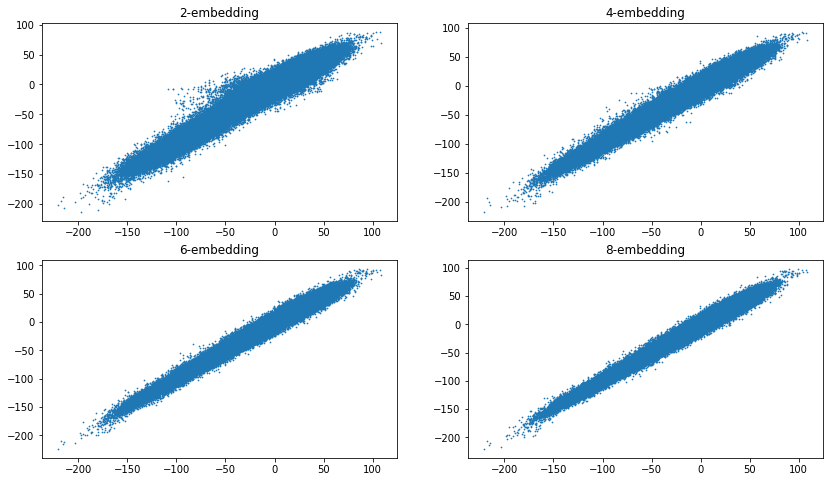

In [212]:
plt.figure(figsize=(14,8))

plt.subplot(221)
plt.scatter(electrode_data_test, out_2, s=0.5)
plt.title('2-embedding')
plt.subplot(222)
plt.scatter(electrode_data_test, out_4, s=0.5)
plt.title('4-embedding')
plt.subplot(223)
plt.scatter(electrode_data_test, out_6, s=0.5)
plt.title('6-embedding')
plt.subplot(224)
plt.scatter(electrode_data_test, out_8, s=0.5)
plt.title('8-embedding')
plt.show()

7252.769322347283
7189.837435344184
7155.246229663214
7209.166614372547


(6929.439863101346, 7263.9357953095805)

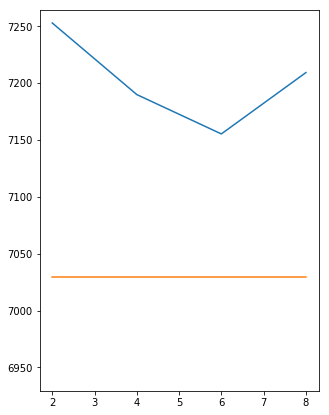

In [170]:
outs = [out_2, out_4, out_6, out_8]
best = np.linalg.norm(np.corrcoef(electrode_data_test, electrode_data_test))
corr_coeff = []
threshold = [best, best, best, best]
for output in outs:
    temp = np.corrcoef(electrode_data_test, output)
    corr_coeff.append(np.linalg.norm(temp))
    print(np.linalg.norm(temp))
emb = [2, 4, 6, 8]

plt.figure(figsize=(5,7))
plt.plot(emb, corr_coeff)
plt.plot(emb, threshold)
plt.ylim(ymin = best-100)

# Representations

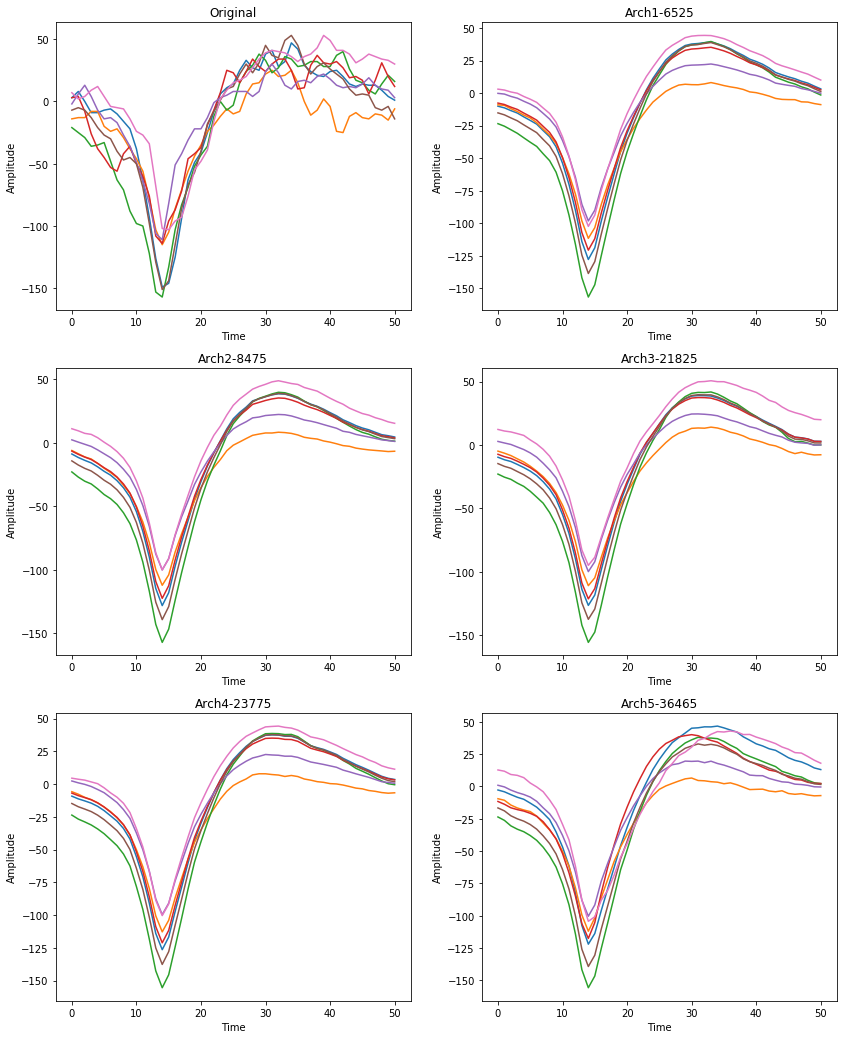

In [137]:
plt.figure(figsize=(14,18))

# n = [1, 30, 45, 50, 65]
n = [11, 290, 3490, 1098, 2707, 9, 871]
parameter_number = []

list_model = [ae_1, ae_2, ae_3, ae_4, ae_5]

for model in list_model:
    mdl_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    parameter_number.append(mdl_total_params)

for i in n:
    plt.subplot(321)
    plt.plot(electrode_data_test[i, :])
    plt.title('Original')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(322)
    plt.plot(out_1[i ,:])
    plt.title('Arch1-'+str(parameter_number[0]))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(323)
    plt.plot(out_2[i ,:])
    plt.title('Arch2-'+str(parameter_number[1]))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(324)
    plt.plot(out_3[i ,:])
    plt.title('Arch3-'+str(parameter_number[2]))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(325)
    plt.plot(out_4[i ,:])
    plt.title('Arch4-'+str(parameter_number[3]))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(326)
    plt.plot(out_5[i ,:])
    plt.title('Arch5-'+str(parameter_number[4]))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
plt.show()

# 4 dim Representation

In [140]:
ae_1 = torch.load('models/eval_ae/ae_1_4.pt', map_location=lambda storage, loc: storage)
ae_2 = torch.load('models/eval_ae/ae_2_4.pt', map_location=lambda storage, loc: storage)
ae_3 = torch.load('models/eval_ae/ae_3_4.pt', map_location=lambda storage, loc: storage)
ae_4 = torch.load('models/eval_ae/ae_4_4.pt', map_location=lambda storage, loc: storage)
ae_5 = torch.load('models/eval_ae/ae_5_4.pt', map_location=lambda storage, loc: storage)

enc_1 = np.zeros([total_sigs, 4])
out_1 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_1.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_1[i, :] = enc[:]
    out_1[i, :] = o[:]

enc_2 = np.zeros([total_sigs, 4])
out_2 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_2.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_2[i, :] = enc[:]
    out_2[i, :] = o[:]

enc_3 = np.zeros([total_sigs, 4])
out_3 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_3.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_3[i, :] = enc[:]
    out_3[i, :] = o[:]

enc_4 = np.zeros([total_sigs, 4])
out_4 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_4.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_4[i, :] = enc[:]
    out_4[i, :] = o[:]

enc_5 = np.zeros([total_sigs, 4])
out_5 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_5.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_5[i, :] = enc[:]
    out_5[i, :] = o[:]

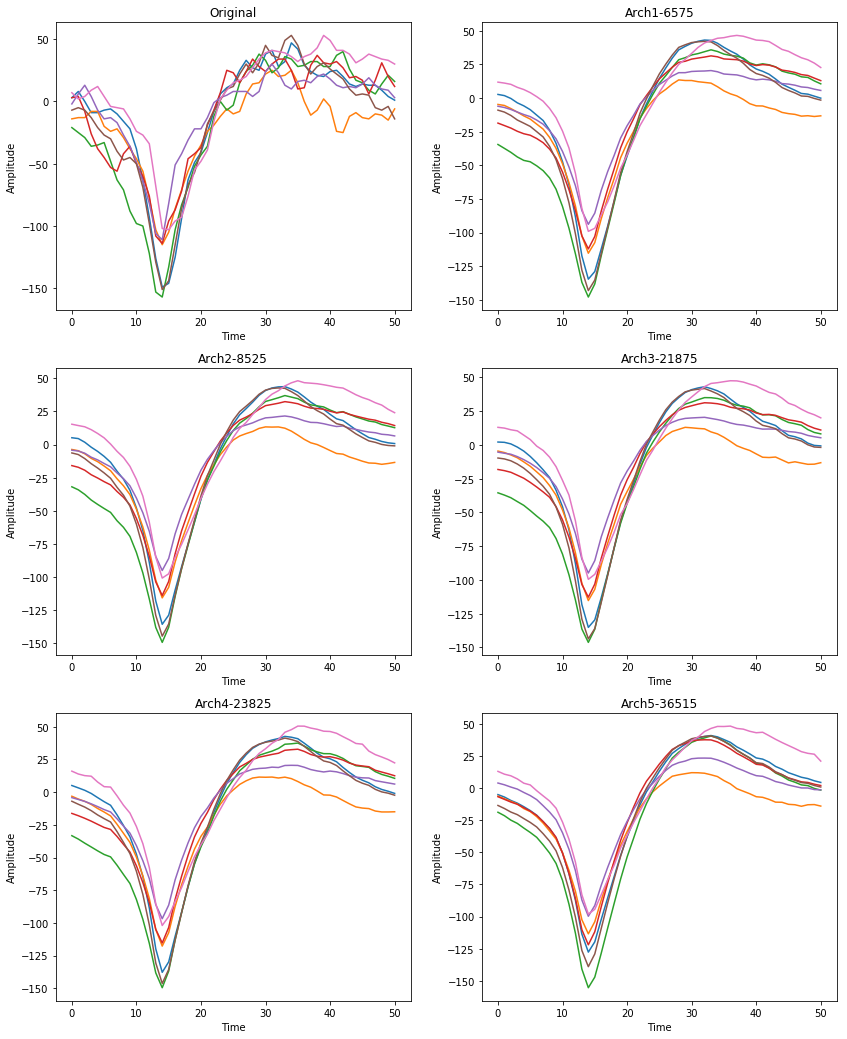

In [141]:
plt.figure(figsize=(14,18))

# n = [1, 30, 45, 50, 65]
n = [11, 290, 3490, 1098, 2707, 9, 871]
parameter_number = []

list_model = [ae_1, ae_2, ae_3, ae_4, ae_5]

for model in list_model:
    mdl_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    parameter_number.append(mdl_total_params)

for i in n:
    plt.subplot(321)
    plt.plot(electrode_data_test[i, :])
    plt.title('Original')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(322)
    plt.plot(out_1[i ,:])
    plt.title('Arch1-'+str(parameter_number[0]))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(323)
    plt.plot(out_2[i ,:])
    plt.title('Arch2-'+str(parameter_number[1]))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(324)
    plt.plot(out_3[i ,:])
    plt.title('Arch3-'+str(parameter_number[2]))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(325)
    plt.plot(out_4[i ,:])
    plt.title('Arch4-'+str(parameter_number[3]))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(326)
    plt.plot(out_5[i ,:])
    plt.title('Arch5-'+str(parameter_number[4]))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
plt.show()

# 8 dim Representation

In [142]:
ae_1 = torch.load('models/eval_ae/ae_1_8.pt', map_location=lambda storage, loc: storage)
ae_2 = torch.load('models/eval_ae/ae_2_8.pt', map_location=lambda storage, loc: storage)
ae_3 = torch.load('models/eval_ae/ae_3_8.pt', map_location=lambda storage, loc: storage)
ae_4 = torch.load('models/eval_ae/ae_4_8.pt', map_location=lambda storage, loc: storage)
ae_5 = torch.load('models/eval_ae/ae_5_8.pt', map_location=lambda storage, loc: storage)

enc_1 = np.zeros([total_sigs, 8])
out_1 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_1.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_1[i, :] = enc[:]
    out_1[i, :] = o[:]

enc_2 = np.zeros([total_sigs, 8])
out_2 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_2.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_2[i, :] = enc[:]
    out_2[i, :] = o[:]

enc_3 = np.zeros([total_sigs, 8])
out_3 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_3.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_3[i, :] = enc[:]
    out_3[i, :] = o[:]

enc_4 = np.zeros([total_sigs, 8])
out_4 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_4.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_4[i, :] = enc[:]
    out_4[i, :] = o[:]

enc_5 = np.zeros([total_sigs, 8])
out_5 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_5.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_5[i, :] = enc[:]
    out_5[i, :] = o[:]

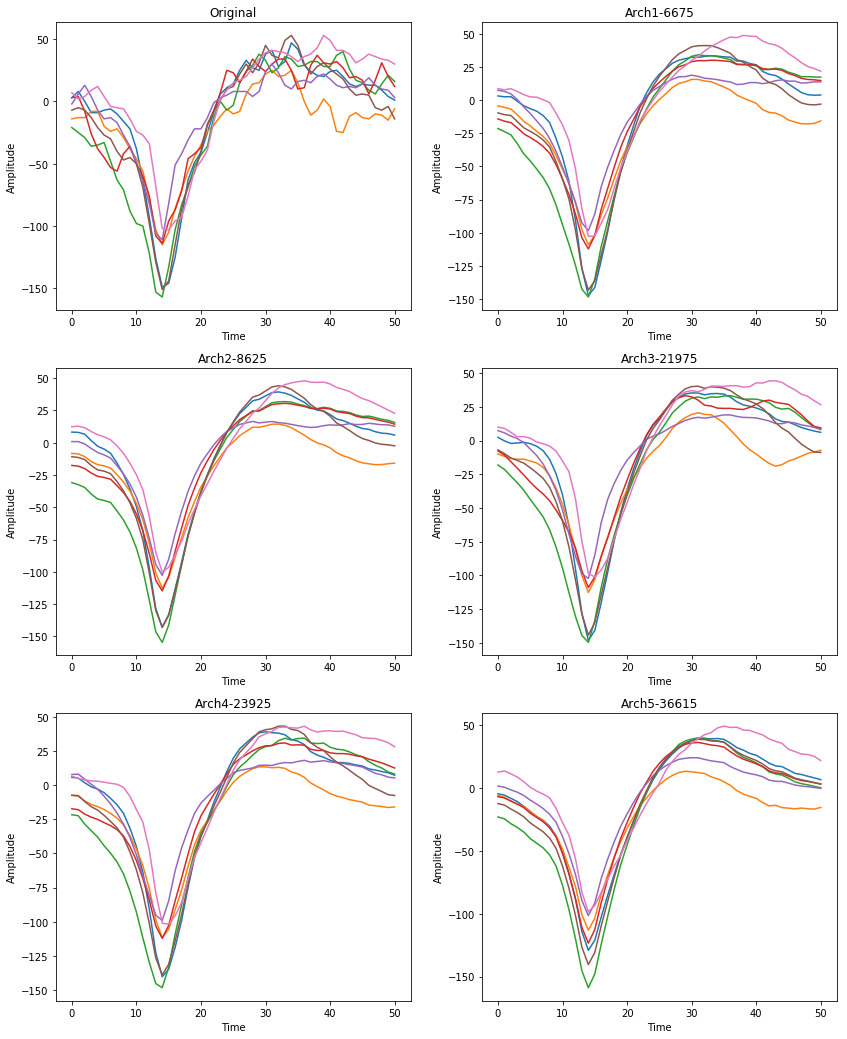

In [143]:
plt.figure(figsize=(14,18))

# n = [1, 30, 45, 50, 65]
n = [11, 290, 3490, 1098, 2707, 9, 871]
parameter_number = []

list_model = [ae_1, ae_2, ae_3, ae_4, ae_5]

for model in list_model:
    mdl_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    parameter_number.append(mdl_total_params)

for i in n:
    plt.subplot(321)
    plt.plot(electrode_data_test[i, :])
    plt.title('Original')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(322)
    plt.plot(out_1[i ,:])
    plt.title('Arch1-'+str(parameter_number[0]))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(323)
    plt.plot(out_2[i ,:])
    plt.title('Arch2-'+str(parameter_number[1]))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(324)
    plt.plot(out_3[i ,:])
    plt.title('Arch3-'+str(parameter_number[2]))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(325)
    plt.plot(out_4[i ,:])
    plt.title('Arch4-'+str(parameter_number[3]))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(326)
    plt.plot(out_5[i ,:])
    plt.title('Arch5-'+str(parameter_number[4]))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
plt.show()

# Model Comparison for same architecture 5 different embedding

In [324]:
ae_1 = torch.load('models/eval_ae/ae_5_2.pt', map_location=lambda storage, loc: storage)
ae_2 = torch.load('models/eval_ae/ae_5_4.pt', map_location=lambda storage, loc: storage)
ae_3 = torch.load('models/eval_ae/ae_5_6.pt', map_location=lambda storage, loc: storage)
ae_4 = torch.load('models/eval_ae/ae_5_8.pt', map_location=lambda storage, loc: storage)

enc_2 = np.zeros([electrode_data_test.shape[0], 2])
out_2 = np.zeros([electrode_data_test.shape[0], 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_1.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_2[i, :] = enc[:]
    out_2[i, :] = o[:]

enc_4 = np.zeros([electrode_data_test.shape[0], 4])
out_4 = np.zeros([electrode_data_test.shape[0], 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_2.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_4[i, :] = enc[:]
    out_4[i, :] = o[:]

enc_6 = np.zeros([electrode_data_test.shape[0], 6])
out_6 = np.zeros([electrode_data_test.shape[0], 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_3.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_6[i, :] = enc[:]
    out_6[i, :] = o[:]

enc_8 = np.zeros([electrode_data_test.shape[0], 8])
out_8 = np.zeros([electrode_data_test.shape[0], 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_4.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_8[i, :] = enc[:]
    out_8[i, :] = o[:]

In [348]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(electrode_data_train)
e_data_pca = pca.transform(electrode_data_test)
e_data_proj = pca.inverse_transform(e_data_pca)

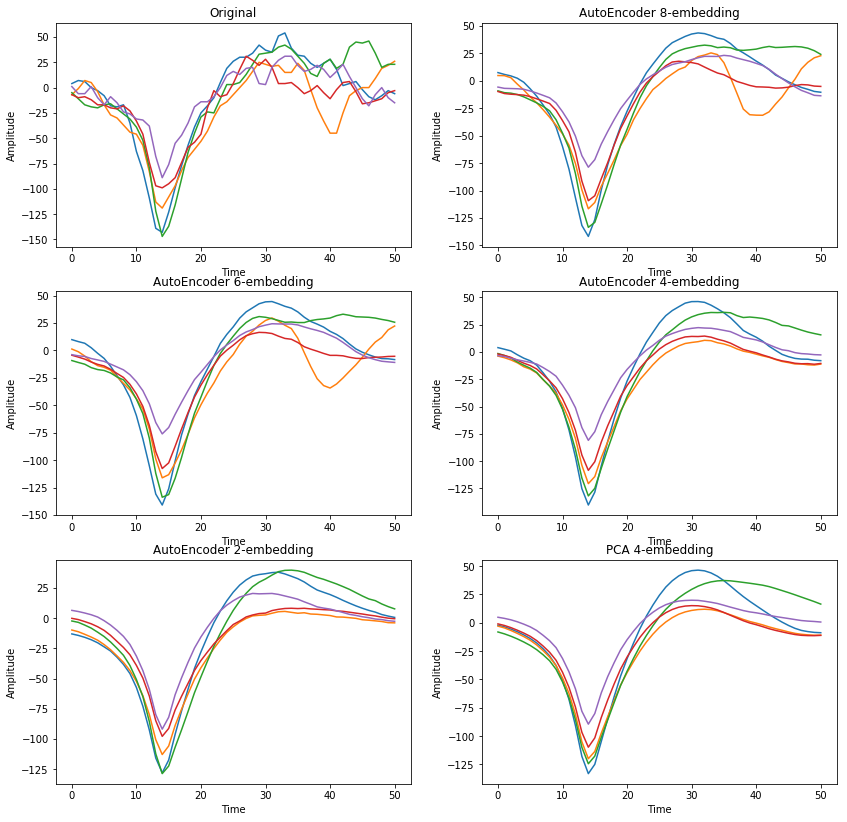

In [326]:
plt.figure(figsize=(14,14))

n = [1, 30, 45, 50, 65]
#n = [11, 290, 3490, 1098, 2707, 9, 871]
parameter_number = []

list_model = [ae_1, ae_2, ae_3, ae_4, ae_5]

for model in list_model:
    mdl_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    parameter_number.append(mdl_total_params)

for i in n:
    plt.subplot(321)
    plt.plot(electrode_data_test[i, :])
    plt.title('Original')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(322)
    plt.plot(out_8[i, :])
    plt.title('AutoEncoder 8-embedding')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(323)
    plt.plot(out_6[i, :])
    plt.title('AutoEncoder 6-embedding')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(324)
    plt.plot(out_4[i, :])
    plt.title('AutoEncoder 4-embedding')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(325)
    plt.plot(out_2[i, :])
    plt.title('AutoEncoder 2-embedding')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(326)
    plt.plot(comp_pca(4)[i, :])
    plt.title('PCA 4-embedding')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
plt.show()

In [285]:
pca_value = np.linalg.norm(np.corrcoef(electrode_data_test, e_data_proj))

In [286]:
ae2_value = np.linalg.norm(np.corrcoef(electrode_data_test, out_2))

In [287]:
base_value = np.linalg.norm(np.corrcoef(electrode_data_test, electrode_data_test))

In [330]:
print(pca_value/base_value)
print(ae2_value/base_value)

1.0396602761491227
1.0314857164084574


In [327]:
corrs_ae = [np.corrcoef(electrode_data_test[i],out_2[i])[0,1] for i in range(electrode_data_test.shape[0])]

corrs_pca = [np.corrcoef(electrode_data_test[i],e_data_proj[i])[0,1] for i in range(electrode_data_test.shape[0])]

corrs_base = [np.corrcoef(electrode_data_test[i],electrode_data_test[i])[0,1] for i in range(electrode_data_test.shape[0])]

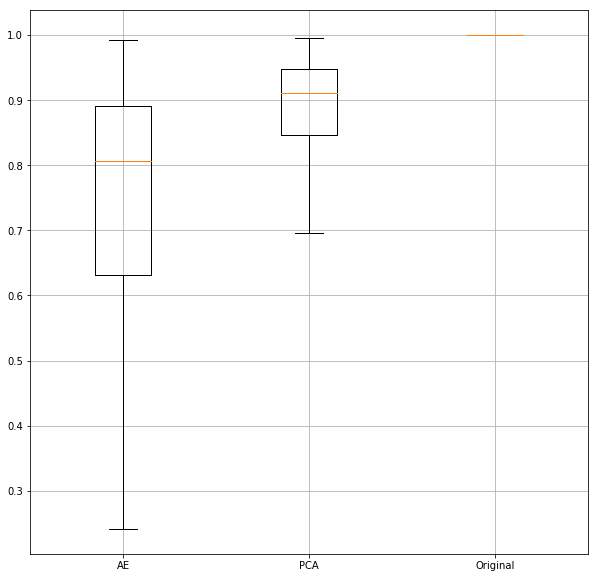

In [350]:
fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot(111)
ax.boxplot([corrs_ae, corrs_pca, corrs_base], showfliers=False, notch=False)
ax.grid()
ax.set_xticklabels(['AE', 'PCA', 'Original'])
plt.show()

In [237]:
def comp_pca(components):
    pca = PCA(n_components=components)
    pca.fit(electrode_data_train)
    e_data_pca = pca.transform(electrode_data_test)
    e_data_proj = pca.inverse_transform(e_data_pca)
    return e_data_proj

pca_list = []

for i in (2,4,6,8):
    normval = np.linalg.norm(np.corrcoef(electrode_data_test, comp_pca(i)))
    pca_list.append(normval)

ae_list = []

for i in [out_2, out_4, out_6, out_8]:
    normval = np.linalg.norm(np.corrcoef(electrode_data_test, i))
    ae_list.append(normval)

emb = [2, 4, 6, 8]

thresh = []
for i in range(4):
    thresh.append(np.linalg.norm(np.corrcoef(electrode_data_test, electrode_data_test)))

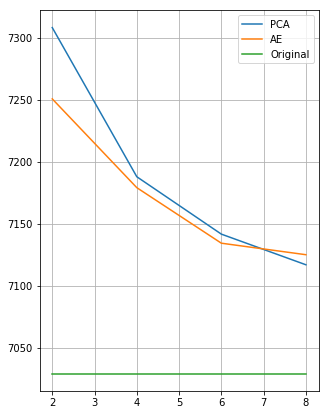

In [240]:
plt.figure(figsize=(5,7))
plt.plot(emb, pca_list, label='PCA')
plt.plot(emb, ae_list, label='AE')
plt.plot(emb, thresh, label='Original')
plt.legend()
plt.grid()

In [316]:
class autoencoder_6(nn.Module):
    def __init__(self, input_size, embedding_size):
        super(autoencoder_6, self).__init__()
        activation_layer = nn.LeakyReLU()
        self.encoder = nn.Sequential(nn.Linear(input_size, 80),
                                     activation_layer,
                                     nn.Linear(80, 25),
                                     activation_layer,
                                     nn.Linear(25, embedding_size))
        self.decoder = nn.Sequential(nn.Linear(embedding_size, 10),
                                     activation_layer,
                                     nn.Linear(10, 15),
                                     activation_layer,
                                     nn.Linear(15, 25),
                                     activation_layer,
                                     nn.Linear(25, 40),
                                     activation_layer,
                                     nn.Linear(40, 80),
                                     activation_layer,
                                     nn.Linear(80, input_size))
    
    def forward(self, x):
        enc = self.encoder(x)
        dec = self.decoder(enc)
        return enc, dec

In [333]:
class autoencoder_6(nn.Module):
    def __init__(self, input_size, embedding_size):
        super(autoencoder_6, self).__init__()
        activation_layer = nn.LeakyReLU()
        self.encoder = nn.Sequential(nn.Linear(input_size, 80),
                                     activation_layer,
                                     nn.Linear(80, 10),
                                     activation_layer,
                                     nn.Linear(10, embedding_size))
        self.decoder = nn.Sequential(nn.Linear(embedding_size, 40),
                                     activation_layer,
                                     nn.Linear(40, input_size))
    
    def forward(self, x):
        enc = self.encoder(x)
        dec = self.decoder(enc)
        return enc, dec

In [334]:
# Training the AE for encoder4

# Training for 8 embeddings

epoch_range = 4000
batch_size = 150
learning_rate = 0.0001
embedding_size = 8

ae_68 = autoencoder_6(length, embedding_size).cuda()
ae_68.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_68.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_68 = train_ae(ae_68, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Training for 6 embeddings

epoch_range = 4000
batch_size = 150
learning_rate = 0.0001
embedding_size = 6

ae_66 = autoencoder_6(length, embedding_size).cuda()
ae_66.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_66.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_66 = train_ae(ae_66, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Training for 4 embeddings

epoch_range = 4000
batch_size = 150
learning_rate = 0.0001
embedding_size = 4

ae_64 = autoencoder_6(length, embedding_size).cuda()
ae_64.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_64.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_64 = train_ae(ae_64, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Training for 2 embeddings

epoch_range = 4000
batch_size = 150
learning_rate = 0.0001
embedding_size = 2

ae_62 = autoencoder_6(length, embedding_size).cuda()
ae_62.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_62.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_62 = train_ae(ae_62, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Saving relevant files

# Saving Losses
np.save('models/eval_ae/losses_6_8', np.array(losses_68))
np.save('models/eval_ae/losses_6_6', np.array(losses_66))
np.save('models/eval_ae/losses_6_4', np.array(losses_64))
np.save('models/eval_ae/losses_6_2', np.array(losses_62))


# Saving Models
torch.save(ae_68, 'models/eval_ae/ae_6_8.pt') #Saving the autoencoder model
torch.save(ae_66, 'models/eval_ae/ae_6.pt') #Saving the autoencoder model
torch.save(ae_64, 'models/eval_ae/ae_6_4.pt') #Saving the autoencoder model
torch.save(ae_62, 'models/eval_ae/ae_6_2.pt') #Saving the autoencoder model

TOTAL PARAMETERS FOR MODEL: 7509
epoch [1/4000], loss:3290.21191, avg:3290.21191
epoch [2/4000], loss:1382.25732, avg:2336.23462
epoch [3/4000], loss:559.85968, avg:1744.10974
epoch [4/4000], loss:271.16333, avg:1375.87305
epoch [5/4000], loss:118.27309, avg:1124.35303
epoch [6/4000], loss:168.82597, avg:965.09857
epoch [7/4000], loss:455.09482, avg:892.24091
epoch [8/4000], loss:128.23657, avg:796.74036
epoch [9/4000], loss:124.99657, avg:722.10217
epoch [10/4000], loss:121.26130, avg:662.01807
epoch [11/4000], loss:63.18927, avg:339.31577
epoch [12/4000], loss:114.15261, avg:212.50533
epoch [13/4000], loss:122.21875, avg:168.74124
epoch [14/4000], loss:349.46667, avg:176.57158
epoch [15/4000], loss:346.12692, avg:199.35695
epoch [16/4000], loss:355.01413, avg:217.97575
epoch [17/4000], loss:256.07336, avg:198.07362
epoch [18/4000], loss:82.11998, avg:193.46196
epoch [19/4000], loss:193.21695, avg:200.28400
epoch [20/4000], loss:97.97825, avg:197.95570
epoch [21/4000], loss:237.45552,

epoch [179/4000], loss:58.05653, avg:57.13806
epoch [180/4000], loss:68.58670, avg:60.19690
epoch [181/4000], loss:54.23396, avg:62.33516
epoch [182/4000], loss:95.53929, avg:66.69817
epoch [183/4000], loss:53.08397, avg:62.77662
epoch [184/4000], loss:61.40575, avg:62.18139
epoch [185/4000], loss:31.15151, avg:59.86132
epoch [186/4000], loss:67.76082, avg:61.28996
epoch [187/4000], loss:41.20378, avg:58.18874
epoch [188/4000], loss:32.37079, avg:56.33932
epoch [189/4000], loss:20.62977, avg:52.59664
epoch [190/4000], loss:69.46735, avg:52.68470
epoch [191/4000], loss:64.48581, avg:53.70989
epoch [192/4000], loss:60.89286, avg:50.24524
epoch [193/4000], loss:31.08189, avg:48.04503
epoch [194/4000], loss:49.67463, avg:46.87192
epoch [195/4000], loss:83.69213, avg:52.12598
epoch [196/4000], loss:42.76554, avg:49.62645
epoch [197/4000], loss:18.10254, avg:47.31633
epoch [198/4000], loss:30.31389, avg:47.11064
epoch [199/4000], loss:26.17060, avg:47.66472
epoch [200/4000], loss:29.18471, a

epoch [358/4000], loss:58.72186, avg:51.14384
epoch [359/4000], loss:41.95935, avg:51.43262
epoch [360/4000], loss:29.05936, avg:48.90610
epoch [361/4000], loss:45.76491, avg:47.93546
epoch [362/4000], loss:35.41050, avg:45.55998
epoch [363/4000], loss:22.83078, avg:41.92508
epoch [364/4000], loss:59.57859, avg:42.44966
epoch [365/4000], loss:46.90310, avg:44.54467
epoch [366/4000], loss:22.50036, avg:39.25723
epoch [367/4000], loss:52.28561, avg:41.50145
epoch [368/4000], loss:50.90839, avg:40.72010
epoch [369/4000], loss:43.85654, avg:40.90982
epoch [370/4000], loss:64.76808, avg:44.48069
epoch [371/4000], loss:24.82673, avg:42.38687
epoch [372/4000], loss:39.57684, avg:42.80350
epoch [373/4000], loss:35.99086, avg:44.11951
epoch [374/4000], loss:57.98854, avg:43.96051
epoch [375/4000], loss:31.66959, avg:42.43716
epoch [376/4000], loss:73.07680, avg:47.49480
epoch [377/4000], loss:34.21054, avg:45.68729
epoch [378/4000], loss:34.25186, avg:44.02164
epoch [379/4000], loss:36.24573, a

epoch [537/4000], loss:65.01134, avg:56.53671
epoch [538/4000], loss:38.76098, avg:56.60137
epoch [539/4000], loss:34.84972, avg:55.82537
epoch [540/4000], loss:63.28218, avg:47.16314
epoch [541/4000], loss:25.17074, avg:43.71380
epoch [542/4000], loss:22.17758, avg:42.74875
epoch [543/4000], loss:21.97548, avg:40.90438
epoch [544/4000], loss:30.79835, avg:38.40459
epoch [545/4000], loss:138.23091, avg:48.75993
epoch [546/4000], loss:52.08479, avg:49.23420
epoch [547/4000], loss:38.90421, avg:46.62350
epoch [548/4000], loss:54.38186, avg:48.18559
epoch [549/4000], loss:51.35397, avg:49.83601
epoch [550/4000], loss:20.88152, avg:45.59594
epoch [551/4000], loss:46.64974, avg:47.74384
epoch [552/4000], loss:31.96406, avg:48.72249
epoch [553/4000], loss:28.70174, avg:49.39512
epoch [554/4000], loss:66.52361, avg:52.96765
epoch [555/4000], loss:57.84349, avg:44.92890
epoch [556/4000], loss:48.49488, avg:44.56991
epoch [557/4000], loss:34.78687, avg:44.15817
epoch [558/4000], loss:35.42033, 

epoch [716/4000], loss:35.67767, avg:45.50937
epoch [717/4000], loss:28.25414, avg:39.54759
epoch [718/4000], loss:56.65387, avg:41.89511
epoch [719/4000], loss:24.71726, avg:39.04291
epoch [720/4000], loss:24.64468, avg:37.41252
epoch [721/4000], loss:24.16310, avg:35.84644
epoch [722/4000], loss:45.47500, avg:36.80049
epoch [723/4000], loss:42.52789, avg:37.73354
epoch [724/4000], loss:37.37220, avg:39.94911
epoch [725/4000], loss:36.06556, avg:35.55514
epoch [726/4000], loss:28.36894, avg:34.82426
epoch [727/4000], loss:39.84999, avg:35.98385
epoch [728/4000], loss:87.89814, avg:39.10828
epoch [729/4000], loss:38.87723, avg:40.52427
epoch [730/4000], loss:40.36572, avg:42.09638
epoch [731/4000], loss:35.32044, avg:43.21211
epoch [732/4000], loss:68.85387, avg:45.55000
epoch [733/4000], loss:35.09509, avg:44.80671
epoch [734/4000], loss:68.61169, avg:47.93066
epoch [735/4000], loss:39.37297, avg:48.26141
epoch [736/4000], loss:17.89813, avg:47.21433
epoch [737/4000], loss:34.27622, a

epoch [894/4000], loss:55.95977, avg:46.72940
epoch [895/4000], loss:45.69332, avg:47.02493
epoch [896/4000], loss:36.06371, avg:45.47114
epoch [897/4000], loss:53.60990, avg:47.50927
epoch [898/4000], loss:21.71973, avg:46.23469
epoch [899/4000], loss:76.01796, avg:50.74225
epoch [900/4000], loss:73.82697, avg:55.37364
epoch [901/4000], loss:39.81378, avg:54.86469
epoch [902/4000], loss:31.95820, avg:54.60472
epoch [903/4000], loss:34.37355, avg:46.90369
epoch [904/4000], loss:30.23467, avg:44.33118
epoch [905/4000], loss:32.93983, avg:43.05584
epoch [906/4000], loss:53.72077, avg:44.82154
epoch [907/4000], loss:36.21202, avg:43.08175
epoch [908/4000], loss:43.50396, avg:45.26017
epoch [909/4000], loss:50.16793, avg:42.67517
epoch [910/4000], loss:33.41075, avg:38.63355
epoch [911/4000], loss:30.58944, avg:37.71111
epoch [912/4000], loss:34.35363, avg:37.95066
epoch [913/4000], loss:29.69586, avg:37.48289
epoch [914/4000], loss:28.32301, avg:37.29172
epoch [915/4000], loss:91.60941, a

epoch [1071/4000], loss:30.84793, avg:38.84046
epoch [1072/4000], loss:40.79642, avg:37.28891
epoch [1073/4000], loss:27.92022, avg:36.03055
epoch [1074/4000], loss:46.48418, avg:38.10618
epoch [1075/4000], loss:38.33183, avg:37.76137
epoch [1076/4000], loss:19.84248, avg:36.56754
epoch [1077/4000], loss:41.02109, avg:36.55101
epoch [1078/4000], loss:53.19299, avg:39.49107
epoch [1079/4000], loss:25.06989, avg:36.29399
epoch [1080/4000], loss:37.97477, avg:36.14818
epoch [1081/4000], loss:32.04288, avg:36.26767
epoch [1082/4000], loss:40.38760, avg:36.22679
epoch [1083/4000], loss:55.44563, avg:38.97933
epoch [1084/4000], loss:50.82413, avg:39.41333
epoch [1085/4000], loss:31.05729, avg:38.68587
epoch [1086/4000], loss:53.13089, avg:42.01471
epoch [1087/4000], loss:59.10851, avg:43.82346
epoch [1088/4000], loss:55.36191, avg:44.04035
epoch [1089/4000], loss:80.74805, avg:49.60817
epoch [1090/4000], loss:38.33907, avg:49.64460
epoch [1091/4000], loss:27.16065, avg:49.15637
epoch [1092/4

epoch [1246/4000], loss:36.44888, avg:48.93072
epoch [1247/4000], loss:32.27895, avg:48.34330
epoch [1248/4000], loss:38.09256, avg:48.53123
epoch [1249/4000], loss:51.03459, avg:44.71803
epoch [1250/4000], loss:32.59357, avg:39.94696
epoch [1251/4000], loss:67.74046, avg:42.43225
epoch [1252/4000], loss:86.29737, avg:45.84409
epoch [1253/4000], loss:39.42894, avg:47.30135
epoch [1254/4000], loss:75.77911, avg:48.41452
epoch [1255/4000], loss:81.99443, avg:54.16888
epoch [1256/4000], loss:76.48463, avg:58.17246
epoch [1257/4000], loss:55.09083, avg:60.45365
epoch [1258/4000], loss:31.30401, avg:59.77479
epoch [1259/4000], loss:40.10647, avg:58.68198
epoch [1260/4000], loss:53.96734, avg:60.81936
epoch [1261/4000], loss:50.76662, avg:59.12197
epoch [1262/4000], loss:32.89336, avg:53.78158
epoch [1263/4000], loss:54.20743, avg:55.25943
epoch [1264/4000], loss:28.88538, avg:50.57005
epoch [1265/4000], loss:23.11605, avg:44.68222
epoch [1266/4000], loss:55.05109, avg:42.53886
epoch [1267/4

epoch [1421/4000], loss:35.44626, avg:39.86365
epoch [1422/4000], loss:17.81695, avg:37.75161
epoch [1423/4000], loss:43.72108, avg:40.05720
epoch [1424/4000], loss:36.76485, avg:39.60656
epoch [1425/4000], loss:43.17507, avg:37.99442
epoch [1426/4000], loss:45.27276, avg:38.95485
epoch [1427/4000], loss:45.22014, avg:39.96132
epoch [1428/4000], loss:43.52446, avg:42.15577
epoch [1429/4000], loss:31.98026, avg:40.47773
epoch [1430/4000], loss:50.36230, avg:39.32841
epoch [1431/4000], loss:60.50389, avg:41.83418
epoch [1432/4000], loss:31.53634, avg:43.20612
epoch [1433/4000], loss:50.24016, avg:43.85803
epoch [1434/4000], loss:24.18161, avg:42.59970
epoch [1435/4000], loss:39.18299, avg:42.20050
epoch [1436/4000], loss:91.43893, avg:46.81711
epoch [1437/4000], loss:33.31483, avg:45.62658
epoch [1438/4000], loss:26.60752, avg:43.93489
epoch [1439/4000], loss:63.63691, avg:47.10055
epoch [1440/4000], loss:73.33928, avg:49.39824
epoch [1441/4000], loss:41.39902, avg:47.48776
epoch [1442/4

epoch [1596/4000], loss:58.80206, avg:37.89418
epoch [1597/4000], loss:26.68842, avg:37.83600
epoch [1598/4000], loss:53.54260, avg:39.46579
epoch [1599/4000], loss:38.58403, avg:41.56988
epoch [1600/4000], loss:32.10078, avg:36.67432
epoch [1601/4000], loss:45.87295, avg:37.71395
epoch [1602/4000], loss:23.14728, avg:38.24841
epoch [1603/4000], loss:29.14297, avg:38.01585
epoch [1604/4000], loss:32.56758, avg:37.84793
epoch [1605/4000], loss:40.67761, avg:38.11263
epoch [1606/4000], loss:26.30222, avg:34.86265
epoch [1607/4000], loss:80.95905, avg:40.28971
epoch [1608/4000], loss:35.83185, avg:38.51863
epoch [1609/4000], loss:58.35673, avg:40.49590
epoch [1610/4000], loss:65.01825, avg:43.78765
epoch [1611/4000], loss:45.67922, avg:43.76828
epoch [1612/4000], loss:29.69384, avg:44.42294
epoch [1613/4000], loss:31.07632, avg:44.61627
epoch [1614/4000], loss:35.12441, avg:44.87195
epoch [1615/4000], loss:39.90524, avg:44.79472
epoch [1616/4000], loss:37.04798, avg:45.86929
epoch [1617/4

epoch [1771/4000], loss:45.95327, avg:43.28590
epoch [1772/4000], loss:54.08012, avg:45.11678
epoch [1773/4000], loss:38.64831, avg:46.62934
epoch [1774/4000], loss:44.39807, avg:46.21776
epoch [1775/4000], loss:40.38676, avg:44.66073
epoch [1776/4000], loss:40.23257, avg:43.23386
epoch [1777/4000], loss:32.15316, avg:41.67152
epoch [1778/4000], loss:26.76355, avg:40.05637
epoch [1779/4000], loss:59.08345, avg:42.07621
epoch [1780/4000], loss:53.41080, avg:43.51101
epoch [1781/4000], loss:28.85821, avg:41.80150
epoch [1782/4000], loss:41.66893, avg:40.56038
epoch [1783/4000], loss:31.90189, avg:39.88574
epoch [1784/4000], loss:39.52581, avg:39.39851
epoch [1785/4000], loss:48.23336, avg:40.18317
epoch [1786/4000], loss:42.56310, avg:40.41623
epoch [1787/4000], loss:32.23750, avg:40.42466
epoch [1788/4000], loss:39.15258, avg:41.66356
epoch [1789/4000], loss:36.60818, avg:39.41603
epoch [1790/4000], loss:59.16637, avg:39.99159
epoch [1791/4000], loss:41.93094, avg:41.29887
epoch [1792/4

epoch [1946/4000], loss:56.93183, avg:39.21735
epoch [1947/4000], loss:62.46467, avg:42.25800
epoch [1948/4000], loss:29.78611, avg:41.70561
epoch [1949/4000], loss:51.10064, avg:42.65492
epoch [1950/4000], loss:59.33949, avg:43.71584
epoch [1951/4000], loss:28.45714, avg:43.82557
epoch [1952/4000], loss:25.61277, avg:43.30680
epoch [1953/4000], loss:52.29196, avg:44.06080
epoch [1954/4000], loss:39.69271, avg:42.57635
epoch [1955/4000], loss:23.07116, avg:42.87485
epoch [1956/4000], loss:60.99742, avg:43.28141
epoch [1957/4000], loss:40.87354, avg:41.12230
epoch [1958/4000], loss:36.10692, avg:41.75438
epoch [1959/4000], loss:45.68224, avg:41.21254
epoch [1960/4000], loss:29.61200, avg:38.23979
epoch [1961/4000], loss:35.04662, avg:38.89874
epoch [1962/4000], loss:37.32694, avg:40.07015
epoch [1963/4000], loss:43.37667, avg:39.17862
epoch [1964/4000], loss:28.86976, avg:38.09632
epoch [1965/4000], loss:69.75082, avg:42.76429
epoch [1966/4000], loss:40.65669, avg:40.73022
epoch [1967/4

epoch [2121/4000], loss:58.26704, avg:75.33720
epoch [2122/4000], loss:32.83281, avg:74.70030
epoch [2123/4000], loss:30.42946, avg:73.91952
epoch [2124/4000], loss:58.15193, avg:76.06945
epoch [2125/4000], loss:39.04375, avg:74.78888
epoch [2126/4000], loss:49.23378, avg:77.19802
epoch [2127/4000], loss:52.10424, avg:40.95109
epoch [2128/4000], loss:38.83394, avg:42.44877
epoch [2129/4000], loss:41.20249, avg:44.71417
epoch [2130/4000], loss:32.39648, avg:43.24960
epoch [2131/4000], loss:41.14690, avg:41.53758
epoch [2132/4000], loss:62.62938, avg:44.51724
epoch [2133/4000], loss:54.94182, avg:46.96848
epoch [2134/4000], loss:26.33531, avg:43.78682
epoch [2135/4000], loss:42.39695, avg:44.12213
epoch [2136/4000], loss:35.09349, avg:42.70810
epoch [2137/4000], loss:36.94685, avg:41.19236
epoch [2138/4000], loss:18.21163, avg:39.13013
epoch [2139/4000], loss:22.24688, avg:37.23457
epoch [2140/4000], loss:26.44030, avg:36.63895
epoch [2141/4000], loss:51.57251, avg:37.68151
epoch [2142/4

epoch [2296/4000], loss:39.84483, avg:39.01066
epoch [2297/4000], loss:55.97973, avg:41.17749
epoch [2298/4000], loss:31.30316, avg:40.60814
epoch [2299/4000], loss:38.40720, avg:38.63473
epoch [2300/4000], loss:30.00091, avg:36.52951
epoch [2301/4000], loss:18.57541, avg:34.97174
epoch [2302/4000], loss:46.91347, avg:36.46170
epoch [2303/4000], loss:45.53390, avg:37.18336
epoch [2304/4000], loss:33.22218, avg:37.93601
epoch [2305/4000], loss:38.29312, avg:37.80739
epoch [2306/4000], loss:39.46591, avg:37.76950
epoch [2307/4000], loss:29.01845, avg:35.07337
epoch [2308/4000], loss:29.66393, avg:34.90945
epoch [2309/4000], loss:47.05217, avg:35.77394
epoch [2310/4000], loss:39.88770, avg:36.76262
epoch [2311/4000], loss:29.93625, avg:37.89871
epoch [2312/4000], loss:31.28487, avg:36.33585
epoch [2313/4000], loss:47.53769, avg:36.53623
epoch [2314/4000], loss:37.16442, avg:36.93045
epoch [2315/4000], loss:70.55930, avg:40.15707
epoch [2316/4000], loss:29.81658, avg:39.19213
epoch [2317/4

epoch [2471/4000], loss:24.58675, avg:40.03164
epoch [2472/4000], loss:17.40636, avg:38.92538
epoch [2473/4000], loss:61.33804, avg:37.88601
epoch [2474/4000], loss:46.91641, avg:39.94748
epoch [2475/4000], loss:21.83572, avg:38.69847
epoch [2476/4000], loss:47.06873, avg:38.78190
epoch [2477/4000], loss:47.35221, avg:38.43982
epoch [2478/4000], loss:25.09730, avg:36.57701
epoch [2479/4000], loss:45.59915, avg:37.48712
epoch [2480/4000], loss:55.45370, avg:39.26544
epoch [2481/4000], loss:31.23488, avg:39.93026
epoch [2482/4000], loss:43.61085, avg:42.55070
epoch [2483/4000], loss:34.49562, avg:39.86646
epoch [2484/4000], loss:42.60070, avg:39.43489
epoch [2485/4000], loss:31.83180, avg:40.43450
epoch [2486/4000], loss:37.27105, avg:39.45473
epoch [2487/4000], loss:66.39172, avg:41.35868
epoch [2488/4000], loss:96.61089, avg:48.51004
epoch [2489/4000], loss:41.84152, avg:48.13427
epoch [2490/4000], loss:38.37153, avg:46.42605
epoch [2491/4000], loss:53.67674, avg:48.67024
epoch [2492/4

epoch [2646/4000], loss:35.19324, avg:34.41253
epoch [2647/4000], loss:36.29708, avg:35.61900
epoch [2648/4000], loss:49.20950, avg:37.71423
epoch [2649/4000], loss:31.37543, avg:38.16722
epoch [2650/4000], loss:25.75987, avg:35.40925
epoch [2651/4000], loss:24.31573, avg:33.99581
epoch [2652/4000], loss:43.46706, avg:32.36631
epoch [2653/4000], loss:44.93438, avg:34.65101
epoch [2654/4000], loss:31.56476, avg:35.60950
epoch [2655/4000], loss:30.69199, avg:35.28091
epoch [2656/4000], loss:49.39416, avg:36.70100
epoch [2657/4000], loss:30.25543, avg:36.09683
epoch [2658/4000], loss:71.81242, avg:38.35712
epoch [2659/4000], loss:22.01423, avg:37.42100
epoch [2660/4000], loss:40.46330, avg:38.89135
epoch [2661/4000], loss:38.28824, avg:40.28860
epoch [2662/4000], loss:56.75734, avg:41.61762
epoch [2663/4000], loss:25.18479, avg:39.64267
epoch [2664/4000], loss:27.73033, avg:39.25922
epoch [2665/4000], loss:39.95018, avg:40.18504
epoch [2666/4000], loss:46.77684, avg:39.92331
epoch [2667/4

epoch [2821/4000], loss:24.66163, avg:28.64044
epoch [2822/4000], loss:28.45894, avg:27.89835
epoch [2823/4000], loss:35.36288, avg:28.47027
epoch [2824/4000], loss:20.67204, avg:27.47602
epoch [2825/4000], loss:36.74012, avg:27.72381
epoch [2826/4000], loss:47.11924, avg:28.85885
epoch [2827/4000], loss:48.85303, avg:31.40157
epoch [2828/4000], loss:32.88262, avg:32.61944
epoch [2829/4000], loss:28.15272, avg:32.68915
epoch [2830/4000], loss:71.35583, avg:37.42591
epoch [2831/4000], loss:32.08092, avg:38.16784
epoch [2832/4000], loss:40.40052, avg:39.36200
epoch [2833/4000], loss:13.47273, avg:37.17298
epoch [2834/4000], loss:23.37579, avg:37.44336
epoch [2835/4000], loss:43.07864, avg:38.07721
epoch [2836/4000], loss:38.26620, avg:37.19190
epoch [2837/4000], loss:53.21034, avg:37.62763
epoch [2838/4000], loss:78.48944, avg:42.18831
epoch [2839/4000], loss:23.79466, avg:41.75251
epoch [2840/4000], loss:41.88844, avg:38.80577
epoch [2841/4000], loss:29.82310, avg:38.57998
epoch [2842/4

epoch [2996/4000], loss:34.81857, avg:42.51682
epoch [2997/4000], loss:48.16489, avg:43.13948
epoch [2998/4000], loss:36.20628, avg:40.36584
epoch [2999/4000], loss:32.52551, avg:40.07449
epoch [3000/4000], loss:33.96943, avg:37.63861
epoch [3001/4000], loss:23.04107, avg:36.07865
epoch [3002/4000], loss:44.61073, avg:38.11665
epoch [3003/4000], loss:32.18009, avg:37.73591
epoch [3004/4000], loss:38.98977, avg:35.81437
epoch [3005/4000], loss:19.83763, avg:34.43440
epoch [3006/4000], loss:51.54261, avg:36.10680
epoch [3007/4000], loss:92.70433, avg:40.56075
epoch [3008/4000], loss:19.78281, avg:38.91840
epoch [3009/4000], loss:49.32998, avg:40.59885
epoch [3010/4000], loss:25.43964, avg:39.74587
epoch [3011/4000], loss:35.65534, avg:41.00729
epoch [3012/4000], loss:57.53044, avg:42.29926
epoch [3013/4000], loss:33.76160, avg:42.45741
epoch [3014/4000], loss:26.57686, avg:41.21613
epoch [3015/4000], loss:38.06940, avg:43.03930
epoch [3016/4000], loss:31.55980, avg:41.04102
epoch [3017/4

epoch [3171/4000], loss:41.93296, avg:39.53244
epoch [3172/4000], loss:35.93717, avg:38.64299
epoch [3173/4000], loss:22.39111, avg:33.72109
epoch [3174/4000], loss:23.26945, avg:33.47187
epoch [3175/4000], loss:39.43383, avg:30.93003
epoch [3176/4000], loss:37.71241, avg:31.65337
epoch [3177/4000], loss:44.05538, avg:34.72400
epoch [3178/4000], loss:22.73204, avg:32.39080
epoch [3179/4000], loss:65.94335, avg:36.31448
epoch [3180/4000], loss:50.04819, avg:38.34559
epoch [3181/4000], loss:45.90040, avg:38.74233
epoch [3182/4000], loss:41.20266, avg:39.26888
epoch [3183/4000], loss:29.34765, avg:39.96453
epoch [3184/4000], loss:49.06764, avg:42.54435
epoch [3185/4000], loss:34.21119, avg:42.02209
epoch [3186/4000], loss:53.50787, avg:43.60163
epoch [3187/4000], loss:25.92574, avg:41.78868
epoch [3188/4000], loss:25.95717, avg:42.11119
epoch [3189/4000], loss:36.28494, avg:39.14535
epoch [3190/4000], loss:37.88591, avg:37.92912
epoch [3191/4000], loss:28.99792, avg:36.23887
epoch [3192/4

epoch [3346/4000], loss:23.12972, avg:35.20558
epoch [3347/4000], loss:37.87367, avg:35.12540
epoch [3348/4000], loss:29.64639, avg:33.99040
epoch [3349/4000], loss:25.16820, avg:34.58630
epoch [3350/4000], loss:62.92813, avg:35.81491
epoch [3351/4000], loss:31.89735, avg:36.57918
epoch [3352/4000], loss:44.06574, avg:37.41677
epoch [3353/4000], loss:32.69476, avg:37.71757
epoch [3354/4000], loss:46.30251, avg:39.70901
epoch [3355/4000], loss:44.11152, avg:37.78180
epoch [3356/4000], loss:44.79333, avg:39.94816
epoch [3357/4000], loss:30.31554, avg:39.19235
epoch [3358/4000], loss:41.00568, avg:40.32828
epoch [3359/4000], loss:50.54729, avg:42.86619
epoch [3360/4000], loss:34.24027, avg:39.99740
epoch [3361/4000], loss:36.31364, avg:40.43903
epoch [3362/4000], loss:28.59405, avg:38.89186
epoch [3363/4000], loss:47.76003, avg:40.39838
epoch [3364/4000], loss:31.19715, avg:38.88785
epoch [3365/4000], loss:36.66710, avg:38.14341
epoch [3366/4000], loss:40.44009, avg:37.70808
epoch [3367/4

epoch [3521/4000], loss:29.67343, avg:37.41030
epoch [3522/4000], loss:26.31087, avg:36.72408
epoch [3523/4000], loss:40.19167, avg:36.09256
epoch [3524/4000], loss:28.50758, avg:35.10442
epoch [3525/4000], loss:47.06597, avg:36.62207
epoch [3526/4000], loss:43.11095, avg:35.04296
epoch [3527/4000], loss:40.08911, avg:35.74119
epoch [3528/4000], loss:31.31983, avg:36.08425
epoch [3529/4000], loss:25.07421, avg:34.57585
epoch [3530/4000], loss:33.94481, avg:34.52885
epoch [3531/4000], loss:34.05414, avg:34.96692
epoch [3532/4000], loss:40.25091, avg:36.36092
epoch [3533/4000], loss:21.88311, avg:34.53006
epoch [3534/4000], loss:40.44814, avg:35.72412
epoch [3535/4000], loss:41.89658, avg:35.20718
epoch [3536/4000], loss:17.09007, avg:32.60509
epoch [3537/4000], loss:57.97243, avg:34.39342
epoch [3538/4000], loss:39.15255, avg:35.17670
epoch [3539/4000], loss:26.32540, avg:35.30182
epoch [3540/4000], loss:31.82665, avg:35.09000
epoch [3541/4000], loss:20.21884, avg:33.70647
epoch [3542/4

epoch [3696/4000], loss:29.52366, avg:44.32075
epoch [3697/4000], loss:82.54143, avg:49.45731
epoch [3698/4000], loss:65.88515, avg:50.24681
epoch [3699/4000], loss:36.10136, avg:50.24721
epoch [3700/4000], loss:34.73487, avg:43.31336
epoch [3701/4000], loss:37.94001, avg:41.99742
epoch [3702/4000], loss:18.80277, avg:41.70369
epoch [3703/4000], loss:42.76464, avg:40.90761
epoch [3704/4000], loss:23.79770, avg:39.40225
epoch [3705/4000], loss:32.95277, avg:40.50444
epoch [3706/4000], loss:82.17517, avg:45.76959
epoch [3707/4000], loss:38.34831, avg:41.35027
epoch [3708/4000], loss:27.99104, avg:37.56086
epoch [3709/4000], loss:36.80626, avg:37.63136
epoch [3710/4000], loss:40.40224, avg:38.19809
epoch [3711/4000], loss:63.84890, avg:40.78898
epoch [3712/4000], loss:50.60224, avg:43.96893
epoch [3713/4000], loss:35.77678, avg:43.27014
epoch [3714/4000], loss:29.20770, avg:43.81114
epoch [3715/4000], loss:37.70448, avg:44.28631
epoch [3716/4000], loss:36.36406, avg:39.70520
epoch [3717/4

epoch [3871/4000], loss:37.45551, avg:36.59071
epoch [3872/4000], loss:39.84755, avg:37.90761
epoch [3873/4000], loss:30.63490, avg:35.63563
epoch [3874/4000], loss:81.66946, avg:41.39015
epoch [3875/4000], loss:32.03125, avg:41.90461
epoch [3876/4000], loss:31.06104, avg:40.81796
epoch [3877/4000], loss:33.81419, avg:41.00016
epoch [3878/4000], loss:24.73172, avg:40.51219
epoch [3879/4000], loss:52.21827, avg:42.91592
epoch [3880/4000], loss:22.17053, avg:38.56344
epoch [3881/4000], loss:44.49519, avg:39.26741
epoch [3882/4000], loss:40.57038, avg:39.33969
epoch [3883/4000], loss:35.62733, avg:39.83894
epoch [3884/4000], loss:53.41581, avg:37.01357
epoch [3885/4000], loss:39.37849, avg:37.74830
epoch [3886/4000], loss:38.31863, avg:38.47405
epoch [3887/4000], loss:41.61379, avg:39.25402
epoch [3888/4000], loss:32.41604, avg:40.02245
epoch [3889/4000], loss:37.67693, avg:38.56831
epoch [3890/4000], loss:44.04935, avg:40.75619
epoch [3891/4000], loss:43.22586, avg:40.62926
epoch [3892/4

epoch [45/4000], loss:52.00487, avg:162.99458
epoch [46/4000], loss:70.58218, avg:154.69263
epoch [47/4000], loss:79.66746, avg:148.86687
epoch [48/4000], loss:79.89221, avg:80.26033
epoch [49/4000], loss:111.85598, avg:86.08031
epoch [50/4000], loss:46.04011, avg:86.99819
epoch [51/4000], loss:63.33740, avg:88.65568
epoch [52/4000], loss:113.07924, avg:94.28139
epoch [53/4000], loss:93.99872, avg:93.99335
epoch [54/4000], loss:81.49122, avg:79.19494
epoch [55/4000], loss:106.28255, avg:84.62270
epoch [56/4000], loss:96.89318, avg:87.25381
epoch [57/4000], loss:89.87307, avg:88.27437
epoch [58/4000], loss:86.49236, avg:88.93438
epoch [59/4000], loss:139.44426, avg:91.69321
epoch [60/4000], loss:127.10764, avg:99.79996
epoch [61/4000], loss:43.87705, avg:97.85394
epoch [62/4000], loss:95.72608, avg:96.11861
epoch [63/4000], loss:204.26459, avg:107.14522
epoch [64/4000], loss:112.25076, avg:110.22115
epoch [65/4000], loss:27.35836, avg:102.32874
epoch [66/4000], loss:65.72011, avg:99.211

epoch [224/4000], loss:60.62156, avg:93.64824
epoch [225/4000], loss:30.42897, avg:86.96581
epoch [226/4000], loss:40.96337, avg:86.92046
epoch [227/4000], loss:108.52275, avg:85.78661
epoch [228/4000], loss:65.71062, avg:55.94804
epoch [229/4000], loss:101.35957, avg:63.41735
epoch [230/4000], loss:226.44424, avg:80.77380
epoch [231/4000], loss:43.22921, avg:74.77098
epoch [232/4000], loss:67.26759, avg:79.16655
epoch [233/4000], loss:67.62633, avg:81.21742
epoch [234/4000], loss:38.54764, avg:79.01003
epoch [235/4000], loss:33.90070, avg:79.35720
epoch [236/4000], loss:40.19381, avg:79.28024
epoch [237/4000], loss:114.84139, avg:79.91211
epoch [238/4000], loss:41.54528, avg:77.49557
epoch [239/4000], loss:52.42320, avg:72.60194
epoch [240/4000], loss:70.49120, avg:57.00663
epoch [241/4000], loss:37.56652, avg:56.44037
epoch [242/4000], loss:73.11005, avg:57.02462
epoch [243/4000], loss:73.89415, avg:57.65140
epoch [244/4000], loss:50.86102, avg:58.88273
epoch [245/4000], loss:134.725

epoch [402/4000], loss:58.88734, avg:47.01616
epoch [403/4000], loss:49.40332, avg:50.19584
epoch [404/4000], loss:64.52375, avg:48.96738
epoch [405/4000], loss:83.72235, avg:53.23568
epoch [406/4000], loss:65.92262, avg:55.92430
epoch [407/4000], loss:27.10526, avg:53.67524
epoch [408/4000], loss:40.04926, avg:53.11547
epoch [409/4000], loss:35.93842, avg:50.86520
epoch [410/4000], loss:72.37109, avg:54.96507
epoch [411/4000], loss:38.42699, avg:53.63504
epoch [412/4000], loss:57.98909, avg:53.54522
epoch [413/4000], loss:45.06210, avg:53.11110
epoch [414/4000], loss:55.78080, avg:52.23680
epoch [415/4000], loss:40.70820, avg:47.93539
epoch [416/4000], loss:32.28970, avg:44.57209
epoch [417/4000], loss:73.90465, avg:49.25203
epoch [418/4000], loss:89.65080, avg:54.21218
epoch [419/4000], loss:51.78111, avg:55.79646
epoch [420/4000], loss:55.92057, avg:54.15141
epoch [421/4000], loss:107.01939, avg:61.01065
epoch [422/4000], loss:36.36127, avg:58.84786
epoch [423/4000], loss:73.25974, 

epoch [580/4000], loss:41.26195, avg:52.70459
epoch [581/4000], loss:81.13093, avg:55.77365
epoch [582/4000], loss:61.64866, avg:56.29739
epoch [583/4000], loss:68.72646, avg:59.39362
epoch [584/4000], loss:49.95697, avg:58.01900
epoch [585/4000], loss:113.57135, avg:61.14785
epoch [586/4000], loss:30.72618, avg:59.42025
epoch [587/4000], loss:22.97616, avg:56.23829
epoch [588/4000], loss:90.42444, avg:60.20975
epoch [589/4000], loss:27.77612, avg:58.81992
epoch [590/4000], loss:51.94756, avg:59.88848
epoch [591/4000], loss:59.98143, avg:57.77354
epoch [592/4000], loss:43.21623, avg:55.93029
epoch [593/4000], loss:64.24043, avg:55.48169
epoch [594/4000], loss:55.21185, avg:56.00717
epoch [595/4000], loss:33.04200, avg:47.95424
epoch [596/4000], loss:55.90581, avg:50.47220
epoch [597/4000], loss:70.40131, avg:55.21472
epoch [598/4000], loss:56.91802, avg:51.86407
epoch [599/4000], loss:67.31976, avg:55.81845
epoch [600/4000], loss:46.43974, avg:55.26766
epoch [601/4000], loss:86.51154, 

epoch [758/4000], loss:31.31288, avg:53.25430
epoch [759/4000], loss:41.53455, avg:51.48905
epoch [760/4000], loss:55.93640, avg:52.59531
epoch [761/4000], loss:48.39155, avg:51.05915
epoch [762/4000], loss:65.05360, avg:53.59486
epoch [763/4000], loss:56.70038, avg:55.57769
epoch [764/4000], loss:48.34103, avg:56.38589
epoch [765/4000], loss:166.91814, avg:64.61293
epoch [766/4000], loss:31.35783, avg:58.12148
epoch [767/4000], loss:57.85954, avg:60.34060
epoch [768/4000], loss:52.10980, avg:62.42029
epoch [769/4000], loss:35.92533, avg:61.85937
epoch [770/4000], loss:35.24612, avg:59.79034
epoch [771/4000], loss:53.05273, avg:60.25645
epoch [772/4000], loss:35.86696, avg:57.33778
epoch [773/4000], loss:32.57882, avg:54.92563
epoch [774/4000], loss:73.83764, avg:57.47529
epoch [775/4000], loss:27.89101, avg:43.57258
epoch [776/4000], loss:45.45315, avg:44.98211
epoch [777/4000], loss:96.61607, avg:48.85777
epoch [778/4000], loss:39.21026, avg:47.56781
epoch [779/4000], loss:61.60113, 

epoch [936/4000], loss:39.66486, avg:47.00643
epoch [937/4000], loss:38.20942, avg:49.02810
epoch [938/4000], loss:56.64470, avg:49.70520
epoch [939/4000], loss:50.07513, avg:49.38969
epoch [940/4000], loss:21.89864, avg:42.95896
epoch [941/4000], loss:54.21252, avg:45.01027
epoch [942/4000], loss:83.50835, avg:49.76532
epoch [943/4000], loss:33.49671, avg:48.69706
epoch [944/4000], loss:60.95014, avg:46.83063
epoch [945/4000], loss:36.01249, avg:47.46730
epoch [946/4000], loss:37.90313, avg:47.29112
epoch [947/4000], loss:56.09367, avg:49.07955
epoch [948/4000], loss:20.21026, avg:45.43610
epoch [949/4000], loss:50.97840, avg:45.52643
epoch [950/4000], loss:29.26582, avg:46.26315
epoch [951/4000], loss:36.96476, avg:44.53837
epoch [952/4000], loss:51.28392, avg:41.31593
epoch [953/4000], loss:144.25029, avg:52.39128
epoch [954/4000], loss:58.51754, avg:52.14803
epoch [955/4000], loss:64.66392, avg:55.01317
epoch [956/4000], loss:28.01146, avg:54.02401
epoch [957/4000], loss:36.97214, 

epoch [1112/4000], loss:73.30004, avg:57.32409
epoch [1113/4000], loss:46.64125, avg:55.97388
epoch [1114/4000], loss:63.09443, avg:58.66626
epoch [1115/4000], loss:54.01841, avg:56.45124
epoch [1116/4000], loss:73.34588, avg:59.84927
epoch [1117/4000], loss:56.79232, avg:60.92588
epoch [1118/4000], loss:36.35710, avg:60.46262
epoch [1119/4000], loss:81.91332, avg:62.36824
epoch [1120/4000], loss:33.90596, avg:55.66322
epoch [1121/4000], loss:79.44347, avg:59.88122
epoch [1122/4000], loss:79.09445, avg:60.46066
epoch [1123/4000], loss:45.43946, avg:60.34048
epoch [1124/4000], loss:48.42827, avg:58.87387
epoch [1125/4000], loss:31.71089, avg:56.64311
epoch [1126/4000], loss:69.97631, avg:56.30616
epoch [1127/4000], loss:37.89232, avg:54.41616
epoch [1128/4000], loss:45.48419, avg:55.32887
epoch [1129/4000], loss:32.15023, avg:50.35256
epoch [1130/4000], loss:35.46374, avg:50.50834
epoch [1131/4000], loss:75.73418, avg:50.13741
epoch [1132/4000], loss:22.93196, avg:44.52116
epoch [1133/4

epoch [1287/4000], loss:65.99668, avg:50.16283
epoch [1288/4000], loss:53.14627, avg:50.81005
epoch [1289/4000], loss:58.69069, avg:48.25307
epoch [1290/4000], loss:80.14545, avg:52.38604
epoch [1291/4000], loss:37.89135, avg:52.83791
epoch [1292/4000], loss:16.50323, avg:49.99493
epoch [1293/4000], loss:60.92699, avg:50.98336
epoch [1294/4000], loss:25.76281, avg:47.41264
epoch [1295/4000], loss:41.25896, avg:47.70330
epoch [1296/4000], loss:81.07615, avg:52.13986
epoch [1297/4000], loss:65.94025, avg:52.13422
epoch [1298/4000], loss:29.59575, avg:49.77916
epoch [1299/4000], loss:35.41673, avg:47.45177
epoch [1300/4000], loss:48.45157, avg:44.28238
epoch [1301/4000], loss:27.88406, avg:43.28165
epoch [1302/4000], loss:69.57586, avg:48.58891
epoch [1303/4000], loss:48.96727, avg:47.39294
epoch [1304/4000], loss:35.34069, avg:48.35073
epoch [1305/4000], loss:40.90159, avg:48.31499
epoch [1306/4000], loss:44.26595, avg:44.63397
epoch [1307/4000], loss:36.04501, avg:41.64445
epoch [1308/4

epoch [1462/4000], loss:57.17869, avg:50.40165
epoch [1463/4000], loss:65.91221, avg:52.54129
epoch [1464/4000], loss:43.92369, avg:51.55818
epoch [1465/4000], loss:40.48951, avg:51.52125
epoch [1466/4000], loss:50.22248, avg:53.25662
epoch [1467/4000], loss:50.92231, avg:52.36401
epoch [1468/4000], loss:94.77549, avg:55.34211
epoch [1469/4000], loss:70.70300, avg:54.96885
epoch [1470/4000], loss:44.20508, avg:55.14812
epoch [1471/4000], loss:28.55380, avg:54.68863
epoch [1472/4000], loss:40.45356, avg:53.01611
epoch [1473/4000], loss:46.88036, avg:51.11293
epoch [1474/4000], loss:73.61687, avg:54.08224
epoch [1475/4000], loss:63.58587, avg:56.39188
epoch [1476/4000], loss:29.29859, avg:54.29950
epoch [1477/4000], loss:54.15286, avg:54.62255
epoch [1478/4000], loss:57.27015, avg:50.87201
epoch [1479/4000], loss:60.67727, avg:49.86944
epoch [1480/4000], loss:55.18684, avg:50.96762
epoch [1481/4000], loss:49.11591, avg:53.02383
epoch [1482/4000], loss:33.68415, avg:52.34689
epoch [1483/4

epoch [1637/4000], loss:58.89554, avg:50.85052
epoch [1638/4000], loss:27.46565, avg:48.41799
epoch [1639/4000], loss:123.26201, avg:57.82763
epoch [1640/4000], loss:33.19840, avg:56.45961
epoch [1641/4000], loss:43.46967, avg:56.85409
epoch [1642/4000], loss:73.28904, avg:56.82465
epoch [1643/4000], loss:45.41005, avg:57.99077
epoch [1644/4000], loss:93.55509, avg:56.68524
epoch [1645/4000], loss:34.39123, avg:55.63728
epoch [1646/4000], loss:26.04521, avg:55.89819
epoch [1647/4000], loss:61.27394, avg:56.13603
epoch [1648/4000], loss:54.88312, avg:58.87778
epoch [1649/4000], loss:46.44975, avg:51.19655
epoch [1650/4000], loss:57.30490, avg:53.60720
epoch [1651/4000], loss:44.54908, avg:53.71515
epoch [1652/4000], loss:36.60069, avg:50.04631
epoch [1653/4000], loss:42.75161, avg:49.78046
epoch [1654/4000], loss:59.62588, avg:46.38754
epoch [1655/4000], loss:34.21664, avg:46.37008
epoch [1656/4000], loss:68.37295, avg:50.60286
epoch [1657/4000], loss:30.26839, avg:47.50230
epoch [1658/

epoch [1812/4000], loss:31.07875, avg:42.48844
epoch [1813/4000], loss:42.26962, avg:42.74054
epoch [1814/4000], loss:72.84176, avg:46.03934
epoch [1815/4000], loss:107.65940, avg:53.03646
epoch [1816/4000], loss:51.84931, avg:55.00900
epoch [1817/4000], loss:93.47522, avg:59.01359
epoch [1818/4000], loss:38.20731, avg:59.40490
epoch [1819/4000], loss:55.09900, avg:59.65085
epoch [1820/4000], loss:37.51357, avg:56.98551
epoch [1821/4000], loss:55.60999, avg:58.56039
epoch [1822/4000], loss:74.27596, avg:62.88011
epoch [1823/4000], loss:78.97093, avg:66.55025
epoch [1824/4000], loss:45.63339, avg:63.82940
epoch [1825/4000], loss:34.58841, avg:56.52230
epoch [1826/4000], loss:38.76971, avg:55.21435
epoch [1827/4000], loss:56.06287, avg:51.47311
epoch [1828/4000], loss:32.73690, avg:50.92608
epoch [1829/4000], loss:16.44651, avg:47.06083
epoch [1830/4000], loss:27.19824, avg:46.02929
epoch [1831/4000], loss:66.27827, avg:47.09612
epoch [1832/4000], loss:34.38739, avg:43.10727
epoch [1833/

epoch [1987/4000], loss:27.81936, avg:40.67506
epoch [1988/4000], loss:41.24624, avg:41.86204
epoch [1989/4000], loss:54.27068, avg:43.29921
epoch [1990/4000], loss:49.65315, avg:43.91314
epoch [1991/4000], loss:54.71462, avg:42.81427
epoch [1992/4000], loss:49.24290, avg:44.46679
epoch [1993/4000], loss:38.08744, avg:43.89428
epoch [1994/4000], loss:87.45381, avg:49.38070
epoch [1995/4000], loss:35.54331, avg:46.93904
epoch [1996/4000], loss:39.03718, avg:47.70686
epoch [1997/4000], loss:49.59137, avg:49.88407
epoch [1998/4000], loss:57.64667, avg:51.52411
epoch [1999/4000], loss:44.50255, avg:50.54730
epoch [2000/4000], loss:37.26731, avg:49.30872
epoch [2001/4000], loss:83.14101, avg:52.15136
epoch [2002/4000], loss:24.67715, avg:49.69479
epoch [2003/4000], loss:70.28796, avg:52.91483
epoch [2004/4000], loss:34.60686, avg:47.63014
epoch [2005/4000], loss:89.87610, avg:53.06342
epoch [2006/4000], loss:33.25781, avg:52.48548
epoch [2007/4000], loss:110.45740, avg:58.57208
epoch [2008/

epoch [2162/4000], loss:54.46458, avg:48.46366
epoch [2163/4000], loss:26.75276, avg:47.87910
epoch [2164/4000], loss:50.16951, avg:48.49142
epoch [2165/4000], loss:38.73158, avg:45.85968
epoch [2166/4000], loss:89.79087, avg:46.51861
epoch [2167/4000], loss:38.86005, avg:44.12579
epoch [2168/4000], loss:76.18952, avg:47.88127
epoch [2169/4000], loss:59.56696, avg:50.72461
epoch [2170/4000], loss:32.45635, avg:50.70326
epoch [2171/4000], loss:42.93053, avg:50.99127
epoch [2172/4000], loss:50.74424, avg:50.61924
epoch [2173/4000], loss:45.71306, avg:52.51527
epoch [2174/4000], loss:40.35383, avg:51.53370
epoch [2175/4000], loss:51.55944, avg:52.81649
epoch [2176/4000], loss:38.35782, avg:47.67318
epoch [2177/4000], loss:38.25996, avg:47.61317
epoch [2178/4000], loss:40.04733, avg:43.99895
epoch [2179/4000], loss:52.41003, avg:43.28326
epoch [2180/4000], loss:26.61469, avg:42.69909
epoch [2181/4000], loss:27.46590, avg:41.15263
epoch [2182/4000], loss:88.18314, avg:44.89652
epoch [2183/4

epoch [2337/4000], loss:45.97104, avg:46.94505
epoch [2338/4000], loss:68.72524, avg:49.34864
epoch [2339/4000], loss:42.10993, avg:48.49580
epoch [2340/4000], loss:38.35448, avg:45.70119
epoch [2341/4000], loss:21.79428, avg:43.41320
epoch [2342/4000], loss:43.84222, avg:42.96943
epoch [2343/4000], loss:42.94394, avg:44.18484
epoch [2344/4000], loss:63.19718, avg:47.17567
epoch [2345/4000], loss:41.27305, avg:45.25034
epoch [2346/4000], loss:34.71418, avg:44.29255
epoch [2347/4000], loss:33.22461, avg:43.01791
epoch [2348/4000], loss:40.23837, avg:40.16922
epoch [2349/4000], loss:28.76248, avg:38.83448
epoch [2350/4000], loss:37.18952, avg:38.71798
epoch [2351/4000], loss:36.01086, avg:40.13964
epoch [2352/4000], loss:35.14689, avg:39.27011
epoch [2353/4000], loss:52.12954, avg:40.18867
epoch [2354/4000], loss:107.01744, avg:44.57070
epoch [2355/4000], loss:32.03764, avg:43.64715
epoch [2356/4000], loss:55.53545, avg:45.72928
epoch [2357/4000], loss:32.01770, avg:45.60859
epoch [2358/

epoch [2512/4000], loss:46.69365, avg:52.42051
epoch [2513/4000], loss:18.97514, avg:48.92185
epoch [2514/4000], loss:33.30378, avg:49.38456
epoch [2515/4000], loss:54.63666, avg:48.58139
epoch [2516/4000], loss:58.93359, avg:48.02076
epoch [2517/4000], loss:51.81588, avg:48.03296
epoch [2518/4000], loss:28.62201, avg:45.33207
epoch [2519/4000], loss:57.05585, avg:46.50716
epoch [2520/4000], loss:37.68215, avg:45.27530
epoch [2521/4000], loss:46.63661, avg:43.43554
epoch [2522/4000], loss:19.20257, avg:40.68643
epoch [2523/4000], loss:65.58326, avg:45.34724
epoch [2524/4000], loss:62.77841, avg:48.29470
epoch [2525/4000], loss:45.47926, avg:47.37896
epoch [2526/4000], loss:35.75718, avg:45.06132
epoch [2527/4000], loss:48.73931, avg:44.75367
epoch [2528/4000], loss:40.72483, avg:45.96394
epoch [2529/4000], loss:48.19059, avg:45.07742
epoch [2530/4000], loss:72.63161, avg:48.57237
epoch [2531/4000], loss:82.62289, avg:52.17099
epoch [2532/4000], loss:42.44507, avg:54.49524
epoch [2533/4

epoch [2687/4000], loss:22.24207, avg:43.45167
epoch [2688/4000], loss:26.73367, avg:41.90928
epoch [2689/4000], loss:43.50963, avg:41.90265
epoch [2690/4000], loss:31.99357, avg:40.64610
epoch [2691/4000], loss:48.39357, avg:41.76750
epoch [2692/4000], loss:54.65054, avg:42.24987
epoch [2693/4000], loss:31.17519, avg:42.99055
epoch [2694/4000], loss:61.76148, avg:46.08228
epoch [2695/4000], loss:54.94706, avg:41.72412
epoch [2696/4000], loss:46.57553, avg:42.19823
epoch [2697/4000], loss:35.29799, avg:43.50382
epoch [2698/4000], loss:43.92448, avg:45.22290
epoch [2699/4000], loss:77.24278, avg:48.59622
epoch [2700/4000], loss:62.49395, avg:51.64626
epoch [2701/4000], loss:52.67997, avg:52.07490
epoch [2702/4000], loss:67.36082, avg:53.34592
epoch [2703/4000], loss:38.61764, avg:54.09017
epoch [2704/4000], loss:65.50007, avg:54.46403
epoch [2705/4000], loss:28.34802, avg:51.80412
epoch [2706/4000], loss:40.90437, avg:51.23701
epoch [2707/4000], loss:54.07356, avg:53.11457
epoch [2708/4

epoch [2862/4000], loss:34.53702, avg:54.11432
epoch [2863/4000], loss:50.08022, avg:55.25758
epoch [2864/4000], loss:34.67714, avg:47.37604
epoch [2865/4000], loss:34.81565, avg:47.09654
epoch [2866/4000], loss:32.36735, avg:43.47973
epoch [2867/4000], loss:47.87056, avg:43.33152
epoch [2868/4000], loss:41.54833, avg:41.93988
epoch [2869/4000], loss:27.62591, avg:41.44778
epoch [2870/4000], loss:68.10052, avg:40.92433
epoch [2871/4000], loss:30.13583, avg:40.17585
epoch [2872/4000], loss:32.28940, avg:39.95109
epoch [2873/4000], loss:62.20314, avg:41.16338
epoch [2874/4000], loss:43.58913, avg:42.05458
epoch [2875/4000], loss:58.41483, avg:44.41450
epoch [2876/4000], loss:53.51814, avg:46.52958
epoch [2877/4000], loss:38.07594, avg:45.55012
epoch [2878/4000], loss:49.27156, avg:46.32244
epoch [2879/4000], loss:57.87074, avg:49.34692
epoch [2880/4000], loss:60.69368, avg:48.60624
epoch [2881/4000], loss:25.34374, avg:48.12703
epoch [2882/4000], loss:56.96861, avg:50.59495
epoch [2883/4

epoch [3037/4000], loss:37.30441, avg:56.81285
epoch [3038/4000], loss:39.79371, avg:53.26837
epoch [3039/4000], loss:41.30112, avg:52.30368
epoch [3040/4000], loss:90.60093, avg:57.42687
epoch [3041/4000], loss:52.39819, avg:56.43312
epoch [3042/4000], loss:32.71424, avg:53.12979
epoch [3043/4000], loss:138.43733, avg:58.57657
epoch [3044/4000], loss:36.65268, avg:58.30466
epoch [3045/4000], loss:44.13277, avg:58.62699
epoch [3046/4000], loss:70.53010, avg:58.38655
epoch [3047/4000], loss:39.42878, avg:58.59899
epoch [3048/4000], loss:28.22143, avg:57.44176
epoch [3049/4000], loss:52.27640, avg:58.53928
epoch [3050/4000], loss:47.67871, avg:54.24707
epoch [3051/4000], loss:54.10434, avg:54.41768
epoch [3052/4000], loss:40.28260, avg:55.17451
epoch [3053/4000], loss:58.57722, avg:47.18850
epoch [3054/4000], loss:20.78195, avg:45.60143
epoch [3055/4000], loss:34.83786, avg:44.67194
epoch [3056/4000], loss:57.24165, avg:43.34309
epoch [3057/4000], loss:74.17664, avg:46.81788
epoch [3058/

epoch [3212/4000], loss:98.59025, avg:59.57996
epoch [3213/4000], loss:62.18626, avg:61.12820
epoch [3214/4000], loss:59.82814, avg:63.55944
epoch [3215/4000], loss:66.88435, avg:67.52755
epoch [3216/4000], loss:36.50460, avg:65.57607
epoch [3217/4000], loss:44.37921, avg:65.73717
epoch [3218/4000], loss:26.44781, avg:64.94401
epoch [3219/4000], loss:29.94368, avg:52.94867
epoch [3220/4000], loss:76.78875, avg:54.97711
epoch [3221/4000], loss:67.09364, avg:56.86467
epoch [3222/4000], loss:44.34927, avg:51.44056
epoch [3223/4000], loss:30.86613, avg:48.30856
epoch [3224/4000], loss:43.36912, avg:46.66265
epoch [3225/4000], loss:34.52901, avg:43.42712
epoch [3226/4000], loss:43.77172, avg:44.15384
epoch [3227/4000], loss:24.18808, avg:42.13472
epoch [3228/4000], loss:61.51649, avg:45.64159
epoch [3229/4000], loss:33.47715, avg:45.99494
epoch [3230/4000], loss:39.88702, avg:42.30476
epoch [3231/4000], loss:40.71282, avg:39.66668
epoch [3232/4000], loss:55.61660, avg:40.79342
epoch [3233/4

epoch [3387/4000], loss:43.46422, avg:51.30436
epoch [3388/4000], loss:28.64528, avg:49.42127
epoch [3389/4000], loss:34.50057, avg:48.34288
epoch [3390/4000], loss:33.96695, avg:46.36777
epoch [3391/4000], loss:80.06145, avg:49.90385
epoch [3392/4000], loss:48.68509, avg:44.69477
epoch [3393/4000], loss:78.81670, avg:46.22880
epoch [3394/4000], loss:40.44419, avg:46.20294
epoch [3395/4000], loss:69.21805, avg:48.75165
epoch [3396/4000], loss:47.43549, avg:50.52380
epoch [3397/4000], loss:73.93253, avg:53.57063
epoch [3398/4000], loss:25.65425, avg:53.27153
epoch [3399/4000], loss:28.55807, avg:52.67728
epoch [3400/4000], loss:17.52200, avg:51.03279
epoch [3401/4000], loss:44.06105, avg:47.43275
epoch [3402/4000], loss:31.90016, avg:45.75425
epoch [3403/4000], loss:59.68456, avg:43.84104
epoch [3404/4000], loss:24.71859, avg:42.26847
epoch [3405/4000], loss:22.03154, avg:37.54983
epoch [3406/4000], loss:71.20624, avg:39.92690
epoch [3407/4000], loss:317.43610, avg:64.27725
epoch [3408/

epoch [3562/4000], loss:34.51435, avg:43.76179
epoch [3563/4000], loss:47.79728, avg:42.85728
epoch [3564/4000], loss:37.45855, avg:38.26386
epoch [3565/4000], loss:52.64535, avg:39.52317
epoch [3566/4000], loss:25.07622, avg:38.77357
epoch [3567/4000], loss:48.45177, avg:39.56040
epoch [3568/4000], loss:22.47155, avg:37.63334
epoch [3569/4000], loss:56.64222, avg:38.25275
epoch [3570/4000], loss:27.76746, avg:38.30843
epoch [3571/4000], loss:75.05521, avg:42.78799
epoch [3572/4000], loss:30.78222, avg:42.41478
epoch [3573/4000], loss:64.01900, avg:44.03696
epoch [3574/4000], loss:64.92816, avg:46.78392
epoch [3575/4000], loss:35.90592, avg:45.10997
epoch [3576/4000], loss:47.19613, avg:47.32197
epoch [3577/4000], loss:44.43666, avg:46.92045
epoch [3578/4000], loss:43.75361, avg:49.04866
epoch [3579/4000], loss:85.70383, avg:51.95482
epoch [3580/4000], loss:51.88300, avg:54.36637
epoch [3581/4000], loss:36.93283, avg:50.55413
epoch [3582/4000], loss:31.78843, avg:50.65475
epoch [3583/4

epoch [3737/4000], loss:48.45366, avg:45.62560
epoch [3738/4000], loss:122.42033, avg:54.43565
epoch [3739/4000], loss:97.81310, avg:59.29669
epoch [3740/4000], loss:32.18419, avg:59.30237
epoch [3741/4000], loss:45.19503, avg:60.24840
epoch [3742/4000], loss:34.82384, avg:60.60172
epoch [3743/4000], loss:26.91165, avg:56.64377
epoch [3744/4000], loss:27.72768, avg:54.57893
epoch [3745/4000], loss:28.79040, avg:52.61138
epoch [3746/4000], loss:36.77423, avg:50.10942
epoch [3747/4000], loss:106.38800, avg:55.90284
epoch [3748/4000], loss:45.52759, avg:48.21357
epoch [3749/4000], loss:50.16734, avg:43.44899
epoch [3750/4000], loss:57.56296, avg:45.98687
epoch [3751/4000], loss:29.13617, avg:44.38099
epoch [3752/4000], loss:39.84276, avg:44.88288
epoch [3753/4000], loss:29.56067, avg:45.14778
epoch [3754/4000], loss:30.74246, avg:45.44926
epoch [3755/4000], loss:48.73816, avg:47.44403
epoch [3756/4000], loss:36.19304, avg:47.38591
epoch [3757/4000], loss:41.19308, avg:40.86642
epoch [3758

epoch [3912/4000], loss:86.94031, avg:50.25305
epoch [3913/4000], loss:104.79151, avg:57.19036
epoch [3914/4000], loss:47.41250, avg:58.91074
epoch [3915/4000], loss:41.41890, avg:59.76590
epoch [3916/4000], loss:58.15689, avg:63.26044
epoch [3917/4000], loss:39.38521, avg:62.02515
epoch [3918/4000], loss:36.13834, avg:59.44769
epoch [3919/4000], loss:33.66163, avg:58.06535
epoch [3920/4000], loss:34.89711, avg:54.20332
epoch [3921/4000], loss:55.16059, avg:53.79630
epoch [3922/4000], loss:24.21372, avg:47.52364
epoch [3923/4000], loss:47.23449, avg:41.76794
epoch [3924/4000], loss:42.09093, avg:41.23578
epoch [3925/4000], loss:38.98627, avg:40.99252
epoch [3926/4000], loss:63.40895, avg:41.51773
epoch [3927/4000], loss:61.56284, avg:43.73549
epoch [3928/4000], loss:62.45543, avg:46.36720
epoch [3929/4000], loss:89.54050, avg:51.95508
epoch [3930/4000], loss:27.12318, avg:51.17769
epoch [3931/4000], loss:55.37033, avg:51.19867
epoch [3932/4000], loss:46.20461, avg:53.39775
epoch [3933/

epoch [87/4000], loss:66.31637, avg:83.60344
epoch [88/4000], loss:79.79620, avg:87.43298
epoch [89/4000], loss:86.63972, avg:90.23669
epoch [90/4000], loss:94.65237, avg:89.68414
epoch [91/4000], loss:71.47165, avg:89.84517
epoch [92/4000], loss:43.68660, avg:86.75249
epoch [93/4000], loss:71.33897, avg:84.94164
epoch [94/4000], loss:121.53664, avg:82.99040
epoch [95/4000], loss:43.46626, avg:73.26687
epoch [96/4000], loss:42.96707, avg:72.18719
epoch [97/4000], loss:55.08702, avg:71.06425
epoch [98/4000], loss:124.29366, avg:75.51400
epoch [99/4000], loss:85.08221, avg:75.35825
epoch [100/4000], loss:37.63934, avg:69.65694
epoch [101/4000], loss:63.16079, avg:68.82586
epoch [102/4000], loss:52.37844, avg:69.69504
epoch [103/4000], loss:55.81091, avg:68.14223
epoch [104/4000], loss:58.97231, avg:61.88580
epoch [105/4000], loss:129.00427, avg:70.43960
epoch [106/4000], loss:59.02205, avg:72.04510
epoch [107/4000], loss:85.11483, avg:75.04787
epoch [108/4000], loss:69.68917, avg:69.5874

epoch [265/4000], loss:86.10197, avg:76.59129
epoch [266/4000], loss:49.26504, avg:76.45287
epoch [267/4000], loss:21.66377, avg:75.66683
epoch [268/4000], loss:44.49623, avg:71.53375
epoch [269/4000], loss:45.60536, avg:68.64227
epoch [270/4000], loss:127.78603, avg:76.36143
epoch [271/4000], loss:83.21712, avg:79.59033
epoch [272/4000], loss:56.57608, avg:75.36335
epoch [273/4000], loss:54.43223, avg:62.80070
epoch [274/4000], loss:83.49265, avg:65.26366
epoch [275/4000], loss:127.03265, avg:69.35672
epoch [276/4000], loss:103.91685, avg:74.82190
epoch [277/4000], loss:75.24601, avg:80.18013
epoch [278/4000], loss:43.10170, avg:80.04067
epoch [279/4000], loss:59.13843, avg:81.39397
epoch [280/4000], loss:165.36569, avg:85.15194
epoch [281/4000], loss:67.62495, avg:83.59274
epoch [282/4000], loss:28.11399, avg:80.74651
epoch [283/4000], loss:60.67101, avg:81.37039
epoch [284/4000], loss:88.64984, avg:81.88612
epoch [285/4000], loss:51.07547, avg:74.29041
epoch [286/4000], loss:45.4999

epoch [443/4000], loss:70.03836, avg:62.96073
epoch [444/4000], loss:83.69315, avg:69.09843
epoch [445/4000], loss:37.11275, avg:65.31493
epoch [446/4000], loss:37.42177, avg:60.91560
epoch [447/4000], loss:38.79132, avg:59.71566
epoch [448/4000], loss:250.50165, avg:79.51214
epoch [449/4000], loss:274.23453, avg:95.17608
epoch [450/4000], loss:49.96162, avg:94.50867
epoch [451/4000], loss:64.17945, avg:95.91954
epoch [452/4000], loss:99.26390, avg:100.51984
epoch [453/4000], loss:70.28465, avg:100.54448
epoch [454/4000], loss:61.73893, avg:98.34906
epoch [455/4000], loss:41.06816, avg:98.74460
epoch [456/4000], loss:41.25204, avg:99.12762
epoch [457/4000], loss:40.03692, avg:99.25219
epoch [458/4000], loss:54.46331, avg:79.64835
epoch [459/4000], loss:65.44675, avg:58.76957
epoch [460/4000], loss:81.78737, avg:61.95215
epoch [461/4000], loss:47.19928, avg:60.25413
epoch [462/4000], loss:154.33746, avg:65.76149
epoch [463/4000], loss:108.53110, avg:69.58614
epoch [464/4000], loss:61.95

epoch [621/4000], loss:68.41625, avg:67.24352
epoch [622/4000], loss:150.00217, avg:73.49269
epoch [623/4000], loss:138.22301, avg:78.00774
epoch [624/4000], loss:215.19508, avg:93.45818
epoch [625/4000], loss:46.12737, avg:93.44113
epoch [626/4000], loss:59.40073, avg:95.67130
epoch [627/4000], loss:72.61803, avg:98.90626
epoch [628/4000], loss:58.75425, avg:98.71168
epoch [629/4000], loss:61.78914, avg:98.61944
epoch [630/4000], loss:49.91656, avg:92.04427
epoch [631/4000], loss:38.74571, avg:89.07721
epoch [632/4000], loss:76.68261, avg:81.74525
epoch [633/4000], loss:65.48221, avg:74.47117
epoch [634/4000], loss:36.64468, avg:56.61613
epoch [635/4000], loss:58.61846, avg:57.86524
epoch [636/4000], loss:134.17847, avg:65.34301
epoch [637/4000], loss:51.25503, avg:63.20671
epoch [638/4000], loss:63.63089, avg:63.69437
epoch [639/4000], loss:46.93811, avg:62.20928
epoch [640/4000], loss:95.04185, avg:66.72180
epoch [641/4000], loss:46.89033, avg:67.53627
epoch [642/4000], loss:88.2423

epoch [799/4000], loss:35.47820, avg:64.08624
epoch [800/4000], loss:186.64557, avg:77.73863
epoch [801/4000], loss:59.20626, avg:76.89988
epoch [802/4000], loss:43.26262, avg:72.01829
epoch [803/4000], loss:97.59280, avg:75.78725
epoch [804/4000], loss:39.10351, avg:74.27351
epoch [805/4000], loss:50.65340, avg:66.90929
epoch [806/4000], loss:119.83008, avg:75.37621
epoch [807/4000], loss:74.05490, avg:77.63187
epoch [808/4000], loss:75.94525, avg:78.17727
epoch [809/4000], loss:56.48003, avg:80.27744
epoch [810/4000], loss:95.73850, avg:71.18674
epoch [811/4000], loss:65.28848, avg:71.79495
epoch [812/4000], loss:76.72063, avg:75.14076
epoch [813/4000], loss:105.88115, avg:75.96960
epoch [814/4000], loss:54.14669, avg:77.47392
epoch [815/4000], loss:90.55191, avg:81.46376
epoch [816/4000], loss:55.31902, avg:75.01266
epoch [817/4000], loss:39.13700, avg:71.52087
epoch [818/4000], loss:28.13146, avg:66.73949
epoch [819/4000], loss:93.52306, avg:70.44380
epoch [820/4000], loss:104.9963

epoch [977/4000], loss:79.96972, avg:71.08797
epoch [978/4000], loss:38.51429, avg:70.41916
epoch [979/4000], loss:37.14998, avg:68.77026
epoch [980/4000], loss:87.69130, avg:72.14758
epoch [981/4000], loss:30.47982, avg:69.07048
epoch [982/4000], loss:99.49096, avg:70.30344
epoch [983/4000], loss:37.81925, avg:59.40719
epoch [984/4000], loss:48.28289, avg:57.17491
epoch [985/4000], loss:89.08853, avg:58.65775
epoch [986/4000], loss:45.51686, avg:59.40036
epoch [987/4000], loss:43.20773, avg:55.72416
epoch [988/4000], loss:71.46262, avg:59.01899
epoch [989/4000], loss:62.18480, avg:61.52248
epoch [990/4000], loss:61.39344, avg:58.89269
epoch [991/4000], loss:59.18574, avg:61.76328
epoch [992/4000], loss:47.16514, avg:56.53070
epoch [993/4000], loss:46.96777, avg:57.44555
epoch [994/4000], loss:201.65865, avg:72.78313
epoch [995/4000], loss:130.17833, avg:76.89211
epoch [996/4000], loss:131.10318, avg:85.45074
epoch [997/4000], loss:73.90406, avg:88.52038
epoch [998/4000], loss:98.61284

epoch [1151/4000], loss:73.37841, avg:78.65765
epoch [1152/4000], loss:44.02340, avg:77.45094
epoch [1153/4000], loss:51.91280, avg:75.15028
epoch [1154/4000], loss:53.05877, avg:72.35624
epoch [1155/4000], loss:66.19728, avg:75.08318
epoch [1156/4000], loss:138.38719, avg:69.44750
epoch [1157/4000], loss:52.47850, avg:69.04015
epoch [1158/4000], loss:42.04994, avg:67.15417
epoch [1159/4000], loss:36.45470, avg:64.11505
epoch [1160/4000], loss:332.96695, avg:89.09080
epoch [1161/4000], loss:48.19186, avg:86.57214
epoch [1162/4000], loss:133.28886, avg:95.49868
epoch [1163/4000], loss:53.05972, avg:95.61338
epoch [1164/4000], loss:231.18884, avg:113.42638
epoch [1165/4000], loss:156.49864, avg:122.45652
epoch [1166/4000], loss:31.71757, avg:111.78955
epoch [1167/4000], loss:55.25756, avg:112.06746
epoch [1168/4000], loss:59.45076, avg:113.80756
epoch [1169/4000], loss:36.10240, avg:113.77233
epoch [1170/4000], loss:68.93113, avg:87.36874
epoch [1171/4000], loss:40.19440, avg:86.56899
ep

epoch [1325/4000], loss:65.13686, avg:70.85702
epoch [1326/4000], loss:78.42484, avg:70.91699
epoch [1327/4000], loss:60.46891, avg:69.05148
epoch [1328/4000], loss:39.25149, avg:65.53176
epoch [1329/4000], loss:50.10799, avg:64.61482
epoch [1330/4000], loss:88.69358, avg:65.70925
epoch [1331/4000], loss:65.17899, avg:59.24113
epoch [1332/4000], loss:52.76867, avg:58.26270
epoch [1333/4000], loss:68.57171, avg:61.46370
epoch [1334/4000], loss:42.63866, avg:61.12417
epoch [1335/4000], loss:59.22474, avg:60.53296
epoch [1336/4000], loss:50.30722, avg:57.72119
epoch [1337/4000], loss:50.60910, avg:56.73521
epoch [1338/4000], loss:85.14030, avg:61.32410
epoch [1339/4000], loss:122.61246, avg:68.57455
epoch [1340/4000], loss:62.93336, avg:65.99853
epoch [1341/4000], loss:81.44998, avg:67.62561
epoch [1342/4000], loss:84.39664, avg:70.78841
epoch [1343/4000], loss:75.58474, avg:71.48971
epoch [1344/4000], loss:73.58086, avg:74.58393
epoch [1345/4000], loss:51.25515, avg:73.78698
epoch [1346/

epoch [1499/4000], loss:115.18732, avg:66.95338
epoch [1500/4000], loss:45.46993, avg:64.80827
epoch [1501/4000], loss:55.38830, avg:65.95789
epoch [1502/4000], loss:66.28334, avg:66.88414
epoch [1503/4000], loss:46.96903, avg:65.91280
epoch [1504/4000], loss:77.62959, avg:70.81960
epoch [1505/4000], loss:66.17027, avg:73.76657
epoch [1506/4000], loss:55.12333, avg:69.36633
epoch [1507/4000], loss:79.59121, avg:65.09214
epoch [1508/4000], loss:98.86880, avg:70.66811
epoch [1509/4000], loss:46.87551, avg:63.83693
epoch [1510/4000], loss:120.91959, avg:71.38190
epoch [1511/4000], loss:53.69399, avg:71.21247
epoch [1512/4000], loss:60.14842, avg:70.59898
epoch [1513/4000], loss:55.36194, avg:71.43827
epoch [1514/4000], loss:118.84371, avg:75.55968
epoch [1515/4000], loss:65.77180, avg:75.51983
epoch [1516/4000], loss:31.22780, avg:73.13027
epoch [1517/4000], loss:54.48576, avg:70.61974
epoch [1518/4000], loss:32.65994, avg:63.99885
epoch [1519/4000], loss:104.97884, avg:69.80919
epoch [15

epoch [1673/4000], loss:48.79596, avg:77.88494
epoch [1674/4000], loss:34.63702, avg:75.29771
epoch [1675/4000], loss:136.13454, avg:84.40100
epoch [1676/4000], loss:64.03758, avg:86.40958
epoch [1677/4000], loss:55.98302, avg:81.88190
epoch [1678/4000], loss:34.65920, avg:76.50226
epoch [1679/4000], loss:70.03454, avg:74.67290
epoch [1680/4000], loss:160.19649, avg:84.61641
epoch [1681/4000], loss:107.92968, avg:84.29919
epoch [1682/4000], loss:88.41542, avg:80.08235
epoch [1683/4000], loss:60.42321, avg:81.24507
epoch [1684/4000], loss:60.48792, avg:83.83016
epoch [1685/4000], loss:71.41872, avg:77.35857
epoch [1686/4000], loss:31.91774, avg:74.14659
epoch [1687/4000], loss:35.80619, avg:72.12891
epoch [1688/4000], loss:50.83432, avg:73.74642
epoch [1689/4000], loss:61.56713, avg:72.89968
epoch [1690/4000], loss:153.73643, avg:72.25368
epoch [1691/4000], loss:141.12643, avg:75.57336
epoch [1692/4000], loss:106.45490, avg:77.37730
epoch [1693/4000], loss:47.28776, avg:76.06376
epoch [

epoch [1847/4000], loss:59.26400, avg:59.93675
epoch [1848/4000], loss:46.61992, avg:60.42043
epoch [1849/4000], loss:35.42422, avg:59.09913
epoch [1850/4000], loss:51.82215, avg:57.79709
epoch [1851/4000], loss:38.11167, avg:57.06533
epoch [1852/4000], loss:78.70493, avg:52.97373
epoch [1853/4000], loss:42.86140, avg:52.47803
epoch [1854/4000], loss:97.02822, avg:58.13948
epoch [1855/4000], loss:134.42284, avg:67.20568
epoch [1856/4000], loss:22.75358, avg:60.70129
epoch [1857/4000], loss:69.25444, avg:61.70034
epoch [1858/4000], loss:91.04150, avg:66.14249
epoch [1859/4000], loss:91.26156, avg:71.72622
epoch [1860/4000], loss:42.69552, avg:70.81356
epoch [1861/4000], loss:139.42293, avg:80.94469
epoch [1862/4000], loss:55.73199, avg:78.64739
epoch [1863/4000], loss:45.35466, avg:78.89672
epoch [1864/4000], loss:64.13323, avg:75.60723
epoch [1865/4000], loss:177.09570, avg:79.87452
epoch [1866/4000], loss:81.77842, avg:85.77700
epoch [1867/4000], loss:129.39351, avg:91.79090
epoch [18

epoch [2021/4000], loss:46.83868, avg:68.04413
epoch [2022/4000], loss:129.13155, avg:65.50249
epoch [2023/4000], loss:66.51830, avg:65.69627
epoch [2024/4000], loss:20.02680, avg:62.55758
epoch [2025/4000], loss:78.01379, avg:60.34884
epoch [2026/4000], loss:73.17747, avg:61.06419
epoch [2027/4000], loss:109.13479, avg:67.58110
epoch [2028/4000], loss:55.83400, avg:69.67877
epoch [2029/4000], loss:64.13033, avg:72.95300
epoch [2030/4000], loss:54.26497, avg:69.70706
epoch [2031/4000], loss:85.80256, avg:73.60345
epoch [2032/4000], loss:80.73116, avg:68.76342
epoch [2033/4000], loss:75.40271, avg:69.65186
epoch [2034/4000], loss:116.57367, avg:79.30654
epoch [2035/4000], loss:49.21075, avg:76.42624
epoch [2036/4000], loss:49.03885, avg:74.01238
epoch [2037/4000], loss:65.89014, avg:69.68792
epoch [2038/4000], loss:54.56477, avg:69.56100
epoch [2039/4000], loss:38.03985, avg:66.95195
epoch [2040/4000], loss:23.28003, avg:63.85345
epoch [2041/4000], loss:32.75844, avg:58.54903
epoch [204

epoch [2195/4000], loss:122.63763, avg:60.73169
epoch [2196/4000], loss:136.88348, avg:67.60653
epoch [2197/4000], loss:64.96254, avg:69.05678
epoch [2198/4000], loss:48.32253, avg:69.15685
epoch [2199/4000], loss:68.11655, avg:71.37631
epoch [2200/4000], loss:56.79889, avg:71.42068
epoch [2201/4000], loss:74.97814, avg:73.58246
epoch [2202/4000], loss:67.33939, avg:74.61064
epoch [2203/4000], loss:74.49860, avg:75.59502
epoch [2204/4000], loss:36.31060, avg:75.08483
epoch [2205/4000], loss:29.86226, avg:65.80730
epoch [2206/4000], loss:39.60723, avg:56.07968
epoch [2207/4000], loss:43.86250, avg:53.96967
epoch [2208/4000], loss:73.87193, avg:56.52461
epoch [2209/4000], loss:178.89313, avg:67.60227
epoch [2210/4000], loss:59.63189, avg:67.88557
epoch [2211/4000], loss:89.73863, avg:69.36162
epoch [2212/4000], loss:56.44828, avg:68.27251
epoch [2213/4000], loss:50.96664, avg:65.91931
epoch [2214/4000], loss:59.29793, avg:68.21805
epoch [2215/4000], loss:67.87642, avg:72.01946
epoch [221

epoch [2369/4000], loss:70.65251, avg:61.81847
epoch [2370/4000], loss:49.94015, avg:55.88282
epoch [2371/4000], loss:73.61511, avg:60.55543
epoch [2372/4000], loss:65.78533, avg:62.41669
epoch [2373/4000], loss:81.88795, avg:67.71607
epoch [2374/4000], loss:94.81815, avg:72.84279
epoch [2375/4000], loss:94.02072, avg:75.22395
epoch [2376/4000], loss:65.04994, avg:68.52480
epoch [2377/4000], loss:72.32421, avg:69.93156
epoch [2378/4000], loss:110.89277, avg:77.89868
epoch [2379/4000], loss:230.13756, avg:93.84719
epoch [2380/4000], loss:66.44160, avg:95.49734
epoch [2381/4000], loss:89.28038, avg:97.06387
epoch [2382/4000], loss:58.85722, avg:96.37106
epoch [2383/4000], loss:96.70139, avg:97.85239
epoch [2384/4000], loss:90.42894, avg:97.41348
epoch [2385/4000], loss:47.10799, avg:92.72220
epoch [2386/4000], loss:56.24295, avg:91.84151
epoch [2387/4000], loss:98.65198, avg:94.47428
epoch [2388/4000], loss:88.77347, avg:92.26235
epoch [2389/4000], loss:80.90694, avg:77.33928
epoch [2390

epoch [2543/4000], loss:77.51901, avg:70.00923
epoch [2544/4000], loss:68.18476, avg:68.37023
epoch [2545/4000], loss:104.04334, avg:70.31466
epoch [2546/4000], loss:62.56271, avg:71.19711
epoch [2547/4000], loss:149.57904, avg:77.65018
epoch [2548/4000], loss:47.64272, avg:75.87890
epoch [2549/4000], loss:55.22379, avg:74.81946
epoch [2550/4000], loss:98.70634, avg:79.22978
epoch [2551/4000], loss:111.03680, avg:85.06453
epoch [2552/4000], loss:45.87238, avg:82.03709
epoch [2553/4000], loss:50.13623, avg:79.29881
epoch [2554/4000], loss:147.05945, avg:87.18628
epoch [2555/4000], loss:30.67811, avg:79.84975
epoch [2556/4000], loss:77.56068, avg:81.34956
epoch [2557/4000], loss:33.18618, avg:69.71027
epoch [2558/4000], loss:81.78030, avg:73.12402
epoch [2559/4000], loss:48.39654, avg:72.44130
epoch [2560/4000], loss:77.18317, avg:70.28899
epoch [2561/4000], loss:103.57768, avg:69.54308
epoch [2562/4000], loss:60.63097, avg:71.01894
epoch [2563/4000], loss:57.54713, avg:71.76003
epoch [2

epoch [2717/4000], loss:57.94423, avg:73.55574
epoch [2718/4000], loss:61.71849, avg:73.43999
epoch [2719/4000], loss:71.13964, avg:76.34051
epoch [2720/4000], loss:42.35810, avg:69.03904
epoch [2721/4000], loss:79.80944, avg:72.16256
epoch [2722/4000], loss:83.44091, avg:71.51083
epoch [2723/4000], loss:38.04517, avg:69.48075
epoch [2724/4000], loss:238.21678, avg:83.65575
epoch [2725/4000], loss:70.91444, avg:78.15434
epoch [2726/4000], loss:49.29425, avg:79.28815
epoch [2727/4000], loss:82.77671, avg:81.77139
epoch [2728/4000], loss:106.79134, avg:86.27868
epoch [2729/4000], loss:80.51999, avg:87.21671
epoch [2730/4000], loss:56.30500, avg:88.61141
epoch [2731/4000], loss:63.26569, avg:86.95703
epoch [2732/4000], loss:32.77747, avg:81.89069
epoch [2733/4000], loss:130.33794, avg:91.11996
epoch [2734/4000], loss:41.31584, avg:71.42987
epoch [2735/4000], loss:56.92451, avg:70.03088
epoch [2736/4000], loss:39.06411, avg:69.00786
epoch [2737/4000], loss:135.15837, avg:74.24603
epoch [27

epoch [2891/4000], loss:61.46211, avg:62.29964
epoch [2892/4000], loss:79.07835, avg:55.17752
epoch [2893/4000], loss:150.32288, avg:67.12169
epoch [2894/4000], loss:153.60756, avg:77.64063
epoch [2895/4000], loss:92.57496, avg:82.06161
epoch [2896/4000], loss:65.26552, avg:82.58913
epoch [2897/4000], loss:62.76317, avg:85.31274
epoch [2898/4000], loss:53.40244, avg:82.19887
epoch [2899/4000], loss:95.47649, avg:85.74593
epoch [2900/4000], loss:30.14029, avg:84.40939
epoch [2901/4000], loss:61.38770, avg:84.40194
epoch [2902/4000], loss:130.54765, avg:89.54887
epoch [2903/4000], loss:166.69125, avg:91.18571
epoch [2904/4000], loss:69.87894, avg:82.81285
epoch [2905/4000], loss:81.97150, avg:81.75249
epoch [2906/4000], loss:90.44704, avg:84.27065
epoch [2907/4000], loss:66.88722, avg:84.68305
epoch [2908/4000], loss:58.82868, avg:85.22567
epoch [2909/4000], loss:68.49586, avg:82.52761
epoch [2910/4000], loss:38.11090, avg:83.32467
epoch [2911/4000], loss:50.76064, avg:82.26196
epoch [29

epoch [3065/4000], loss:43.31305, avg:77.96770
epoch [3066/4000], loss:107.42498, avg:79.67791
epoch [3067/4000], loss:67.67450, avg:78.32370
epoch [3068/4000], loss:72.24316, avg:82.13708
epoch [3069/4000], loss:38.67766, avg:76.34423
epoch [3070/4000], loss:58.93364, avg:64.31683
epoch [3071/4000], loss:90.83998, avg:65.90908
epoch [3072/4000], loss:52.53471, avg:65.71597
epoch [3073/4000], loss:60.65302, avg:64.52309
epoch [3074/4000], loss:35.93335, avg:62.82281
epoch [3075/4000], loss:52.46716, avg:63.73822
epoch [3076/4000], loss:105.43798, avg:63.53952
epoch [3077/4000], loss:91.64465, avg:65.93653
epoch [3078/4000], loss:33.47414, avg:62.05963
epoch [3079/4000], loss:50.53765, avg:63.24562
epoch [3080/4000], loss:84.18356, avg:65.77062
epoch [3081/4000], loss:130.73099, avg:69.75972
epoch [3082/4000], loss:167.34232, avg:81.24048
epoch [3083/4000], loss:100.93198, avg:85.26839
epoch [3084/4000], loss:47.78284, avg:86.45333
epoch [3085/4000], loss:41.20458, avg:85.32708
epoch [3

epoch [3239/4000], loss:34.63635, avg:61.66572
epoch [3240/4000], loss:87.01488, avg:65.30526
epoch [3241/4000], loss:77.47544, avg:62.85818
epoch [3242/4000], loss:98.33083, avg:64.49852
epoch [3243/4000], loss:117.66707, avg:71.75835
epoch [3244/4000], loss:73.87844, avg:70.15823
epoch [3245/4000], loss:92.33927, avg:73.79852
epoch [3246/4000], loss:97.11258, avg:77.73675
epoch [3247/4000], loss:64.78661, avg:80.34994
epoch [3248/4000], loss:58.25915, avg:80.15006
epoch [3249/4000], loss:65.49369, avg:83.23580
epoch [3250/4000], loss:104.42304, avg:84.97662
epoch [3251/4000], loss:198.30882, avg:97.05996
epoch [3252/4000], loss:71.24094, avg:94.35097
epoch [3253/4000], loss:136.48093, avg:96.23235
epoch [3254/4000], loss:46.62413, avg:93.50692
epoch [3255/4000], loss:96.68188, avg:93.94118
epoch [3256/4000], loss:98.56396, avg:94.08632
epoch [3257/4000], loss:57.80321, avg:93.38798
epoch [3258/4000], loss:81.46869, avg:95.70893
epoch [3259/4000], loss:25.80730, avg:91.74030
epoch [32

epoch [3413/4000], loss:81.63821, avg:58.52385
epoch [3414/4000], loss:72.93505, avg:62.50583
epoch [3415/4000], loss:68.99953, avg:64.86963
epoch [3416/4000], loss:76.25694, avg:64.61544
epoch [3417/4000], loss:51.80341, avg:63.06104
epoch [3418/4000], loss:65.58665, avg:62.69387
epoch [3419/4000], loss:61.18543, avg:59.81853
epoch [3420/4000], loss:50.76743, avg:60.00547
epoch [3421/4000], loss:49.11458, avg:61.49572
epoch [3422/4000], loss:43.58292, avg:62.18702
epoch [3423/4000], loss:101.33694, avg:64.15689
epoch [3424/4000], loss:65.96027, avg:63.45941
epoch [3425/4000], loss:70.48421, avg:63.60788
epoch [3426/4000], loss:54.49836, avg:61.43202
epoch [3427/4000], loss:105.06570, avg:66.75825
epoch [3428/4000], loss:114.40408, avg:71.63999
epoch [3429/4000], loss:38.05423, avg:69.32687
epoch [3430/4000], loss:98.63191, avg:74.11331
epoch [3431/4000], loss:39.60223, avg:73.16208
epoch [3432/4000], loss:60.58081, avg:74.86187
epoch [3433/4000], loss:67.87454, avg:71.51564
epoch [343

epoch [3587/4000], loss:75.21365, avg:66.84867
epoch [3588/4000], loss:29.68297, avg:50.01125
epoch [3589/4000], loss:53.58579, avg:51.07676
epoch [3590/4000], loss:38.84903, avg:51.14354
epoch [3591/4000], loss:39.23997, avg:49.18310
epoch [3592/4000], loss:50.68280, avg:49.87231
epoch [3593/4000], loss:43.11827, avg:46.70807
epoch [3594/4000], loss:109.10403, avg:54.16399
epoch [3595/4000], loss:35.36935, avg:51.23424
epoch [3596/4000], loss:74.91169, avg:54.97576
epoch [3597/4000], loss:63.56883, avg:53.81128
epoch [3598/4000], loss:44.00417, avg:55.24339
epoch [3599/4000], loss:59.95897, avg:55.88071
epoch [3600/4000], loss:38.68889, avg:55.86470
epoch [3601/4000], loss:81.69762, avg:60.11047
epoch [3602/4000], loss:64.04336, avg:61.44652
epoch [3603/4000], loss:70.76706, avg:64.21140
epoch [3604/4000], loss:45.14830, avg:57.81583
epoch [3605/4000], loss:48.59234, avg:59.13812
epoch [3606/4000], loss:76.69273, avg:59.31623
epoch [3607/4000], loss:88.85863, avg:61.84521
epoch [3608/

epoch [3761/4000], loss:51.85773, avg:70.94433
epoch [3762/4000], loss:74.16199, avg:67.90750
epoch [3763/4000], loss:71.90560, avg:70.11261
epoch [3764/4000], loss:31.48320, avg:65.64498
epoch [3765/4000], loss:33.83427, avg:62.70261
epoch [3766/4000], loss:86.63239, avg:66.05048
epoch [3767/4000], loss:75.98437, avg:68.68377
epoch [3768/4000], loss:117.79567, avg:76.03682
epoch [3769/4000], loss:109.86903, avg:73.64941
epoch [3770/4000], loss:73.43952, avg:72.69637
epoch [3771/4000], loss:139.90549, avg:81.50115
epoch [3772/4000], loss:60.14107, avg:80.09905
epoch [3773/4000], loss:43.58018, avg:77.26653
epoch [3774/4000], loss:73.92713, avg:81.51091
epoch [3775/4000], loss:105.17908, avg:88.64539
epoch [3776/4000], loss:95.56855, avg:89.53900
epoch [3777/4000], loss:70.11536, avg:88.95211
epoch [3778/4000], loss:49.39708, avg:82.11225
epoch [3779/4000], loss:194.26707, avg:90.55206
epoch [3780/4000], loss:52.38803, avg:88.44691
epoch [3781/4000], loss:42.12815, avg:78.66917
epoch [3

epoch [3935/4000], loss:89.28025, avg:62.31390
epoch [3936/4000], loss:41.39909, avg:61.35277
epoch [3937/4000], loss:49.19240, avg:61.66822
epoch [3938/4000], loss:68.63422, avg:62.90657
epoch [3939/4000], loss:70.60452, avg:61.75007
epoch [3940/4000], loss:109.40073, avg:67.08428
epoch [3941/4000], loss:108.11645, avg:68.91794
epoch [3942/4000], loss:63.04720, avg:71.28293
epoch [3943/4000], loss:62.06490, avg:74.63851
epoch [3944/4000], loss:77.51167, avg:73.92513
epoch [3945/4000], loss:79.96996, avg:72.99412
epoch [3946/4000], loss:102.62688, avg:79.11690
epoch [3947/4000], loss:80.71574, avg:82.26923
epoch [3948/4000], loss:129.40341, avg:88.34615
epoch [3949/4000], loss:42.04902, avg:85.49061
epoch [3950/4000], loss:63.28488, avg:80.87902
epoch [3951/4000], loss:87.51986, avg:78.81935
epoch [3952/4000], loss:37.35621, avg:76.25025
epoch [3953/4000], loss:70.11083, avg:77.05484
epoch [3954/4000], loss:51.82117, avg:74.48580
epoch [3955/4000], loss:70.38082, avg:73.52688
epoch [39

epoch [110/4000], loss:147.23669, avg:166.15172
epoch [111/4000], loss:134.83287, avg:172.92703
epoch [112/4000], loss:148.74954, avg:161.18623
epoch [113/4000], loss:202.65430, avg:154.31664
epoch [114/4000], loss:54.38913, avg:135.69284
epoch [115/4000], loss:192.47238, avg:139.33420
epoch [116/4000], loss:188.83397, avg:146.29680
epoch [117/4000], loss:142.64154, avg:151.69742
epoch [118/4000], loss:74.30219, avg:141.05618
epoch [119/4000], loss:533.46954, avg:181.95821
epoch [120/4000], loss:298.60287, avg:197.09483
epoch [121/4000], loss:285.57620, avg:212.16919
epoch [122/4000], loss:57.75766, avg:203.06999
epoch [123/4000], loss:77.55275, avg:190.55983
epoch [124/4000], loss:172.75598, avg:202.39651
epoch [125/4000], loss:67.40662, avg:189.88994
epoch [126/4000], loss:87.39228, avg:179.74577
epoch [127/4000], loss:141.20576, avg:179.60220
epoch [128/4000], loss:167.09091, avg:188.88107
epoch [129/4000], loss:151.72742, avg:150.70685
epoch [130/4000], loss:67.98358, avg:127.64492

epoch [283/4000], loss:64.15194, avg:132.25053
epoch [284/4000], loss:126.39811, avg:134.80882
epoch [285/4000], loss:56.55594, avg:122.00796
epoch [286/4000], loss:141.77965, avg:117.54738
epoch [287/4000], loss:151.41158, avg:112.53497
epoch [288/4000], loss:201.99927, avg:119.29278
epoch [289/4000], loss:187.61298, avg:127.71004
epoch [290/4000], loss:401.40582, avg:150.56607
epoch [291/4000], loss:43.63618, avg:147.53809
epoch [292/4000], loss:59.78275, avg:143.47342
epoch [293/4000], loss:54.65794, avg:142.52403
epoch [294/4000], loss:114.01609, avg:141.28583
epoch [295/4000], loss:89.71684, avg:144.60191
epoch [296/4000], loss:181.88838, avg:148.61278
epoch [297/4000], loss:107.98974, avg:144.27061
epoch [298/4000], loss:104.75436, avg:134.54613
epoch [299/4000], loss:63.00477, avg:122.08529
epoch [300/4000], loss:207.37035, avg:102.68174
epoch [301/4000], loss:141.39079, avg:112.45721
epoch [302/4000], loss:383.74219, avg:144.85313
epoch [303/4000], loss:146.05595, avg:153.99295

epoch [456/4000], loss:106.35223, avg:90.69781
epoch [457/4000], loss:111.03505, avg:97.66775
epoch [458/4000], loss:114.56189, avg:97.45240
epoch [459/4000], loss:288.10190, avg:117.51697
epoch [460/4000], loss:96.95004, avg:113.66438
epoch [461/4000], loss:84.13229, avg:116.58529
epoch [462/4000], loss:111.04314, avg:116.33302
epoch [463/4000], loss:40.32178, avg:110.95792
epoch [464/4000], loss:142.48145, avg:112.82549
epoch [465/4000], loss:81.54256, avg:117.65224
epoch [466/4000], loss:196.13799, avg:126.63081
epoch [467/4000], loss:106.66895, avg:126.19419
epoch [468/4000], loss:447.72400, avg:159.51041
epoch [469/4000], loss:64.11143, avg:137.11137
epoch [470/4000], loss:144.20332, avg:141.83670
epoch [471/4000], loss:127.23080, avg:146.14656
epoch [472/4000], loss:116.99807, avg:146.74205
epoch [473/4000], loss:66.71789, avg:149.38165
epoch [474/4000], loss:69.50774, avg:142.08427
epoch [475/4000], loss:65.42771, avg:140.47279
epoch [476/4000], loss:303.89560, avg:151.24855
epo

epoch [629/4000], loss:107.14291, avg:111.16647
epoch [630/4000], loss:67.01701, avg:112.60026
epoch [631/4000], loss:92.27431, avg:112.55119
epoch [632/4000], loss:76.57820, avg:104.40814
epoch [633/4000], loss:46.35572, avg:102.11849
epoch [634/4000], loss:193.44884, avg:110.57650
epoch [635/4000], loss:98.08582, avg:107.87974
epoch [636/4000], loss:336.63763, avg:133.46400
epoch [637/4000], loss:100.10794, avg:129.64159
epoch [638/4000], loss:55.34526, avg:117.29935
epoch [639/4000], loss:155.65570, avg:122.15063
epoch [640/4000], loss:105.07456, avg:125.95640
epoch [641/4000], loss:76.90123, avg:124.41909
epoch [642/4000], loss:97.30596, avg:126.49187
epoch [643/4000], loss:119.80409, avg:133.83672
epoch [644/4000], loss:125.33011, avg:127.02483
epoch [645/4000], loss:289.12888, avg:146.12915
epoch [646/4000], loss:53.89180, avg:117.85455
epoch [647/4000], loss:298.21631, avg:137.66539
epoch [648/4000], loss:103.21980, avg:142.45285
epoch [649/4000], loss:201.04692, avg:146.99199
e

epoch [802/4000], loss:53.36952, avg:129.42053
epoch [803/4000], loss:55.73475, avg:129.51222
epoch [804/4000], loss:47.05816, avg:127.14418
epoch [805/4000], loss:65.61971, avg:109.59922
epoch [806/4000], loss:167.92245, avg:114.38130
epoch [807/4000], loss:143.98125, avg:98.19094
epoch [808/4000], loss:75.30827, avg:89.33563
epoch [809/4000], loss:72.69576, avg:83.84115
epoch [810/4000], loss:171.03157, avg:94.34344
epoch [811/4000], loss:79.02765, avg:93.17491
epoch [812/4000], loss:149.87024, avg:102.82497
epoch [813/4000], loss:80.55398, avg:105.30691
epoch [814/4000], loss:62.21633, avg:106.82272
epoch [815/4000], loss:198.41817, avg:120.10256
epoch [816/4000], loss:134.69756, avg:116.78007
epoch [817/4000], loss:64.05513, avg:108.78747
epoch [818/4000], loss:138.71501, avg:115.12814
epoch [819/4000], loss:116.44562, avg:119.50313
epoch [820/4000], loss:115.54176, avg:113.95415
epoch [821/4000], loss:72.34705, avg:113.28609
epoch [822/4000], loss:88.82999, avg:107.18206
epoch [82

epoch [975/4000], loss:86.95152, avg:99.75221
epoch [976/4000], loss:175.06804, avg:103.34917
epoch [977/4000], loss:588.62256, avg:152.51941
epoch [978/4000], loss:454.10715, avg:191.86424
epoch [979/4000], loss:101.27731, avg:191.64452
epoch [980/4000], loss:397.86987, avg:222.68303
epoch [981/4000], loss:139.31357, avg:226.67467
epoch [982/4000], loss:359.91568, avg:254.45427
epoch [983/4000], loss:129.13916, avg:254.16678
epoch [984/4000], loss:118.01019, avg:255.02751
epoch [985/4000], loss:170.73244, avg:263.40561
epoch [986/4000], loss:95.57564, avg:255.45638
epoch [987/4000], loss:108.18573, avg:207.41267
epoch [988/4000], loss:92.72478, avg:171.27443
epoch [989/4000], loss:139.67908, avg:175.11461
epoch [990/4000], loss:74.76825, avg:142.80444
epoch [991/4000], loss:141.63884, avg:143.03697
epoch [992/4000], loss:86.52311, avg:115.69772
epoch [993/4000], loss:60.71856, avg:108.85565
epoch [994/4000], loss:107.78031, avg:107.83268
epoch [995/4000], loss:103.37131, avg:101.09657

epoch [1145/4000], loss:197.97940, avg:168.74461
epoch [1146/4000], loss:96.79383, avg:164.84285
epoch [1147/4000], loss:48.74105, avg:116.74868
epoch [1148/4000], loss:380.09210, avg:143.43550
epoch [1149/4000], loss:160.19023, avg:154.14119
epoch [1150/4000], loss:188.47702, avg:164.05138
epoch [1151/4000], loss:71.27956, avg:162.31017
epoch [1152/4000], loss:150.60217, avg:158.69365
epoch [1153/4000], loss:168.55325, avg:160.43121
epoch [1154/4000], loss:187.01601, avg:164.97246
epoch [1155/4000], loss:88.62494, avg:154.03702
epoch [1156/4000], loss:80.18790, avg:152.37640
epoch [1157/4000], loss:236.35759, avg:171.13806
epoch [1158/4000], loss:73.11155, avg:140.44002
epoch [1159/4000], loss:145.98387, avg:139.01939
epoch [1160/4000], loss:220.82071, avg:142.25377
epoch [1161/4000], loss:140.15341, avg:149.14116
epoch [1162/4000], loss:841.22333, avg:218.20328
epoch [1163/4000], loss:89.01341, avg:210.24927
epoch [1164/4000], loss:93.43735, avg:200.89142
epoch [1165/4000], loss:396.

epoch [1315/4000], loss:100.58259, avg:172.31090
epoch [1316/4000], loss:67.93595, avg:168.98248
epoch [1317/4000], loss:79.95174, avg:166.85014
epoch [1318/4000], loss:76.29555, avg:130.73880
epoch [1319/4000], loss:68.99831, avg:112.85801
epoch [1320/4000], loss:260.44769, avg:131.05530
epoch [1321/4000], loss:63.04992, avg:119.58784
epoch [1322/4000], loss:319.24585, avg:133.02370
epoch [1323/4000], loss:65.38808, avg:119.19942
epoch [1324/4000], loss:173.11418, avg:127.50098
epoch [1325/4000], loss:124.87144, avg:129.92987
epoch [1326/4000], loss:190.95967, avg:142.23225
epoch [1327/4000], loss:38.23309, avg:138.06038
epoch [1328/4000], loss:85.91167, avg:139.02199
epoch [1329/4000], loss:115.52203, avg:143.67436
epoch [1330/4000], loss:124.73302, avg:130.10289
epoch [1331/4000], loss:278.48776, avg:151.64670
epoch [1332/4000], loss:122.24054, avg:131.94615
epoch [1333/4000], loss:216.11772, avg:147.01912
epoch [1334/4000], loss:122.52857, avg:141.96056
epoch [1335/4000], loss:68.1

epoch [1484/4000], loss:82.76111, avg:127.23753
epoch [1485/4000], loss:96.50354, avg:124.29087
epoch [1486/4000], loss:120.11441, avg:124.39624
epoch [1487/4000], loss:72.11397, avg:119.22237
epoch [1488/4000], loss:54.16644, avg:111.59287
epoch [1489/4000], loss:126.32008, avg:117.29363
epoch [1490/4000], loss:61.27138, avg:104.29064
epoch [1491/4000], loss:640.91235, avg:161.95135
epoch [1492/4000], loss:146.98172, avg:155.90221
epoch [1493/4000], loss:180.03877, avg:158.11839
epoch [1494/4000], loss:71.70742, avg:157.01300
epoch [1495/4000], loss:186.47940, avg:166.01060
epoch [1496/4000], loss:173.53622, avg:171.35278
epoch [1497/4000], loss:108.65118, avg:175.00650
epoch [1498/4000], loss:148.97273, avg:184.48712
epoch [1499/4000], loss:53.71511, avg:177.22662
epoch [1500/4000], loss:116.62947, avg:182.76244
epoch [1501/4000], loss:57.54365, avg:124.42558
epoch [1502/4000], loss:216.32770, avg:131.36018
epoch [1503/4000], loss:208.19435, avg:134.17570
epoch [1504/4000], loss:100.

epoch [1654/4000], loss:47.41763, avg:121.48684
epoch [1655/4000], loss:168.78027, avg:130.91451
epoch [1656/4000], loss:87.11872, avg:119.42631
epoch [1657/4000], loss:175.66066, avg:124.29626
epoch [1658/4000], loss:84.32809, avg:122.10060
epoch [1659/4000], loss:156.39229, avg:120.01780
epoch [1660/4000], loss:79.84979, avg:108.11519
epoch [1661/4000], loss:96.57249, avg:105.23775
epoch [1662/4000], loss:146.93491, avg:110.06008
epoch [1663/4000], loss:58.24155, avg:110.12965
epoch [1664/4000], loss:90.22229, avg:114.41011
epoch [1665/4000], loss:178.32567, avg:115.36465
epoch [1666/4000], loss:261.08124, avg:132.76091
epoch [1667/4000], loss:97.96624, avg:124.99147
epoch [1668/4000], loss:122.46407, avg:128.80505
epoch [1669/4000], loss:56.19045, avg:118.78487
epoch [1670/4000], loss:78.50277, avg:118.65017
epoch [1671/4000], loss:134.33351, avg:122.42627
epoch [1672/4000], loss:100.34866, avg:117.76764
epoch [1673/4000], loss:179.96973, avg:129.94046
epoch [1674/4000], loss:260.54

epoch [1823/4000], loss:131.57701, avg:149.63770
epoch [1824/4000], loss:79.40780, avg:106.96790
epoch [1825/4000], loss:72.32560, avg:108.24347
epoch [1826/4000], loss:101.31021, avg:111.64162
epoch [1827/4000], loss:35.07317, avg:109.63793
epoch [1828/4000], loss:180.46703, avg:113.61015
epoch [1829/4000], loss:85.33758, avg:110.08498
epoch [1830/4000], loss:81.61395, avg:104.59132
epoch [1831/4000], loss:141.52281, avg:104.44885
epoch [1832/4000], loss:79.61835, avg:98.82536
epoch [1833/4000], loss:187.44109, avg:104.41176
epoch [1834/4000], loss:468.62094, avg:143.33307
epoch [1835/4000], loss:66.38667, avg:142.73918
epoch [1836/4000], loss:152.30629, avg:147.83879
epoch [1837/4000], loss:65.68049, avg:150.89952
epoch [1838/4000], loss:155.28247, avg:148.38107
epoch [1839/4000], loss:103.95462, avg:150.24278
epoch [1840/4000], loss:164.13628, avg:158.49501
epoch [1841/4000], loss:87.86874, avg:153.12959
epoch [1842/4000], loss:242.78998, avg:169.44676
epoch [1843/4000], loss:315.56

epoch [1992/4000], loss:84.95094, avg:136.38235
epoch [1993/4000], loss:94.27326, avg:137.05098
epoch [1994/4000], loss:95.98350, avg:127.35461
epoch [1995/4000], loss:73.68090, avg:120.34289
epoch [1996/4000], loss:204.49016, avg:106.49767
epoch [1997/4000], loss:246.13922, avg:119.86135
epoch [1998/4000], loss:67.85748, avg:116.38682
epoch [1999/4000], loss:122.40979, avg:113.66052
epoch [2000/4000], loss:178.86473, avg:124.15908
epoch [2001/4000], loss:131.17471, avg:129.98247
epoch [2002/4000], loss:91.20439, avg:130.60780
epoch [2003/4000], loss:293.81616, avg:150.56210
epoch [2004/4000], loss:502.18207, avg:191.18196
epoch [2005/4000], loss:138.33496, avg:197.64737
epoch [2006/4000], loss:111.09228, avg:188.30760
epoch [2007/4000], loss:160.34007, avg:179.72766
epoch [2008/4000], loss:88.63398, avg:181.80533
epoch [2009/4000], loss:100.53242, avg:179.61760
epoch [2010/4000], loss:55.13955, avg:167.24507
epoch [2011/4000], loss:56.31258, avg:159.75887
epoch [2012/4000], loss:71.55

epoch [2162/4000], loss:68.83569, avg:109.43548
epoch [2163/4000], loss:296.26242, avg:130.95908
epoch [2164/4000], loss:188.27609, avg:130.41847
epoch [2165/4000], loss:139.66936, avg:135.39886
epoch [2166/4000], loss:153.22926, avg:135.09630
epoch [2167/4000], loss:100.82346, avg:140.21684
epoch [2168/4000], loss:110.75809, avg:140.60344
epoch [2169/4000], loss:140.18141, avg:147.24464
epoch [2170/4000], loss:95.37385, avg:143.79317
epoch [2171/4000], loss:88.26491, avg:138.16747
epoch [2172/4000], loss:105.06397, avg:141.79028
epoch [2173/4000], loss:137.26712, avg:125.89075
epoch [2174/4000], loss:219.06474, avg:128.96960
epoch [2175/4000], loss:87.52677, avg:123.75535
epoch [2176/4000], loss:180.92647, avg:126.52509
epoch [2177/4000], loss:91.23834, avg:125.56658
epoch [2178/4000], loss:65.68319, avg:121.05910
epoch [2179/4000], loss:291.95001, avg:136.23595
epoch [2180/4000], loss:58.01174, avg:132.49974
epoch [2181/4000], loss:129.33716, avg:136.60695
epoch [2182/4000], loss:114

epoch [2331/4000], loss:177.69917, avg:158.18694
epoch [2332/4000], loss:48.76073, avg:143.79419
epoch [2333/4000], loss:92.48343, avg:137.28116
epoch [2334/4000], loss:70.43732, avg:128.44156
epoch [2335/4000], loss:60.93927, avg:115.24624
epoch [2336/4000], loss:80.33259, avg:96.16589
epoch [2337/4000], loss:135.20447, avg:101.17510
epoch [2338/4000], loss:93.75144, avg:97.56802
epoch [2339/4000], loss:273.57507, avg:114.88992
epoch [2340/4000], loss:335.92038, avg:136.91040
epoch [2341/4000], loss:108.76836, avg:130.01730
epoch [2342/4000], loss:276.83725, avg:152.82495
epoch [2343/4000], loss:169.02930, avg:160.47954
epoch [2344/4000], loss:103.09473, avg:163.74529
epoch [2345/4000], loss:82.50408, avg:165.90176
epoch [2346/4000], loss:279.87692, avg:185.85620
epoch [2347/4000], loss:157.07497, avg:188.04326
epoch [2348/4000], loss:57.55419, avg:184.42352
epoch [2349/4000], loss:100.90610, avg:167.15663
epoch [2350/4000], loss:258.31882, avg:159.39647
epoch [2351/4000], loss:153.27

epoch [2501/4000], loss:98.25168, avg:112.99822
epoch [2502/4000], loss:104.24077, avg:114.97327
epoch [2503/4000], loss:114.06798, avg:115.78600
epoch [2504/4000], loss:172.21036, avg:127.35506
epoch [2505/4000], loss:100.03922, avg:129.24028
epoch [2506/4000], loss:161.77887, avg:131.15483
epoch [2507/4000], loss:74.03158, avg:132.64911
epoch [2508/4000], loss:114.02703, avg:128.12137
epoch [2509/4000], loss:103.31563, avg:112.22115
epoch [2510/4000], loss:102.99437, avg:114.49575
epoch [2511/4000], loss:204.87741, avg:125.15832
epoch [2512/4000], loss:52.82161, avg:120.01641
epoch [2513/4000], loss:131.23274, avg:121.73289
epoch [2514/4000], loss:24.12370, avg:106.92421
epoch [2515/4000], loss:150.01884, avg:111.92218
epoch [2516/4000], loss:169.04491, avg:112.64878
epoch [2517/4000], loss:186.64879, avg:123.91051
epoch [2518/4000], loss:58.57313, avg:118.36511
epoch [2519/4000], loss:130.64418, avg:121.09798
epoch [2520/4000], loss:536.15295, avg:164.41383
epoch [2521/4000], loss:1

epoch [2671/4000], loss:104.99216, avg:116.11060
epoch [2672/4000], loss:125.66106, avg:122.73901
epoch [2673/4000], loss:92.88555, avg:124.72009
epoch [2674/4000], loss:88.98114, avg:112.25791
epoch [2675/4000], loss:59.02198, avg:109.57481
epoch [2676/4000], loss:47.92300, avg:106.86279
epoch [2677/4000], loss:240.12984, avg:111.77765
epoch [2678/4000], loss:666.47681, avg:168.87462
epoch [2679/4000], loss:66.70594, avg:157.53033
epoch [2680/4000], loss:78.29431, avg:157.10718
epoch [2681/4000], loss:111.12814, avg:157.72078
epoch [2682/4000], loss:138.27882, avg:158.98256
epoch [2683/4000], loss:93.38947, avg:159.03294
epoch [2684/4000], loss:44.14108, avg:154.54895
epoch [2685/4000], loss:239.45607, avg:172.59236
epoch [2686/4000], loss:222.81458, avg:190.08153
epoch [2687/4000], loss:56.22986, avg:171.69151
epoch [2688/4000], loss:84.59560, avg:113.50338
epoch [2689/4000], loss:68.26663, avg:113.65946
epoch [2690/4000], loss:71.12823, avg:112.94285
epoch [2691/4000], loss:167.2890

epoch [2840/4000], loss:113.24219, avg:107.80625
epoch [2841/4000], loss:86.61805, avg:107.74916
epoch [2842/4000], loss:222.22873, avg:114.34790
epoch [2843/4000], loss:81.07288, avg:112.97410
epoch [2844/4000], loss:67.83894, avg:112.72720
epoch [2845/4000], loss:308.50931, avg:135.23700
epoch [2846/4000], loss:195.08810, avg:132.35796
epoch [2847/4000], loss:63.44476, avg:129.06047
epoch [2848/4000], loss:106.67867, avg:130.42297
epoch [2849/4000], loss:237.53419, avg:148.22559
epoch [2850/4000], loss:141.46504, avg:151.04788
epoch [2851/4000], loss:123.57324, avg:154.74339
epoch [2852/4000], loss:574.87000, avg:190.00752
epoch [2853/4000], loss:131.04193, avg:195.00443
epoch [2854/4000], loss:180.52148, avg:206.27269
epoch [2855/4000], loss:61.27652, avg:181.54941
epoch [2856/4000], loss:131.37738, avg:175.17833
epoch [2857/4000], loss:146.17827, avg:183.45166
epoch [2858/4000], loss:127.05697, avg:185.48949
epoch [2859/4000], loss:344.38748, avg:196.17482
epoch [2860/4000], loss:7

epoch [3009/4000], loss:69.00711, avg:98.83768
epoch [3010/4000], loss:63.31404, avg:92.30905
epoch [3011/4000], loss:47.86824, avg:81.77065
epoch [3012/4000], loss:112.43195, avg:82.92263
epoch [3013/4000], loss:203.80388, avg:94.28383
epoch [3014/4000], loss:82.71868, avg:87.00404
epoch [3015/4000], loss:73.94218, avg:84.90479
epoch [3016/4000], loss:164.89304, avg:93.94900
epoch [3017/4000], loss:205.73921, avg:107.02575
epoch [3018/4000], loss:62.68752, avg:108.64059
epoch [3019/4000], loss:386.96646, avg:140.43652
epoch [3020/4000], loss:199.72806, avg:154.07793
epoch [3021/4000], loss:147.94133, avg:164.08524
epoch [3022/4000], loss:56.79766, avg:158.52179
epoch [3023/4000], loss:132.17160, avg:151.35857
epoch [3024/4000], loss:70.06026, avg:150.09273
epoch [3025/4000], loss:107.19367, avg:153.41789
epoch [3026/4000], loss:110.71828, avg:148.00041
epoch [3027/4000], loss:154.58270, avg:142.88477
epoch [3028/4000], loss:99.64747, avg:146.58073
epoch [3029/4000], loss:141.80351, av

epoch [3178/4000], loss:115.83630, avg:105.13982
epoch [3179/4000], loss:125.46076, avg:107.28204
epoch [3180/4000], loss:84.19086, avg:93.83651
epoch [3181/4000], loss:136.61070, avg:96.65611
epoch [3182/4000], loss:120.34444, avg:98.11408
epoch [3183/4000], loss:157.99821, avg:101.18204
epoch [3184/4000], loss:75.89339, avg:100.01546
epoch [3185/4000], loss:118.69709, avg:105.52130
epoch [3186/4000], loss:113.15398, avg:110.00061
epoch [3187/4000], loss:119.06784, avg:116.72536
epoch [3188/4000], loss:113.05639, avg:116.44736
epoch [3189/4000], loss:120.69923, avg:115.97121
epoch [3190/4000], loss:230.39706, avg:130.59184
epoch [3191/4000], loss:93.49109, avg:126.27987
epoch [3192/4000], loss:121.36347, avg:126.38179
epoch [3193/4000], loss:53.82339, avg:115.96429
epoch [3194/4000], loss:115.89799, avg:119.96476
epoch [3195/4000], loss:100.02039, avg:118.09708
epoch [3196/4000], loss:194.14182, avg:126.19588
epoch [3197/4000], loss:122.96852, avg:126.58594
epoch [3198/4000], loss:94.

epoch [3348/4000], loss:141.07378, avg:110.13960
epoch [3349/4000], loss:57.21182, avg:104.73417
epoch [3350/4000], loss:185.59340, avg:115.58451
epoch [3351/4000], loss:150.71141, avg:116.48799
epoch [3352/4000], loss:48.89243, avg:102.73522
epoch [3353/4000], loss:47.82898, avg:95.23667
epoch [3354/4000], loss:188.67534, avg:103.53945
epoch [3355/4000], loss:80.04108, avg:104.18567
epoch [3356/4000], loss:114.91373, avg:108.18023
epoch [3357/4000], loss:122.23871, avg:113.71807
epoch [3358/4000], loss:43.21064, avg:103.93176
epoch [3359/4000], loss:89.72128, avg:107.18270
epoch [3360/4000], loss:38.61449, avg:92.48481
epoch [3361/4000], loss:51.23390, avg:82.53705
epoch [3362/4000], loss:141.48302, avg:91.79612
epoch [3363/4000], loss:150.83559, avg:102.09678
epoch [3364/4000], loss:123.35972, avg:95.56522
epoch [3365/4000], loss:83.86060, avg:95.94717
epoch [3366/4000], loss:77.62544, avg:92.21834
epoch [3367/4000], loss:1005.67853, avg:180.56233
epoch [3368/4000], loss:92.73467, av

epoch [3517/4000], loss:74.26975, avg:110.56580
epoch [3518/4000], loss:63.16810, avg:94.40447
epoch [3519/4000], loss:316.71173, avg:116.51582
epoch [3520/4000], loss:97.06217, avg:120.14172
epoch [3521/4000], loss:364.16858, avg:127.99678
epoch [3522/4000], loss:106.84672, avg:133.19368
epoch [3523/4000], loss:98.76933, avg:136.13728
epoch [3524/4000], loss:72.55215, avg:139.04086
epoch [3525/4000], loss:104.23162, avg:137.94673
epoch [3526/4000], loss:228.36786, avg:152.61479
epoch [3527/4000], loss:215.20381, avg:166.70821
epoch [3528/4000], loss:89.97742, avg:169.38914
epoch [3529/4000], loss:25.64412, avg:140.28239
epoch [3530/4000], loss:81.61399, avg:138.73756
epoch [3531/4000], loss:181.60074, avg:120.48077
epoch [3532/4000], loss:145.38417, avg:124.33453
epoch [3533/4000], loss:118.13913, avg:126.27150
epoch [3534/4000], loss:343.63931, avg:153.38022
epoch [3535/4000], loss:54.53820, avg:148.41087
epoch [3536/4000], loss:571.66382, avg:182.74046
epoch [3537/4000], loss:68.472

epoch [3687/4000], loss:191.33015, avg:164.72649
epoch [3688/4000], loss:191.35661, avg:172.82237
epoch [3689/4000], loss:194.77704, avg:163.96114
epoch [3690/4000], loss:93.02012, avg:161.67145
epoch [3691/4000], loss:45.84279, avg:146.47792
epoch [3692/4000], loss:84.14691, avg:135.13524
epoch [3693/4000], loss:119.55620, avg:130.65746
epoch [3694/4000], loss:81.18929, avg:127.88320
epoch [3695/4000], loss:138.37097, avg:130.76555
epoch [3696/4000], loss:71.29071, avg:121.08809
epoch [3697/4000], loss:53.05576, avg:107.26064
epoch [3698/4000], loss:148.60237, avg:102.98522
epoch [3699/4000], loss:65.47136, avg:90.05465
epoch [3700/4000], loss:92.79504, avg:90.03214
epoch [3701/4000], loss:150.15631, avg:100.46349
epoch [3702/4000], loss:109.50042, avg:102.99884
epoch [3703/4000], loss:129.00803, avg:103.94403
epoch [3704/4000], loss:56.66745, avg:101.49184
epoch [3705/4000], loss:106.96011, avg:98.35076
epoch [3706/4000], loss:189.30840, avg:110.15252
epoch [3707/4000], loss:219.6793

epoch [3857/4000], loss:140.63806, avg:123.96674
epoch [3858/4000], loss:183.78889, avg:132.75644
epoch [3859/4000], loss:78.31497, avg:127.92568
epoch [3860/4000], loss:646.32306, avg:179.32835
epoch [3861/4000], loss:169.66872, avg:185.60469
epoch [3862/4000], loss:80.96326, avg:186.44908
epoch [3863/4000], loss:149.08080, avg:185.48627
epoch [3864/4000], loss:121.36318, avg:175.84131
epoch [3865/4000], loss:70.84815, avg:175.41148
epoch [3866/4000], loss:131.27592, avg:177.22649
epoch [3867/4000], loss:79.93284, avg:171.15599
epoch [3868/4000], loss:92.32461, avg:162.00955
epoch [3869/4000], loss:223.18103, avg:176.49614
epoch [3870/4000], loss:75.86873, avg:119.45072
epoch [3871/4000], loss:193.88545, avg:121.87240
epoch [3872/4000], loss:92.08609, avg:122.98468
epoch [3873/4000], loss:237.61230, avg:131.83783
epoch [3874/4000], loss:115.35635, avg:131.23715
epoch [3875/4000], loss:108.50966, avg:135.00330
epoch [3876/4000], loss:93.83942, avg:131.25964
epoch [3877/4000], loss:288.

In [346]:

ae_1 = torch.load('models/eval_ae/ae_6_2.pt', map_location=lambda storage, loc: storage)
ae_2 = torch.load('models/eval_ae/ae_6_4.pt', map_location=lambda storage, loc: storage)
#ae_3 = torch.load('models/eval_ae/ae_6_6.pt', map_location=lambda storage, loc: storage)
#ae_4 = torch.load('models/eval_ae/ae_6_8.pt', map_location=lambda storage, loc: storage)

enc_2 = np.zeros([electrode_data_test.shape[0], 2])
out_2 = np.zeros([electrode_data_test.shape[0], 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_1.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_2[i, :] = enc[:]
    out_2[i, :] = o[:]

enc_4 = np.zeros([total_sigs, 4])
out_4 = np.zeros([total_sigs, 51])

for i in range(electrode_data_test.shape[0]):
    data = electrode_data_test[i, :]
    data = torch.from_numpy(data).float()
    
    enc, o = ae_2.forward(data)
    o = (o.data).cpu().numpy()
    enc = (enc.data).cpu().numpy()
    
    enc_4[i, :] = enc[:]
    out_4[i, :] = o[:]

# enc_6 = np.zeros([total_sigs, 6])
# out_6 = np.zeros([total_sigs, 51])

# for i in range(electrode_data_test.shape[0]):
#     data = electrode_data_test[i, :]
#     data = torch.from_numpy(data).float()
    
#     enc, o = ae_3.forward(data)
#     o = (o.data).cpu().numpy()
#     enc = (enc.data).cpu().numpy()
    
#     enc_6[i, :] = enc[:]
#     out_6[i, :] = o[:]

# enc_8 = np.zeros([total_sigs, 8])
# out_8 = np.zeros([total_sigs, 51])

# for i in range(electrode_data_test.shape[0]):
#     data = electrode_data_test[i, :]
#     data = torch.from_numpy(data).float()
    
#     enc, o = ae_4.forward(data)
#     o = (o.data).cpu().numpy()
#     enc = (enc.data).cpu().numpy()
    
#     enc_8[i, :] = enc[:]
#     out_8[i, :] = o[:]

In [343]:
from herdingspikes.probe import NeuroPixel

# raw data file (as downloaded above)
data_path = "rawDataSample.bin"

# detection parameters
to_localize = True
cutout_start = 14
cutout_end = 36
threshold = 22
file_directory = 'results/'
file_name = 'ProcessedSpikesNeuropixel'

Probe = NeuroPixel(data_path)
H = HSDetection(Probe, to_localize, cutout_start, cutout_end, threshold,
                maa=0, maxsl=12, minsl=3, ahpthr=0, out_file_name=file_name, 
                file_directory_name=file_directory, save_all=True)
H.DetectFromRaw()
H.LoadDetected()

# Sampling rate: 30000
# Localization On
# Not Masking any Channels
# Writing out extended detection info
# Number of recorded channels: 385
# Analysing frames: 1800000, Seconds:60.0
# Frames before spike in cutout: 30
# Frames after spike in cutout: 66
# tcuts: 42 55
# tInc: 50000
# Analysing 50000 frames; from -42 to 50055
# Analysing 50000 frames; from 49958 to 100055
# Analysing 50000 frames; from 99958 to 150055
# Analysing 50000 frames; from 149958 to 200055
# Analysing 50000 frames; from 199958 to 250055
# Analysing 50000 frames; from 249958 to 300055
# Analysing 50000 frames; from 299958 to 350055
# Analysing 50000 frames; from 349958 to 400055
# Analysing 50000 frames; from 399958 to 450055
# Analysing 50000 frames; from 449958 to 500055
# Analysing 50000 frames; from 499958 to 550055
# Analysing 50000 frames; from 549958 to 600055
# Analysing 50000 frames; from 599958 to 650055
# Analysing 50000 frames; from 649958 to 700055
# Analysing 50000 frames; from 699958 to 750055
# A

In [344]:
length = H.spikes['Shape'][0].shape[0]
total_sigs = H.spikes['Shape'].shape[0]
embedding_size = (int)(length//4)

electrode_data = np.zeros([total_sigs, length])
list_of_sigs = np.random.choice(total_sigs, total_sigs, replace=False)

for i in list_of_sigs:
    electrode_data[i, :] = H.spikes['Shape'][i]
print(electrode_data.shape)

(112625, 51)


In [345]:
train_lim = int(0.8*electrode_data.shape[0])
electrode_data_train = electrode_data[:train_lim, :]
electrode_data_test = electrode_data[train_lim:, :]

print("Training Datasize:", electrode_data_train.shape)
print("Test Datasize:", electrode_data_test.shape)

Training Datasize: (90100, 51)
Test Datasize: (22525, 51)


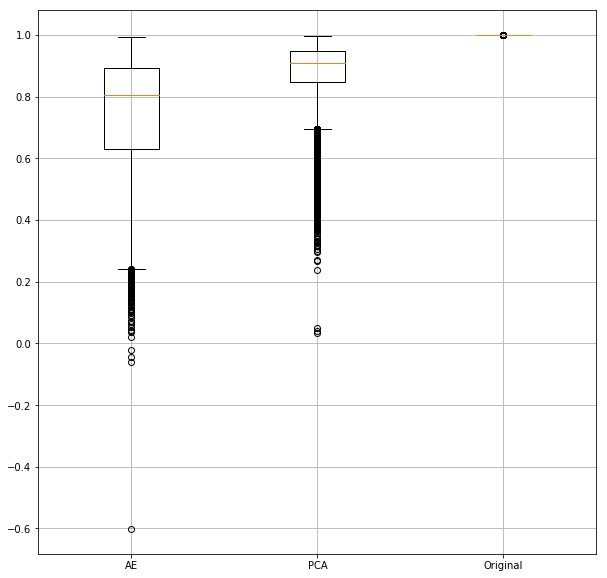

In [349]:
corrs_ae = [np.corrcoef(electrode_data_test[i],out_2[i])[0,1] for i in range(electrode_data_test.shape[0])]

corrs_pca = [np.corrcoef(electrode_data_test[i],e_data_proj[i])[0,1] for i in range(electrode_data_test.shape[0])]

corrs_base = [np.corrcoef(electrode_data_test[i],electrode_data_test[i])[0,1] for i in range(electrode_data_test.shape[0])]

fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot(111)
ax.boxplot([corrs_ae, corrs_pca, corrs_base], showfliers=True, notch=False)
ax.grid()
ax.set_xticklabels(['AE', 'PCA', 'Original'])
plt.show()